In [8]:
import numpy as np
from numpy.random import default_rng
import os
import sys
from nutil.plot import paperStyle
sys.path.insert(1, 'C:/Users/jo77pihe/Documents/MasterThesis_OfSpinesAndDendrites')
#from denoising import REGISTRY
#import utils
import tifffile as tif
import matplotlib.pyplot as plt
import normalize
import imagequalitymetrics as iqm
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from nutil.plot import paperStyle

In [9]:
data_path = 'D:/jo77pihe/Registered/20220203_Raw'
data_path_2d = 'D:/jo77pihe/Registered/20220203_Raw_2D'
n2n_res_path = 'D:/jo77pihe/Registered/20220204_Denoising/Neighbor2Neighbor'
gauss_res_path = 'D:/jo77pihe/Registered/20220204_Denoising/GaussianFilter'
bilat_res_path = 'D:/jo77pihe/Registered/20220204_Denoising/BilateralFilter'
nlm_res_path = 'D:/jo77pihe/Registered/20220204_Denoising/NLM'
bm3d_res_path = 'D:/jo77pihe/Registered/20220204_Denoising/BM3D'
normalizer = normalize.PercentileNormalizer()
norm_minmax= normalize.MinMaxNormalizer()
iqm = iqm.ImageQualityMetrics()

MIN_VAL = -2327
MAX_VAL = 12870

In [6]:
gauss_denoiser = REGISTRY['Gauss']()
bilat_denoiser =REGISTRY['Bilateral']()
#n2n = REGISTRY['n2n']()


In [4]:
nlm_denoiser = REGISTRY['nlm']()
bm3d_denoiser = REGISTRY['bm3d']()

In [3]:
# Randomly select 10 images
f = [f for f in os.listdir(data_path) if f.endswith('.tif')]

rng = default_rng(1234)
idx = rng.choice(len(f), size=60, replace=False)
idx_train =idx[0:50]
idx_test = idx[50:]
f_test = [f[i] for i in idx_test]
f_train = [f[i] for i in idx_train]
print(idx)
print(f_test)

[182 172  22 112 239 125 236  51 195  48 199 108  62 227  19 152  45 153
 103 206  31 157 181 178 158 230 140  89  47 154 134  13 173 142 202 180
 102 159  10 139  52 189  70   9  36 240  26 191  94 232  49 106 126  37
 107  60   0 184  41 192]
['Ghabiba_333_Thy1GFP_2019-02-18_A4.tif', 'Ghabiba_77_Thy1eGFP_2018-02-03_A6.tif', 'Tim_117_ArcCre_2017-05-08_A8.tif', 'Alessandro_520_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A7.tif', 'Ghabiba_77_Thy1eGFP_2018-02-03_A7.tif', 'Ghabiba_335_Thy1GFP_2019-02-18_A7.tif', 'Alessandro_427_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A1.tif', 'Tim_176_ArcCre_2017-08-08_B4.tif', 'Alessandro_530_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-09-16_A4.tif', 'Tim_178_ArcCre_2017-08-08_A5.tif']


In [4]:
f_test= ['Ghabiba_333_Thy1GFP_2019-02-18_A4.tif', 'Ghabiba_77_Thy1eGFP_2018-02-03_A6.tif', 'Tim_117_ArcCre_2017-05-08_A8.tif', 'Alessandro_520_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A7.tif', 'Ghabiba_77_Thy1eGFP_2018-02-03_A7.tif', 'Ghabiba_335_Thy1GFP_2019-02-18_A7.tif', 'Alessandro_427_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A1.tif', 'Tim_176_ArcCre_2017-08-08_B4.tif', 'Alessandro_530_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-09-16_A4.tif', 'Tim_178_ArcCre_2017-08-08_A5.tif']

In [5]:
# Bilateral Filter and N2N only works on 2D images
# Neighbor2Neighbor needs them seperated in a folder
for f in f_test:
    file=tif.imread(os.path.join(data_path,f))
    file=normalizer.normalize(file)
    utils.save_tif_stack_to_2d(file, os.path.join(data_path_2d, 'Test'), name=f)

In [6]:
for f in f_train:
    file=tif.imread(os.path.join(data_path,f))
    file=normalizer.normalize(file)
    utils.save_tif_stack_to_2d(file, os.path.join(data_path_2d, 'Train'), name = f)

In [6]:
# Train Neighbor2Neighbor
# Default Hyperparameters
# self.n_feature = 48
# self.gamma = 0.5
# self.n_snapshot=25
# self.patchsize = 256
# self.Lambda1 =1.0
# self.Lambda2 = 1.0
# self.increase_ratio = 2.0
# self.batchsize = 4
# self.n_epoch =100
# self.lr =3e-4

n2n.prepare(os.path.join(data_path_2d, 'Train'),os.path.join(data_path_2d, 'Test'), 'D:/jo77pihe/Registered/20220203_N2NRes')

fetch 1825 samples for training
gauss25
Batchsize=4, number of epoch=100
Checkpoint saved to .\results\unet_gauss25_b4e100r02\2022-02-14-16-38\epoch_model_000.pth
init finish
LearningRate of Epoch 1 = 0.0003
0001 00000 Loss1=0.053645, Lambda=0.02, Loss2=0.001073, Loss_Full=0.054718, Time=4.4596
0001 00001 Loss1=0.023997, Lambda=0.02, Loss2=0.000480, Loss_Full=0.024477, Time=0.0457
0001 00002 Loss1=0.023346, Lambda=0.02, Loss2=0.000467, Loss_Full=0.023813, Time=0.0323
0001 00003 Loss1=0.023669, Lambda=0.02, Loss2=0.000473, Loss_Full=0.024142, Time=0.0469
0001 00004 Loss1=0.034587, Lambda=0.02, Loss2=0.000692, Loss_Full=0.035279, Time=0.0311
0001 00005 Loss1=0.009971, Lambda=0.02, Loss2=0.000199, Loss_Full=0.010170, Time=0.0312
0001 00006 Loss1=0.040592, Lambda=0.02, Loss2=0.000812, Loss_Full=0.041404, Time=0.0469
0001 00007 Loss1=0.041398, Lambda=0.02, Loss2=0.000828, Loss_Full=0.042226, Time=0.0315
0001 00008 Loss1=0.023201, Lambda=0.02, Loss2=0.000464, Loss_Full=0.023665, Time=0.0311


0001 00095 Loss1=0.006153, Lambda=0.02, Loss2=0.000116, Loss_Full=0.006269, Time=0.0342
0001 00096 Loss1=0.004587, Lambda=0.02, Loss2=0.000087, Loss_Full=0.004674, Time=0.0363
0001 00097 Loss1=0.007777, Lambda=0.02, Loss2=0.000147, Loss_Full=0.007923, Time=0.0405
0001 00098 Loss1=0.008289, Lambda=0.02, Loss2=0.000156, Loss_Full=0.008444, Time=0.0301
0001 00099 Loss1=0.003223, Lambda=0.02, Loss2=0.000061, Loss_Full=0.003284, Time=0.0322
0001 00100 Loss1=0.005012, Lambda=0.02, Loss2=0.000095, Loss_Full=0.005107, Time=0.0301
0001 00101 Loss1=0.004158, Lambda=0.02, Loss2=0.000078, Loss_Full=0.004235, Time=0.0333
0001 00102 Loss1=0.005436, Lambda=0.02, Loss2=0.000102, Loss_Full=0.005538, Time=0.0393
0001 00103 Loss1=0.005377, Lambda=0.02, Loss2=0.000101, Loss_Full=0.005478, Time=0.0402
0001 00104 Loss1=0.002626, Lambda=0.02, Loss2=0.000049, Loss_Full=0.002675, Time=0.0382
0001 00105 Loss1=0.003743, Lambda=0.02, Loss2=0.000073, Loss_Full=0.003816, Time=0.0322
0001 00106 Loss1=0.005032, Lambd

0001 00192 Loss1=0.002505, Lambda=0.02, Loss2=0.000046, Loss_Full=0.002551, Time=0.0302
0001 00193 Loss1=0.004573, Lambda=0.02, Loss2=0.000084, Loss_Full=0.004657, Time=0.0321
0001 00194 Loss1=0.007716, Lambda=0.02, Loss2=0.000140, Loss_Full=0.007856, Time=0.0382
0001 00195 Loss1=0.001967, Lambda=0.02, Loss2=0.000036, Loss_Full=0.002003, Time=0.0311
0001 00196 Loss1=0.004849, Lambda=0.02, Loss2=0.000089, Loss_Full=0.004938, Time=0.0392
0001 00197 Loss1=0.007350, Lambda=0.02, Loss2=0.000134, Loss_Full=0.007484, Time=0.0302
0001 00198 Loss1=0.003334, Lambda=0.02, Loss2=0.000061, Loss_Full=0.003394, Time=0.0382
0001 00199 Loss1=0.004055, Lambda=0.02, Loss2=0.000074, Loss_Full=0.004129, Time=0.0301
0001 00200 Loss1=0.005093, Lambda=0.02, Loss2=0.000093, Loss_Full=0.005186, Time=0.0402
0001 00201 Loss1=0.008384, Lambda=0.02, Loss2=0.000153, Loss_Full=0.008537, Time=0.0402
0001 00202 Loss1=0.002276, Lambda=0.02, Loss2=0.000042, Loss_Full=0.002318, Time=0.0301
0001 00203 Loss1=0.003034, Lambd

0001 00291 Loss1=0.005566, Lambda=0.02, Loss2=0.000100, Loss_Full=0.005666, Time=0.0382
0001 00292 Loss1=0.002363, Lambda=0.02, Loss2=0.000044, Loss_Full=0.002406, Time=0.0377
0001 00293 Loss1=0.004295, Lambda=0.02, Loss2=0.000077, Loss_Full=0.004372, Time=0.0322
0001 00294 Loss1=0.005568, Lambda=0.02, Loss2=0.000101, Loss_Full=0.005669, Time=0.0402
0001 00295 Loss1=0.007519, Lambda=0.02, Loss2=0.000134, Loss_Full=0.007653, Time=0.0301
0001 00296 Loss1=0.003371, Lambda=0.02, Loss2=0.000061, Loss_Full=0.003432, Time=0.0402
0001 00297 Loss1=0.004984, Lambda=0.02, Loss2=0.000089, Loss_Full=0.005073, Time=0.0302
0001 00298 Loss1=0.001765, Lambda=0.02, Loss2=0.000032, Loss_Full=0.001797, Time=0.0402
0001 00299 Loss1=0.002535, Lambda=0.02, Loss2=0.000045, Loss_Full=0.002580, Time=0.0386
0001 00300 Loss1=0.003931, Lambda=0.02, Loss2=0.000071, Loss_Full=0.004002, Time=0.0301
0001 00301 Loss1=0.004686, Lambda=0.02, Loss2=0.000083, Loss_Full=0.004770, Time=0.0402
0001 00302 Loss1=0.002830, Lambd

0001 00388 Loss1=0.003675, Lambda=0.02, Loss2=0.000066, Loss_Full=0.003741, Time=0.0401
0001 00389 Loss1=0.001355, Lambda=0.02, Loss2=0.000024, Loss_Full=0.001379, Time=0.0382
0001 00390 Loss1=0.002879, Lambda=0.02, Loss2=0.000050, Loss_Full=0.002929, Time=0.0322
0001 00391 Loss1=0.004679, Lambda=0.02, Loss2=0.000083, Loss_Full=0.004762, Time=0.0402
0001 00392 Loss1=0.003340, Lambda=0.02, Loss2=0.000060, Loss_Full=0.003399, Time=0.0361
0001 00393 Loss1=0.003567, Lambda=0.02, Loss2=0.000063, Loss_Full=0.003630, Time=0.0402
0001 00394 Loss1=0.005864, Lambda=0.02, Loss2=0.000105, Loss_Full=0.005969, Time=0.0301
0001 00395 Loss1=0.006301, Lambda=0.02, Loss2=0.000111, Loss_Full=0.006412, Time=0.0326
0001 00396 Loss1=0.008622, Lambda=0.02, Loss2=0.000151, Loss_Full=0.008773, Time=0.0302
0001 00397 Loss1=0.005146, Lambda=0.02, Loss2=0.000092, Loss_Full=0.005238, Time=0.0332
0001 00398 Loss1=0.004280, Lambda=0.02, Loss2=0.000078, Loss_Full=0.004358, Time=0.0372
0001 00399 Loss1=0.002494, Lambd

0002 00030 Loss1=0.003349, Lambda=0.04, Loss2=0.000112, Loss_Full=0.003461, Time=0.0382
0002 00031 Loss1=0.007353, Lambda=0.04, Loss2=0.000242, Loss_Full=0.007595, Time=0.0402
0002 00032 Loss1=0.004027, Lambda=0.04, Loss2=0.000130, Loss_Full=0.004157, Time=0.0301
0002 00033 Loss1=0.001919, Lambda=0.04, Loss2=0.000062, Loss_Full=0.001981, Time=0.0321
0002 00034 Loss1=0.002632, Lambda=0.04, Loss2=0.000085, Loss_Full=0.002717, Time=0.0392
0002 00035 Loss1=0.009030, Lambda=0.04, Loss2=0.000294, Loss_Full=0.009323, Time=0.0302
0002 00036 Loss1=0.002829, Lambda=0.04, Loss2=0.000091, Loss_Full=0.002920, Time=0.0402
0002 00037 Loss1=0.004355, Lambda=0.04, Loss2=0.000142, Loss_Full=0.004497, Time=0.0382
0002 00038 Loss1=0.002088, Lambda=0.04, Loss2=0.000067, Loss_Full=0.002155, Time=0.0301
0002 00039 Loss1=0.004123, Lambda=0.04, Loss2=0.000133, Loss_Full=0.004257, Time=0.0401
0002 00040 Loss1=0.003194, Lambda=0.04, Loss2=0.000103, Loss_Full=0.003298, Time=0.0366
0002 00041 Loss1=0.001828, Lambd

0002 00126 Loss1=0.001675, Lambda=0.04, Loss2=0.000042, Loss_Full=0.001717, Time=0.0320
0002 00127 Loss1=0.003573, Lambda=0.04, Loss2=0.000092, Loss_Full=0.003664, Time=0.0402
0002 00128 Loss1=0.004059, Lambda=0.04, Loss2=0.000103, Loss_Full=0.004162, Time=0.0381
0002 00129 Loss1=0.005631, Lambda=0.04, Loss2=0.000141, Loss_Full=0.005772, Time=0.0322
0002 00130 Loss1=0.003528, Lambda=0.04, Loss2=0.000089, Loss_Full=0.003616, Time=0.0381
0002 00131 Loss1=0.003314, Lambda=0.04, Loss2=0.000087, Loss_Full=0.003401, Time=0.0312
0002 00132 Loss1=0.006008, Lambda=0.04, Loss2=0.000152, Loss_Full=0.006160, Time=0.0387
0002 00133 Loss1=0.002766, Lambda=0.04, Loss2=0.000068, Loss_Full=0.002834, Time=0.0402
0002 00134 Loss1=0.007242, Lambda=0.04, Loss2=0.000185, Loss_Full=0.007427, Time=0.0301
0002 00135 Loss1=0.005027, Lambda=0.04, Loss2=0.000122, Loss_Full=0.005149, Time=0.0402
0002 00136 Loss1=0.005124, Lambda=0.04, Loss2=0.000129, Loss_Full=0.005253, Time=0.0402
0002 00137 Loss1=0.004085, Lambd

0002 00224 Loss1=0.003533, Lambda=0.04, Loss2=0.000072, Loss_Full=0.003605, Time=0.0402
0002 00225 Loss1=0.003573, Lambda=0.04, Loss2=0.000074, Loss_Full=0.003647, Time=0.0322
0002 00226 Loss1=0.003862, Lambda=0.04, Loss2=0.000079, Loss_Full=0.003941, Time=0.0382
0002 00227 Loss1=0.004320, Lambda=0.04, Loss2=0.000088, Loss_Full=0.004409, Time=0.0322
0002 00228 Loss1=0.005324, Lambda=0.04, Loss2=0.000109, Loss_Full=0.005433, Time=0.0403
0002 00229 Loss1=0.001294, Lambda=0.04, Loss2=0.000026, Loss_Full=0.001320, Time=0.0382
0002 00230 Loss1=0.002115, Lambda=0.04, Loss2=0.000044, Loss_Full=0.002159, Time=0.0322
0002 00231 Loss1=0.005949, Lambda=0.04, Loss2=0.000127, Loss_Full=0.006077, Time=0.0403
0002 00232 Loss1=0.001918, Lambda=0.04, Loss2=0.000041, Loss_Full=0.001960, Time=0.0301
0002 00233 Loss1=0.001533, Lambda=0.04, Loss2=0.000032, Loss_Full=0.001565, Time=0.0321
0002 00234 Loss1=0.007369, Lambda=0.04, Loss2=0.000153, Loss_Full=0.007522, Time=0.0387
0002 00235 Loss1=0.006559, Lambd

0002 00322 Loss1=0.002309, Lambda=0.04, Loss2=0.000043, Loss_Full=0.002352, Time=0.0352
0002 00323 Loss1=0.006339, Lambda=0.04, Loss2=0.000123, Loss_Full=0.006462, Time=0.0372
0002 00324 Loss1=0.006565, Lambda=0.04, Loss2=0.000127, Loss_Full=0.006692, Time=0.0402
0002 00325 Loss1=0.001783, Lambda=0.04, Loss2=0.000034, Loss_Full=0.001817, Time=0.0381
0002 00326 Loss1=0.002445, Lambda=0.04, Loss2=0.000044, Loss_Full=0.002489, Time=0.0329
0002 00327 Loss1=0.005603, Lambda=0.04, Loss2=0.000104, Loss_Full=0.005707, Time=0.0372
0002 00328 Loss1=0.002044, Lambda=0.04, Loss2=0.000039, Loss_Full=0.002083, Time=0.0312
0002 00329 Loss1=0.006420, Lambda=0.04, Loss2=0.000121, Loss_Full=0.006541, Time=0.0322
0002 00330 Loss1=0.005275, Lambda=0.04, Loss2=0.000096, Loss_Full=0.005371, Time=0.0382
0002 00331 Loss1=0.004608, Lambda=0.04, Loss2=0.000087, Loss_Full=0.004695, Time=0.0326
0002 00332 Loss1=0.001852, Lambda=0.04, Loss2=0.000035, Loss_Full=0.001887, Time=0.0385
0002 00333 Loss1=0.003766, Lambd

0002 00421 Loss1=0.005782, Lambda=0.04, Loss2=0.000099, Loss_Full=0.005881, Time=0.0383
0002 00422 Loss1=0.003440, Lambda=0.04, Loss2=0.000057, Loss_Full=0.003496, Time=0.0306
0002 00423 Loss1=0.004459, Lambda=0.04, Loss2=0.000078, Loss_Full=0.004537, Time=0.0402
0002 00424 Loss1=0.002126, Lambda=0.04, Loss2=0.000036, Loss_Full=0.002162, Time=0.0402
0002 00425 Loss1=0.002672, Lambda=0.04, Loss2=0.000046, Loss_Full=0.002718, Time=0.0382
0002 00426 Loss1=0.005517, Lambda=0.04, Loss2=0.000093, Loss_Full=0.005611, Time=0.0322
0002 00427 Loss1=0.004748, Lambda=0.04, Loss2=0.000079, Loss_Full=0.004827, Time=0.0402
0002 00428 Loss1=0.008153, Lambda=0.04, Loss2=0.000140, Loss_Full=0.008293, Time=0.0381
0002 00429 Loss1=0.005336, Lambda=0.04, Loss2=0.000089, Loss_Full=0.005425, Time=0.0321
0002 00430 Loss1=0.002149, Lambda=0.04, Loss2=0.000036, Loss_Full=0.002185, Time=0.0381
0002 00431 Loss1=0.002731, Lambda=0.04, Loss2=0.000047, Loss_Full=0.002778, Time=0.0342
0002 00432 Loss1=0.004365, Lambd

0003 00064 Loss1=0.003796, Lambda=0.06, Loss2=0.000088, Loss_Full=0.003884, Time=0.0402
0003 00065 Loss1=0.002734, Lambda=0.06, Loss2=0.000067, Loss_Full=0.002800, Time=0.0322
0003 00066 Loss1=0.003257, Lambda=0.06, Loss2=0.000080, Loss_Full=0.003337, Time=0.0381
0003 00067 Loss1=0.002887, Lambda=0.06, Loss2=0.000071, Loss_Full=0.002958, Time=0.0402
0003 00068 Loss1=0.001667, Lambda=0.06, Loss2=0.000041, Loss_Full=0.001708, Time=0.0302
0003 00069 Loss1=0.003816, Lambda=0.06, Loss2=0.000088, Loss_Full=0.003904, Time=0.0322
0003 00070 Loss1=0.002049, Lambda=0.06, Loss2=0.000050, Loss_Full=0.002099, Time=0.0322
0003 00071 Loss1=0.001765, Lambda=0.06, Loss2=0.000043, Loss_Full=0.001809, Time=0.0483
0003 00072 Loss1=0.004552, Lambda=0.06, Loss2=0.000108, Loss_Full=0.004660, Time=0.0322
0003 00073 Loss1=0.005351, Lambda=0.06, Loss2=0.000130, Loss_Full=0.005482, Time=0.0381
0003 00074 Loss1=0.006085, Lambda=0.06, Loss2=0.000143, Loss_Full=0.006228, Time=0.0322
0003 00075 Loss1=0.001954, Lambd

0003 00161 Loss1=0.003534, Lambda=0.06, Loss2=0.000084, Loss_Full=0.003618, Time=0.0403
0003 00162 Loss1=0.006624, Lambda=0.06, Loss2=0.000157, Loss_Full=0.006781, Time=0.0305
0003 00163 Loss1=0.002948, Lambda=0.06, Loss2=0.000070, Loss_Full=0.003018, Time=0.0416
0003 00164 Loss1=0.003691, Lambda=0.06, Loss2=0.000087, Loss_Full=0.003778, Time=0.0280
0003 00165 Loss1=0.003438, Lambda=0.06, Loss2=0.000083, Loss_Full=0.003521, Time=0.0402
0003 00166 Loss1=0.003913, Lambda=0.06, Loss2=0.000092, Loss_Full=0.004005, Time=0.0402
0003 00167 Loss1=0.003217, Lambda=0.06, Loss2=0.000074, Loss_Full=0.003291, Time=0.0357
0003 00168 Loss1=0.003858, Lambda=0.06, Loss2=0.000089, Loss_Full=0.003947, Time=0.0322
0003 00169 Loss1=0.005564, Lambda=0.06, Loss2=0.000134, Loss_Full=0.005698, Time=0.0382
0003 00170 Loss1=0.003627, Lambda=0.06, Loss2=0.000087, Loss_Full=0.003714, Time=0.0301
0003 00171 Loss1=0.003481, Lambda=0.06, Loss2=0.000080, Loss_Full=0.003560, Time=0.0381
0003 00172 Loss1=0.004437, Lambd

0003 00258 Loss1=0.002351, Lambda=0.06, Loss2=0.000055, Loss_Full=0.002406, Time=0.0301
0003 00259 Loss1=0.005036, Lambda=0.06, Loss2=0.000116, Loss_Full=0.005152, Time=0.0406
0003 00260 Loss1=0.003810, Lambda=0.06, Loss2=0.000087, Loss_Full=0.003897, Time=0.0301
0003 00261 Loss1=0.003336, Lambda=0.06, Loss2=0.000078, Loss_Full=0.003414, Time=0.0402
0003 00262 Loss1=0.001301, Lambda=0.06, Loss2=0.000032, Loss_Full=0.001333, Time=0.0345
0003 00263 Loss1=0.008658, Lambda=0.06, Loss2=0.000204, Loss_Full=0.008862, Time=0.0322
0003 00264 Loss1=0.001980, Lambda=0.06, Loss2=0.000045, Loss_Full=0.002025, Time=0.0381
0003 00265 Loss1=0.002779, Lambda=0.06, Loss2=0.000064, Loss_Full=0.002842, Time=0.0301
0003 00266 Loss1=0.006772, Lambda=0.06, Loss2=0.000157, Loss_Full=0.006929, Time=0.0402
0003 00267 Loss1=0.001915, Lambda=0.06, Loss2=0.000045, Loss_Full=0.001960, Time=0.0301
0003 00268 Loss1=0.004219, Lambda=0.06, Loss2=0.000101, Loss_Full=0.004320, Time=0.0427
0003 00269 Loss1=0.004223, Lambd

0003 00355 Loss1=0.004417, Lambda=0.06, Loss2=0.000103, Loss_Full=0.004520, Time=0.0383
0003 00356 Loss1=0.001475, Lambda=0.06, Loss2=0.000035, Loss_Full=0.001510, Time=0.0347
0003 00357 Loss1=0.001814, Lambda=0.06, Loss2=0.000041, Loss_Full=0.001855, Time=0.0377
0003 00358 Loss1=0.003891, Lambda=0.06, Loss2=0.000090, Loss_Full=0.003980, Time=0.0382
0003 00359 Loss1=0.004961, Lambda=0.06, Loss2=0.000117, Loss_Full=0.005077, Time=0.0322
0003 00360 Loss1=0.003166, Lambda=0.06, Loss2=0.000072, Loss_Full=0.003238, Time=0.0383
0003 00361 Loss1=0.003345, Lambda=0.06, Loss2=0.000078, Loss_Full=0.003423, Time=0.0304
0003 00362 Loss1=0.003725, Lambda=0.06, Loss2=0.000083, Loss_Full=0.003809, Time=0.0402
0003 00363 Loss1=0.004047, Lambda=0.06, Loss2=0.000093, Loss_Full=0.004141, Time=0.0307
0003 00364 Loss1=0.003222, Lambda=0.06, Loss2=0.000078, Loss_Full=0.003300, Time=0.0397
0003 00365 Loss1=0.002952, Lambda=0.06, Loss2=0.000068, Loss_Full=0.003021, Time=0.0304
0003 00366 Loss1=0.002207, Lambd

0003 00450 Loss1=0.003063, Lambda=0.06, Loss2=0.000069, Loss_Full=0.003133, Time=0.0402
0003 00451 Loss1=0.001276, Lambda=0.06, Loss2=0.000029, Loss_Full=0.001305, Time=0.0382
0003 00452 Loss1=0.004830, Lambda=0.06, Loss2=0.000106, Loss_Full=0.004936, Time=0.0321
0003 00453 Loss1=0.003305, Lambda=0.06, Loss2=0.000077, Loss_Full=0.003383, Time=0.0301
0003 00454 Loss1=0.004748, Lambda=0.06, Loss2=0.000107, Loss_Full=0.004855, Time=0.0401
0003 00455 Loss1=0.005989, Lambda=0.06, Loss2=0.000138, Loss_Full=0.006128, Time=0.0342
LearningRate of Epoch 4 = 0.0003
0004 00000 Loss1=0.002253, Lambda=0.08, Loss2=0.000072, Loss_Full=0.002325, Time=0.0584
0004 00001 Loss1=0.002617, Lambda=0.08, Loss2=0.000081, Loss_Full=0.002698, Time=0.0302
0004 00002 Loss1=0.003128, Lambda=0.08, Loss2=0.000099, Loss_Full=0.003227, Time=0.0324
0004 00003 Loss1=0.003647, Lambda=0.08, Loss2=0.000108, Loss_Full=0.003755, Time=0.0402
0004 00004 Loss1=0.004426, Lambda=0.08, Loss2=0.000134, Loss_Full=0.004560, Time=0.0301

0004 00090 Loss1=0.006879, Lambda=0.08, Loss2=0.000212, Loss_Full=0.007091, Time=0.0412
0004 00091 Loss1=0.003106, Lambda=0.08, Loss2=0.000092, Loss_Full=0.003198, Time=0.0316
0004 00092 Loss1=0.004621, Lambda=0.08, Loss2=0.000137, Loss_Full=0.004757, Time=0.0322
0004 00093 Loss1=0.004431, Lambda=0.08, Loss2=0.000132, Loss_Full=0.004563, Time=0.0382
0004 00094 Loss1=0.002693, Lambda=0.08, Loss2=0.000085, Loss_Full=0.002779, Time=0.0320
0004 00095 Loss1=0.003926, Lambda=0.08, Loss2=0.000120, Loss_Full=0.004047, Time=0.0402
0004 00096 Loss1=0.000891, Lambda=0.08, Loss2=0.000027, Loss_Full=0.000918, Time=0.0382
0004 00097 Loss1=0.006644, Lambda=0.08, Loss2=0.000205, Loss_Full=0.006849, Time=0.0316
0004 00098 Loss1=0.003324, Lambda=0.08, Loss2=0.000101, Loss_Full=0.003426, Time=0.0397
0004 00099 Loss1=0.004432, Lambda=0.08, Loss2=0.000139, Loss_Full=0.004571, Time=0.0382
0004 00100 Loss1=0.003569, Lambda=0.08, Loss2=0.000112, Loss_Full=0.003681, Time=0.0302
0004 00101 Loss1=0.005491, Lambd

0004 00188 Loss1=0.004349, Lambda=0.08, Loss2=0.000134, Loss_Full=0.004483, Time=0.0322
0004 00189 Loss1=0.004107, Lambda=0.08, Loss2=0.000127, Loss_Full=0.004234, Time=0.0301
0004 00190 Loss1=0.004555, Lambda=0.08, Loss2=0.000138, Loss_Full=0.004693, Time=0.0323
0004 00191 Loss1=0.006263, Lambda=0.08, Loss2=0.000192, Loss_Full=0.006455, Time=0.0382
0004 00192 Loss1=0.007384, Lambda=0.08, Loss2=0.000231, Loss_Full=0.007615, Time=0.0316
0004 00193 Loss1=0.005977, Lambda=0.08, Loss2=0.000188, Loss_Full=0.006165, Time=0.0382
0004 00194 Loss1=0.005164, Lambda=0.08, Loss2=0.000158, Loss_Full=0.005322, Time=0.0322
0004 00195 Loss1=0.007146, Lambda=0.08, Loss2=0.000224, Loss_Full=0.007370, Time=0.0382
0004 00196 Loss1=0.004005, Lambda=0.08, Loss2=0.000124, Loss_Full=0.004129, Time=0.0304
0004 00197 Loss1=0.004639, Lambda=0.08, Loss2=0.000144, Loss_Full=0.004783, Time=0.0402
0004 00198 Loss1=0.001039, Lambda=0.08, Loss2=0.000033, Loss_Full=0.001072, Time=0.0301
0004 00199 Loss1=0.002254, Lambd

0004 00286 Loss1=0.001900, Lambda=0.08, Loss2=0.000058, Loss_Full=0.001959, Time=0.0402
0004 00287 Loss1=0.004699, Lambda=0.08, Loss2=0.000147, Loss_Full=0.004846, Time=0.0301
0004 00288 Loss1=0.005463, Lambda=0.08, Loss2=0.000168, Loss_Full=0.005631, Time=0.0321
0004 00289 Loss1=0.002347, Lambda=0.08, Loss2=0.000069, Loss_Full=0.002416, Time=0.0403
0004 00290 Loss1=0.001330, Lambda=0.08, Loss2=0.000041, Loss_Full=0.001371, Time=0.0382
0004 00291 Loss1=0.002514, Lambda=0.08, Loss2=0.000080, Loss_Full=0.002594, Time=0.0376
0004 00292 Loss1=0.001739, Lambda=0.08, Loss2=0.000053, Loss_Full=0.001792, Time=0.0343
0004 00293 Loss1=0.005062, Lambda=0.08, Loss2=0.000155, Loss_Full=0.005217, Time=0.0302
0004 00294 Loss1=0.004266, Lambda=0.08, Loss2=0.000127, Loss_Full=0.004393, Time=0.0322
0004 00295 Loss1=0.006244, Lambda=0.08, Loss2=0.000191, Loss_Full=0.006435, Time=0.0402
0004 00296 Loss1=0.004451, Lambda=0.08, Loss2=0.000143, Loss_Full=0.004594, Time=0.0300
0004 00297 Loss1=0.004230, Lambd

0004 00384 Loss1=0.002413, Lambda=0.08, Loss2=0.000075, Loss_Full=0.002488, Time=0.0402
0004 00385 Loss1=0.003484, Lambda=0.08, Loss2=0.000102, Loss_Full=0.003586, Time=0.0302
0004 00386 Loss1=0.002252, Lambda=0.08, Loss2=0.000071, Loss_Full=0.002323, Time=0.0404
0004 00387 Loss1=0.002835, Lambda=0.08, Loss2=0.000089, Loss_Full=0.002923, Time=0.0301
0004 00388 Loss1=0.003660, Lambda=0.08, Loss2=0.000107, Loss_Full=0.003767, Time=0.0400
0004 00389 Loss1=0.003971, Lambda=0.08, Loss2=0.000121, Loss_Full=0.004092, Time=0.0402
0004 00390 Loss1=0.004894, Lambda=0.08, Loss2=0.000149, Loss_Full=0.005043, Time=0.0301
0004 00391 Loss1=0.001272, Lambda=0.08, Loss2=0.000038, Loss_Full=0.001310, Time=0.0321
0004 00392 Loss1=0.006649, Lambda=0.08, Loss2=0.000212, Loss_Full=0.006861, Time=0.0382
0004 00393 Loss1=0.007323, Lambda=0.08, Loss2=0.000218, Loss_Full=0.007541, Time=0.0322
0004 00394 Loss1=0.004727, Lambda=0.08, Loss2=0.000148, Loss_Full=0.004875, Time=0.0447
0004 00395 Loss1=0.002595, Lambd

0005 00024 Loss1=0.002405, Lambda=0.1, Loss2=0.000091, Loss_Full=0.002496, Time=0.0363
0005 00025 Loss1=0.004454, Lambda=0.1, Loss2=0.000165, Loss_Full=0.004619, Time=0.0342
0005 00026 Loss1=0.002150, Lambda=0.1, Loss2=0.000083, Loss_Full=0.002233, Time=0.0382
0005 00027 Loss1=0.008852, Lambda=0.1, Loss2=0.000340, Loss_Full=0.009192, Time=0.0321
0005 00028 Loss1=0.001815, Lambda=0.1, Loss2=0.000066, Loss_Full=0.001881, Time=0.0302
0005 00029 Loss1=0.003333, Lambda=0.1, Loss2=0.000120, Loss_Full=0.003453, Time=0.0324
0005 00030 Loss1=0.002502, Lambda=0.1, Loss2=0.000090, Loss_Full=0.002591, Time=0.0382
0005 00031 Loss1=0.007184, Lambda=0.1, Loss2=0.000274, Loss_Full=0.007459, Time=0.0372
0005 00032 Loss1=0.004199, Lambda=0.1, Loss2=0.000166, Loss_Full=0.004365, Time=0.0354
0005 00033 Loss1=0.003711, Lambda=0.1, Loss2=0.000143, Loss_Full=0.003854, Time=0.0382
0005 00034 Loss1=0.001160, Lambda=0.1, Loss2=0.000043, Loss_Full=0.001203, Time=0.0325
0005 00035 Loss1=0.001840, Lambda=0.1, Loss

0005 00120 Loss1=0.003316, Lambda=0.1, Loss2=0.000120, Loss_Full=0.003436, Time=0.0402
0005 00121 Loss1=0.001561, Lambda=0.1, Loss2=0.000059, Loss_Full=0.001621, Time=0.0301
0005 00122 Loss1=0.005151, Lambda=0.1, Loss2=0.000192, Loss_Full=0.005344, Time=0.0402
0005 00123 Loss1=0.001589, Lambda=0.1, Loss2=0.000057, Loss_Full=0.001645, Time=0.0381
0005 00124 Loss1=0.003422, Lambda=0.1, Loss2=0.000124, Loss_Full=0.003546, Time=0.0302
0005 00125 Loss1=0.001978, Lambda=0.1, Loss2=0.000074, Loss_Full=0.002052, Time=0.0402
0005 00126 Loss1=0.003749, Lambda=0.1, Loss2=0.000133, Loss_Full=0.003882, Time=0.0382
0005 00127 Loss1=0.005442, Lambda=0.1, Loss2=0.000203, Loss_Full=0.005646, Time=0.0323
0005 00128 Loss1=0.004550, Lambda=0.1, Loss2=0.000168, Loss_Full=0.004718, Time=0.0331
0005 00129 Loss1=0.002958, Lambda=0.1, Loss2=0.000114, Loss_Full=0.003072, Time=0.0322
0005 00130 Loss1=0.004000, Lambda=0.1, Loss2=0.000146, Loss_Full=0.004146, Time=0.0382
0005 00131 Loss1=0.006539, Lambda=0.1, Loss

0005 00217 Loss1=0.004114, Lambda=0.1, Loss2=0.000148, Loss_Full=0.004262, Time=0.0322
0005 00218 Loss1=0.002694, Lambda=0.1, Loss2=0.000099, Loss_Full=0.002792, Time=0.0402
0005 00219 Loss1=0.002158, Lambda=0.1, Loss2=0.000083, Loss_Full=0.002242, Time=0.0382
0005 00220 Loss1=0.010047, Lambda=0.1, Loss2=0.000381, Loss_Full=0.010428, Time=0.0322
0005 00221 Loss1=0.003063, Lambda=0.1, Loss2=0.000109, Loss_Full=0.003172, Time=0.0387
0005 00222 Loss1=0.003130, Lambda=0.1, Loss2=0.000108, Loss_Full=0.003238, Time=0.0301
0005 00223 Loss1=0.001173, Lambda=0.1, Loss2=0.000042, Loss_Full=0.001215, Time=0.0402
0005 00224 Loss1=0.003104, Lambda=0.1, Loss2=0.000111, Loss_Full=0.003214, Time=0.0382
0005 00225 Loss1=0.002618, Lambda=0.1, Loss2=0.000090, Loss_Full=0.002709, Time=0.0357
0005 00226 Loss1=0.005380, Lambda=0.1, Loss2=0.000194, Loss_Full=0.005574, Time=0.0347
0005 00227 Loss1=0.004603, Lambda=0.1, Loss2=0.000168, Loss_Full=0.004771, Time=0.0402
0005 00228 Loss1=0.004095, Lambda=0.1, Loss

0005 00315 Loss1=0.002311, Lambda=0.1, Loss2=0.000085, Loss_Full=0.002397, Time=0.0301
0005 00316 Loss1=0.001881, Lambda=0.1, Loss2=0.000068, Loss_Full=0.001950, Time=0.0424
0005 00317 Loss1=0.005319, Lambda=0.1, Loss2=0.000199, Loss_Full=0.005517, Time=0.0381
0005 00318 Loss1=0.002612, Lambda=0.1, Loss2=0.000096, Loss_Full=0.002708, Time=0.0321
0005 00319 Loss1=0.003245, Lambda=0.1, Loss2=0.000121, Loss_Full=0.003366, Time=0.0402
0005 00320 Loss1=0.002633, Lambda=0.1, Loss2=0.000098, Loss_Full=0.002731, Time=0.0301
0005 00321 Loss1=0.012919, Lambda=0.1, Loss2=0.000514, Loss_Full=0.013433, Time=0.0322
0005 00322 Loss1=0.004738, Lambda=0.1, Loss2=0.000179, Loss_Full=0.004917, Time=0.0357
0005 00323 Loss1=0.003095, Lambda=0.1, Loss2=0.000116, Loss_Full=0.003211, Time=0.0302
0005 00324 Loss1=0.001518, Lambda=0.1, Loss2=0.000056, Loss_Full=0.001574, Time=0.0403
0005 00325 Loss1=0.002589, Lambda=0.1, Loss2=0.000096, Loss_Full=0.002685, Time=0.0302
0005 00326 Loss1=0.004423, Lambda=0.1, Loss

0005 00412 Loss1=0.005566, Lambda=0.1, Loss2=0.000218, Loss_Full=0.005783, Time=0.0402
0005 00413 Loss1=0.003813, Lambda=0.1, Loss2=0.000148, Loss_Full=0.003961, Time=0.0301
0005 00414 Loss1=0.007108, Lambda=0.1, Loss2=0.000257, Loss_Full=0.007365, Time=0.0331
0005 00415 Loss1=0.003072, Lambda=0.1, Loss2=0.000116, Loss_Full=0.003188, Time=0.0391
0005 00416 Loss1=0.005488, Lambda=0.1, Loss2=0.000217, Loss_Full=0.005705, Time=0.0301
0005 00417 Loss1=0.003113, Lambda=0.1, Loss2=0.000115, Loss_Full=0.003228, Time=0.0405
0005 00418 Loss1=0.003768, Lambda=0.1, Loss2=0.000147, Loss_Full=0.003915, Time=0.0401
0005 00419 Loss1=0.002320, Lambda=0.1, Loss2=0.000086, Loss_Full=0.002406, Time=0.0302
0005 00420 Loss1=0.005739, Lambda=0.1, Loss2=0.000206, Loss_Full=0.005946, Time=0.0402
0005 00421 Loss1=0.004605, Lambda=0.1, Loss2=0.000170, Loss_Full=0.004776, Time=0.0402
0005 00422 Loss1=0.005242, Lambda=0.1, Loss2=0.000192, Loss_Full=0.005433, Time=0.0304
0005 00423 Loss1=0.002738, Lambda=0.1, Loss

0006 00055 Loss1=0.003831, Lambda=0.12, Loss2=0.000164, Loss_Full=0.003995, Time=0.0402
0006 00056 Loss1=0.004247, Lambda=0.12, Loss2=0.000179, Loss_Full=0.004426, Time=0.0386
0006 00057 Loss1=0.001463, Lambda=0.12, Loss2=0.000067, Loss_Full=0.001530, Time=0.0357
0006 00058 Loss1=0.004289, Lambda=0.12, Loss2=0.000185, Loss_Full=0.004475, Time=0.0320
0006 00059 Loss1=0.006789, Lambda=0.12, Loss2=0.000300, Loss_Full=0.007089, Time=0.0382
0006 00060 Loss1=0.001507, Lambda=0.12, Loss2=0.000063, Loss_Full=0.001570, Time=0.0322
0006 00061 Loss1=0.004355, Lambda=0.12, Loss2=0.000194, Loss_Full=0.004549, Time=0.0402
0006 00062 Loss1=0.003117, Lambda=0.12, Loss2=0.000133, Loss_Full=0.003250, Time=0.0483
0006 00063 Loss1=0.006675, Lambda=0.12, Loss2=0.000306, Loss_Full=0.006982, Time=0.0402
0006 00064 Loss1=0.002512, Lambda=0.12, Loss2=0.000102, Loss_Full=0.002614, Time=0.0322
0006 00065 Loss1=0.003385, Lambda=0.12, Loss2=0.000154, Loss_Full=0.003539, Time=0.0467
0006 00066 Loss1=0.006601, Lambd

0006 00150 Loss1=0.005069, Lambda=0.12, Loss2=0.000219, Loss_Full=0.005289, Time=0.0382
0006 00151 Loss1=0.003852, Lambda=0.12, Loss2=0.000161, Loss_Full=0.004013, Time=0.0321
0006 00152 Loss1=0.002744, Lambda=0.12, Loss2=0.000117, Loss_Full=0.002861, Time=0.0382
0006 00153 Loss1=0.004601, Lambda=0.12, Loss2=0.000208, Loss_Full=0.004810, Time=0.0301
0006 00154 Loss1=0.003475, Lambda=0.12, Loss2=0.000147, Loss_Full=0.003622, Time=0.0322
0006 00155 Loss1=0.004763, Lambda=0.12, Loss2=0.000205, Loss_Full=0.004967, Time=0.0377
0006 00156 Loss1=0.003211, Lambda=0.12, Loss2=0.000135, Loss_Full=0.003347, Time=0.0321
0006 00157 Loss1=0.002434, Lambda=0.12, Loss2=0.000101, Loss_Full=0.002535, Time=0.0402
0006 00158 Loss1=0.004085, Lambda=0.12, Loss2=0.000167, Loss_Full=0.004252, Time=0.0302
0006 00159 Loss1=0.001156, Lambda=0.12, Loss2=0.000049, Loss_Full=0.001205, Time=0.0402
0006 00160 Loss1=0.003876, Lambda=0.12, Loss2=0.000176, Loss_Full=0.004052, Time=0.0382
0006 00161 Loss1=0.004495, Lambd

0006 00248 Loss1=0.003036, Lambda=0.12, Loss2=0.000130, Loss_Full=0.003166, Time=0.0382
0006 00249 Loss1=0.003581, Lambda=0.12, Loss2=0.000162, Loss_Full=0.003744, Time=0.0357
0006 00250 Loss1=0.008626, Lambda=0.12, Loss2=0.000402, Loss_Full=0.009028, Time=0.0301
0006 00251 Loss1=0.002121, Lambda=0.12, Loss2=0.000091, Loss_Full=0.002212, Time=0.0422
0006 00252 Loss1=0.004352, Lambda=0.12, Loss2=0.000188, Loss_Full=0.004540, Time=0.0301
0006 00253 Loss1=0.003840, Lambda=0.12, Loss2=0.000166, Loss_Full=0.004006, Time=0.0402
0006 00254 Loss1=0.002463, Lambda=0.12, Loss2=0.000111, Loss_Full=0.002575, Time=0.0482
0006 00255 Loss1=0.002000, Lambda=0.12, Loss2=0.000086, Loss_Full=0.002086, Time=0.0383
0006 00256 Loss1=0.001932, Lambda=0.12, Loss2=0.000089, Loss_Full=0.002020, Time=0.0322
0006 00257 Loss1=0.001898, Lambda=0.12, Loss2=0.000084, Loss_Full=0.001982, Time=0.0401
0006 00258 Loss1=0.003567, Lambda=0.12, Loss2=0.000164, Loss_Full=0.003732, Time=0.0382
0006 00259 Loss1=0.006931, Lambd

0006 00344 Loss1=0.007127, Lambda=0.12, Loss2=0.000321, Loss_Full=0.007449, Time=0.0301
0006 00345 Loss1=0.003952, Lambda=0.12, Loss2=0.000180, Loss_Full=0.004133, Time=0.0382
0006 00346 Loss1=0.006040, Lambda=0.12, Loss2=0.000281, Loss_Full=0.006320, Time=0.0302
0006 00347 Loss1=0.003888, Lambda=0.12, Loss2=0.000171, Loss_Full=0.004059, Time=0.0402
0006 00348 Loss1=0.004217, Lambda=0.12, Loss2=0.000187, Loss_Full=0.004404, Time=0.0301
0006 00349 Loss1=0.001331, Lambda=0.12, Loss2=0.000062, Loss_Full=0.001392, Time=0.0321
0006 00350 Loss1=0.006357, Lambda=0.12, Loss2=0.000291, Loss_Full=0.006648, Time=0.0402
0006 00351 Loss1=0.003892, Lambda=0.12, Loss2=0.000183, Loss_Full=0.004075, Time=0.0302
0006 00352 Loss1=0.006616, Lambda=0.12, Loss2=0.000312, Loss_Full=0.006927, Time=0.0322
0006 00353 Loss1=0.004034, Lambda=0.12, Loss2=0.000174, Loss_Full=0.004209, Time=0.0382
0006 00354 Loss1=0.004296, Lambda=0.12, Loss2=0.000179, Loss_Full=0.004475, Time=0.0303
0006 00355 Loss1=0.002898, Lambd

0006 00441 Loss1=0.002998, Lambda=0.12, Loss2=0.000135, Loss_Full=0.003132, Time=0.0301
0006 00442 Loss1=0.002807, Lambda=0.12, Loss2=0.000126, Loss_Full=0.002933, Time=0.0402
0006 00443 Loss1=0.003683, Lambda=0.12, Loss2=0.000157, Loss_Full=0.003840, Time=0.0302
0006 00444 Loss1=0.006306, Lambda=0.12, Loss2=0.000288, Loss_Full=0.006593, Time=0.0402
0006 00445 Loss1=0.004253, Lambda=0.12, Loss2=0.000189, Loss_Full=0.004443, Time=0.0381
0006 00446 Loss1=0.001695, Lambda=0.12, Loss2=0.000073, Loss_Full=0.001768, Time=0.0331
0006 00447 Loss1=0.004132, Lambda=0.12, Loss2=0.000190, Loss_Full=0.004323, Time=0.0392
0006 00448 Loss1=0.003717, Lambda=0.12, Loss2=0.000164, Loss_Full=0.003881, Time=0.0301
0006 00449 Loss1=0.003852, Lambda=0.12, Loss2=0.000173, Loss_Full=0.004026, Time=0.0402
0006 00450 Loss1=0.004627, Lambda=0.12, Loss2=0.000211, Loss_Full=0.004839, Time=0.0301
0006 00451 Loss1=0.002831, Lambda=0.12, Loss2=0.000121, Loss_Full=0.002951, Time=0.0321
0006 00452 Loss1=0.004534, Lambd

0007 00078 Loss1=0.001510, Lambda=0.14, Loss2=0.000074, Loss_Full=0.001584, Time=0.0382
0007 00079 Loss1=0.003353, Lambda=0.14, Loss2=0.000162, Loss_Full=0.003514, Time=0.0301
0007 00080 Loss1=0.004265, Lambda=0.14, Loss2=0.000209, Loss_Full=0.004474, Time=0.0402
0007 00081 Loss1=0.003619, Lambda=0.14, Loss2=0.000181, Loss_Full=0.003800, Time=0.0403
0007 00082 Loss1=0.003287, Lambda=0.14, Loss2=0.000179, Loss_Full=0.003466, Time=0.0402
0007 00083 Loss1=0.002437, Lambda=0.14, Loss2=0.000127, Loss_Full=0.002564, Time=0.0402
0007 00084 Loss1=0.003866, Lambda=0.14, Loss2=0.000198, Loss_Full=0.004064, Time=0.0402
0007 00085 Loss1=0.002804, Lambda=0.14, Loss2=0.000141, Loss_Full=0.002945, Time=0.0401
0007 00086 Loss1=0.006378, Lambda=0.14, Loss2=0.000328, Loss_Full=0.006706, Time=0.0381
0007 00087 Loss1=0.001547, Lambda=0.14, Loss2=0.000076, Loss_Full=0.001623, Time=0.0322
0007 00088 Loss1=0.005809, Lambda=0.14, Loss2=0.000285, Loss_Full=0.006094, Time=0.0382
0007 00089 Loss1=0.005116, Lambd

0007 00175 Loss1=0.003599, Lambda=0.14, Loss2=0.000189, Loss_Full=0.003789, Time=0.0400
0007 00176 Loss1=0.005716, Lambda=0.14, Loss2=0.000292, Loss_Full=0.006008, Time=0.0301
0007 00177 Loss1=0.002874, Lambda=0.14, Loss2=0.000143, Loss_Full=0.003018, Time=0.0332
0007 00178 Loss1=0.003018, Lambda=0.14, Loss2=0.000145, Loss_Full=0.003163, Time=0.0382
0007 00179 Loss1=0.004023, Lambda=0.14, Loss2=0.000214, Loss_Full=0.004237, Time=0.0320
0007 00180 Loss1=0.003844, Lambda=0.14, Loss2=0.000196, Loss_Full=0.004040, Time=0.0404
0007 00181 Loss1=0.001632, Lambda=0.14, Loss2=0.000084, Loss_Full=0.001717, Time=0.0302
0007 00182 Loss1=0.003247, Lambda=0.14, Loss2=0.000178, Loss_Full=0.003425, Time=0.0366
0007 00183 Loss1=0.003863, Lambda=0.14, Loss2=0.000205, Loss_Full=0.004068, Time=0.0338
0007 00184 Loss1=0.005609, Lambda=0.14, Loss2=0.000302, Loss_Full=0.005912, Time=0.0301
0007 00185 Loss1=0.002375, Lambda=0.14, Loss2=0.000121, Loss_Full=0.002496, Time=0.0402
0007 00186 Loss1=0.004096, Lambd

0007 00269 Loss1=0.002912, Lambda=0.14, Loss2=0.000145, Loss_Full=0.003057, Time=0.0401
0007 00270 Loss1=0.005482, Lambda=0.14, Loss2=0.000290, Loss_Full=0.005772, Time=0.0402
0007 00271 Loss1=0.003584, Lambda=0.14, Loss2=0.000173, Loss_Full=0.003757, Time=0.0301
0007 00272 Loss1=0.003311, Lambda=0.14, Loss2=0.000168, Loss_Full=0.003479, Time=0.0332
0007 00273 Loss1=0.003180, Lambda=0.14, Loss2=0.000163, Loss_Full=0.003343, Time=0.0392
0007 00274 Loss1=0.006225, Lambda=0.14, Loss2=0.000334, Loss_Full=0.006559, Time=0.0302
0007 00275 Loss1=0.003564, Lambda=0.14, Loss2=0.000179, Loss_Full=0.003743, Time=0.0402
0007 00276 Loss1=0.003343, Lambda=0.14, Loss2=0.000163, Loss_Full=0.003506, Time=0.0402
0007 00277 Loss1=0.002100, Lambda=0.14, Loss2=0.000104, Loss_Full=0.002204, Time=0.0402
0007 00278 Loss1=0.006166, Lambda=0.14, Loss2=0.000324, Loss_Full=0.006490, Time=0.0301
0007 00279 Loss1=0.008707, Lambda=0.14, Loss2=0.000462, Loss_Full=0.009169, Time=0.0402
0007 00280 Loss1=0.002089, Lambd

0007 00365 Loss1=0.002427, Lambda=0.14, Loss2=0.000119, Loss_Full=0.002546, Time=0.0403
0007 00366 Loss1=0.004308, Lambda=0.14, Loss2=0.000232, Loss_Full=0.004540, Time=0.0382
0007 00367 Loss1=0.002395, Lambda=0.14, Loss2=0.000123, Loss_Full=0.002517, Time=0.0301
0007 00368 Loss1=0.004035, Lambda=0.14, Loss2=0.000193, Loss_Full=0.004228, Time=0.0422
0007 00369 Loss1=0.002517, Lambda=0.14, Loss2=0.000124, Loss_Full=0.002640, Time=0.0362
0007 00370 Loss1=0.003811, Lambda=0.14, Loss2=0.000185, Loss_Full=0.003996, Time=0.0382
0007 00371 Loss1=0.009299, Lambda=0.14, Loss2=0.000490, Loss_Full=0.009789, Time=0.0321
0007 00372 Loss1=0.012679, Lambda=0.14, Loss2=0.000672, Loss_Full=0.013352, Time=0.0402
0007 00373 Loss1=0.005403, Lambda=0.14, Loss2=0.000293, Loss_Full=0.005695, Time=0.0300
0007 00374 Loss1=0.005337, Lambda=0.14, Loss2=0.000279, Loss_Full=0.005616, Time=0.0315
0007 00375 Loss1=0.002389, Lambda=0.14, Loss2=0.000118, Loss_Full=0.002507, Time=0.0382
0007 00376 Loss1=0.004431, Lambd

0008 00006 Loss1=0.002886, Lambda=0.16, Loss2=0.000174, Loss_Full=0.003060, Time=0.0402
0008 00007 Loss1=0.010227, Lambda=0.16, Loss2=0.000635, Loss_Full=0.010862, Time=0.0401
0008 00008 Loss1=0.000765, Lambda=0.16, Loss2=0.000043, Loss_Full=0.000808, Time=0.0382
0008 00009 Loss1=0.003563, Lambda=0.16, Loss2=0.000201, Loss_Full=0.003764, Time=0.0321
0008 00010 Loss1=0.002249, Lambda=0.16, Loss2=0.000128, Loss_Full=0.002377, Time=0.0402
0008 00011 Loss1=0.005750, Lambda=0.16, Loss2=0.000352, Loss_Full=0.006102, Time=0.0302
0008 00012 Loss1=0.006192, Lambda=0.16, Loss2=0.000357, Loss_Full=0.006549, Time=0.0402
0008 00013 Loss1=0.006706, Lambda=0.16, Loss2=0.000388, Loss_Full=0.007094, Time=0.0402
0008 00014 Loss1=0.003350, Lambda=0.16, Loss2=0.000187, Loss_Full=0.003537, Time=0.0337
0008 00015 Loss1=0.003514, Lambda=0.16, Loss2=0.000188, Loss_Full=0.003703, Time=0.0323
0008 00016 Loss1=0.005752, Lambda=0.16, Loss2=0.000313, Loss_Full=0.006065, Time=0.0402
0008 00017 Loss1=0.005303, Lambd

0008 00103 Loss1=0.003584, Lambda=0.16, Loss2=0.000199, Loss_Full=0.003783, Time=0.0322
0008 00104 Loss1=0.003756, Lambda=0.16, Loss2=0.000212, Loss_Full=0.003969, Time=0.0402
0008 00105 Loss1=0.004735, Lambda=0.16, Loss2=0.000254, Loss_Full=0.004989, Time=0.0304
0008 00106 Loss1=0.003109, Lambda=0.16, Loss2=0.000171, Loss_Full=0.003280, Time=0.0404
0008 00107 Loss1=0.001862, Lambda=0.16, Loss2=0.000099, Loss_Full=0.001962, Time=0.0305
0008 00108 Loss1=0.002936, Lambda=0.16, Loss2=0.000162, Loss_Full=0.003097, Time=0.0322
0008 00109 Loss1=0.006109, Lambda=0.16, Loss2=0.000355, Loss_Full=0.006464, Time=0.0382
0008 00110 Loss1=0.002230, Lambda=0.16, Loss2=0.000123, Loss_Full=0.002353, Time=0.0322
0008 00111 Loss1=0.005918, Lambda=0.16, Loss2=0.000345, Loss_Full=0.006263, Time=0.0382
0008 00112 Loss1=0.005139, Lambda=0.16, Loss2=0.000290, Loss_Full=0.005429, Time=0.0322
0008 00113 Loss1=0.005102, Lambda=0.16, Loss2=0.000274, Loss_Full=0.005377, Time=0.0404
0008 00114 Loss1=0.003455, Lambd

0008 00201 Loss1=0.002211, Lambda=0.16, Loss2=0.000119, Loss_Full=0.002331, Time=0.0382
0008 00202 Loss1=0.005156, Lambda=0.16, Loss2=0.000273, Loss_Full=0.005429, Time=0.0302
0008 00203 Loss1=0.003693, Lambda=0.16, Loss2=0.000214, Loss_Full=0.003908, Time=0.0382
0008 00204 Loss1=0.005520, Lambda=0.16, Loss2=0.000298, Loss_Full=0.005818, Time=0.0301
0008 00205 Loss1=0.007862, Lambda=0.16, Loss2=0.000459, Loss_Full=0.008321, Time=0.0402
0008 00206 Loss1=0.003635, Lambda=0.16, Loss2=0.000204, Loss_Full=0.003838, Time=0.0301
0008 00207 Loss1=0.003132, Lambda=0.16, Loss2=0.000177, Loss_Full=0.003309, Time=0.0322
0008 00208 Loss1=0.004084, Lambda=0.16, Loss2=0.000215, Loss_Full=0.004299, Time=0.0347
0008 00209 Loss1=0.003709, Lambda=0.16, Loss2=0.000205, Loss_Full=0.003914, Time=0.0302
0008 00210 Loss1=0.002926, Lambda=0.16, Loss2=0.000155, Loss_Full=0.003081, Time=0.0322
0008 00211 Loss1=0.003282, Lambda=0.16, Loss2=0.000180, Loss_Full=0.003461, Time=0.0382
0008 00212 Loss1=0.005592, Lambd

0008 00299 Loss1=0.003232, Lambda=0.16, Loss2=0.000169, Loss_Full=0.003400, Time=0.0402
0008 00300 Loss1=0.002903, Lambda=0.16, Loss2=0.000159, Loss_Full=0.003063, Time=0.0301
0008 00301 Loss1=0.001452, Lambda=0.16, Loss2=0.000080, Loss_Full=0.001532, Time=0.0402
0008 00302 Loss1=0.002343, Lambda=0.16, Loss2=0.000123, Loss_Full=0.002466, Time=0.0302
0008 00303 Loss1=0.004325, Lambda=0.16, Loss2=0.000235, Loss_Full=0.004561, Time=0.0323
0008 00304 Loss1=0.006546, Lambda=0.16, Loss2=0.000364, Loss_Full=0.006910, Time=0.0381
0008 00305 Loss1=0.003696, Lambda=0.16, Loss2=0.000199, Loss_Full=0.003895, Time=0.0303
0008 00306 Loss1=0.003582, Lambda=0.16, Loss2=0.000190, Loss_Full=0.003772, Time=0.0402
0008 00307 Loss1=0.002687, Lambda=0.16, Loss2=0.000148, Loss_Full=0.002836, Time=0.0382
0008 00308 Loss1=0.004434, Lambda=0.16, Loss2=0.000250, Loss_Full=0.004683, Time=0.0321
0008 00309 Loss1=0.002130, Lambda=0.16, Loss2=0.000114, Loss_Full=0.002244, Time=0.0381
0008 00310 Loss1=0.005425, Lambd

0008 00393 Loss1=0.001194, Lambda=0.16, Loss2=0.000067, Loss_Full=0.001261, Time=0.0353
0008 00394 Loss1=0.004672, Lambda=0.16, Loss2=0.000269, Loss_Full=0.004940, Time=0.0382
0008 00395 Loss1=0.004463, Lambda=0.16, Loss2=0.000273, Loss_Full=0.004735, Time=0.0303
0008 00396 Loss1=0.003199, Lambda=0.16, Loss2=0.000180, Loss_Full=0.003379, Time=0.0402
0008 00397 Loss1=0.003308, Lambda=0.16, Loss2=0.000185, Loss_Full=0.003493, Time=0.0301
0008 00398 Loss1=0.004551, Lambda=0.16, Loss2=0.000257, Loss_Full=0.004809, Time=0.0402
0008 00399 Loss1=0.002783, Lambda=0.16, Loss2=0.000156, Loss_Full=0.002939, Time=0.0382
0008 00400 Loss1=0.004943, Lambda=0.16, Loss2=0.000272, Loss_Full=0.005215, Time=0.0302
0008 00401 Loss1=0.002413, Lambda=0.16, Loss2=0.000137, Loss_Full=0.002550, Time=0.0402
0008 00402 Loss1=0.006011, Lambda=0.16, Loss2=0.000343, Loss_Full=0.006354, Time=0.0403
0008 00403 Loss1=0.003192, Lambda=0.16, Loss2=0.000181, Loss_Full=0.003373, Time=0.0303
0008 00404 Loss1=0.003412, Lambd

0009 00030 Loss1=0.003526, Lambda=0.18, Loss2=0.000222, Loss_Full=0.003748, Time=0.0382
0009 00031 Loss1=0.002588, Lambda=0.18, Loss2=0.000159, Loss_Full=0.002747, Time=0.0301
0009 00032 Loss1=0.001713, Lambda=0.18, Loss2=0.000099, Loss_Full=0.001812, Time=0.0402
0009 00033 Loss1=0.004837, Lambda=0.18, Loss2=0.000295, Loss_Full=0.005132, Time=0.0305
0009 00034 Loss1=0.002669, Lambda=0.18, Loss2=0.000161, Loss_Full=0.002830, Time=0.0402
0009 00035 Loss1=0.004265, Lambda=0.18, Loss2=0.000254, Loss_Full=0.004518, Time=0.0301
0009 00036 Loss1=0.004326, Lambda=0.18, Loss2=0.000287, Loss_Full=0.004613, Time=0.0402
0009 00037 Loss1=0.002264, Lambda=0.18, Loss2=0.000133, Loss_Full=0.002396, Time=0.0382
0009 00038 Loss1=0.007428, Lambda=0.18, Loss2=0.000510, Loss_Full=0.007938, Time=0.0321
0009 00039 Loss1=0.002607, Lambda=0.18, Loss2=0.000167, Loss_Full=0.002774, Time=0.0342
0009 00040 Loss1=0.002653, Lambda=0.18, Loss2=0.000180, Loss_Full=0.002833, Time=0.0407
0009 00041 Loss1=0.002651, Lambd

0009 00125 Loss1=0.003609, Lambda=0.18, Loss2=0.000206, Loss_Full=0.003814, Time=0.0382
0009 00126 Loss1=0.004420, Lambda=0.18, Loss2=0.000257, Loss_Full=0.004677, Time=0.0321
0009 00127 Loss1=0.006665, Lambda=0.18, Loss2=0.000407, Loss_Full=0.007072, Time=0.0401
0009 00128 Loss1=0.006675, Lambda=0.18, Loss2=0.000424, Loss_Full=0.007099, Time=0.0300
0009 00129 Loss1=0.005935, Lambda=0.18, Loss2=0.000363, Loss_Full=0.006298, Time=0.0402
0009 00130 Loss1=0.003090, Lambda=0.18, Loss2=0.000185, Loss_Full=0.003275, Time=0.0382
0009 00131 Loss1=0.007199, Lambda=0.18, Loss2=0.000472, Loss_Full=0.007671, Time=0.0317
0009 00132 Loss1=0.006385, Lambda=0.18, Loss2=0.000427, Loss_Full=0.006812, Time=0.0377
0009 00133 Loss1=0.003561, Lambda=0.18, Loss2=0.000225, Loss_Full=0.003785, Time=0.0302
0009 00134 Loss1=0.004206, Lambda=0.18, Loss2=0.000277, Loss_Full=0.004482, Time=0.0402
0009 00135 Loss1=0.006025, Lambda=0.18, Loss2=0.000389, Loss_Full=0.006414, Time=0.0301
0009 00136 Loss1=0.005256, Lambd

0009 00223 Loss1=0.003368, Lambda=0.18, Loss2=0.000209, Loss_Full=0.003577, Time=0.0322
0009 00224 Loss1=0.004622, Lambda=0.18, Loss2=0.000280, Loss_Full=0.004902, Time=0.0382
0009 00225 Loss1=0.005290, Lambda=0.18, Loss2=0.000331, Loss_Full=0.005621, Time=0.0322
0009 00226 Loss1=0.003757, Lambda=0.18, Loss2=0.000221, Loss_Full=0.003978, Time=0.0382
0009 00227 Loss1=0.008342, Lambda=0.18, Loss2=0.000523, Loss_Full=0.008865, Time=0.0312
0009 00228 Loss1=0.004558, Lambda=0.18, Loss2=0.000267, Loss_Full=0.004825, Time=0.0392
0009 00229 Loss1=0.003558, Lambda=0.18, Loss2=0.000233, Loss_Full=0.003791, Time=0.0301
0009 00230 Loss1=0.002514, Lambda=0.18, Loss2=0.000153, Loss_Full=0.002666, Time=0.0402
0009 00231 Loss1=0.001664, Lambda=0.18, Loss2=0.000103, Loss_Full=0.001767, Time=0.0381
0009 00232 Loss1=0.006220, Lambda=0.18, Loss2=0.000388, Loss_Full=0.006608, Time=0.0321
0009 00233 Loss1=0.002212, Lambda=0.18, Loss2=0.000134, Loss_Full=0.002346, Time=0.0380
0009 00234 Loss1=0.002594, Lambd

0009 00322 Loss1=0.002348, Lambda=0.18, Loss2=0.000143, Loss_Full=0.002491, Time=0.0406
0009 00323 Loss1=0.002685, Lambda=0.18, Loss2=0.000163, Loss_Full=0.002848, Time=0.0403
0009 00324 Loss1=0.004758, Lambda=0.18, Loss2=0.000295, Loss_Full=0.005053, Time=0.0323
0009 00325 Loss1=0.003386, Lambda=0.18, Loss2=0.000209, Loss_Full=0.003595, Time=0.0382
0009 00326 Loss1=0.003805, Lambda=0.18, Loss2=0.000224, Loss_Full=0.004029, Time=0.0351
0009 00327 Loss1=0.003552, Lambda=0.18, Loss2=0.000212, Loss_Full=0.003763, Time=0.0352
0009 00328 Loss1=0.004109, Lambda=0.18, Loss2=0.000247, Loss_Full=0.004356, Time=0.0382
0009 00329 Loss1=0.003038, Lambda=0.18, Loss2=0.000179, Loss_Full=0.003217, Time=0.0356
0009 00330 Loss1=0.005195, Lambda=0.18, Loss2=0.000335, Loss_Full=0.005530, Time=0.0347
0009 00331 Loss1=0.003871, Lambda=0.18, Loss2=0.000238, Loss_Full=0.004108, Time=0.0301
0009 00332 Loss1=0.003749, Lambda=0.18, Loss2=0.000233, Loss_Full=0.003982, Time=0.0354
0009 00333 Loss1=0.007751, Lambd

0009 00421 Loss1=0.002311, Lambda=0.18, Loss2=0.000162, Loss_Full=0.002474, Time=0.0402
0009 00422 Loss1=0.005311, Lambda=0.18, Loss2=0.000404, Loss_Full=0.005715, Time=0.0301
0009 00423 Loss1=0.005925, Lambda=0.18, Loss2=0.000420, Loss_Full=0.006345, Time=0.0320
0009 00424 Loss1=0.004244, Lambda=0.18, Loss2=0.000292, Loss_Full=0.004536, Time=0.0368
0009 00425 Loss1=0.002732, Lambda=0.18, Loss2=0.000177, Loss_Full=0.002908, Time=0.0323
0009 00426 Loss1=0.006288, Lambda=0.18, Loss2=0.000424, Loss_Full=0.006712, Time=0.0382
0009 00427 Loss1=0.001912, Lambda=0.18, Loss2=0.000128, Loss_Full=0.002040, Time=0.0321
0009 00428 Loss1=0.002538, Lambda=0.18, Loss2=0.000172, Loss_Full=0.002710, Time=0.0400
0009 00429 Loss1=0.005535, Lambda=0.18, Loss2=0.000410, Loss_Full=0.005945, Time=0.0382
0009 00430 Loss1=0.003255, Lambda=0.18, Loss2=0.000222, Loss_Full=0.003477, Time=0.0322
0009 00431 Loss1=0.003044, Lambda=0.18, Loss2=0.000193, Loss_Full=0.003237, Time=0.0382
0009 00432 Loss1=0.005528, Lambd

0010 00060 Loss1=0.002240, Lambda=0.2, Loss2=0.000146, Loss_Full=0.002386, Time=0.0301
0010 00061 Loss1=0.005396, Lambda=0.2, Loss2=0.000372, Loss_Full=0.005768, Time=0.0322
0010 00062 Loss1=0.005391, Lambda=0.2, Loss2=0.000379, Loss_Full=0.005769, Time=0.0382
0010 00063 Loss1=0.001975, Lambda=0.2, Loss2=0.000134, Loss_Full=0.002110, Time=0.0321
0010 00064 Loss1=0.004199, Lambda=0.2, Loss2=0.000279, Loss_Full=0.004478, Time=0.0402
0010 00065 Loss1=0.004715, Lambda=0.2, Loss2=0.000319, Loss_Full=0.005034, Time=0.0382
0010 00066 Loss1=0.001905, Lambda=0.2, Loss2=0.000125, Loss_Full=0.002030, Time=0.0322
0010 00067 Loss1=0.004325, Lambda=0.2, Loss2=0.000310, Loss_Full=0.004635, Time=0.0402
0010 00068 Loss1=0.003364, Lambda=0.2, Loss2=0.000212, Loss_Full=0.003576, Time=0.0301
0010 00069 Loss1=0.001708, Lambda=0.2, Loss2=0.000112, Loss_Full=0.001820, Time=0.0402
0010 00070 Loss1=0.005291, Lambda=0.2, Loss2=0.000375, Loss_Full=0.005666, Time=0.0301
0010 00071 Loss1=0.002788, Lambda=0.2, Loss

0010 00156 Loss1=0.005644, Lambda=0.2, Loss2=0.000401, Loss_Full=0.006045, Time=0.0381
0010 00157 Loss1=0.002311, Lambda=0.2, Loss2=0.000152, Loss_Full=0.002464, Time=0.0321
0010 00158 Loss1=0.004244, Lambda=0.2, Loss2=0.000280, Loss_Full=0.004525, Time=0.0381
0010 00159 Loss1=0.002848, Lambda=0.2, Loss2=0.000188, Loss_Full=0.003036, Time=0.0301
0010 00160 Loss1=0.002218, Lambda=0.2, Loss2=0.000156, Loss_Full=0.002374, Time=0.0381
0010 00161 Loss1=0.004357, Lambda=0.2, Loss2=0.000289, Loss_Full=0.004647, Time=0.0311
0010 00162 Loss1=0.002165, Lambda=0.2, Loss2=0.000147, Loss_Full=0.002312, Time=0.0391
0010 00163 Loss1=0.003912, Lambda=0.2, Loss2=0.000253, Loss_Full=0.004164, Time=0.0301
0010 00164 Loss1=0.001765, Lambda=0.2, Loss2=0.000127, Loss_Full=0.001892, Time=0.0402
0010 00165 Loss1=0.002235, Lambda=0.2, Loss2=0.000147, Loss_Full=0.002382, Time=0.0301
0010 00166 Loss1=0.002621, Lambda=0.2, Loss2=0.000171, Loss_Full=0.002793, Time=0.0402
0010 00167 Loss1=0.001582, Lambda=0.2, Loss

0010 00253 Loss1=0.003244, Lambda=0.2, Loss2=0.000218, Loss_Full=0.003462, Time=0.0382
0010 00254 Loss1=0.003844, Lambda=0.2, Loss2=0.000258, Loss_Full=0.004102, Time=0.0322
0010 00255 Loss1=0.005598, Lambda=0.2, Loss2=0.000390, Loss_Full=0.005989, Time=0.0402
0010 00256 Loss1=0.004407, Lambda=0.2, Loss2=0.000283, Loss_Full=0.004690, Time=0.0382
0010 00257 Loss1=0.004267, Lambda=0.2, Loss2=0.000290, Loss_Full=0.004557, Time=0.0322
0010 00258 Loss1=0.002334, Lambda=0.2, Loss2=0.000167, Loss_Full=0.002501, Time=0.0301
0010 00259 Loss1=0.008608, Lambda=0.2, Loss2=0.000605, Loss_Full=0.009213, Time=0.0322
0010 00260 Loss1=0.004982, Lambda=0.2, Loss2=0.000336, Loss_Full=0.005317, Time=0.0383
0010 00261 Loss1=0.002534, Lambda=0.2, Loss2=0.000171, Loss_Full=0.002704, Time=0.0301
0010 00262 Loss1=0.004715, Lambda=0.2, Loss2=0.000316, Loss_Full=0.005031, Time=0.0404
0010 00263 Loss1=0.003538, Lambda=0.2, Loss2=0.000239, Loss_Full=0.003777, Time=0.0301
0010 00264 Loss1=0.002785, Lambda=0.2, Loss

0010 00352 Loss1=0.003773, Lambda=0.2, Loss2=0.000251, Loss_Full=0.004024, Time=0.0327
0010 00353 Loss1=0.006928, Lambda=0.2, Loss2=0.000464, Loss_Full=0.007393, Time=0.0402
0010 00354 Loss1=0.001939, Lambda=0.2, Loss2=0.000125, Loss_Full=0.002064, Time=0.0381
0010 00355 Loss1=0.003822, Lambda=0.2, Loss2=0.000246, Loss_Full=0.004068, Time=0.0327
0010 00356 Loss1=0.002933, Lambda=0.2, Loss2=0.000199, Loss_Full=0.003132, Time=0.0377
0010 00357 Loss1=0.001258, Lambda=0.2, Loss2=0.000087, Loss_Full=0.001345, Time=0.0301
0010 00358 Loss1=0.003753, Lambda=0.2, Loss2=0.000251, Loss_Full=0.004005, Time=0.0402
0010 00359 Loss1=0.002505, Lambda=0.2, Loss2=0.000176, Loss_Full=0.002680, Time=0.0301
0010 00360 Loss1=0.003317, Lambda=0.2, Loss2=0.000224, Loss_Full=0.003541, Time=0.0406
0010 00361 Loss1=0.003987, Lambda=0.2, Loss2=0.000250, Loss_Full=0.004238, Time=0.0301
0010 00362 Loss1=0.002074, Lambda=0.2, Loss2=0.000138, Loss_Full=0.002212, Time=0.0412
0010 00363 Loss1=0.007942, Lambda=0.2, Loss

0010 00451 Loss1=0.003654, Lambda=0.2, Loss2=0.000255, Loss_Full=0.003909, Time=0.0301
0010 00452 Loss1=0.003020, Lambda=0.2, Loss2=0.000208, Loss_Full=0.003228, Time=0.0321
0010 00453 Loss1=0.005060, Lambda=0.2, Loss2=0.000350, Loss_Full=0.005410, Time=0.0366
0010 00454 Loss1=0.003143, Lambda=0.2, Loss2=0.000214, Loss_Full=0.003357, Time=0.0322
0010 00455 Loss1=0.004423, Lambda=0.2, Loss2=0.000284, Loss_Full=0.004708, Time=0.0381
LearningRate of Epoch 11 = 0.0003
0011 00000 Loss1=0.003533, Lambda=0.22, Loss2=0.000272, Loss_Full=0.003805, Time=0.0623
0011 00001 Loss1=0.004711, Lambda=0.22, Loss2=0.000356, Loss_Full=0.005067, Time=0.0312
0011 00002 Loss1=0.003662, Lambda=0.22, Loss2=0.000255, Loss_Full=0.003918, Time=0.0473
0011 00003 Loss1=0.004652, Lambda=0.22, Loss2=0.000339, Loss_Full=0.004991, Time=0.0311
0011 00004 Loss1=0.002955, Lambda=0.22, Loss2=0.000218, Loss_Full=0.003173, Time=0.0470
0011 00005 Loss1=0.005397, Lambda=0.22, Loss2=0.000398, Loss_Full=0.005795, Time=0.0312
001

0011 00090 Loss1=0.004520, Lambda=0.22, Loss2=0.000337, Loss_Full=0.004857, Time=0.0382
0011 00091 Loss1=0.003099, Lambda=0.22, Loss2=0.000221, Loss_Full=0.003320, Time=0.0322
0011 00092 Loss1=0.004760, Lambda=0.22, Loss2=0.000328, Loss_Full=0.005088, Time=0.0402
0011 00093 Loss1=0.002091, Lambda=0.22, Loss2=0.000145, Loss_Full=0.002235, Time=0.0382
0011 00094 Loss1=0.002968, Lambda=0.22, Loss2=0.000206, Loss_Full=0.003174, Time=0.0322
0011 00095 Loss1=0.003507, Lambda=0.22, Loss2=0.000239, Loss_Full=0.003746, Time=0.0402
0011 00096 Loss1=0.004077, Lambda=0.22, Loss2=0.000282, Loss_Full=0.004359, Time=0.0382
0011 00097 Loss1=0.009927, Lambda=0.22, Loss2=0.000744, Loss_Full=0.010670, Time=0.0381
0011 00098 Loss1=0.005434, Lambda=0.22, Loss2=0.000399, Loss_Full=0.005833, Time=0.0403
0011 00099 Loss1=0.006021, Lambda=0.22, Loss2=0.000456, Loss_Full=0.006477, Time=0.0382
0011 00100 Loss1=0.003279, Lambda=0.22, Loss2=0.000239, Loss_Full=0.003518, Time=0.0302
0011 00101 Loss1=0.004060, Lambd

0011 00186 Loss1=0.004340, Lambda=0.22, Loss2=0.000296, Loss_Full=0.004636, Time=0.0301
0011 00187 Loss1=0.004862, Lambda=0.22, Loss2=0.000358, Loss_Full=0.005220, Time=0.0402
0011 00188 Loss1=0.004769, Lambda=0.22, Loss2=0.000352, Loss_Full=0.005121, Time=0.0403
0011 00189 Loss1=0.002411, Lambda=0.22, Loss2=0.000176, Loss_Full=0.002587, Time=0.0301
0011 00190 Loss1=0.002764, Lambda=0.22, Loss2=0.000190, Loss_Full=0.002954, Time=0.0321
0011 00191 Loss1=0.003998, Lambda=0.22, Loss2=0.000277, Loss_Full=0.004275, Time=0.0402
0011 00192 Loss1=0.002346, Lambda=0.22, Loss2=0.000163, Loss_Full=0.002509, Time=0.0381
0011 00193 Loss1=0.002584, Lambda=0.22, Loss2=0.000179, Loss_Full=0.002762, Time=0.0342
0011 00194 Loss1=0.004201, Lambda=0.22, Loss2=0.000316, Loss_Full=0.004517, Time=0.0381
0011 00195 Loss1=0.007023, Lambda=0.22, Loss2=0.000538, Loss_Full=0.007561, Time=0.0381
0011 00196 Loss1=0.003218, Lambda=0.22, Loss2=0.000239, Loss_Full=0.003457, Time=0.0301
0011 00197 Loss1=0.005714, Lambd

0011 00283 Loss1=0.002864, Lambda=0.22, Loss2=0.000202, Loss_Full=0.003065, Time=0.0382
0011 00284 Loss1=0.003225, Lambda=0.22, Loss2=0.000242, Loss_Full=0.003467, Time=0.0303
0011 00285 Loss1=0.003280, Lambda=0.22, Loss2=0.000247, Loss_Full=0.003527, Time=0.0402
0011 00286 Loss1=0.005324, Lambda=0.22, Loss2=0.000393, Loss_Full=0.005717, Time=0.0301
0011 00287 Loss1=0.004393, Lambda=0.22, Loss2=0.000339, Loss_Full=0.004732, Time=0.0402
0011 00288 Loss1=0.002729, Lambda=0.22, Loss2=0.000206, Loss_Full=0.002935, Time=0.0402
0011 00289 Loss1=0.008829, Lambda=0.22, Loss2=0.000665, Loss_Full=0.009494, Time=0.0334
0011 00290 Loss1=0.006026, Lambda=0.22, Loss2=0.000475, Loss_Full=0.006501, Time=0.0341
0011 00291 Loss1=0.004846, Lambda=0.22, Loss2=0.000359, Loss_Full=0.005205, Time=0.0362
0011 00292 Loss1=0.003749, Lambda=0.22, Loss2=0.000296, Loss_Full=0.004045, Time=0.0304
0011 00293 Loss1=0.002063, Lambda=0.22, Loss2=0.000149, Loss_Full=0.002213, Time=0.0402
0011 00294 Loss1=0.006978, Lambd

0011 00379 Loss1=0.002987, Lambda=0.22, Loss2=0.000211, Loss_Full=0.003198, Time=0.0402
0011 00380 Loss1=0.003792, Lambda=0.22, Loss2=0.000264, Loss_Full=0.004056, Time=0.0382
0011 00381 Loss1=0.003998, Lambda=0.22, Loss2=0.000289, Loss_Full=0.004286, Time=0.0320
0011 00382 Loss1=0.001999, Lambda=0.22, Loss2=0.000144, Loss_Full=0.002143, Time=0.0402
0011 00383 Loss1=0.003838, Lambda=0.22, Loss2=0.000264, Loss_Full=0.004102, Time=0.0301
0011 00384 Loss1=0.005540, Lambda=0.22, Loss2=0.000427, Loss_Full=0.005967, Time=0.0402
0011 00385 Loss1=0.002911, Lambda=0.22, Loss2=0.000207, Loss_Full=0.003117, Time=0.0302
0011 00386 Loss1=0.003180, Lambda=0.22, Loss2=0.000243, Loss_Full=0.003423, Time=0.0402
0011 00387 Loss1=0.005548, Lambda=0.22, Loss2=0.000421, Loss_Full=0.005969, Time=0.0404
0011 00388 Loss1=0.003112, Lambda=0.22, Loss2=0.000228, Loss_Full=0.003341, Time=0.0301
0011 00389 Loss1=0.008435, Lambda=0.22, Loss2=0.000668, Loss_Full=0.009103, Time=0.0356
0011 00390 Loss1=0.002353, Lambd

0012 00018 Loss1=0.003331, Lambda=0.24, Loss2=0.000276, Loss_Full=0.003607, Time=0.0382
0012 00019 Loss1=0.002173, Lambda=0.24, Loss2=0.000170, Loss_Full=0.002343, Time=0.0301
0012 00020 Loss1=0.006715, Lambda=0.24, Loss2=0.000546, Loss_Full=0.007261, Time=0.0402
0012 00021 Loss1=0.002908, Lambda=0.24, Loss2=0.000216, Loss_Full=0.003124, Time=0.0382
0012 00022 Loss1=0.004901, Lambda=0.24, Loss2=0.000398, Loss_Full=0.005299, Time=0.0322
0012 00023 Loss1=0.002398, Lambda=0.24, Loss2=0.000176, Loss_Full=0.002574, Time=0.0400
0012 00024 Loss1=0.008214, Lambda=0.24, Loss2=0.000643, Loss_Full=0.008858, Time=0.0402
0012 00025 Loss1=0.004035, Lambda=0.24, Loss2=0.000310, Loss_Full=0.004345, Time=0.0301
0012 00026 Loss1=0.001483, Lambda=0.24, Loss2=0.000115, Loss_Full=0.001599, Time=0.0402
0012 00027 Loss1=0.008701, Lambda=0.24, Loss2=0.000724, Loss_Full=0.009425, Time=0.0382
0012 00028 Loss1=0.007549, Lambda=0.24, Loss2=0.000610, Loss_Full=0.008158, Time=0.0301
0012 00029 Loss1=0.003294, Lambd

0012 00116 Loss1=0.003019, Lambda=0.24, Loss2=0.000246, Loss_Full=0.003265, Time=0.0302
0012 00117 Loss1=0.003236, Lambda=0.24, Loss2=0.000258, Loss_Full=0.003494, Time=0.0402
0012 00118 Loss1=0.003705, Lambda=0.24, Loss2=0.000294, Loss_Full=0.003999, Time=0.0301
0012 00119 Loss1=0.004449, Lambda=0.24, Loss2=0.000346, Loss_Full=0.004795, Time=0.0321
0012 00120 Loss1=0.002308, Lambda=0.24, Loss2=0.000179, Loss_Full=0.002487, Time=0.0402
0012 00121 Loss1=0.001333, Lambda=0.24, Loss2=0.000101, Loss_Full=0.001434, Time=0.0382
0012 00122 Loss1=0.002881, Lambda=0.24, Loss2=0.000215, Loss_Full=0.003096, Time=0.0322
0012 00123 Loss1=0.004699, Lambda=0.24, Loss2=0.000377, Loss_Full=0.005076, Time=0.0406
0012 00124 Loss1=0.004242, Lambda=0.24, Loss2=0.000321, Loss_Full=0.004564, Time=0.0382
0012 00125 Loss1=0.005564, Lambda=0.24, Loss2=0.000420, Loss_Full=0.005984, Time=0.0322
0012 00126 Loss1=0.003086, Lambda=0.24, Loss2=0.000242, Loss_Full=0.003327, Time=0.0301
0012 00127 Loss1=0.003262, Lambd

0012 00212 Loss1=0.004218, Lambda=0.24, Loss2=0.000322, Loss_Full=0.004540, Time=0.0337
0012 00213 Loss1=0.002222, Lambda=0.24, Loss2=0.000175, Loss_Full=0.002397, Time=0.0302
0012 00214 Loss1=0.004447, Lambda=0.24, Loss2=0.000360, Loss_Full=0.004807, Time=0.0406
0012 00215 Loss1=0.003794, Lambda=0.24, Loss2=0.000304, Loss_Full=0.004097, Time=0.0301
0012 00216 Loss1=0.003477, Lambda=0.24, Loss2=0.000260, Loss_Full=0.003737, Time=0.0402
0012 00217 Loss1=0.006318, Lambda=0.24, Loss2=0.000498, Loss_Full=0.006817, Time=0.0404
0012 00218 Loss1=0.002079, Lambda=0.24, Loss2=0.000168, Loss_Full=0.002247, Time=0.0352
0012 00219 Loss1=0.001434, Lambda=0.24, Loss2=0.000115, Loss_Full=0.001549, Time=0.0352
0012 00220 Loss1=0.007074, Lambda=0.24, Loss2=0.000569, Loss_Full=0.007644, Time=0.0381
0012 00221 Loss1=0.002223, Lambda=0.24, Loss2=0.000162, Loss_Full=0.002385, Time=0.0321
0012 00222 Loss1=0.005038, Lambda=0.24, Loss2=0.000402, Loss_Full=0.005440, Time=0.0301
0012 00223 Loss1=0.002548, Lambd

0012 00308 Loss1=0.007240, Lambda=0.24, Loss2=0.000603, Loss_Full=0.007843, Time=0.0302
0012 00309 Loss1=0.002996, Lambda=0.24, Loss2=0.000231, Loss_Full=0.003227, Time=0.0320
0012 00310 Loss1=0.003565, Lambda=0.24, Loss2=0.000266, Loss_Full=0.003831, Time=0.0402
0012 00311 Loss1=0.004792, Lambda=0.24, Loss2=0.000380, Loss_Full=0.005172, Time=0.0312
0012 00312 Loss1=0.002342, Lambda=0.24, Loss2=0.000172, Loss_Full=0.002514, Time=0.0322
0012 00313 Loss1=0.002406, Lambda=0.24, Loss2=0.000181, Loss_Full=0.002587, Time=0.0401
0012 00314 Loss1=0.008620, Lambda=0.24, Loss2=0.000694, Loss_Full=0.009315, Time=0.0383
0012 00315 Loss1=0.004689, Lambda=0.24, Loss2=0.000389, Loss_Full=0.005078, Time=0.0370
0012 00316 Loss1=0.003781, Lambda=0.24, Loss2=0.000294, Loss_Full=0.004074, Time=0.0322
0012 00317 Loss1=0.003114, Lambda=0.24, Loss2=0.000235, Loss_Full=0.003349, Time=0.0382
0012 00318 Loss1=0.002207, Lambda=0.24, Loss2=0.000172, Loss_Full=0.002379, Time=0.0322
0012 00319 Loss1=0.004713, Lambd

0012 00404 Loss1=0.004115, Lambda=0.24, Loss2=0.000293, Loss_Full=0.004408, Time=0.0301
0012 00405 Loss1=0.001389, Lambda=0.24, Loss2=0.000103, Loss_Full=0.001491, Time=0.0402
0012 00406 Loss1=0.003771, Lambda=0.24, Loss2=0.000307, Loss_Full=0.004078, Time=0.0382
0012 00407 Loss1=0.006824, Lambda=0.24, Loss2=0.000559, Loss_Full=0.007383, Time=0.0332
0012 00408 Loss1=0.002703, Lambda=0.24, Loss2=0.000216, Loss_Full=0.002918, Time=0.0391
0012 00409 Loss1=0.002572, Lambda=0.24, Loss2=0.000197, Loss_Full=0.002769, Time=0.0382
0012 00410 Loss1=0.004511, Lambda=0.24, Loss2=0.000373, Loss_Full=0.004883, Time=0.0322
0012 00411 Loss1=0.002688, Lambda=0.24, Loss2=0.000207, Loss_Full=0.002895, Time=0.0402
0012 00412 Loss1=0.001797, Lambda=0.24, Loss2=0.000155, Loss_Full=0.001952, Time=0.0336
0012 00413 Loss1=0.006146, Lambda=0.24, Loss2=0.000497, Loss_Full=0.006643, Time=0.0401
0012 00414 Loss1=0.005118, Lambda=0.24, Loss2=0.000397, Loss_Full=0.005515, Time=0.0307
0012 00415 Loss1=0.003637, Lambd

0013 00042 Loss1=0.004550, Lambda=0.26, Loss2=0.000393, Loss_Full=0.004943, Time=0.0402
0013 00043 Loss1=0.003288, Lambda=0.26, Loss2=0.000276, Loss_Full=0.003564, Time=0.0400
0013 00044 Loss1=0.004759, Lambda=0.26, Loss2=0.000413, Loss_Full=0.005172, Time=0.0302
0013 00045 Loss1=0.003304, Lambda=0.26, Loss2=0.000269, Loss_Full=0.003573, Time=0.0402
0013 00046 Loss1=0.006299, Lambda=0.26, Loss2=0.000544, Loss_Full=0.006843, Time=0.0301
0013 00047 Loss1=0.005479, Lambda=0.26, Loss2=0.000462, Loss_Full=0.005941, Time=0.0402
0013 00048 Loss1=0.003038, Lambda=0.26, Loss2=0.000247, Loss_Full=0.003285, Time=0.0402
0013 00049 Loss1=0.003358, Lambda=0.26, Loss2=0.000272, Loss_Full=0.003631, Time=0.0347
0013 00050 Loss1=0.004272, Lambda=0.26, Loss2=0.000371, Loss_Full=0.004643, Time=0.0321
0013 00051 Loss1=0.004667, Lambda=0.26, Loss2=0.000394, Loss_Full=0.005061, Time=0.0382
0013 00052 Loss1=0.005098, Lambda=0.26, Loss2=0.000433, Loss_Full=0.005532, Time=0.0303
0013 00053 Loss1=0.003577, Lambd

0013 00140 Loss1=0.003063, Lambda=0.26, Loss2=0.000258, Loss_Full=0.003321, Time=0.0382
0013 00141 Loss1=0.002951, Lambda=0.26, Loss2=0.000256, Loss_Full=0.003206, Time=0.0301
0013 00142 Loss1=0.001034, Lambda=0.26, Loss2=0.000083, Loss_Full=0.001117, Time=0.0403
0013 00143 Loss1=0.005520, Lambda=0.26, Loss2=0.000490, Loss_Full=0.006010, Time=0.0382
0013 00144 Loss1=0.002321, Lambda=0.26, Loss2=0.000187, Loss_Full=0.002507, Time=0.0376
0013 00145 Loss1=0.008407, Lambda=0.26, Loss2=0.000697, Loss_Full=0.009104, Time=0.0322
0013 00146 Loss1=0.008845, Lambda=0.26, Loss2=0.000763, Loss_Full=0.009609, Time=0.0302
0013 00147 Loss1=0.003225, Lambda=0.26, Loss2=0.000271, Loss_Full=0.003496, Time=0.0322
0013 00148 Loss1=0.007084, Lambda=0.26, Loss2=0.000613, Loss_Full=0.007697, Time=0.0402
0013 00149 Loss1=0.003582, Lambda=0.26, Loss2=0.000303, Loss_Full=0.003884, Time=0.0382
0013 00150 Loss1=0.003633, Lambda=0.26, Loss2=0.000305, Loss_Full=0.003939, Time=0.0352
0013 00151 Loss1=0.005146, Lambd

0013 00238 Loss1=0.002811, Lambda=0.26, Loss2=0.000234, Loss_Full=0.003045, Time=0.0402
0013 00239 Loss1=0.003732, Lambda=0.26, Loss2=0.000318, Loss_Full=0.004050, Time=0.0402
0013 00240 Loss1=0.003056, Lambda=0.26, Loss2=0.000250, Loss_Full=0.003306, Time=0.0302
0013 00241 Loss1=0.003556, Lambda=0.26, Loss2=0.000295, Loss_Full=0.003851, Time=0.0401
0013 00242 Loss1=0.008247, Lambda=0.26, Loss2=0.000720, Loss_Full=0.008967, Time=0.0381
0013 00243 Loss1=0.004609, Lambda=0.26, Loss2=0.000409, Loss_Full=0.005019, Time=0.0301
0013 00244 Loss1=0.003159, Lambda=0.26, Loss2=0.000264, Loss_Full=0.003423, Time=0.0402
0013 00245 Loss1=0.004107, Lambda=0.26, Loss2=0.000357, Loss_Full=0.004464, Time=0.0382
0013 00246 Loss1=0.005699, Lambda=0.26, Loss2=0.000484, Loss_Full=0.006183, Time=0.0301
0013 00247 Loss1=0.002472, Lambda=0.26, Loss2=0.000216, Loss_Full=0.002688, Time=0.0302
0013 00248 Loss1=0.001611, Lambda=0.26, Loss2=0.000131, Loss_Full=0.001742, Time=0.0322
0013 00249 Loss1=0.007232, Lambd

0013 00334 Loss1=0.004968, Lambda=0.26, Loss2=0.000415, Loss_Full=0.005384, Time=0.0322
0013 00335 Loss1=0.001437, Lambda=0.26, Loss2=0.000111, Loss_Full=0.001549, Time=0.0382
0013 00336 Loss1=0.006879, Lambda=0.26, Loss2=0.000569, Loss_Full=0.007448, Time=0.0322
0013 00337 Loss1=0.002505, Lambda=0.26, Loss2=0.000199, Loss_Full=0.002704, Time=0.0301
0013 00338 Loss1=0.003326, Lambda=0.26, Loss2=0.000266, Loss_Full=0.003592, Time=0.0321
0013 00339 Loss1=0.003613, Lambda=0.26, Loss2=0.000302, Loss_Full=0.003915, Time=0.0302
0013 00340 Loss1=0.002789, Lambda=0.26, Loss2=0.000237, Loss_Full=0.003027, Time=0.0402
0013 00341 Loss1=0.004584, Lambda=0.26, Loss2=0.000370, Loss_Full=0.004953, Time=0.0402
0013 00342 Loss1=0.006356, Lambda=0.26, Loss2=0.000522, Loss_Full=0.006878, Time=0.0301
0013 00343 Loss1=0.005160, Lambda=0.26, Loss2=0.000434, Loss_Full=0.005594, Time=0.0322
0013 00344 Loss1=0.003175, Lambda=0.26, Loss2=0.000260, Loss_Full=0.003435, Time=0.0301
0013 00345 Loss1=0.005763, Lambd

0013 00433 Loss1=0.001547, Lambda=0.26, Loss2=0.000132, Loss_Full=0.001679, Time=0.0301
0013 00434 Loss1=0.002683, Lambda=0.26, Loss2=0.000220, Loss_Full=0.002903, Time=0.0322
0013 00435 Loss1=0.005984, Lambda=0.26, Loss2=0.000503, Loss_Full=0.006487, Time=0.0300
0013 00436 Loss1=0.002922, Lambda=0.26, Loss2=0.000240, Loss_Full=0.003162, Time=0.0382
0013 00437 Loss1=0.002113, Lambda=0.26, Loss2=0.000178, Loss_Full=0.002291, Time=0.0302
0013 00438 Loss1=0.005490, Lambda=0.26, Loss2=0.000491, Loss_Full=0.005981, Time=0.0302
0013 00439 Loss1=0.003200, Lambda=0.26, Loss2=0.000268, Loss_Full=0.003468, Time=0.0402
0013 00440 Loss1=0.004833, Lambda=0.26, Loss2=0.000421, Loss_Full=0.005254, Time=0.0301
0013 00441 Loss1=0.002110, Lambda=0.26, Loss2=0.000169, Loss_Full=0.002279, Time=0.0380
0013 00442 Loss1=0.006638, Lambda=0.26, Loss2=0.000565, Loss_Full=0.007203, Time=0.0322
0013 00443 Loss1=0.005388, Lambda=0.26, Loss2=0.000438, Loss_Full=0.005826, Time=0.0381
0013 00444 Loss1=0.004558, Lambd

0014 00071 Loss1=0.004281, Lambda=0.28, Loss2=0.000370, Loss_Full=0.004651, Time=0.0313
0014 00072 Loss1=0.001823, Lambda=0.28, Loss2=0.000160, Loss_Full=0.001983, Time=0.0402
0014 00073 Loss1=0.003066, Lambda=0.28, Loss2=0.000281, Loss_Full=0.003347, Time=0.0381
0014 00074 Loss1=0.003308, Lambda=0.28, Loss2=0.000291, Loss_Full=0.003599, Time=0.0322
0014 00075 Loss1=0.002402, Lambda=0.28, Loss2=0.000197, Loss_Full=0.002599, Time=0.0402
0014 00076 Loss1=0.004430, Lambda=0.28, Loss2=0.000377, Loss_Full=0.004808, Time=0.0403
0014 00077 Loss1=0.001869, Lambda=0.28, Loss2=0.000160, Loss_Full=0.002029, Time=0.0383
0014 00078 Loss1=0.003434, Lambda=0.28, Loss2=0.000304, Loss_Full=0.003738, Time=0.0322
0014 00079 Loss1=0.002539, Lambda=0.28, Loss2=0.000222, Loss_Full=0.002761, Time=0.0402
0014 00080 Loss1=0.004136, Lambda=0.28, Loss2=0.000373, Loss_Full=0.004509, Time=0.0301
0014 00081 Loss1=0.002705, Lambda=0.28, Loss2=0.000235, Loss_Full=0.002940, Time=0.0402
0014 00082 Loss1=0.003892, Lambd

0014 00166 Loss1=0.004494, Lambda=0.28, Loss2=0.000398, Loss_Full=0.004892, Time=0.0402
0014 00167 Loss1=0.003490, Lambda=0.28, Loss2=0.000288, Loss_Full=0.003778, Time=0.0403
0014 00168 Loss1=0.002617, Lambda=0.28, Loss2=0.000223, Loss_Full=0.002840, Time=0.0448
0014 00169 Loss1=0.002668, Lambda=0.28, Loss2=0.000232, Loss_Full=0.002900, Time=0.0438
0014 00170 Loss1=0.006517, Lambda=0.28, Loss2=0.000578, Loss_Full=0.007095, Time=0.0322
0014 00171 Loss1=0.003251, Lambda=0.28, Loss2=0.000281, Loss_Full=0.003532, Time=0.0403
0014 00172 Loss1=0.004839, Lambda=0.28, Loss2=0.000426, Loss_Full=0.005265, Time=0.0301
0014 00173 Loss1=0.002607, Lambda=0.28, Loss2=0.000221, Loss_Full=0.002827, Time=0.0412
0014 00174 Loss1=0.004128, Lambda=0.28, Loss2=0.000356, Loss_Full=0.004484, Time=0.0392
0014 00175 Loss1=0.002410, Lambda=0.28, Loss2=0.000210, Loss_Full=0.002620, Time=0.0402
0014 00176 Loss1=0.003095, Lambda=0.28, Loss2=0.000275, Loss_Full=0.003369, Time=0.0382
0014 00177 Loss1=0.002814, Lambd

0014 00261 Loss1=0.001327, Lambda=0.28, Loss2=0.000115, Loss_Full=0.001442, Time=0.0312
0014 00262 Loss1=0.005976, Lambda=0.28, Loss2=0.000536, Loss_Full=0.006512, Time=0.0322
0014 00263 Loss1=0.004713, Lambda=0.28, Loss2=0.000400, Loss_Full=0.005113, Time=0.0402
0014 00264 Loss1=0.005071, Lambda=0.28, Loss2=0.000436, Loss_Full=0.005507, Time=0.0402
0014 00265 Loss1=0.007211, Lambda=0.28, Loss2=0.000684, Loss_Full=0.007895, Time=0.0301
0014 00266 Loss1=0.003860, Lambda=0.28, Loss2=0.000332, Loss_Full=0.004192, Time=0.0402
0014 00267 Loss1=0.002545, Lambda=0.28, Loss2=0.000214, Loss_Full=0.002759, Time=0.0381
0014 00268 Loss1=0.005377, Lambda=0.28, Loss2=0.000489, Loss_Full=0.005866, Time=0.0301
0014 00269 Loss1=0.002319, Lambda=0.28, Loss2=0.000203, Loss_Full=0.002523, Time=0.0402
0014 00270 Loss1=0.005238, Lambda=0.28, Loss2=0.000501, Loss_Full=0.005739, Time=0.0382
0014 00271 Loss1=0.002447, Lambda=0.28, Loss2=0.000221, Loss_Full=0.002668, Time=0.0362
0014 00272 Loss1=0.003123, Lambd

0014 00358 Loss1=0.003607, Lambda=0.28, Loss2=0.000318, Loss_Full=0.003925, Time=0.0332
0014 00359 Loss1=0.003454, Lambda=0.28, Loss2=0.000310, Loss_Full=0.003764, Time=0.0373
0014 00360 Loss1=0.002680, Lambda=0.28, Loss2=0.000233, Loss_Full=0.002913, Time=0.0382
0014 00361 Loss1=0.004174, Lambda=0.28, Loss2=0.000392, Loss_Full=0.004567, Time=0.0324
0014 00362 Loss1=0.004893, Lambda=0.28, Loss2=0.000415, Loss_Full=0.005308, Time=0.0382
0014 00363 Loss1=0.002569, Lambda=0.28, Loss2=0.000233, Loss_Full=0.002801, Time=0.0302
0014 00364 Loss1=0.006458, Lambda=0.28, Loss2=0.000575, Loss_Full=0.007033, Time=0.0407
0014 00365 Loss1=0.005189, Lambda=0.28, Loss2=0.000447, Loss_Full=0.005635, Time=0.0312
0014 00366 Loss1=0.004071, Lambda=0.28, Loss2=0.000367, Loss_Full=0.004438, Time=0.0322
0014 00367 Loss1=0.003771, Lambda=0.28, Loss2=0.000313, Loss_Full=0.004084, Time=0.0402
0014 00368 Loss1=0.004658, Lambda=0.28, Loss2=0.000417, Loss_Full=0.005075, Time=0.0302
0014 00369 Loss1=0.002504, Lambd

LearningRate of Epoch 15 = 0.0003
0015 00000 Loss1=0.008034, Lambda=0.3, Loss2=0.000775, Loss_Full=0.008809, Time=0.0468
0015 00001 Loss1=0.004639, Lambda=0.3, Loss2=0.000416, Loss_Full=0.005055, Time=0.0468
0015 00002 Loss1=0.004143, Lambda=0.3, Loss2=0.000377, Loss_Full=0.004520, Time=0.0317
0015 00003 Loss1=0.004599, Lambda=0.3, Loss2=0.000436, Loss_Full=0.005035, Time=0.0313
0015 00004 Loss1=0.005794, Lambda=0.3, Loss2=0.000564, Loss_Full=0.006358, Time=0.0312
0015 00005 Loss1=0.003714, Lambda=0.3, Loss2=0.000343, Loss_Full=0.004057, Time=0.0255
0015 00006 Loss1=0.003006, Lambda=0.3, Loss2=0.000283, Loss_Full=0.003289, Time=0.0468
0015 00007 Loss1=0.003797, Lambda=0.3, Loss2=0.000374, Loss_Full=0.004171, Time=0.0477
0015 00008 Loss1=0.004131, Lambda=0.3, Loss2=0.000397, Loss_Full=0.004528, Time=0.0323
0015 00009 Loss1=0.002681, Lambda=0.3, Loss2=0.000266, Loss_Full=0.002947, Time=0.0322
0015 00010 Loss1=0.005793, Lambda=0.3, Loss2=0.000539, Loss_Full=0.006332, Time=0.0403
0015 0001

0015 00097 Loss1=0.002030, Lambda=0.3, Loss2=0.000180, Loss_Full=0.002210, Time=0.0316
0015 00098 Loss1=0.002719, Lambda=0.3, Loss2=0.000256, Loss_Full=0.002976, Time=0.0402
0015 00099 Loss1=0.004284, Lambda=0.3, Loss2=0.000417, Loss_Full=0.004700, Time=0.0301
0015 00100 Loss1=0.003182, Lambda=0.3, Loss2=0.000309, Loss_Full=0.003491, Time=0.0321
0015 00101 Loss1=0.004067, Lambda=0.3, Loss2=0.000380, Loss_Full=0.004447, Time=0.0402
0015 00102 Loss1=0.008380, Lambda=0.3, Loss2=0.000777, Loss_Full=0.009157, Time=0.0404
0015 00103 Loss1=0.004467, Lambda=0.3, Loss2=0.000392, Loss_Full=0.004859, Time=0.0301
0015 00104 Loss1=0.004225, Lambda=0.3, Loss2=0.000409, Loss_Full=0.004634, Time=0.0321
0015 00105 Loss1=0.003292, Lambda=0.3, Loss2=0.000329, Loss_Full=0.003621, Time=0.0402
0015 00106 Loss1=0.005773, Lambda=0.3, Loss2=0.000564, Loss_Full=0.006336, Time=0.0302
0015 00107 Loss1=0.002456, Lambda=0.3, Loss2=0.000215, Loss_Full=0.002670, Time=0.0352
0015 00108 Loss1=0.004721, Lambda=0.3, Loss

0015 00192 Loss1=0.002991, Lambda=0.3, Loss2=0.000269, Loss_Full=0.003260, Time=0.0381
0015 00193 Loss1=0.003500, Lambda=0.3, Loss2=0.000310, Loss_Full=0.003811, Time=0.0322
0015 00194 Loss1=0.005669, Lambda=0.3, Loss2=0.000527, Loss_Full=0.006196, Time=0.0402
0015 00195 Loss1=0.003747, Lambda=0.3, Loss2=0.000335, Loss_Full=0.004082, Time=0.0402
0015 00196 Loss1=0.006065, Lambda=0.3, Loss2=0.000564, Loss_Full=0.006630, Time=0.0402
0015 00197 Loss1=0.003936, Lambda=0.3, Loss2=0.000356, Loss_Full=0.004292, Time=0.0301
0015 00198 Loss1=0.004729, Lambda=0.3, Loss2=0.000435, Loss_Full=0.005164, Time=0.0322
0015 00199 Loss1=0.002394, Lambda=0.3, Loss2=0.000219, Loss_Full=0.002612, Time=0.0382
0015 00200 Loss1=0.005061, Lambda=0.3, Loss2=0.000497, Loss_Full=0.005558, Time=0.0381
0015 00201 Loss1=0.001317, Lambda=0.3, Loss2=0.000126, Loss_Full=0.001444, Time=0.0342
0015 00202 Loss1=0.004530, Lambda=0.3, Loss2=0.000437, Loss_Full=0.004967, Time=0.0382
0015 00203 Loss1=0.005990, Lambda=0.3, Loss

0015 00288 Loss1=0.005112, Lambda=0.3, Loss2=0.000468, Loss_Full=0.005580, Time=0.0405
0015 00289 Loss1=0.003631, Lambda=0.3, Loss2=0.000349, Loss_Full=0.003980, Time=0.0404
0015 00290 Loss1=0.001344, Lambda=0.3, Loss2=0.000124, Loss_Full=0.001468, Time=0.0302
0015 00291 Loss1=0.003057, Lambda=0.3, Loss2=0.000285, Loss_Full=0.003342, Time=0.0321
0015 00292 Loss1=0.002036, Lambda=0.3, Loss2=0.000193, Loss_Full=0.002229, Time=0.0381
0015 00293 Loss1=0.003320, Lambda=0.3, Loss2=0.000310, Loss_Full=0.003630, Time=0.0302
0015 00294 Loss1=0.001051, Lambda=0.3, Loss2=0.000095, Loss_Full=0.001146, Time=0.0412
0015 00295 Loss1=0.003867, Lambda=0.3, Loss2=0.000353, Loss_Full=0.004220, Time=0.0393
0015 00296 Loss1=0.003000, Lambda=0.3, Loss2=0.000283, Loss_Full=0.003282, Time=0.0403
0015 00297 Loss1=0.005620, Lambda=0.3, Loss2=0.000563, Loss_Full=0.006182, Time=0.0382
0015 00298 Loss1=0.005273, Lambda=0.3, Loss2=0.000520, Loss_Full=0.005794, Time=0.0302
0015 00299 Loss1=0.001673, Lambda=0.3, Loss

0015 00383 Loss1=0.002200, Lambda=0.3, Loss2=0.000195, Loss_Full=0.002395, Time=0.0422
0015 00384 Loss1=0.002952, Lambda=0.3, Loss2=0.000272, Loss_Full=0.003224, Time=0.0382
0015 00385 Loss1=0.007402, Lambda=0.3, Loss2=0.000754, Loss_Full=0.008156, Time=0.0322
0015 00386 Loss1=0.002768, Lambda=0.3, Loss2=0.000247, Loss_Full=0.003016, Time=0.0382
0015 00387 Loss1=0.001997, Lambda=0.3, Loss2=0.000190, Loss_Full=0.002187, Time=0.0301
0015 00388 Loss1=0.003481, Lambda=0.3, Loss2=0.000319, Loss_Full=0.003800, Time=0.0407
0015 00389 Loss1=0.003997, Lambda=0.3, Loss2=0.000379, Loss_Full=0.004376, Time=0.0402
0015 00390 Loss1=0.006504, Lambda=0.3, Loss2=0.000634, Loss_Full=0.007138, Time=0.0402
0015 00391 Loss1=0.002377, Lambda=0.3, Loss2=0.000226, Loss_Full=0.002603, Time=0.0402
0015 00392 Loss1=0.003248, Lambda=0.3, Loss2=0.000306, Loss_Full=0.003554, Time=0.0367
0015 00393 Loss1=0.007085, Lambda=0.3, Loss2=0.000689, Loss_Full=0.007774, Time=0.0402
0015 00394 Loss1=0.003834, Lambda=0.3, Loss

0016 00023 Loss1=0.001432, Lambda=0.32, Loss2=0.000143, Loss_Full=0.001575, Time=0.0404
0016 00024 Loss1=0.002701, Lambda=0.32, Loss2=0.000247, Loss_Full=0.002948, Time=0.0382
0016 00025 Loss1=0.004910, Lambda=0.32, Loss2=0.000460, Loss_Full=0.005370, Time=0.0302
0016 00026 Loss1=0.008158, Lambda=0.32, Loss2=0.000806, Loss_Full=0.008963, Time=0.0402
0016 00027 Loss1=0.006662, Lambda=0.32, Loss2=0.000672, Loss_Full=0.007333, Time=0.0382
0016 00028 Loss1=0.003569, Lambda=0.32, Loss2=0.000341, Loss_Full=0.003910, Time=0.0301
0016 00029 Loss1=0.002691, Lambda=0.32, Loss2=0.000250, Loss_Full=0.002941, Time=0.0402
0016 00030 Loss1=0.002770, Lambda=0.32, Loss2=0.000264, Loss_Full=0.003034, Time=0.0443
0016 00031 Loss1=0.002841, Lambda=0.32, Loss2=0.000257, Loss_Full=0.003098, Time=0.0364
0016 00032 Loss1=0.003987, Lambda=0.32, Loss2=0.000373, Loss_Full=0.004360, Time=0.0302
0016 00033 Loss1=0.002011, Lambda=0.32, Loss2=0.000196, Loss_Full=0.002207, Time=0.0402
0016 00034 Loss1=0.003412, Lambd

0016 00119 Loss1=0.002648, Lambda=0.32, Loss2=0.000275, Loss_Full=0.002924, Time=0.0302
0016 00120 Loss1=0.002568, Lambda=0.32, Loss2=0.000255, Loss_Full=0.002823, Time=0.0321
0016 00121 Loss1=0.002975, Lambda=0.32, Loss2=0.000284, Loss_Full=0.003259, Time=0.0407
0016 00122 Loss1=0.006639, Lambda=0.32, Loss2=0.000697, Loss_Full=0.007336, Time=0.0402
0016 00123 Loss1=0.003692, Lambda=0.32, Loss2=0.000400, Loss_Full=0.004093, Time=0.0402
0016 00124 Loss1=0.001073, Lambda=0.32, Loss2=0.000102, Loss_Full=0.001175, Time=0.0385
0016 00125 Loss1=0.002997, Lambda=0.32, Loss2=0.000313, Loss_Full=0.003310, Time=0.0342
0016 00126 Loss1=0.004752, Lambda=0.32, Loss2=0.000468, Loss_Full=0.005221, Time=0.0402
0016 00127 Loss1=0.002274, Lambda=0.32, Loss2=0.000218, Loss_Full=0.002492, Time=0.0322
0016 00128 Loss1=0.004645, Lambda=0.32, Loss2=0.000433, Loss_Full=0.005078, Time=0.0402
0016 00129 Loss1=0.004500, Lambda=0.32, Loss2=0.000462, Loss_Full=0.004963, Time=0.0410
0016 00130 Loss1=0.005950, Lambd

0016 00217 Loss1=0.004411, Lambda=0.32, Loss2=0.000430, Loss_Full=0.004841, Time=0.0402
0016 00218 Loss1=0.001703, Lambda=0.32, Loss2=0.000158, Loss_Full=0.001861, Time=0.0302
0016 00219 Loss1=0.001817, Lambda=0.32, Loss2=0.000174, Loss_Full=0.001991, Time=0.0402
0016 00220 Loss1=0.008763, Lambda=0.32, Loss2=0.000883, Loss_Full=0.009646, Time=0.0381
0016 00221 Loss1=0.007083, Lambda=0.32, Loss2=0.000702, Loss_Full=0.007784, Time=0.0322
0016 00222 Loss1=0.006559, Lambda=0.32, Loss2=0.000648, Loss_Full=0.007208, Time=0.0399
0016 00223 Loss1=0.003296, Lambda=0.32, Loss2=0.000307, Loss_Full=0.003603, Time=0.0402
0016 00224 Loss1=0.006762, Lambda=0.32, Loss2=0.000669, Loss_Full=0.007431, Time=0.0402
0016 00225 Loss1=0.004481, Lambda=0.32, Loss2=0.000470, Loss_Full=0.004951, Time=0.0417
0016 00226 Loss1=0.003147, Lambda=0.32, Loss2=0.000334, Loss_Full=0.003482, Time=0.0387
0016 00227 Loss1=0.004455, Lambda=0.32, Loss2=0.000424, Loss_Full=0.004879, Time=0.0402
0016 00228 Loss1=0.004838, Lambd

0016 00314 Loss1=0.003040, Lambda=0.32, Loss2=0.000283, Loss_Full=0.003324, Time=0.0402
0016 00315 Loss1=0.003700, Lambda=0.32, Loss2=0.000348, Loss_Full=0.004048, Time=0.0402
0016 00316 Loss1=0.003858, Lambda=0.32, Loss2=0.000375, Loss_Full=0.004232, Time=0.0374
0016 00317 Loss1=0.008428, Lambda=0.32, Loss2=0.000876, Loss_Full=0.009304, Time=0.0331
0016 00318 Loss1=0.004527, Lambda=0.32, Loss2=0.000454, Loss_Full=0.004981, Time=0.0382
0016 00319 Loss1=0.002816, Lambda=0.32, Loss2=0.000265, Loss_Full=0.003081, Time=0.0327
0016 00320 Loss1=0.004075, Lambda=0.32, Loss2=0.000386, Loss_Full=0.004461, Time=0.0402
0016 00321 Loss1=0.002366, Lambda=0.32, Loss2=0.000226, Loss_Full=0.002592, Time=0.0402
0016 00322 Loss1=0.003753, Lambda=0.32, Loss2=0.000368, Loss_Full=0.004122, Time=0.0346
0016 00323 Loss1=0.003224, Lambda=0.32, Loss2=0.000298, Loss_Full=0.003522, Time=0.0357
0016 00324 Loss1=0.004351, Lambda=0.32, Loss2=0.000440, Loss_Full=0.004790, Time=0.0402
0016 00325 Loss1=0.002534, Lambd

0016 00408 Loss1=0.005697, Lambda=0.32, Loss2=0.000539, Loss_Full=0.006236, Time=0.0403
0016 00409 Loss1=0.006538, Lambda=0.32, Loss2=0.000613, Loss_Full=0.007151, Time=0.0405
0016 00410 Loss1=0.002836, Lambda=0.32, Loss2=0.000276, Loss_Full=0.003112, Time=0.0403
0016 00411 Loss1=0.001725, Lambda=0.32, Loss2=0.000181, Loss_Full=0.001906, Time=0.0382
0016 00412 Loss1=0.005428, Lambda=0.32, Loss2=0.000582, Loss_Full=0.006010, Time=0.0322
0016 00413 Loss1=0.002724, Lambda=0.32, Loss2=0.000271, Loss_Full=0.002995, Time=0.0406
0016 00414 Loss1=0.004451, Lambda=0.32, Loss2=0.000411, Loss_Full=0.004861, Time=0.0421
0016 00415 Loss1=0.002974, Lambda=0.32, Loss2=0.000269, Loss_Full=0.003242, Time=0.0362
0016 00416 Loss1=0.003537, Lambda=0.32, Loss2=0.000342, Loss_Full=0.003879, Time=0.0301
0016 00417 Loss1=0.002267, Lambda=0.32, Loss2=0.000215, Loss_Full=0.002482, Time=0.0402
0016 00418 Loss1=0.004338, Lambda=0.32, Loss2=0.000430, Loss_Full=0.004768, Time=0.0381
0016 00419 Loss1=0.004097, Lambd

0017 00049 Loss1=0.008556, Lambda=0.34, Loss2=0.000902, Loss_Full=0.009458, Time=0.0402
0017 00050 Loss1=0.003979, Lambda=0.34, Loss2=0.000405, Loss_Full=0.004384, Time=0.0382
0017 00051 Loss1=0.002818, Lambda=0.34, Loss2=0.000276, Loss_Full=0.003094, Time=0.0322
0017 00052 Loss1=0.002474, Lambda=0.34, Loss2=0.000240, Loss_Full=0.002714, Time=0.0405
0017 00053 Loss1=0.004711, Lambda=0.34, Loss2=0.000460, Loss_Full=0.005171, Time=0.0302
0017 00054 Loss1=0.001613, Lambda=0.34, Loss2=0.000160, Loss_Full=0.001773, Time=0.0407
0017 00055 Loss1=0.003070, Lambda=0.34, Loss2=0.000311, Loss_Full=0.003382, Time=0.0382
0017 00056 Loss1=0.003111, Lambda=0.34, Loss2=0.000321, Loss_Full=0.003432, Time=0.0332
0017 00057 Loss1=0.002966, Lambda=0.34, Loss2=0.000290, Loss_Full=0.003256, Time=0.0392
0017 00058 Loss1=0.004467, Lambda=0.34, Loss2=0.000450, Loss_Full=0.004918, Time=0.0300
0017 00059 Loss1=0.004638, Lambda=0.34, Loss2=0.000451, Loss_Full=0.005090, Time=0.0321
0017 00060 Loss1=0.001510, Lambd

0017 00146 Loss1=0.005513, Lambda=0.34, Loss2=0.000572, Loss_Full=0.006085, Time=0.0322
0017 00147 Loss1=0.003313, Lambda=0.34, Loss2=0.000319, Loss_Full=0.003632, Time=0.0401
0017 00148 Loss1=0.004077, Lambda=0.34, Loss2=0.000388, Loss_Full=0.004464, Time=0.0380
0017 00149 Loss1=0.003604, Lambda=0.34, Loss2=0.000346, Loss_Full=0.003950, Time=0.0302
0017 00150 Loss1=0.003320, Lambda=0.34, Loss2=0.000317, Loss_Full=0.003638, Time=0.0417
0017 00151 Loss1=0.001881, Lambda=0.34, Loss2=0.000181, Loss_Full=0.002062, Time=0.0367
0017 00152 Loss1=0.002667, Lambda=0.34, Loss2=0.000252, Loss_Full=0.002919, Time=0.0302
0017 00153 Loss1=0.004757, Lambda=0.34, Loss2=0.000454, Loss_Full=0.005211, Time=0.0402
0017 00154 Loss1=0.004475, Lambda=0.34, Loss2=0.000412, Loss_Full=0.004887, Time=0.0381
0017 00155 Loss1=0.007746, Lambda=0.34, Loss2=0.000792, Loss_Full=0.008538, Time=0.0322
0017 00156 Loss1=0.002426, Lambda=0.34, Loss2=0.000234, Loss_Full=0.002660, Time=0.0402
0017 00157 Loss1=0.001513, Lambd

0017 00242 Loss1=0.002359, Lambda=0.34, Loss2=0.000245, Loss_Full=0.002605, Time=0.0382
0017 00243 Loss1=0.003735, Lambda=0.34, Loss2=0.000408, Loss_Full=0.004143, Time=0.0321
0017 00244 Loss1=0.004190, Lambda=0.34, Loss2=0.000438, Loss_Full=0.004628, Time=0.0402
0017 00245 Loss1=0.003054, Lambda=0.34, Loss2=0.000322, Loss_Full=0.003376, Time=0.0338
0017 00246 Loss1=0.002447, Lambda=0.34, Loss2=0.000248, Loss_Full=0.002695, Time=0.0367
0017 00247 Loss1=0.002340, Lambda=0.34, Loss2=0.000235, Loss_Full=0.002574, Time=0.0301
0017 00248 Loss1=0.003097, Lambda=0.34, Loss2=0.000304, Loss_Full=0.003400, Time=0.0322
0017 00249 Loss1=0.003025, Lambda=0.34, Loss2=0.000322, Loss_Full=0.003347, Time=0.0402
0017 00250 Loss1=0.004384, Lambda=0.34, Loss2=0.000451, Loss_Full=0.004835, Time=0.0402
0017 00251 Loss1=0.002180, Lambda=0.34, Loss2=0.000216, Loss_Full=0.002395, Time=0.0402
0017 00252 Loss1=0.001931, Lambda=0.34, Loss2=0.000180, Loss_Full=0.002111, Time=0.0382
0017 00253 Loss1=0.005311, Lambd

0017 00338 Loss1=0.002140, Lambda=0.34, Loss2=0.000215, Loss_Full=0.002355, Time=0.0302
0017 00339 Loss1=0.003400, Lambda=0.34, Loss2=0.000382, Loss_Full=0.003782, Time=0.0420
0017 00340 Loss1=0.003755, Lambda=0.34, Loss2=0.000377, Loss_Full=0.004131, Time=0.0402
0017 00341 Loss1=0.002257, Lambda=0.34, Loss2=0.000224, Loss_Full=0.002480, Time=0.0402
0017 00342 Loss1=0.002388, Lambda=0.34, Loss2=0.000256, Loss_Full=0.002643, Time=0.0382
0017 00343 Loss1=0.008113, Lambda=0.34, Loss2=0.000890, Loss_Full=0.009003, Time=0.0357
0017 00344 Loss1=0.005000, Lambda=0.34, Loss2=0.000551, Loss_Full=0.005551, Time=0.0367
0017 00345 Loss1=0.004229, Lambda=0.34, Loss2=0.000431, Loss_Full=0.004660, Time=0.0301
0017 00346 Loss1=0.006552, Lambda=0.34, Loss2=0.000673, Loss_Full=0.007225, Time=0.0322
0017 00347 Loss1=0.001770, Lambda=0.34, Loss2=0.000183, Loss_Full=0.001953, Time=0.0299
0017 00348 Loss1=0.003120, Lambda=0.34, Loss2=0.000305, Loss_Full=0.003425, Time=0.0402
0017 00349 Loss1=0.004007, Lambd

0017 00433 Loss1=0.002809, Lambda=0.34, Loss2=0.000272, Loss_Full=0.003081, Time=0.0341
0017 00434 Loss1=0.008487, Lambda=0.34, Loss2=0.000830, Loss_Full=0.009317, Time=0.0301
0017 00435 Loss1=0.006380, Lambda=0.34, Loss2=0.000648, Loss_Full=0.007029, Time=0.0402
0017 00436 Loss1=0.001698, Lambda=0.34, Loss2=0.000179, Loss_Full=0.001877, Time=0.0402
0017 00437 Loss1=0.006124, Lambda=0.34, Loss2=0.000667, Loss_Full=0.006791, Time=0.0402
0017 00438 Loss1=0.003910, Lambda=0.34, Loss2=0.000384, Loss_Full=0.004294, Time=0.0356
0017 00439 Loss1=0.009147, Lambda=0.34, Loss2=0.000997, Loss_Full=0.010145, Time=0.0322
0017 00440 Loss1=0.002733, Lambda=0.34, Loss2=0.000281, Loss_Full=0.003015, Time=0.0402
0017 00441 Loss1=0.004755, Lambda=0.34, Loss2=0.000518, Loss_Full=0.005273, Time=0.0382
0017 00442 Loss1=0.006548, Lambda=0.34, Loss2=0.000701, Loss_Full=0.007249, Time=0.0322
0017 00443 Loss1=0.007536, Lambda=0.34, Loss2=0.000823, Loss_Full=0.008359, Time=0.0407
0017 00444 Loss1=0.005800, Lambd

0018 00073 Loss1=0.004313, Lambda=0.36, Loss2=0.000433, Loss_Full=0.004746, Time=0.0382
0018 00074 Loss1=0.004379, Lambda=0.36, Loss2=0.000459, Loss_Full=0.004838, Time=0.0302
0018 00075 Loss1=0.003657, Lambda=0.36, Loss2=0.000390, Loss_Full=0.004047, Time=0.0402
0018 00076 Loss1=0.001235, Lambda=0.36, Loss2=0.000125, Loss_Full=0.001361, Time=0.0387
0018 00077 Loss1=0.007726, Lambda=0.36, Loss2=0.000819, Loss_Full=0.008545, Time=0.0426
0018 00078 Loss1=0.003380, Lambda=0.36, Loss2=0.000345, Loss_Full=0.003726, Time=0.0302
0018 00079 Loss1=0.003633, Lambda=0.36, Loss2=0.000377, Loss_Full=0.004009, Time=0.0403
0018 00080 Loss1=0.004859, Lambda=0.36, Loss2=0.000494, Loss_Full=0.005352, Time=0.0383
0018 00081 Loss1=0.001453, Lambda=0.36, Loss2=0.000156, Loss_Full=0.001610, Time=0.0323
0018 00082 Loss1=0.003170, Lambda=0.36, Loss2=0.000325, Loss_Full=0.003495, Time=0.0403
0018 00083 Loss1=0.001844, Lambda=0.36, Loss2=0.000188, Loss_Full=0.002032, Time=0.0384
0018 00084 Loss1=0.003718, Lambd

0018 00167 Loss1=0.009730, Lambda=0.36, Loss2=0.001085, Loss_Full=0.010815, Time=0.0402
0018 00168 Loss1=0.008627, Lambda=0.36, Loss2=0.000947, Loss_Full=0.009574, Time=0.0321
0018 00169 Loss1=0.006815, Lambda=0.36, Loss2=0.000742, Loss_Full=0.007557, Time=0.0402
0018 00170 Loss1=0.003919, Lambda=0.36, Loss2=0.000393, Loss_Full=0.004312, Time=0.0301
0018 00171 Loss1=0.004340, Lambda=0.36, Loss2=0.000481, Loss_Full=0.004821, Time=0.0402
0018 00172 Loss1=0.005788, Lambda=0.36, Loss2=0.000636, Loss_Full=0.006424, Time=0.0381
0018 00173 Loss1=0.002414, Lambda=0.36, Loss2=0.000246, Loss_Full=0.002660, Time=0.0402
0018 00174 Loss1=0.001943, Lambda=0.36, Loss2=0.000210, Loss_Full=0.002153, Time=0.0402
0018 00175 Loss1=0.002493, Lambda=0.36, Loss2=0.000260, Loss_Full=0.002753, Time=0.0402
0018 00176 Loss1=0.002357, Lambda=0.36, Loss2=0.000246, Loss_Full=0.002603, Time=0.0402
0018 00177 Loss1=0.003777, Lambda=0.36, Loss2=0.000430, Loss_Full=0.004206, Time=0.0302
0018 00178 Loss1=0.006183, Lambd

0018 00265 Loss1=0.004695, Lambda=0.36, Loss2=0.000483, Loss_Full=0.005178, Time=0.0381
0018 00266 Loss1=0.004218, Lambda=0.36, Loss2=0.000439, Loss_Full=0.004657, Time=0.0322
0018 00267 Loss1=0.002181, Lambda=0.36, Loss2=0.000232, Loss_Full=0.002413, Time=0.0322
0018 00268 Loss1=0.002038, Lambda=0.36, Loss2=0.000219, Loss_Full=0.002257, Time=0.0381
0018 00269 Loss1=0.004496, Lambda=0.36, Loss2=0.000497, Loss_Full=0.004992, Time=0.0301
0018 00270 Loss1=0.003134, Lambda=0.36, Loss2=0.000332, Loss_Full=0.003466, Time=0.0402
0018 00271 Loss1=0.004987, Lambda=0.36, Loss2=0.000565, Loss_Full=0.005552, Time=0.0403
0018 00272 Loss1=0.003910, Lambda=0.36, Loss2=0.000430, Loss_Full=0.004341, Time=0.0368
0018 00273 Loss1=0.003671, Lambda=0.36, Loss2=0.000376, Loss_Full=0.004046, Time=0.0321
0018 00274 Loss1=0.003054, Lambda=0.36, Loss2=0.000332, Loss_Full=0.003386, Time=0.0382
0018 00275 Loss1=0.004908, Lambda=0.36, Loss2=0.000558, Loss_Full=0.005465, Time=0.0322
0018 00276 Loss1=0.003251, Lambd

0018 00360 Loss1=0.001176, Lambda=0.36, Loss2=0.000123, Loss_Full=0.001298, Time=0.0322
0018 00361 Loss1=0.005063, Lambda=0.36, Loss2=0.000592, Loss_Full=0.005655, Time=0.0402
0018 00362 Loss1=0.004181, Lambda=0.36, Loss2=0.000467, Loss_Full=0.004647, Time=0.0301
0018 00363 Loss1=0.003429, Lambda=0.36, Loss2=0.000378, Loss_Full=0.003807, Time=0.0322
0018 00364 Loss1=0.003560, Lambda=0.36, Loss2=0.000382, Loss_Full=0.003942, Time=0.0382
0018 00365 Loss1=0.003858, Lambda=0.36, Loss2=0.000413, Loss_Full=0.004271, Time=0.0322
0018 00366 Loss1=0.003794, Lambda=0.36, Loss2=0.000378, Loss_Full=0.004172, Time=0.0402
0018 00367 Loss1=0.002131, Lambda=0.36, Loss2=0.000244, Loss_Full=0.002375, Time=0.0384
0018 00368 Loss1=0.004972, Lambda=0.36, Loss2=0.000536, Loss_Full=0.005509, Time=0.0300
0018 00369 Loss1=0.004553, Lambda=0.36, Loss2=0.000510, Loss_Full=0.005064, Time=0.0322
0018 00370 Loss1=0.001439, Lambda=0.36, Loss2=0.000157, Loss_Full=0.001595, Time=0.0381
0018 00371 Loss1=0.004512, Lambd

LearningRate of Epoch 19 = 0.0003
0019 00000 Loss1=0.005362, Lambda=0.38, Loss2=0.000622, Loss_Full=0.005984, Time=0.0604
0019 00001 Loss1=0.003104, Lambda=0.38, Loss2=0.000342, Loss_Full=0.003447, Time=0.0321
0019 00002 Loss1=0.003810, Lambda=0.38, Loss2=0.000408, Loss_Full=0.004218, Time=0.0401
0019 00003 Loss1=0.004789, Lambda=0.38, Loss2=0.000520, Loss_Full=0.005309, Time=0.0402
0019 00004 Loss1=0.003187, Lambda=0.38, Loss2=0.000346, Loss_Full=0.003532, Time=0.0402
0019 00005 Loss1=0.002614, Lambda=0.38, Loss2=0.000281, Loss_Full=0.002895, Time=0.0402
0019 00006 Loss1=0.001490, Lambda=0.38, Loss2=0.000160, Loss_Full=0.001650, Time=0.0382
0019 00007 Loss1=0.004291, Lambda=0.38, Loss2=0.000496, Loss_Full=0.004786, Time=0.0363
0019 00008 Loss1=0.001408, Lambda=0.38, Loss2=0.000156, Loss_Full=0.001563, Time=0.0365
0019 00009 Loss1=0.003648, Lambda=0.38, Loss2=0.000382, Loss_Full=0.004029, Time=0.0383
0019 00010 Loss1=0.002294, Lambda=0.38, Loss2=0.000236, Loss_Full=0.002531, Time=0.032

0019 00095 Loss1=0.003098, Lambda=0.38, Loss2=0.000354, Loss_Full=0.003452, Time=0.0322
0019 00096 Loss1=0.001638, Lambda=0.38, Loss2=0.000196, Loss_Full=0.001834, Time=0.0402
0019 00097 Loss1=0.009109, Lambda=0.38, Loss2=0.001103, Loss_Full=0.010212, Time=0.0302
0019 00098 Loss1=0.005622, Lambda=0.38, Loss2=0.000662, Loss_Full=0.006284, Time=0.0322
0019 00099 Loss1=0.001440, Lambda=0.38, Loss2=0.000160, Loss_Full=0.001600, Time=0.0402
0019 00100 Loss1=0.004679, Lambda=0.38, Loss2=0.000542, Loss_Full=0.005221, Time=0.0301
0019 00101 Loss1=0.002567, Lambda=0.38, Loss2=0.000287, Loss_Full=0.002854, Time=0.0402
0019 00102 Loss1=0.001416, Lambda=0.38, Loss2=0.000163, Loss_Full=0.001578, Time=0.0382
0019 00103 Loss1=0.004767, Lambda=0.38, Loss2=0.000534, Loss_Full=0.005302, Time=0.0320
0019 00104 Loss1=0.002519, Lambda=0.38, Loss2=0.000271, Loss_Full=0.002790, Time=0.0386
0019 00105 Loss1=0.004321, Lambda=0.38, Loss2=0.000490, Loss_Full=0.004811, Time=0.0301
0019 00106 Loss1=0.002487, Lambd

0019 00194 Loss1=0.002297, Lambda=0.38, Loss2=0.000250, Loss_Full=0.002547, Time=0.0402
0019 00195 Loss1=0.005299, Lambda=0.38, Loss2=0.000641, Loss_Full=0.005940, Time=0.0302
0019 00196 Loss1=0.005850, Lambda=0.38, Loss2=0.000710, Loss_Full=0.006560, Time=0.0352
0019 00197 Loss1=0.005421, Lambda=0.38, Loss2=0.000657, Loss_Full=0.006077, Time=0.0371
0019 00198 Loss1=0.002104, Lambda=0.38, Loss2=0.000228, Loss_Full=0.002332, Time=0.0382
0019 00199 Loss1=0.001796, Lambda=0.38, Loss2=0.000201, Loss_Full=0.001997, Time=0.0302
0019 00200 Loss1=0.004106, Lambda=0.38, Loss2=0.000439, Loss_Full=0.004545, Time=0.0325
0019 00201 Loss1=0.003190, Lambda=0.38, Loss2=0.000369, Loss_Full=0.003559, Time=0.0382
0019 00202 Loss1=0.003541, Lambda=0.38, Loss2=0.000411, Loss_Full=0.003952, Time=0.0311
0019 00203 Loss1=0.002298, Lambda=0.38, Loss2=0.000256, Loss_Full=0.002554, Time=0.0401
0019 00204 Loss1=0.007154, Lambda=0.38, Loss2=0.000873, Loss_Full=0.008027, Time=0.0382
0019 00205 Loss1=0.001916, Lambd

0019 00290 Loss1=0.003862, Lambda=0.38, Loss2=0.000416, Loss_Full=0.004278, Time=0.0382
0019 00291 Loss1=0.003106, Lambda=0.38, Loss2=0.000335, Loss_Full=0.003441, Time=0.0301
0019 00292 Loss1=0.004878, Lambda=0.38, Loss2=0.000561, Loss_Full=0.005439, Time=0.0402
0019 00293 Loss1=0.003328, Lambda=0.38, Loss2=0.000361, Loss_Full=0.003689, Time=0.0382
0019 00294 Loss1=0.003775, Lambda=0.38, Loss2=0.000443, Loss_Full=0.004217, Time=0.0321
0019 00295 Loss1=0.006065, Lambda=0.38, Loss2=0.000697, Loss_Full=0.006762, Time=0.0402
0019 00296 Loss1=0.002331, Lambda=0.38, Loss2=0.000253, Loss_Full=0.002584, Time=0.0301
0019 00297 Loss1=0.004476, Lambda=0.38, Loss2=0.000457, Loss_Full=0.004933, Time=0.0402
0019 00298 Loss1=0.004134, Lambda=0.38, Loss2=0.000425, Loss_Full=0.004559, Time=0.0301
0019 00299 Loss1=0.003928, Lambda=0.38, Loss2=0.000428, Loss_Full=0.004356, Time=0.0321
0019 00300 Loss1=0.002637, Lambda=0.38, Loss2=0.000282, Loss_Full=0.002918, Time=0.0382
0019 00301 Loss1=0.006153, Lambd

0019 00387 Loss1=0.002271, Lambda=0.38, Loss2=0.000254, Loss_Full=0.002525, Time=0.0322
0019 00388 Loss1=0.003367, Lambda=0.38, Loss2=0.000367, Loss_Full=0.003735, Time=0.0402
0019 00389 Loss1=0.004222, Lambda=0.38, Loss2=0.000436, Loss_Full=0.004657, Time=0.0402
0019 00390 Loss1=0.005058, Lambda=0.38, Loss2=0.000569, Loss_Full=0.005627, Time=0.0302
0019 00391 Loss1=0.007860, Lambda=0.38, Loss2=0.000924, Loss_Full=0.008784, Time=0.0327
0019 00392 Loss1=0.004685, Lambda=0.38, Loss2=0.000560, Loss_Full=0.005246, Time=0.0397
0019 00393 Loss1=0.004087, Lambda=0.38, Loss2=0.000497, Loss_Full=0.004584, Time=0.0301
0019 00394 Loss1=0.001169, Lambda=0.38, Loss2=0.000133, Loss_Full=0.001302, Time=0.0323
0019 00395 Loss1=0.003810, Lambda=0.38, Loss2=0.000421, Loss_Full=0.004231, Time=0.0382
0019 00396 Loss1=0.003483, Lambda=0.38, Loss2=0.000397, Loss_Full=0.003880, Time=0.0301
0019 00397 Loss1=0.001925, Lambda=0.38, Loss2=0.000198, Loss_Full=0.002124, Time=0.0402
0019 00398 Loss1=0.003456, Lambd

0020 00028 Loss1=0.004174, Lambda=0.4, Loss2=0.000465, Loss_Full=0.004639, Time=0.0402
0020 00029 Loss1=0.005352, Lambda=0.4, Loss2=0.000615, Loss_Full=0.005967, Time=0.0306
0020 00030 Loss1=0.004568, Lambda=0.4, Loss2=0.000534, Loss_Full=0.005102, Time=0.0470
0020 00031 Loss1=0.004230, Lambda=0.4, Loss2=0.000481, Loss_Full=0.004712, Time=0.0421
0020 00032 Loss1=0.003014, Lambda=0.4, Loss2=0.000349, Loss_Full=0.003363, Time=0.0322
0020 00033 Loss1=0.003269, Lambda=0.4, Loss2=0.000372, Loss_Full=0.003641, Time=0.0402
0020 00034 Loss1=0.007496, Lambda=0.4, Loss2=0.000898, Loss_Full=0.008394, Time=0.0422
0020 00035 Loss1=0.002397, Lambda=0.4, Loss2=0.000284, Loss_Full=0.002680, Time=0.0382
0020 00036 Loss1=0.005037, Lambda=0.4, Loss2=0.000580, Loss_Full=0.005617, Time=0.0382
0020 00037 Loss1=0.004749, Lambda=0.4, Loss2=0.000526, Loss_Full=0.005275, Time=0.0382
0020 00038 Loss1=0.003864, Lambda=0.4, Loss2=0.000457, Loss_Full=0.004321, Time=0.0397
0020 00039 Loss1=0.003016, Lambda=0.4, Loss

0020 00128 Loss1=0.002889, Lambda=0.4, Loss2=0.000314, Loss_Full=0.003203, Time=0.0333
0020 00129 Loss1=0.003133, Lambda=0.4, Loss2=0.000335, Loss_Full=0.003468, Time=0.0372
0020 00130 Loss1=0.002829, Lambda=0.4, Loss2=0.000310, Loss_Full=0.003139, Time=0.0382
0020 00131 Loss1=0.003321, Lambda=0.4, Loss2=0.000409, Loss_Full=0.003730, Time=0.0422
0020 00132 Loss1=0.003815, Lambda=0.4, Loss2=0.000423, Loss_Full=0.004238, Time=0.0383
0020 00133 Loss1=0.003856, Lambda=0.4, Loss2=0.000469, Loss_Full=0.004325, Time=0.0325
0020 00134 Loss1=0.006146, Lambda=0.4, Loss2=0.000748, Loss_Full=0.006894, Time=0.0402
0020 00135 Loss1=0.002361, Lambda=0.4, Loss2=0.000263, Loss_Full=0.002624, Time=0.0382
0020 00136 Loss1=0.008075, Lambda=0.4, Loss2=0.000982, Loss_Full=0.009057, Time=0.0301
0020 00137 Loss1=0.004556, Lambda=0.4, Loss2=0.000495, Loss_Full=0.005051, Time=0.0402
0020 00138 Loss1=0.005846, Lambda=0.4, Loss2=0.000657, Loss_Full=0.006504, Time=0.0382
0020 00139 Loss1=0.004128, Lambda=0.4, Loss

0020 00228 Loss1=0.004085, Lambda=0.4, Loss2=0.000483, Loss_Full=0.004568, Time=0.0322
0020 00229 Loss1=0.003697, Lambda=0.4, Loss2=0.000460, Loss_Full=0.004156, Time=0.0382
0020 00230 Loss1=0.002825, Lambda=0.4, Loss2=0.000309, Loss_Full=0.003135, Time=0.0387
0020 00231 Loss1=0.004566, Lambda=0.4, Loss2=0.000541, Loss_Full=0.005107, Time=0.0337
0020 00232 Loss1=0.002887, Lambda=0.4, Loss2=0.000318, Loss_Full=0.003206, Time=0.0382
0020 00233 Loss1=0.006500, Lambda=0.4, Loss2=0.000748, Loss_Full=0.007248, Time=0.0321
0020 00234 Loss1=0.007997, Lambda=0.4, Loss2=0.000960, Loss_Full=0.008956, Time=0.0402
0020 00235 Loss1=0.002311, Lambda=0.4, Loss2=0.000244, Loss_Full=0.002555, Time=0.0301
0020 00236 Loss1=0.006271, Lambda=0.4, Loss2=0.000750, Loss_Full=0.007021, Time=0.0402
0020 00237 Loss1=0.003121, Lambda=0.4, Loss2=0.000361, Loss_Full=0.003482, Time=0.0360
0020 00238 Loss1=0.005394, Lambda=0.4, Loss2=0.000606, Loss_Full=0.005999, Time=0.0301
0020 00239 Loss1=0.003821, Lambda=0.4, Loss

0020 00324 Loss1=0.002708, Lambda=0.4, Loss2=0.000309, Loss_Full=0.003017, Time=0.0382
0020 00325 Loss1=0.003089, Lambda=0.4, Loss2=0.000360, Loss_Full=0.003448, Time=0.0302
0020 00326 Loss1=0.004041, Lambda=0.4, Loss2=0.000490, Loss_Full=0.004531, Time=0.0402
0020 00327 Loss1=0.004566, Lambda=0.4, Loss2=0.000533, Loss_Full=0.005099, Time=0.0301
0020 00328 Loss1=0.003509, Lambda=0.4, Loss2=0.000400, Loss_Full=0.003909, Time=0.0402
0020 00329 Loss1=0.002189, Lambda=0.4, Loss2=0.000249, Loss_Full=0.002438, Time=0.0346
0020 00330 Loss1=0.002857, Lambda=0.4, Loss2=0.000307, Loss_Full=0.003164, Time=0.0322
0020 00331 Loss1=0.002292, Lambda=0.4, Loss2=0.000255, Loss_Full=0.002547, Time=0.0402
0020 00332 Loss1=0.003370, Lambda=0.4, Loss2=0.000381, Loss_Full=0.003751, Time=0.0384
0020 00333 Loss1=0.004621, Lambda=0.4, Loss2=0.000552, Loss_Full=0.005173, Time=0.0307
0020 00334 Loss1=0.002925, Lambda=0.4, Loss2=0.000341, Loss_Full=0.003266, Time=0.0405
0020 00335 Loss1=0.002250, Lambda=0.4, Loss

0020 00420 Loss1=0.002726, Lambda=0.4, Loss2=0.000297, Loss_Full=0.003023, Time=0.0302
0020 00421 Loss1=0.005024, Lambda=0.4, Loss2=0.000599, Loss_Full=0.005623, Time=0.0347
0020 00422 Loss1=0.005967, Lambda=0.4, Loss2=0.000668, Loss_Full=0.006635, Time=0.0377
0020 00423 Loss1=0.004500, Lambda=0.4, Loss2=0.000521, Loss_Full=0.005021, Time=0.0302
0020 00424 Loss1=0.002094, Lambda=0.4, Loss2=0.000232, Loss_Full=0.002326, Time=0.0402
0020 00425 Loss1=0.007166, Lambda=0.4, Loss2=0.000879, Loss_Full=0.008045, Time=0.0301
0020 00426 Loss1=0.002582, Lambda=0.4, Loss2=0.000305, Loss_Full=0.002887, Time=0.0320
0020 00427 Loss1=0.003520, Lambda=0.4, Loss2=0.000412, Loss_Full=0.003932, Time=0.0402
0020 00428 Loss1=0.002215, Lambda=0.4, Loss2=0.000257, Loss_Full=0.002472, Time=0.0312
0020 00429 Loss1=0.007359, Lambda=0.4, Loss2=0.000998, Loss_Full=0.008356, Time=0.0322
0020 00430 Loss1=0.006942, Lambda=0.4, Loss2=0.000869, Loss_Full=0.007810, Time=0.0382
0020 00431 Loss1=0.004290, Lambda=0.4, Loss

0021 00062 Loss1=0.004025, Lambda=0.42, Loss2=0.000444, Loss_Full=0.004469, Time=0.0302
0021 00063 Loss1=0.003717, Lambda=0.42, Loss2=0.000459, Loss_Full=0.004175, Time=0.0402
0021 00064 Loss1=0.004918, Lambda=0.42, Loss2=0.000526, Loss_Full=0.005444, Time=0.0311
0021 00065 Loss1=0.002187, Lambda=0.42, Loss2=0.000255, Loss_Full=0.002442, Time=0.0321
0021 00066 Loss1=0.002408, Lambda=0.42, Loss2=0.000273, Loss_Full=0.002681, Time=0.0301
0021 00067 Loss1=0.006508, Lambda=0.42, Loss2=0.000756, Loss_Full=0.007264, Time=0.0400
0021 00068 Loss1=0.006657, Lambda=0.42, Loss2=0.000825, Loss_Full=0.007482, Time=0.0383
0021 00069 Loss1=0.004857, Lambda=0.42, Loss2=0.000569, Loss_Full=0.005426, Time=0.0321
0021 00070 Loss1=0.002728, Lambda=0.42, Loss2=0.000325, Loss_Full=0.003053, Time=0.0402
0021 00071 Loss1=0.002514, Lambda=0.42, Loss2=0.000315, Loss_Full=0.002829, Time=0.0301
0021 00072 Loss1=0.001674, Lambda=0.42, Loss2=0.000210, Loss_Full=0.001885, Time=0.0402
0021 00073 Loss1=0.002309, Lambd

0021 00158 Loss1=0.005195, Lambda=0.42, Loss2=0.000613, Loss_Full=0.005807, Time=0.0311
0021 00159 Loss1=0.005174, Lambda=0.42, Loss2=0.000618, Loss_Full=0.005792, Time=0.0321
0021 00160 Loss1=0.007518, Lambda=0.42, Loss2=0.000887, Loss_Full=0.008405, Time=0.0402
0021 00161 Loss1=0.003835, Lambda=0.42, Loss2=0.000448, Loss_Full=0.004283, Time=0.0382
0021 00162 Loss1=0.002927, Lambda=0.42, Loss2=0.000337, Loss_Full=0.003264, Time=0.0302
0021 00163 Loss1=0.004639, Lambda=0.42, Loss2=0.000548, Loss_Full=0.005186, Time=0.0407
0021 00164 Loss1=0.004375, Lambda=0.42, Loss2=0.000520, Loss_Full=0.004895, Time=0.0301
0021 00165 Loss1=0.002692, Lambda=0.42, Loss2=0.000337, Loss_Full=0.003029, Time=0.0321
0021 00166 Loss1=0.003298, Lambda=0.42, Loss2=0.000404, Loss_Full=0.003702, Time=0.0301
0021 00167 Loss1=0.002998, Lambda=0.42, Loss2=0.000356, Loss_Full=0.003355, Time=0.0321
0021 00168 Loss1=0.007649, Lambda=0.42, Loss2=0.000954, Loss_Full=0.008602, Time=0.0382
0021 00169 Loss1=0.003246, Lambd

0021 00253 Loss1=0.005914, Lambda=0.42, Loss2=0.000715, Loss_Full=0.006630, Time=0.0402
0021 00254 Loss1=0.003271, Lambda=0.42, Loss2=0.000346, Loss_Full=0.003616, Time=0.0417
0021 00255 Loss1=0.002218, Lambda=0.42, Loss2=0.000270, Loss_Full=0.002488, Time=0.0367
0021 00256 Loss1=0.002305, Lambda=0.42, Loss2=0.000271, Loss_Full=0.002575, Time=0.0302
0021 00257 Loss1=0.001842, Lambda=0.42, Loss2=0.000221, Loss_Full=0.002063, Time=0.0402
0021 00258 Loss1=0.004270, Lambda=0.42, Loss2=0.000532, Loss_Full=0.004802, Time=0.0301
0021 00259 Loss1=0.001848, Lambda=0.42, Loss2=0.000215, Loss_Full=0.002062, Time=0.0319
0021 00260 Loss1=0.001964, Lambda=0.42, Loss2=0.000225, Loss_Full=0.002189, Time=0.0406
0021 00261 Loss1=0.005030, Lambda=0.42, Loss2=0.000582, Loss_Full=0.005612, Time=0.0382
0021 00262 Loss1=0.003711, Lambda=0.42, Loss2=0.000453, Loss_Full=0.004164, Time=0.0302
0021 00263 Loss1=0.002861, Lambda=0.42, Loss2=0.000333, Loss_Full=0.003194, Time=0.0403
0021 00264 Loss1=0.007748, Lambd

0021 00348 Loss1=0.004694, Lambda=0.42, Loss2=0.000557, Loss_Full=0.005251, Time=0.0402
0021 00349 Loss1=0.006194, Lambda=0.42, Loss2=0.000790, Loss_Full=0.006984, Time=0.0402
0021 00350 Loss1=0.002770, Lambda=0.42, Loss2=0.000308, Loss_Full=0.003078, Time=0.0382
0021 00351 Loss1=0.003356, Lambda=0.42, Loss2=0.000381, Loss_Full=0.003738, Time=0.0423
0021 00352 Loss1=0.003872, Lambda=0.42, Loss2=0.000495, Loss_Full=0.004367, Time=0.0403
0021 00353 Loss1=0.003230, Lambda=0.42, Loss2=0.000378, Loss_Full=0.003608, Time=0.0402
0021 00354 Loss1=0.004834, Lambda=0.42, Loss2=0.000616, Loss_Full=0.005450, Time=0.0381
0021 00355 Loss1=0.002721, Lambda=0.42, Loss2=0.000309, Loss_Full=0.003030, Time=0.0301
0021 00356 Loss1=0.002808, Lambda=0.42, Loss2=0.000324, Loss_Full=0.003132, Time=0.0402
0021 00357 Loss1=0.003914, Lambda=0.42, Loss2=0.000441, Loss_Full=0.004355, Time=0.0383
0021 00358 Loss1=0.001874, Lambda=0.42, Loss2=0.000222, Loss_Full=0.002096, Time=0.0364
0021 00359 Loss1=0.005541, Lambd

0021 00447 Loss1=0.005193, Lambda=0.42, Loss2=0.000607, Loss_Full=0.005800, Time=0.0402
0021 00448 Loss1=0.011701, Lambda=0.42, Loss2=0.001494, Loss_Full=0.013195, Time=0.0301
0021 00449 Loss1=0.004278, Lambda=0.42, Loss2=0.000551, Loss_Full=0.004829, Time=0.0377
0021 00450 Loss1=0.002581, Lambda=0.42, Loss2=0.000299, Loss_Full=0.002880, Time=0.0347
0021 00451 Loss1=0.004276, Lambda=0.42, Loss2=0.000523, Loss_Full=0.004799, Time=0.0402
0021 00452 Loss1=0.003459, Lambda=0.42, Loss2=0.000385, Loss_Full=0.003844, Time=0.0401
0021 00453 Loss1=0.003146, Lambda=0.42, Loss2=0.000355, Loss_Full=0.003501, Time=0.0402
0021 00454 Loss1=0.004025, Lambda=0.42, Loss2=0.000454, Loss_Full=0.004479, Time=0.0382
0021 00455 Loss1=0.001466, Lambda=0.42, Loss2=0.000164, Loss_Full=0.001630, Time=0.0402
LearningRate of Epoch 22 = 0.00015
0022 00000 Loss1=0.010121, Lambda=0.44, Loss2=0.001311, Loss_Full=0.011432, Time=0.0464
0022 00001 Loss1=0.004748, Lambda=0.44, Loss2=0.000604, Loss_Full=0.005353, Time=0.04

0022 00085 Loss1=0.002059, Lambda=0.44, Loss2=0.000244, Loss_Full=0.002304, Time=0.0336
0022 00086 Loss1=0.004491, Lambda=0.44, Loss2=0.000534, Loss_Full=0.005025, Time=0.0386
0022 00087 Loss1=0.004072, Lambda=0.44, Loss2=0.000475, Loss_Full=0.004546, Time=0.0402
0022 00088 Loss1=0.004078, Lambda=0.44, Loss2=0.000485, Loss_Full=0.004562, Time=0.0382
0022 00089 Loss1=0.004928, Lambda=0.44, Loss2=0.000580, Loss_Full=0.005508, Time=0.0302
0022 00090 Loss1=0.004066, Lambda=0.44, Loss2=0.000476, Loss_Full=0.004542, Time=0.0332
0022 00091 Loss1=0.001130, Lambda=0.44, Loss2=0.000142, Loss_Full=0.001272, Time=0.0385
0022 00092 Loss1=0.004068, Lambda=0.44, Loss2=0.000493, Loss_Full=0.004561, Time=0.0302
0022 00093 Loss1=0.006255, Lambda=0.44, Loss2=0.000782, Loss_Full=0.007037, Time=0.0403
0022 00094 Loss1=0.005222, Lambda=0.44, Loss2=0.000672, Loss_Full=0.005894, Time=0.0383
0022 00095 Loss1=0.003557, Lambda=0.44, Loss2=0.000427, Loss_Full=0.003985, Time=0.0382
0022 00096 Loss1=0.002265, Lambd

0022 00181 Loss1=0.004174, Lambda=0.44, Loss2=0.000547, Loss_Full=0.004721, Time=0.0323
0022 00182 Loss1=0.004570, Lambda=0.44, Loss2=0.000599, Loss_Full=0.005170, Time=0.0382
0022 00183 Loss1=0.007596, Lambda=0.44, Loss2=0.000992, Loss_Full=0.008588, Time=0.0322
0022 00184 Loss1=0.003681, Lambda=0.44, Loss2=0.000461, Loss_Full=0.004142, Time=0.0401
0022 00185 Loss1=0.005495, Lambda=0.44, Loss2=0.000709, Loss_Full=0.006204, Time=0.0301
0022 00186 Loss1=0.002873, Lambda=0.44, Loss2=0.000331, Loss_Full=0.003205, Time=0.0407
0022 00187 Loss1=0.006027, Lambda=0.44, Loss2=0.000763, Loss_Full=0.006791, Time=0.0382
0022 00188 Loss1=0.007800, Lambda=0.44, Loss2=0.000983, Loss_Full=0.008784, Time=0.0321
0022 00189 Loss1=0.002702, Lambda=0.44, Loss2=0.000331, Loss_Full=0.003034, Time=0.0402
0022 00190 Loss1=0.001461, Lambda=0.44, Loss2=0.000174, Loss_Full=0.001635, Time=0.0302
0022 00191 Loss1=0.002601, Lambda=0.44, Loss2=0.000329, Loss_Full=0.002930, Time=0.0403
0022 00192 Loss1=0.003473, Lambd

0022 00278 Loss1=0.002464, Lambda=0.44, Loss2=0.000299, Loss_Full=0.002764, Time=0.0331
0022 00279 Loss1=0.003223, Lambda=0.44, Loss2=0.000420, Loss_Full=0.003643, Time=0.0304
0022 00280 Loss1=0.002750, Lambda=0.44, Loss2=0.000326, Loss_Full=0.003075, Time=0.0402
0022 00281 Loss1=0.002196, Lambda=0.44, Loss2=0.000260, Loss_Full=0.002456, Time=0.0301
0022 00282 Loss1=0.002244, Lambda=0.44, Loss2=0.000256, Loss_Full=0.002500, Time=0.0402
0022 00283 Loss1=0.003656, Lambda=0.44, Loss2=0.000449, Loss_Full=0.004104, Time=0.0402
0022 00284 Loss1=0.006590, Lambda=0.44, Loss2=0.000797, Loss_Full=0.007387, Time=0.0304
0022 00285 Loss1=0.003722, Lambda=0.44, Loss2=0.000414, Loss_Full=0.004135, Time=0.0322
0022 00286 Loss1=0.003235, Lambda=0.44, Loss2=0.000370, Loss_Full=0.003605, Time=0.0382
0022 00287 Loss1=0.003103, Lambda=0.44, Loss2=0.000361, Loss_Full=0.003464, Time=0.0301
0022 00288 Loss1=0.002791, Lambda=0.44, Loss2=0.000337, Loss_Full=0.003128, Time=0.0402
0022 00289 Loss1=0.003298, Lambd

0022 00375 Loss1=0.003408, Lambda=0.44, Loss2=0.000399, Loss_Full=0.003807, Time=0.0402
0022 00376 Loss1=0.003779, Lambda=0.44, Loss2=0.000476, Loss_Full=0.004255, Time=0.0382
0022 00377 Loss1=0.003527, Lambda=0.44, Loss2=0.000445, Loss_Full=0.003972, Time=0.0323
0022 00378 Loss1=0.006273, Lambda=0.44, Loss2=0.000840, Loss_Full=0.007113, Time=0.0402
0022 00379 Loss1=0.003175, Lambda=0.44, Loss2=0.000445, Loss_Full=0.003620, Time=0.0306
0022 00380 Loss1=0.003492, Lambda=0.44, Loss2=0.000418, Loss_Full=0.003910, Time=0.0402
0022 00381 Loss1=0.006635, Lambda=0.44, Loss2=0.000805, Loss_Full=0.007440, Time=0.0383
0022 00382 Loss1=0.001769, Lambda=0.44, Loss2=0.000218, Loss_Full=0.001987, Time=0.0402
0022 00383 Loss1=0.003065, Lambda=0.44, Loss2=0.000372, Loss_Full=0.003436, Time=0.0402
0022 00384 Loss1=0.006651, Lambda=0.44, Loss2=0.000860, Loss_Full=0.007511, Time=0.0382
0022 00385 Loss1=0.002173, Lambda=0.44, Loss2=0.000279, Loss_Full=0.002452, Time=0.0387
0022 00386 Loss1=0.001564, Lambd

0023 00012 Loss1=0.004772, Lambda=0.46, Loss2=0.000601, Loss_Full=0.005372, Time=0.0422
0023 00013 Loss1=0.003576, Lambda=0.46, Loss2=0.000451, Loss_Full=0.004027, Time=0.0382
0023 00014 Loss1=0.002837, Lambda=0.46, Loss2=0.000357, Loss_Full=0.003194, Time=0.0302
0023 00015 Loss1=0.004716, Lambda=0.46, Loss2=0.000616, Loss_Full=0.005332, Time=0.0402
0023 00016 Loss1=0.003406, Lambda=0.46, Loss2=0.000427, Loss_Full=0.003833, Time=0.0402
0023 00017 Loss1=0.005261, Lambda=0.46, Loss2=0.000704, Loss_Full=0.005964, Time=0.0302
0023 00018 Loss1=0.002057, Lambda=0.46, Loss2=0.000261, Loss_Full=0.002318, Time=0.0402
0023 00019 Loss1=0.002713, Lambda=0.46, Loss2=0.000336, Loss_Full=0.003049, Time=0.0306
0023 00020 Loss1=0.002401, Lambda=0.46, Loss2=0.000307, Loss_Full=0.002708, Time=0.0322
0023 00021 Loss1=0.003650, Lambda=0.46, Loss2=0.000500, Loss_Full=0.004150, Time=0.0302
0023 00022 Loss1=0.006674, Lambda=0.46, Loss2=0.000953, Loss_Full=0.007628, Time=0.0322
0023 00023 Loss1=0.003679, Lambd

0023 00110 Loss1=0.003064, Lambda=0.46, Loss2=0.000380, Loss_Full=0.003444, Time=0.0342
0023 00111 Loss1=0.002550, Lambda=0.46, Loss2=0.000348, Loss_Full=0.002898, Time=0.0382
0023 00112 Loss1=0.006181, Lambda=0.46, Loss2=0.000800, Loss_Full=0.006981, Time=0.0381
0023 00113 Loss1=0.002407, Lambda=0.46, Loss2=0.000308, Loss_Full=0.002715, Time=0.0322
0023 00114 Loss1=0.004197, Lambda=0.46, Loss2=0.000511, Loss_Full=0.004708, Time=0.0402
0023 00115 Loss1=0.003269, Lambda=0.46, Loss2=0.000441, Loss_Full=0.003710, Time=0.0301
0023 00116 Loss1=0.003930, Lambda=0.46, Loss2=0.000495, Loss_Full=0.004425, Time=0.0407
0023 00117 Loss1=0.002599, Lambda=0.46, Loss2=0.000320, Loss_Full=0.002919, Time=0.0301
0023 00118 Loss1=0.004967, Lambda=0.46, Loss2=0.000658, Loss_Full=0.005624, Time=0.0402
0023 00119 Loss1=0.004260, Lambda=0.46, Loss2=0.000521, Loss_Full=0.004782, Time=0.0302
0023 00120 Loss1=0.005962, Lambda=0.46, Loss2=0.000726, Loss_Full=0.006688, Time=0.0321
0023 00121 Loss1=0.002594, Lambd

0023 00206 Loss1=0.007132, Lambda=0.46, Loss2=0.000887, Loss_Full=0.008019, Time=0.0382
0023 00207 Loss1=0.005299, Lambda=0.46, Loss2=0.000646, Loss_Full=0.005944, Time=0.0301
0023 00208 Loss1=0.004119, Lambda=0.46, Loss2=0.000487, Loss_Full=0.004607, Time=0.0402
0023 00209 Loss1=0.003202, Lambda=0.46, Loss2=0.000373, Loss_Full=0.003575, Time=0.0301
0023 00210 Loss1=0.005209, Lambda=0.46, Loss2=0.000695, Loss_Full=0.005904, Time=0.0402
0023 00211 Loss1=0.003271, Lambda=0.46, Loss2=0.000381, Loss_Full=0.003653, Time=0.0402
0023 00212 Loss1=0.003314, Lambda=0.46, Loss2=0.000403, Loss_Full=0.003717, Time=0.0301
0023 00213 Loss1=0.002713, Lambda=0.46, Loss2=0.000318, Loss_Full=0.003031, Time=0.0402
0023 00214 Loss1=0.003605, Lambda=0.46, Loss2=0.000406, Loss_Full=0.004011, Time=0.0503
0023 00215 Loss1=0.001940, Lambda=0.46, Loss2=0.000227, Loss_Full=0.002167, Time=0.0301
0023 00216 Loss1=0.002822, Lambda=0.46, Loss2=0.000356, Loss_Full=0.003178, Time=0.0402
0023 00217 Loss1=0.004147, Lambd

0023 00300 Loss1=0.006133, Lambda=0.46, Loss2=0.000761, Loss_Full=0.006894, Time=0.0382
0023 00301 Loss1=0.004229, Lambda=0.46, Loss2=0.000486, Loss_Full=0.004715, Time=0.0301
0023 00302 Loss1=0.004909, Lambda=0.46, Loss2=0.000626, Loss_Full=0.005536, Time=0.0403
0023 00303 Loss1=0.001366, Lambda=0.46, Loss2=0.000170, Loss_Full=0.001536, Time=0.0402
0023 00304 Loss1=0.003738, Lambda=0.46, Loss2=0.000470, Loss_Full=0.004208, Time=0.0301
0023 00305 Loss1=0.003554, Lambda=0.46, Loss2=0.000447, Loss_Full=0.004000, Time=0.0402
0023 00306 Loss1=0.004431, Lambda=0.46, Loss2=0.000586, Loss_Full=0.005017, Time=0.0402
0023 00307 Loss1=0.002959, Lambda=0.46, Loss2=0.000348, Loss_Full=0.003307, Time=0.0341
0023 00308 Loss1=0.007120, Lambda=0.46, Loss2=0.000941, Loss_Full=0.008061, Time=0.0362
0023 00309 Loss1=0.001443, Lambda=0.46, Loss2=0.000167, Loss_Full=0.001610, Time=0.0301
0023 00310 Loss1=0.007391, Lambda=0.46, Loss2=0.001019, Loss_Full=0.008410, Time=0.0321
0023 00311 Loss1=0.005019, Lambd

0023 00397 Loss1=0.002389, Lambda=0.46, Loss2=0.000316, Loss_Full=0.002705, Time=0.0403
0023 00398 Loss1=0.003184, Lambda=0.46, Loss2=0.000389, Loss_Full=0.003573, Time=0.0402
0023 00399 Loss1=0.001524, Lambda=0.46, Loss2=0.000191, Loss_Full=0.001715, Time=0.0382
0023 00400 Loss1=0.001369, Lambda=0.46, Loss2=0.000182, Loss_Full=0.001551, Time=0.0321
0023 00401 Loss1=0.003222, Lambda=0.46, Loss2=0.000428, Loss_Full=0.003650, Time=0.0402
0023 00402 Loss1=0.001708, Lambda=0.46, Loss2=0.000217, Loss_Full=0.001926, Time=0.0301
0023 00403 Loss1=0.004718, Lambda=0.46, Loss2=0.000580, Loss_Full=0.005299, Time=0.0402
0023 00404 Loss1=0.001283, Lambda=0.46, Loss2=0.000160, Loss_Full=0.001444, Time=0.0364
0023 00405 Loss1=0.002614, Lambda=0.46, Loss2=0.000329, Loss_Full=0.002944, Time=0.0344
0023 00406 Loss1=0.002625, Lambda=0.46, Loss2=0.000322, Loss_Full=0.002947, Time=0.0402
0023 00407 Loss1=0.004380, Lambda=0.46, Loss2=0.000532, Loss_Full=0.004912, Time=0.0301
0023 00408 Loss1=0.003563, Lambd

0024 00036 Loss1=0.002654, Lambda=0.48, Loss2=0.000326, Loss_Full=0.002980, Time=0.0402
0024 00037 Loss1=0.001023, Lambda=0.48, Loss2=0.000125, Loss_Full=0.001148, Time=0.0402
0024 00038 Loss1=0.003234, Lambda=0.48, Loss2=0.000409, Loss_Full=0.003642, Time=0.0382
0024 00039 Loss1=0.001858, Lambda=0.48, Loss2=0.000232, Loss_Full=0.002091, Time=0.0403
0024 00040 Loss1=0.005994, Lambda=0.48, Loss2=0.000798, Loss_Full=0.006792, Time=0.0300
0024 00041 Loss1=0.003028, Lambda=0.48, Loss2=0.000374, Loss_Full=0.003402, Time=0.0402
0024 00042 Loss1=0.008496, Lambda=0.48, Loss2=0.001041, Loss_Full=0.009537, Time=0.0301
0024 00043 Loss1=0.003955, Lambda=0.48, Loss2=0.000527, Loss_Full=0.004483, Time=0.0407
0024 00044 Loss1=0.002969, Lambda=0.48, Loss2=0.000403, Loss_Full=0.003372, Time=0.0402
0024 00045 Loss1=0.002799, Lambda=0.48, Loss2=0.000364, Loss_Full=0.003163, Time=0.0311
0024 00046 Loss1=0.005311, Lambda=0.48, Loss2=0.000744, Loss_Full=0.006055, Time=0.0392
0024 00047 Loss1=0.003932, Lambd

0024 00130 Loss1=0.002573, Lambda=0.48, Loss2=0.000306, Loss_Full=0.002879, Time=0.0402
0024 00131 Loss1=0.006876, Lambda=0.48, Loss2=0.000886, Loss_Full=0.007762, Time=0.0302
0024 00132 Loss1=0.001283, Lambda=0.48, Loss2=0.000163, Loss_Full=0.001447, Time=0.0455
0024 00133 Loss1=0.001431, Lambda=0.48, Loss2=0.000182, Loss_Full=0.001612, Time=0.0347
0024 00134 Loss1=0.004155, Lambda=0.48, Loss2=0.000537, Loss_Full=0.004692, Time=0.0402
0024 00135 Loss1=0.005890, Lambda=0.48, Loss2=0.000781, Loss_Full=0.006671, Time=0.0382
0024 00136 Loss1=0.002184, Lambda=0.48, Loss2=0.000298, Loss_Full=0.002481, Time=0.0422
0024 00137 Loss1=0.002118, Lambda=0.48, Loss2=0.000255, Loss_Full=0.002373, Time=0.0322
0024 00138 Loss1=0.006014, Lambda=0.48, Loss2=0.000786, Loss_Full=0.006801, Time=0.0322
0024 00139 Loss1=0.006696, Lambda=0.48, Loss2=0.000871, Loss_Full=0.007568, Time=0.0402
0024 00140 Loss1=0.001962, Lambda=0.48, Loss2=0.000240, Loss_Full=0.002202, Time=0.0402
0024 00141 Loss1=0.004621, Lambd

0024 00225 Loss1=0.002556, Lambda=0.48, Loss2=0.000333, Loss_Full=0.002889, Time=0.0382
0024 00226 Loss1=0.002374, Lambda=0.48, Loss2=0.000295, Loss_Full=0.002669, Time=0.0302
0024 00227 Loss1=0.005480, Lambda=0.48, Loss2=0.000729, Loss_Full=0.006209, Time=0.0325
0024 00228 Loss1=0.005218, Lambda=0.48, Loss2=0.000652, Loss_Full=0.005869, Time=0.0402
0024 00229 Loss1=0.004822, Lambda=0.48, Loss2=0.000643, Loss_Full=0.005464, Time=0.0402
0024 00230 Loss1=0.003320, Lambda=0.48, Loss2=0.000409, Loss_Full=0.003730, Time=0.0402
0024 00231 Loss1=0.004364, Lambda=0.48, Loss2=0.000595, Loss_Full=0.004959, Time=0.0402
0024 00232 Loss1=0.003003, Lambda=0.48, Loss2=0.000368, Loss_Full=0.003371, Time=0.0301
0024 00233 Loss1=0.004582, Lambda=0.48, Loss2=0.000604, Loss_Full=0.005187, Time=0.0402
0024 00234 Loss1=0.003510, Lambda=0.48, Loss2=0.000432, Loss_Full=0.003942, Time=0.0342
0024 00235 Loss1=0.004827, Lambda=0.48, Loss2=0.000616, Loss_Full=0.005444, Time=0.0301
0024 00236 Loss1=0.002327, Lambd

0024 00320 Loss1=0.004609, Lambda=0.48, Loss2=0.000572, Loss_Full=0.005181, Time=0.0321
0024 00321 Loss1=0.003145, Lambda=0.48, Loss2=0.000384, Loss_Full=0.003529, Time=0.0402
0024 00322 Loss1=0.005469, Lambda=0.48, Loss2=0.000697, Loss_Full=0.006166, Time=0.0301
0024 00323 Loss1=0.002943, Lambda=0.48, Loss2=0.000330, Loss_Full=0.003273, Time=0.0402
0024 00324 Loss1=0.003570, Lambda=0.48, Loss2=0.000440, Loss_Full=0.004010, Time=0.0382
0024 00325 Loss1=0.001963, Lambda=0.48, Loss2=0.000235, Loss_Full=0.002198, Time=0.0322
0024 00326 Loss1=0.002873, Lambda=0.48, Loss2=0.000343, Loss_Full=0.003215, Time=0.0405
0024 00327 Loss1=0.010521, Lambda=0.48, Loss2=0.001396, Loss_Full=0.011916, Time=0.0303
0024 00328 Loss1=0.002764, Lambda=0.48, Loss2=0.000343, Loss_Full=0.003107, Time=0.0403
0024 00329 Loss1=0.003992, Lambda=0.48, Loss2=0.000537, Loss_Full=0.004529, Time=0.0382
0024 00330 Loss1=0.004657, Lambda=0.48, Loss2=0.000604, Loss_Full=0.005261, Time=0.0402
0024 00331 Loss1=0.003747, Lambd

0024 00419 Loss1=0.003990, Lambda=0.48, Loss2=0.000506, Loss_Full=0.004497, Time=0.0377
0024 00420 Loss1=0.003651, Lambda=0.48, Loss2=0.000433, Loss_Full=0.004084, Time=0.0402
0024 00421 Loss1=0.006936, Lambda=0.48, Loss2=0.000885, Loss_Full=0.007821, Time=0.0402
0024 00422 Loss1=0.004817, Lambda=0.48, Loss2=0.000603, Loss_Full=0.005420, Time=0.0402
0024 00423 Loss1=0.001650, Lambda=0.48, Loss2=0.000209, Loss_Full=0.001859, Time=0.0382
0024 00424 Loss1=0.003534, Lambda=0.48, Loss2=0.000458, Loss_Full=0.003992, Time=0.0321
0024 00425 Loss1=0.002769, Lambda=0.48, Loss2=0.000337, Loss_Full=0.003106, Time=0.0379
0024 00426 Loss1=0.004740, Lambda=0.48, Loss2=0.000612, Loss_Full=0.005352, Time=0.0337
0024 00427 Loss1=0.006403, Lambda=0.48, Loss2=0.000854, Loss_Full=0.007257, Time=0.0379
0024 00428 Loss1=0.002655, Lambda=0.48, Loss2=0.000316, Loss_Full=0.002971, Time=0.0326
0024 00429 Loss1=0.003108, Lambda=0.48, Loss2=0.000404, Loss_Full=0.003512, Time=0.0402
0024 00430 Loss1=0.001958, Lambd

0025 00060 Loss1=0.005473, Lambda=0.5, Loss2=0.000783, Loss_Full=0.006256, Time=0.0402
0025 00061 Loss1=0.002528, Lambda=0.5, Loss2=0.000332, Loss_Full=0.002860, Time=0.0382
0025 00062 Loss1=0.004252, Lambda=0.5, Loss2=0.000577, Loss_Full=0.004830, Time=0.0382
0025 00063 Loss1=0.006102, Lambda=0.5, Loss2=0.000853, Loss_Full=0.006955, Time=0.0382
0025 00064 Loss1=0.004213, Lambda=0.5, Loss2=0.000540, Loss_Full=0.004753, Time=0.0382
0025 00065 Loss1=0.002169, Lambda=0.5, Loss2=0.000276, Loss_Full=0.002446, Time=0.0322
0025 00066 Loss1=0.006317, Lambda=0.5, Loss2=0.000813, Loss_Full=0.007131, Time=0.0402
0025 00067 Loss1=0.008593, Lambda=0.5, Loss2=0.001192, Loss_Full=0.009785, Time=0.0382
0025 00068 Loss1=0.002582, Lambda=0.5, Loss2=0.000321, Loss_Full=0.002904, Time=0.0322
0025 00069 Loss1=0.003544, Lambda=0.5, Loss2=0.000430, Loss_Full=0.003974, Time=0.0387
0025 00070 Loss1=0.005858, Lambda=0.5, Loss2=0.000783, Loss_Full=0.006641, Time=0.0321
0025 00071 Loss1=0.004387, Lambda=0.5, Loss

0025 00156 Loss1=0.004835, Lambda=0.5, Loss2=0.000647, Loss_Full=0.005482, Time=0.0402
0025 00157 Loss1=0.004875, Lambda=0.5, Loss2=0.000646, Loss_Full=0.005521, Time=0.0402
0025 00158 Loss1=0.001606, Lambda=0.5, Loss2=0.000221, Loss_Full=0.001827, Time=0.0302
0025 00159 Loss1=0.002907, Lambda=0.5, Loss2=0.000434, Loss_Full=0.003342, Time=0.0402
0025 00160 Loss1=0.004670, Lambda=0.5, Loss2=0.000643, Loss_Full=0.005313, Time=0.0483
0025 00161 Loss1=0.006129, Lambda=0.5, Loss2=0.000847, Loss_Full=0.006975, Time=0.0311
0025 00162 Loss1=0.004824, Lambda=0.5, Loss2=0.000695, Loss_Full=0.005518, Time=0.0402
0025 00163 Loss1=0.003632, Lambda=0.5, Loss2=0.000478, Loss_Full=0.004110, Time=0.0301
0025 00164 Loss1=0.002289, Lambda=0.5, Loss2=0.000289, Loss_Full=0.002578, Time=0.0355
0025 00165 Loss1=0.006290, Lambda=0.5, Loss2=0.000876, Loss_Full=0.007167, Time=0.0342
0025 00166 Loss1=0.002611, Lambda=0.5, Loss2=0.000347, Loss_Full=0.002958, Time=0.0302
0025 00167 Loss1=0.002728, Lambda=0.5, Loss

0025 00256 Loss1=0.001306, Lambda=0.5, Loss2=0.000173, Loss_Full=0.001479, Time=0.0403
0025 00257 Loss1=0.002390, Lambda=0.5, Loss2=0.000300, Loss_Full=0.002690, Time=0.0402
0025 00258 Loss1=0.004108, Lambda=0.5, Loss2=0.000540, Loss_Full=0.004647, Time=0.0402
0025 00259 Loss1=0.008502, Lambda=0.5, Loss2=0.001275, Loss_Full=0.009777, Time=0.0323
0025 00260 Loss1=0.002784, Lambda=0.5, Loss2=0.000355, Loss_Full=0.003139, Time=0.0402
0025 00261 Loss1=0.003901, Lambda=0.5, Loss2=0.000496, Loss_Full=0.004397, Time=0.0381
0025 00262 Loss1=0.004961, Lambda=0.5, Loss2=0.000707, Loss_Full=0.005667, Time=0.0402
0025 00263 Loss1=0.005876, Lambda=0.5, Loss2=0.000815, Loss_Full=0.006692, Time=0.0402
0025 00264 Loss1=0.001135, Lambda=0.5, Loss2=0.000156, Loss_Full=0.001291, Time=0.0402
0025 00265 Loss1=0.005597, Lambda=0.5, Loss2=0.000812, Loss_Full=0.006409, Time=0.0382
0025 00266 Loss1=0.002301, Lambda=0.5, Loss2=0.000298, Loss_Full=0.002599, Time=0.0402
0025 00267 Loss1=0.002419, Lambda=0.5, Loss

0025 00351 Loss1=0.003451, Lambda=0.5, Loss2=0.000444, Loss_Full=0.003894, Time=0.0404
0025 00352 Loss1=0.002856, Lambda=0.5, Loss2=0.000366, Loss_Full=0.003222, Time=0.0382
0025 00353 Loss1=0.002169, Lambda=0.5, Loss2=0.000274, Loss_Full=0.002443, Time=0.0382
0025 00354 Loss1=0.003782, Lambda=0.5, Loss2=0.000515, Loss_Full=0.004297, Time=0.0382
0025 00355 Loss1=0.002654, Lambda=0.5, Loss2=0.000330, Loss_Full=0.002984, Time=0.0302
0025 00356 Loss1=0.002976, Lambda=0.5, Loss2=0.000377, Loss_Full=0.003353, Time=0.0372
0025 00357 Loss1=0.004582, Lambda=0.5, Loss2=0.000570, Loss_Full=0.005152, Time=0.0401
0025 00358 Loss1=0.004668, Lambda=0.5, Loss2=0.000664, Loss_Full=0.005332, Time=0.0322
0025 00359 Loss1=0.005035, Lambda=0.5, Loss2=0.000624, Loss_Full=0.005659, Time=0.0407
0025 00360 Loss1=0.003731, Lambda=0.5, Loss2=0.000532, Loss_Full=0.004264, Time=0.0382
0025 00361 Loss1=0.003518, Lambda=0.5, Loss2=0.000453, Loss_Full=0.003971, Time=0.0312
0025 00362 Loss1=0.003674, Lambda=0.5, Loss

0025 00447 Loss1=0.004348, Lambda=0.5, Loss2=0.000547, Loss_Full=0.004895, Time=0.0316
0025 00448 Loss1=0.006386, Lambda=0.5, Loss2=0.000881, Loss_Full=0.007267, Time=0.0324
0025 00449 Loss1=0.005960, Lambda=0.5, Loss2=0.000819, Loss_Full=0.006779, Time=0.0381
0025 00450 Loss1=0.004797, Lambda=0.5, Loss2=0.000623, Loss_Full=0.005420, Time=0.0301
0025 00451 Loss1=0.002252, Lambda=0.5, Loss2=0.000286, Loss_Full=0.002538, Time=0.0403
0025 00452 Loss1=0.002687, Lambda=0.5, Loss2=0.000368, Loss_Full=0.003055, Time=0.0301
0025 00453 Loss1=0.007409, Lambda=0.5, Loss2=0.001076, Loss_Full=0.008485, Time=0.0401
0025 00454 Loss1=0.001872, Lambda=0.5, Loss2=0.000233, Loss_Full=0.002106, Time=0.0382
0025 00455 Loss1=0.004936, Lambda=0.5, Loss2=0.000632, Loss_Full=0.005568, Time=0.0321
Checkpoint saved to .\results\unet_gauss25_b4e100r02\2022-02-14-16-38\epoch_model_025.pth
LearningRate of Epoch 26 = 0.00015
0026 00000 Loss1=0.003159, Lambda=0.52, Loss2=0.000420, Loss_Full=0.003579, Time=0.0505
0026

0026 00085 Loss1=0.002206, Lambda=0.52, Loss2=0.000276, Loss_Full=0.002482, Time=0.0393
0026 00086 Loss1=0.003924, Lambda=0.52, Loss2=0.000496, Loss_Full=0.004420, Time=0.0382
0026 00087 Loss1=0.003675, Lambda=0.52, Loss2=0.000495, Loss_Full=0.004169, Time=0.0302
0026 00088 Loss1=0.003775, Lambda=0.52, Loss2=0.000551, Loss_Full=0.004326, Time=0.0402
0026 00089 Loss1=0.006709, Lambda=0.52, Loss2=0.000994, Loss_Full=0.007703, Time=0.0380
0026 00090 Loss1=0.003903, Lambda=0.52, Loss2=0.000528, Loss_Full=0.004431, Time=0.0301
0026 00091 Loss1=0.003005, Lambda=0.52, Loss2=0.000370, Loss_Full=0.003375, Time=0.0401
0026 00092 Loss1=0.004056, Lambda=0.52, Loss2=0.000509, Loss_Full=0.004566, Time=0.0382
0026 00093 Loss1=0.004566, Lambda=0.52, Loss2=0.000623, Loss_Full=0.005190, Time=0.0322
0026 00094 Loss1=0.002373, Lambda=0.52, Loss2=0.000297, Loss_Full=0.002670, Time=0.0402
0026 00095 Loss1=0.002645, Lambda=0.52, Loss2=0.000345, Loss_Full=0.002990, Time=0.0355
0026 00096 Loss1=0.007169, Lambd

0026 00184 Loss1=0.006313, Lambda=0.52, Loss2=0.000830, Loss_Full=0.007143, Time=0.0400
0026 00185 Loss1=0.003481, Lambda=0.52, Loss2=0.000430, Loss_Full=0.003911, Time=0.0301
0026 00186 Loss1=0.003238, Lambda=0.52, Loss2=0.000418, Loss_Full=0.003655, Time=0.0417
0026 00187 Loss1=0.002309, Lambda=0.52, Loss2=0.000302, Loss_Full=0.002611, Time=0.0372
0026 00188 Loss1=0.001361, Lambda=0.52, Loss2=0.000167, Loss_Full=0.001528, Time=0.0302
0026 00189 Loss1=0.003664, Lambda=0.52, Loss2=0.000419, Loss_Full=0.004082, Time=0.0401
0026 00190 Loss1=0.004651, Lambda=0.52, Loss2=0.000636, Loss_Full=0.005287, Time=0.0382
0026 00191 Loss1=0.003057, Lambda=0.52, Loss2=0.000377, Loss_Full=0.003434, Time=0.0303
0026 00192 Loss1=0.001761, Lambda=0.52, Loss2=0.000223, Loss_Full=0.001984, Time=0.0402
0026 00193 Loss1=0.006509, Lambda=0.52, Loss2=0.000883, Loss_Full=0.007392, Time=0.0301
0026 00194 Loss1=0.003712, Lambda=0.52, Loss2=0.000460, Loss_Full=0.004173, Time=0.0322
0026 00195 Loss1=0.004480, Lambd

0026 00279 Loss1=0.003605, Lambda=0.52, Loss2=0.000452, Loss_Full=0.004057, Time=0.0401
0026 00280 Loss1=0.002777, Lambda=0.52, Loss2=0.000351, Loss_Full=0.003128, Time=0.0302
0026 00281 Loss1=0.005541, Lambda=0.52, Loss2=0.000774, Loss_Full=0.006315, Time=0.0346
0026 00282 Loss1=0.006124, Lambda=0.52, Loss2=0.000862, Loss_Full=0.006985, Time=0.0357
0026 00283 Loss1=0.008935, Lambda=0.52, Loss2=0.001210, Loss_Full=0.010145, Time=0.0302
0026 00284 Loss1=0.004928, Lambda=0.52, Loss2=0.000660, Loss_Full=0.005588, Time=0.0402
0026 00285 Loss1=0.005270, Lambda=0.52, Loss2=0.000760, Loss_Full=0.006030, Time=0.0381
0026 00286 Loss1=0.003793, Lambda=0.52, Loss2=0.000505, Loss_Full=0.004298, Time=0.0321
0026 00287 Loss1=0.004173, Lambda=0.52, Loss2=0.000540, Loss_Full=0.004713, Time=0.0407
0026 00288 Loss1=0.003897, Lambda=0.52, Loss2=0.000555, Loss_Full=0.004452, Time=0.0402
0026 00289 Loss1=0.002574, Lambda=0.52, Loss2=0.000341, Loss_Full=0.002915, Time=0.0304
0026 00290 Loss1=0.001618, Lambd

0026 00374 Loss1=0.002870, Lambda=0.52, Loss2=0.000437, Loss_Full=0.003307, Time=0.0482
0026 00375 Loss1=0.003854, Lambda=0.52, Loss2=0.000554, Loss_Full=0.004408, Time=0.0301
0026 00376 Loss1=0.003850, Lambda=0.52, Loss2=0.000506, Loss_Full=0.004356, Time=0.0422
0026 00377 Loss1=0.002121, Lambda=0.52, Loss2=0.000279, Loss_Full=0.002400, Time=0.0402
0026 00378 Loss1=0.001604, Lambda=0.52, Loss2=0.000211, Loss_Full=0.001815, Time=0.0382
0026 00379 Loss1=0.001855, Lambda=0.52, Loss2=0.000236, Loss_Full=0.002091, Time=0.0322
0026 00380 Loss1=0.002294, Lambda=0.52, Loss2=0.000333, Loss_Full=0.002627, Time=0.0402
0026 00381 Loss1=0.002298, Lambda=0.52, Loss2=0.000325, Loss_Full=0.002623, Time=0.0412
0026 00382 Loss1=0.003924, Lambda=0.52, Loss2=0.000509, Loss_Full=0.004433, Time=0.0392
0026 00383 Loss1=0.005820, Lambda=0.52, Loss2=0.000783, Loss_Full=0.006602, Time=0.0302
0026 00384 Loss1=0.003020, Lambda=0.52, Loss2=0.000407, Loss_Full=0.003427, Time=0.0322
0026 00385 Loss1=0.005025, Lambd

0027 00012 Loss1=0.006745, Lambda=0.54, Loss2=0.000857, Loss_Full=0.007602, Time=0.0402
0027 00013 Loss1=0.001880, Lambda=0.54, Loss2=0.000263, Loss_Full=0.002144, Time=0.0402
0027 00014 Loss1=0.011395, Lambda=0.54, Loss2=0.001593, Loss_Full=0.012988, Time=0.0386
0027 00015 Loss1=0.001763, Lambda=0.54, Loss2=0.000249, Loss_Full=0.002012, Time=0.0321
0027 00016 Loss1=0.002270, Lambda=0.54, Loss2=0.000302, Loss_Full=0.002572, Time=0.0383
0027 00017 Loss1=0.003723, Lambda=0.54, Loss2=0.000515, Loss_Full=0.004238, Time=0.0302
0027 00018 Loss1=0.003874, Lambda=0.54, Loss2=0.000526, Loss_Full=0.004401, Time=0.0402
0027 00019 Loss1=0.005712, Lambda=0.54, Loss2=0.000786, Loss_Full=0.006498, Time=0.0344
0027 00020 Loss1=0.002862, Lambda=0.54, Loss2=0.000372, Loss_Full=0.003233, Time=0.0323
0027 00021 Loss1=0.002196, Lambda=0.54, Loss2=0.000288, Loss_Full=0.002484, Time=0.0382
0027 00022 Loss1=0.002445, Lambda=0.54, Loss2=0.000335, Loss_Full=0.002780, Time=0.0301
0027 00023 Loss1=0.003625, Lambd

0027 00108 Loss1=0.006079, Lambda=0.54, Loss2=0.000834, Loss_Full=0.006913, Time=0.0302
0027 00109 Loss1=0.000732, Lambda=0.54, Loss2=0.000095, Loss_Full=0.000827, Time=0.0321
0027 00110 Loss1=0.003231, Lambda=0.54, Loss2=0.000439, Loss_Full=0.003670, Time=0.0402
0027 00111 Loss1=0.002024, Lambda=0.54, Loss2=0.000247, Loss_Full=0.002270, Time=0.0311
0027 00112 Loss1=0.003665, Lambda=0.54, Loss2=0.000468, Loss_Full=0.004133, Time=0.0387
0027 00113 Loss1=0.005805, Lambda=0.54, Loss2=0.000730, Loss_Full=0.006534, Time=0.0303
0027 00114 Loss1=0.004241, Lambda=0.54, Loss2=0.000546, Loss_Full=0.004786, Time=0.0322
0027 00115 Loss1=0.002874, Lambda=0.54, Loss2=0.000385, Loss_Full=0.003259, Time=0.0402
0027 00116 Loss1=0.001156, Lambda=0.54, Loss2=0.000154, Loss_Full=0.001310, Time=0.0301
0027 00117 Loss1=0.006097, Lambda=0.54, Loss2=0.000894, Loss_Full=0.006991, Time=0.0404
0027 00118 Loss1=0.007290, Lambda=0.54, Loss2=0.001014, Loss_Full=0.008304, Time=0.0407
0027 00119 Loss1=0.004681, Lambd

0027 00204 Loss1=0.003762, Lambda=0.54, Loss2=0.000559, Loss_Full=0.004322, Time=0.0382
0027 00205 Loss1=0.006512, Lambda=0.54, Loss2=0.000976, Loss_Full=0.007488, Time=0.0322
0027 00206 Loss1=0.002484, Lambda=0.54, Loss2=0.000321, Loss_Full=0.002805, Time=0.0380
0027 00207 Loss1=0.001783, Lambda=0.54, Loss2=0.000230, Loss_Full=0.002013, Time=0.0326
0027 00208 Loss1=0.002845, Lambda=0.54, Loss2=0.000366, Loss_Full=0.003211, Time=0.0377
0027 00209 Loss1=0.003358, Lambda=0.54, Loss2=0.000432, Loss_Full=0.003790, Time=0.0382
0027 00210 Loss1=0.002713, Lambda=0.54, Loss2=0.000365, Loss_Full=0.003077, Time=0.0322
0027 00211 Loss1=0.002322, Lambda=0.54, Loss2=0.000308, Loss_Full=0.002631, Time=0.0402
0027 00212 Loss1=0.003615, Lambda=0.54, Loss2=0.000462, Loss_Full=0.004077, Time=0.0301
0027 00213 Loss1=0.002508, Lambda=0.54, Loss2=0.000325, Loss_Full=0.002833, Time=0.0407
0027 00214 Loss1=0.003869, Lambda=0.54, Loss2=0.000507, Loss_Full=0.004375, Time=0.0402
0027 00215 Loss1=0.003057, Lambd

0027 00299 Loss1=0.003713, Lambda=0.54, Loss2=0.000518, Loss_Full=0.004230, Time=0.0328
0027 00300 Loss1=0.003258, Lambda=0.54, Loss2=0.000477, Loss_Full=0.003735, Time=0.0382
0027 00301 Loss1=0.002618, Lambda=0.54, Loss2=0.000341, Loss_Full=0.002959, Time=0.0332
0027 00302 Loss1=0.004050, Lambda=0.54, Loss2=0.000579, Loss_Full=0.004629, Time=0.0392
0027 00303 Loss1=0.007284, Lambda=0.54, Loss2=0.001013, Loss_Full=0.008296, Time=0.0303
0027 00304 Loss1=0.002637, Lambda=0.54, Loss2=0.000339, Loss_Full=0.002975, Time=0.0321
0027 00305 Loss1=0.002274, Lambda=0.54, Loss2=0.000286, Loss_Full=0.002560, Time=0.0384
0027 00306 Loss1=0.002831, Lambda=0.54, Loss2=0.000366, Loss_Full=0.003198, Time=0.0321
0027 00307 Loss1=0.003398, Lambda=0.54, Loss2=0.000431, Loss_Full=0.003829, Time=0.0406
0027 00308 Loss1=0.003574, Lambda=0.54, Loss2=0.000458, Loss_Full=0.004032, Time=0.0301
0027 00309 Loss1=0.003519, Lambda=0.54, Loss2=0.000439, Loss_Full=0.003959, Time=0.0404
0027 00310 Loss1=0.002885, Lambd

0027 00394 Loss1=0.004266, Lambda=0.54, Loss2=0.000595, Loss_Full=0.004861, Time=0.0306
0027 00395 Loss1=0.005956, Lambda=0.54, Loss2=0.000810, Loss_Full=0.006766, Time=0.0322
0027 00396 Loss1=0.002152, Lambda=0.54, Loss2=0.000271, Loss_Full=0.002423, Time=0.0382
0027 00397 Loss1=0.002395, Lambda=0.54, Loss2=0.000322, Loss_Full=0.002717, Time=0.0352
0027 00398 Loss1=0.001511, Lambda=0.54, Loss2=0.000224, Loss_Full=0.001735, Time=0.0322
0027 00399 Loss1=0.008013, Lambda=0.54, Loss2=0.001153, Loss_Full=0.009166, Time=0.0401
0027 00400 Loss1=0.002907, Lambda=0.54, Loss2=0.000371, Loss_Full=0.003277, Time=0.0302
0027 00401 Loss1=0.003087, Lambda=0.54, Loss2=0.000398, Loss_Full=0.003484, Time=0.0319
0027 00402 Loss1=0.004532, Lambda=0.54, Loss2=0.000607, Loss_Full=0.005139, Time=0.0401
0027 00403 Loss1=0.002045, Lambda=0.54, Loss2=0.000261, Loss_Full=0.002306, Time=0.0404
0027 00404 Loss1=0.003442, Lambda=0.54, Loss2=0.000437, Loss_Full=0.003879, Time=0.0382
0027 00405 Loss1=0.005322, Lambd

0028 00034 Loss1=0.005404, Lambda=0.56, Loss2=0.000812, Loss_Full=0.006216, Time=0.0403
0028 00035 Loss1=0.004509, Lambda=0.56, Loss2=0.000640, Loss_Full=0.005149, Time=0.0402
0028 00036 Loss1=0.004326, Lambda=0.56, Loss2=0.000645, Loss_Full=0.004971, Time=0.0357
0028 00037 Loss1=0.004779, Lambda=0.56, Loss2=0.000726, Loss_Full=0.005504, Time=0.0323
0028 00038 Loss1=0.003052, Lambda=0.56, Loss2=0.000417, Loss_Full=0.003469, Time=0.0402
0028 00039 Loss1=0.004356, Lambda=0.56, Loss2=0.000637, Loss_Full=0.004993, Time=0.0301
0028 00040 Loss1=0.006551, Lambda=0.56, Loss2=0.000949, Loss_Full=0.007500, Time=0.0402
0028 00041 Loss1=0.004414, Lambda=0.56, Loss2=0.000604, Loss_Full=0.005017, Time=0.0403
0028 00042 Loss1=0.002668, Lambda=0.56, Loss2=0.000375, Loss_Full=0.003043, Time=0.0333
0028 00043 Loss1=0.003400, Lambda=0.56, Loss2=0.000445, Loss_Full=0.003844, Time=0.0322
0028 00044 Loss1=0.003025, Lambda=0.56, Loss2=0.000390, Loss_Full=0.003414, Time=0.0382
0028 00045 Loss1=0.004164, Lambd

0028 00130 Loss1=0.003699, Lambda=0.56, Loss2=0.000509, Loss_Full=0.004208, Time=0.0402
0028 00131 Loss1=0.004406, Lambda=0.56, Loss2=0.000656, Loss_Full=0.005062, Time=0.0382
0028 00132 Loss1=0.004340, Lambda=0.56, Loss2=0.000580, Loss_Full=0.004920, Time=0.0301
0028 00133 Loss1=0.004854, Lambda=0.56, Loss2=0.000719, Loss_Full=0.005573, Time=0.0403
0028 00134 Loss1=0.004334, Lambda=0.56, Loss2=0.000561, Loss_Full=0.004895, Time=0.0301
0028 00135 Loss1=0.004610, Lambda=0.56, Loss2=0.000695, Loss_Full=0.005305, Time=0.0402
0028 00136 Loss1=0.002731, Lambda=0.56, Loss2=0.000404, Loss_Full=0.003135, Time=0.0301
0028 00137 Loss1=0.003241, Lambda=0.56, Loss2=0.000439, Loss_Full=0.003680, Time=0.0402
0028 00138 Loss1=0.006988, Lambda=0.56, Loss2=0.001044, Loss_Full=0.008032, Time=0.0402
0028 00139 Loss1=0.003150, Lambda=0.56, Loss2=0.000428, Loss_Full=0.003578, Time=0.0382
0028 00140 Loss1=0.004173, Lambda=0.56, Loss2=0.000539, Loss_Full=0.004712, Time=0.0301
0028 00141 Loss1=0.002874, Lambd

0028 00227 Loss1=0.004383, Lambda=0.56, Loss2=0.000585, Loss_Full=0.004968, Time=0.0372
0028 00228 Loss1=0.003179, Lambda=0.56, Loss2=0.000406, Loss_Full=0.003585, Time=0.0302
0028 00229 Loss1=0.005816, Lambda=0.56, Loss2=0.000793, Loss_Full=0.006609, Time=0.0404
0028 00230 Loss1=0.003735, Lambda=0.56, Loss2=0.000465, Loss_Full=0.004200, Time=0.0302
0028 00231 Loss1=0.002143, Lambda=0.56, Loss2=0.000269, Loss_Full=0.002412, Time=0.0402
0028 00232 Loss1=0.004283, Lambda=0.56, Loss2=0.000592, Loss_Full=0.004875, Time=0.0382
0028 00233 Loss1=0.004615, Lambda=0.56, Loss2=0.000637, Loss_Full=0.005252, Time=0.0317
0028 00234 Loss1=0.001960, Lambda=0.56, Loss2=0.000260, Loss_Full=0.002220, Time=0.0323
0028 00235 Loss1=0.005450, Lambda=0.56, Loss2=0.000697, Loss_Full=0.006147, Time=0.0402
0028 00236 Loss1=0.007297, Lambda=0.56, Loss2=0.001059, Loss_Full=0.008355, Time=0.0302
0028 00237 Loss1=0.002311, Lambda=0.56, Loss2=0.000317, Loss_Full=0.002628, Time=0.0402
0028 00238 Loss1=0.003614, Lambd

0028 00322 Loss1=0.003643, Lambda=0.56, Loss2=0.000529, Loss_Full=0.004172, Time=0.0402
0028 00323 Loss1=0.003685, Lambda=0.56, Loss2=0.000481, Loss_Full=0.004167, Time=0.0402
0028 00324 Loss1=0.004273, Lambda=0.56, Loss2=0.000623, Loss_Full=0.004896, Time=0.0357
0028 00325 Loss1=0.001231, Lambda=0.56, Loss2=0.000162, Loss_Full=0.001393, Time=0.0301
0028 00326 Loss1=0.002320, Lambda=0.56, Loss2=0.000316, Loss_Full=0.002636, Time=0.0324
0028 00327 Loss1=0.005852, Lambda=0.56, Loss2=0.000798, Loss_Full=0.006650, Time=0.0384
0028 00328 Loss1=0.003207, Lambda=0.56, Loss2=0.000425, Loss_Full=0.003632, Time=0.0322
0028 00329 Loss1=0.002692, Lambda=0.56, Loss2=0.000400, Loss_Full=0.003092, Time=0.0402
0028 00330 Loss1=0.004090, Lambda=0.56, Loss2=0.000613, Loss_Full=0.004703, Time=0.0328
0028 00331 Loss1=0.006500, Lambda=0.56, Loss2=0.001016, Loss_Full=0.007516, Time=0.0377
0028 00332 Loss1=0.005553, Lambda=0.56, Loss2=0.000806, Loss_Full=0.006359, Time=0.0382
0028 00333 Loss1=0.003999, Lambd

0028 00418 Loss1=0.002984, Lambda=0.56, Loss2=0.000443, Loss_Full=0.003427, Time=0.0381
0028 00419 Loss1=0.002185, Lambda=0.56, Loss2=0.000290, Loss_Full=0.002476, Time=0.0321
0028 00420 Loss1=0.002938, Lambda=0.56, Loss2=0.000394, Loss_Full=0.003332, Time=0.0402
0028 00421 Loss1=0.006742, Lambda=0.56, Loss2=0.000973, Loss_Full=0.007715, Time=0.0404
0028 00422 Loss1=0.004237, Lambda=0.56, Loss2=0.000547, Loss_Full=0.004784, Time=0.0303
0028 00423 Loss1=0.003160, Lambda=0.56, Loss2=0.000413, Loss_Full=0.003574, Time=0.0402
0028 00424 Loss1=0.003784, Lambda=0.56, Loss2=0.000489, Loss_Full=0.004273, Time=0.0301
0028 00425 Loss1=0.001359, Lambda=0.56, Loss2=0.000172, Loss_Full=0.001531, Time=0.0402
0028 00426 Loss1=0.005656, Lambda=0.56, Loss2=0.000774, Loss_Full=0.006430, Time=0.0402
0028 00427 Loss1=0.001890, Lambda=0.56, Loss2=0.000240, Loss_Full=0.002130, Time=0.0380
0028 00428 Loss1=0.004086, Lambda=0.56, Loss2=0.000519, Loss_Full=0.004605, Time=0.0322
0028 00429 Loss1=0.002104, Lambd

0029 00059 Loss1=0.005294, Lambda=0.58, Loss2=0.000700, Loss_Full=0.005994, Time=0.0382
0029 00060 Loss1=0.002600, Lambda=0.58, Loss2=0.000341, Loss_Full=0.002941, Time=0.0382
0029 00061 Loss1=0.005460, Lambda=0.58, Loss2=0.000769, Loss_Full=0.006229, Time=0.0369
0029 00062 Loss1=0.003127, Lambda=0.58, Loss2=0.000439, Loss_Full=0.003566, Time=0.0322
0029 00063 Loss1=0.002358, Lambda=0.58, Loss2=0.000331, Loss_Full=0.002689, Time=0.0402
0029 00064 Loss1=0.002099, Lambda=0.58, Loss2=0.000287, Loss_Full=0.002386, Time=0.0402
0029 00065 Loss1=0.003121, Lambda=0.58, Loss2=0.000424, Loss_Full=0.003545, Time=0.0302
0029 00066 Loss1=0.005379, Lambda=0.58, Loss2=0.000769, Loss_Full=0.006148, Time=0.0331
0029 00067 Loss1=0.003919, Lambda=0.58, Loss2=0.000539, Loss_Full=0.004458, Time=0.0392
0029 00068 Loss1=0.003241, Lambda=0.58, Loss2=0.000430, Loss_Full=0.003672, Time=0.0302
0029 00069 Loss1=0.005621, Lambda=0.58, Loss2=0.000789, Loss_Full=0.006411, Time=0.0402
0029 00070 Loss1=0.003315, Lambd

0029 00155 Loss1=0.004049, Lambda=0.58, Loss2=0.000591, Loss_Full=0.004640, Time=0.0421
0029 00156 Loss1=0.009175, Lambda=0.58, Loss2=0.001364, Loss_Full=0.010539, Time=0.0405
0029 00157 Loss1=0.003372, Lambda=0.58, Loss2=0.000467, Loss_Full=0.003839, Time=0.0301
0029 00158 Loss1=0.003151, Lambda=0.58, Loss2=0.000429, Loss_Full=0.003580, Time=0.0402
0029 00159 Loss1=0.003314, Lambda=0.58, Loss2=0.000430, Loss_Full=0.003744, Time=0.0411
0029 00160 Loss1=0.007102, Lambda=0.58, Loss2=0.001025, Loss_Full=0.008126, Time=0.0402
0029 00161 Loss1=0.007855, Lambda=0.58, Loss2=0.001155, Loss_Full=0.009010, Time=0.0402
0029 00162 Loss1=0.004054, Lambda=0.58, Loss2=0.000618, Loss_Full=0.004672, Time=0.0382
0029 00163 Loss1=0.003139, Lambda=0.58, Loss2=0.000458, Loss_Full=0.003597, Time=0.0423
0029 00164 Loss1=0.003136, Lambda=0.58, Loss2=0.000442, Loss_Full=0.003577, Time=0.0402
0029 00165 Loss1=0.004039, Lambda=0.58, Loss2=0.000540, Loss_Full=0.004579, Time=0.0301
0029 00166 Loss1=0.004758, Lambd

0029 00250 Loss1=0.002946, Lambda=0.58, Loss2=0.000420, Loss_Full=0.003366, Time=0.0402
0029 00251 Loss1=0.002503, Lambda=0.58, Loss2=0.000332, Loss_Full=0.002835, Time=0.0302
0029 00252 Loss1=0.002375, Lambda=0.58, Loss2=0.000291, Loss_Full=0.002665, Time=0.0321
0029 00253 Loss1=0.003302, Lambda=0.58, Loss2=0.000453, Loss_Full=0.003755, Time=0.0402
0029 00254 Loss1=0.002885, Lambda=0.58, Loss2=0.000419, Loss_Full=0.003304, Time=0.0441
0029 00255 Loss1=0.003411, Lambda=0.58, Loss2=0.000490, Loss_Full=0.003901, Time=0.0362
0029 00256 Loss1=0.003906, Lambda=0.58, Loss2=0.000552, Loss_Full=0.004458, Time=0.0382
0029 00257 Loss1=0.004507, Lambda=0.58, Loss2=0.000601, Loss_Full=0.005108, Time=0.0322
0029 00258 Loss1=0.004237, Lambda=0.58, Loss2=0.000600, Loss_Full=0.004837, Time=0.0402
0029 00259 Loss1=0.003494, Lambda=0.58, Loss2=0.000459, Loss_Full=0.003952, Time=0.0304
0029 00260 Loss1=0.003864, Lambda=0.58, Loss2=0.000502, Loss_Full=0.004366, Time=0.0418
0029 00261 Loss1=0.004952, Lambd

0029 00348 Loss1=0.004539, Lambda=0.58, Loss2=0.000624, Loss_Full=0.005163, Time=0.0366
0029 00349 Loss1=0.003776, Lambda=0.58, Loss2=0.000535, Loss_Full=0.004311, Time=0.0362
0029 00350 Loss1=0.002383, Lambda=0.58, Loss2=0.000316, Loss_Full=0.002699, Time=0.0322
0029 00351 Loss1=0.005305, Lambda=0.58, Loss2=0.000731, Loss_Full=0.006036, Time=0.0402
0029 00352 Loss1=0.005505, Lambda=0.58, Loss2=0.000784, Loss_Full=0.006289, Time=0.0382
0029 00353 Loss1=0.001483, Lambda=0.58, Loss2=0.000198, Loss_Full=0.001681, Time=0.0323
0029 00354 Loss1=0.004236, Lambda=0.58, Loss2=0.000623, Loss_Full=0.004859, Time=0.0382
0029 00355 Loss1=0.002109, Lambda=0.58, Loss2=0.000298, Loss_Full=0.002406, Time=0.0307
0029 00356 Loss1=0.004309, Lambda=0.58, Loss2=0.000574, Loss_Full=0.004883, Time=0.0397
0029 00357 Loss1=0.004065, Lambda=0.58, Loss2=0.000572, Loss_Full=0.004637, Time=0.0301
0029 00358 Loss1=0.002052, Lambda=0.58, Loss2=0.000305, Loss_Full=0.002357, Time=0.0402
0029 00359 Loss1=0.002803, Lambd

0029 00443 Loss1=0.004865, Lambda=0.58, Loss2=0.000634, Loss_Full=0.005499, Time=0.0301
0029 00444 Loss1=0.005972, Lambda=0.58, Loss2=0.000836, Loss_Full=0.006808, Time=0.0322
0029 00445 Loss1=0.004941, Lambda=0.58, Loss2=0.000718, Loss_Full=0.005659, Time=0.0407
0029 00446 Loss1=0.002750, Lambda=0.58, Loss2=0.000379, Loss_Full=0.003129, Time=0.0377
0029 00447 Loss1=0.003542, Lambda=0.58, Loss2=0.000476, Loss_Full=0.004018, Time=0.0322
0029 00448 Loss1=0.002035, Lambda=0.58, Loss2=0.000283, Loss_Full=0.002318, Time=0.0382
0029 00449 Loss1=0.004073, Lambda=0.58, Loss2=0.000578, Loss_Full=0.004651, Time=0.0382
0029 00450 Loss1=0.003679, Lambda=0.58, Loss2=0.000508, Loss_Full=0.004187, Time=0.0301
0029 00451 Loss1=0.004393, Lambda=0.58, Loss2=0.000691, Loss_Full=0.005084, Time=0.0404
0029 00452 Loss1=0.003494, Lambda=0.58, Loss2=0.000470, Loss_Full=0.003963, Time=0.0382
0029 00453 Loss1=0.002309, Lambda=0.58, Loss2=0.000312, Loss_Full=0.002621, Time=0.0327
0029 00454 Loss1=0.003255, Lambd

0030 00083 Loss1=0.002048, Lambda=0.6, Loss2=0.000332, Loss_Full=0.002380, Time=0.0386
0030 00084 Loss1=0.002350, Lambda=0.6, Loss2=0.000333, Loss_Full=0.002683, Time=0.0397
0030 00085 Loss1=0.003993, Lambda=0.6, Loss2=0.000581, Loss_Full=0.004573, Time=0.0302
0030 00086 Loss1=0.005648, Lambda=0.6, Loss2=0.000840, Loss_Full=0.006488, Time=0.0402
0030 00087 Loss1=0.003989, Lambda=0.6, Loss2=0.000540, Loss_Full=0.004529, Time=0.0302
0030 00088 Loss1=0.003407, Lambda=0.6, Loss2=0.000476, Loss_Full=0.003882, Time=0.0322
0030 00089 Loss1=0.003005, Lambda=0.6, Loss2=0.000411, Loss_Full=0.003416, Time=0.0382
0030 00090 Loss1=0.003349, Lambda=0.6, Loss2=0.000519, Loss_Full=0.003868, Time=0.0302
0030 00091 Loss1=0.003000, Lambda=0.6, Loss2=0.000419, Loss_Full=0.003420, Time=0.0404
0030 00092 Loss1=0.005546, Lambda=0.6, Loss2=0.000831, Loss_Full=0.006377, Time=0.0302
0030 00093 Loss1=0.004523, Lambda=0.6, Loss2=0.000615, Loss_Full=0.005137, Time=0.0407
0030 00094 Loss1=0.002410, Lambda=0.6, Loss

0030 00180 Loss1=0.005530, Lambda=0.6, Loss2=0.000946, Loss_Full=0.006475, Time=0.0350
0030 00181 Loss1=0.003980, Lambda=0.6, Loss2=0.000609, Loss_Full=0.004590, Time=0.0381
0030 00182 Loss1=0.003925, Lambda=0.6, Loss2=0.000581, Loss_Full=0.004506, Time=0.0382
0030 00183 Loss1=0.003427, Lambda=0.6, Loss2=0.000529, Loss_Full=0.003956, Time=0.0322
0030 00184 Loss1=0.002106, Lambda=0.6, Loss2=0.000311, Loss_Full=0.002417, Time=0.0321
0030 00185 Loss1=0.005338, Lambda=0.6, Loss2=0.000767, Loss_Full=0.006105, Time=0.0400
0030 00186 Loss1=0.000555, Lambda=0.6, Loss2=0.000079, Loss_Full=0.000634, Time=0.0396
0030 00187 Loss1=0.002308, Lambda=0.6, Loss2=0.000328, Loss_Full=0.002636, Time=0.0306
0030 00188 Loss1=0.004239, Lambda=0.6, Loss2=0.000598, Loss_Full=0.004837, Time=0.0400
0030 00189 Loss1=0.001990, Lambda=0.6, Loss2=0.000273, Loss_Full=0.002263, Time=0.0302
0030 00190 Loss1=0.006598, Lambda=0.6, Loss2=0.000985, Loss_Full=0.007583, Time=0.0322
0030 00191 Loss1=0.001688, Lambda=0.6, Loss

0030 00280 Loss1=0.005594, Lambda=0.6, Loss2=0.000779, Loss_Full=0.006373, Time=0.0402
0030 00281 Loss1=0.007246, Lambda=0.6, Loss2=0.001103, Loss_Full=0.008350, Time=0.0302
0030 00282 Loss1=0.001520, Lambda=0.6, Loss2=0.000214, Loss_Full=0.001733, Time=0.0402
0030 00283 Loss1=0.004229, Lambda=0.6, Loss2=0.000633, Loss_Full=0.004862, Time=0.0402
0030 00284 Loss1=0.004491, Lambda=0.6, Loss2=0.000614, Loss_Full=0.005106, Time=0.0382
0030 00285 Loss1=0.002411, Lambda=0.6, Loss2=0.000337, Loss_Full=0.002748, Time=0.0301
0030 00286 Loss1=0.006286, Lambda=0.6, Loss2=0.000944, Loss_Full=0.007230, Time=0.0402
0030 00287 Loss1=0.004976, Lambda=0.6, Loss2=0.000676, Loss_Full=0.005652, Time=0.0402
0030 00288 Loss1=0.004893, Lambda=0.6, Loss2=0.000710, Loss_Full=0.005602, Time=0.0417
0030 00289 Loss1=0.004624, Lambda=0.6, Loss2=0.000642, Loss_Full=0.005266, Time=0.0387
0030 00290 Loss1=0.002591, Lambda=0.6, Loss2=0.000383, Loss_Full=0.002974, Time=0.0382
0030 00291 Loss1=0.002407, Lambda=0.6, Loss

0030 00376 Loss1=0.003210, Lambda=0.6, Loss2=0.000425, Loss_Full=0.003635, Time=0.0402
0030 00377 Loss1=0.004837, Lambda=0.6, Loss2=0.000689, Loss_Full=0.005526, Time=0.0402
0030 00378 Loss1=0.004001, Lambda=0.6, Loss2=0.000578, Loss_Full=0.004579, Time=0.0381
0030 00379 Loss1=0.002622, Lambda=0.6, Loss2=0.000360, Loss_Full=0.002983, Time=0.0307
0030 00380 Loss1=0.002910, Lambda=0.6, Loss2=0.000393, Loss_Full=0.003302, Time=0.0401
0030 00381 Loss1=0.006133, Lambda=0.6, Loss2=0.000864, Loss_Full=0.006998, Time=0.0417
0030 00382 Loss1=0.005093, Lambda=0.6, Loss2=0.000757, Loss_Full=0.005851, Time=0.0372
0030 00383 Loss1=0.003203, Lambda=0.6, Loss2=0.000440, Loss_Full=0.003643, Time=0.0322
0030 00384 Loss1=0.004866, Lambda=0.6, Loss2=0.000662, Loss_Full=0.005529, Time=0.0402
0030 00385 Loss1=0.009029, Lambda=0.6, Loss2=0.001361, Loss_Full=0.010390, Time=0.0382
0030 00386 Loss1=0.001676, Lambda=0.6, Loss2=0.000261, Loss_Full=0.001937, Time=0.0403
0030 00387 Loss1=0.002988, Lambda=0.6, Loss

0031 00018 Loss1=0.002606, Lambda=0.62, Loss2=0.000400, Loss_Full=0.003007, Time=0.0402
0031 00019 Loss1=0.005367, Lambda=0.62, Loss2=0.000911, Loss_Full=0.006278, Time=0.0404
0031 00020 Loss1=0.004195, Lambda=0.62, Loss2=0.000619, Loss_Full=0.004814, Time=0.0382
0031 00021 Loss1=0.005952, Lambda=0.62, Loss2=0.000937, Loss_Full=0.006890, Time=0.0322
0031 00022 Loss1=0.005199, Lambda=0.62, Loss2=0.000733, Loss_Full=0.005932, Time=0.0407
0031 00023 Loss1=0.003523, Lambda=0.62, Loss2=0.000549, Loss_Full=0.004072, Time=0.0381
0031 00024 Loss1=0.003679, Lambda=0.62, Loss2=0.000569, Loss_Full=0.004248, Time=0.0381
0031 00025 Loss1=0.002287, Lambda=0.62, Loss2=0.000344, Loss_Full=0.002631, Time=0.0327
0031 00026 Loss1=0.004369, Lambda=0.62, Loss2=0.000663, Loss_Full=0.005032, Time=0.0378
0031 00027 Loss1=0.002698, Lambda=0.62, Loss2=0.000374, Loss_Full=0.003072, Time=0.0382
0031 00028 Loss1=0.004220, Lambda=0.62, Loss2=0.000618, Loss_Full=0.004838, Time=0.0383
0031 00029 Loss1=0.005035, Lambd

0031 00115 Loss1=0.003605, Lambda=0.62, Loss2=0.000486, Loss_Full=0.004091, Time=0.0402
0031 00116 Loss1=0.002922, Lambda=0.62, Loss2=0.000384, Loss_Full=0.003307, Time=0.0302
0031 00117 Loss1=0.005179, Lambda=0.62, Loss2=0.000743, Loss_Full=0.005922, Time=0.0402
0031 00118 Loss1=0.002884, Lambda=0.62, Loss2=0.000377, Loss_Full=0.003261, Time=0.0407
0031 00119 Loss1=0.003108, Lambda=0.62, Loss2=0.000444, Loss_Full=0.003553, Time=0.0382
0031 00120 Loss1=0.007071, Lambda=0.62, Loss2=0.001102, Loss_Full=0.008172, Time=0.0301
0031 00121 Loss1=0.003723, Lambda=0.62, Loss2=0.000494, Loss_Full=0.004217, Time=0.0402
0031 00122 Loss1=0.004043, Lambda=0.62, Loss2=0.000619, Loss_Full=0.004661, Time=0.0352
0031 00123 Loss1=0.003473, Lambda=0.62, Loss2=0.000500, Loss_Full=0.003973, Time=0.0322
0031 00124 Loss1=0.002672, Lambda=0.62, Loss2=0.000419, Loss_Full=0.003091, Time=0.0380
0031 00125 Loss1=0.002664, Lambda=0.62, Loss2=0.000396, Loss_Full=0.003060, Time=0.0322
0031 00126 Loss1=0.003984, Lambd

0031 00212 Loss1=0.009844, Lambda=0.62, Loss2=0.001521, Loss_Full=0.011365, Time=0.0322
0031 00213 Loss1=0.003627, Lambda=0.62, Loss2=0.000539, Loss_Full=0.004166, Time=0.0382
0031 00214 Loss1=0.002438, Lambda=0.62, Loss2=0.000333, Loss_Full=0.002771, Time=0.0322
0031 00215 Loss1=0.004281, Lambda=0.62, Loss2=0.000671, Loss_Full=0.004953, Time=0.0409
0031 00216 Loss1=0.003648, Lambda=0.62, Loss2=0.000498, Loss_Full=0.004146, Time=0.0404
0031 00217 Loss1=0.004095, Lambda=0.62, Loss2=0.000598, Loss_Full=0.004693, Time=0.0366
0031 00218 Loss1=0.002560, Lambda=0.62, Loss2=0.000347, Loss_Full=0.002907, Time=0.0301
0031 00219 Loss1=0.003196, Lambda=0.62, Loss2=0.000462, Loss_Full=0.003658, Time=0.0504
0031 00220 Loss1=0.004177, Lambda=0.62, Loss2=0.000624, Loss_Full=0.004801, Time=0.0384
0031 00221 Loss1=0.005725, Lambda=0.62, Loss2=0.000963, Loss_Full=0.006688, Time=0.0316
0031 00222 Loss1=0.003165, Lambda=0.62, Loss2=0.000479, Loss_Full=0.003644, Time=0.0382
0031 00223 Loss1=0.002848, Lambd

0031 00309 Loss1=0.004272, Lambda=0.62, Loss2=0.000621, Loss_Full=0.004893, Time=0.0402
0031 00310 Loss1=0.003332, Lambda=0.62, Loss2=0.000460, Loss_Full=0.003792, Time=0.0385
0031 00311 Loss1=0.004970, Lambda=0.62, Loss2=0.000769, Loss_Full=0.005739, Time=0.0300
0031 00312 Loss1=0.001565, Lambda=0.62, Loss2=0.000238, Loss_Full=0.001803, Time=0.0402
0031 00313 Loss1=0.005757, Lambda=0.62, Loss2=0.000940, Loss_Full=0.006697, Time=0.0402
0031 00314 Loss1=0.004369, Lambda=0.62, Loss2=0.000649, Loss_Full=0.005017, Time=0.0302
0031 00315 Loss1=0.003691, Lambda=0.62, Loss2=0.000542, Loss_Full=0.004233, Time=0.0322
0031 00316 Loss1=0.003734, Lambda=0.62, Loss2=0.000560, Loss_Full=0.004294, Time=0.0382
0031 00317 Loss1=0.002959, Lambda=0.62, Loss2=0.000416, Loss_Full=0.003376, Time=0.0321
0031 00318 Loss1=0.001291, Lambda=0.62, Loss2=0.000169, Loss_Full=0.001460, Time=0.0383
0031 00319 Loss1=0.002917, Lambda=0.62, Loss2=0.000395, Loss_Full=0.003312, Time=0.0323
0031 00320 Loss1=0.001557, Lambd

0031 00405 Loss1=0.003974, Lambda=0.62, Loss2=0.000607, Loss_Full=0.004581, Time=0.0382
0031 00406 Loss1=0.002081, Lambda=0.62, Loss2=0.000297, Loss_Full=0.002378, Time=0.0332
0031 00407 Loss1=0.003524, Lambda=0.62, Loss2=0.000489, Loss_Full=0.004014, Time=0.0372
0031 00408 Loss1=0.002508, Lambda=0.62, Loss2=0.000364, Loss_Full=0.002872, Time=0.0382
0031 00409 Loss1=0.004109, Lambda=0.62, Loss2=0.000647, Loss_Full=0.004756, Time=0.0302
0031 00410 Loss1=0.004469, Lambda=0.62, Loss2=0.000679, Loss_Full=0.005148, Time=0.0402
0031 00411 Loss1=0.005104, Lambda=0.62, Loss2=0.000812, Loss_Full=0.005915, Time=0.0402
0031 00412 Loss1=0.001843, Lambda=0.62, Loss2=0.000266, Loss_Full=0.002109, Time=0.0382
0031 00413 Loss1=0.002319, Lambda=0.62, Loss2=0.000370, Loss_Full=0.002689, Time=0.0322
0031 00414 Loss1=0.005105, Lambda=0.62, Loss2=0.000768, Loss_Full=0.005873, Time=0.0382
0031 00415 Loss1=0.004434, Lambda=0.62, Loss2=0.000659, Loss_Full=0.005093, Time=0.0324
0031 00416 Loss1=0.006649, Lambd

0032 00047 Loss1=0.003389, Lambda=0.64, Loss2=0.000496, Loss_Full=0.003885, Time=0.0400
0032 00048 Loss1=0.003304, Lambda=0.64, Loss2=0.000496, Loss_Full=0.003800, Time=0.0384
0032 00049 Loss1=0.003585, Lambda=0.64, Loss2=0.000603, Loss_Full=0.004188, Time=0.0382
0032 00050 Loss1=0.002365, Lambda=0.64, Loss2=0.000372, Loss_Full=0.002736, Time=0.0301
0032 00051 Loss1=0.004251, Lambda=0.64, Loss2=0.000734, Loss_Full=0.004985, Time=0.0322
0032 00052 Loss1=0.007086, Lambda=0.64, Loss2=0.001178, Loss_Full=0.008264, Time=0.0305
0032 00053 Loss1=0.002702, Lambda=0.64, Loss2=0.000413, Loss_Full=0.003115, Time=0.0356
0032 00054 Loss1=0.003377, Lambda=0.64, Loss2=0.000494, Loss_Full=0.003871, Time=0.0372
0032 00055 Loss1=0.007093, Lambda=0.64, Loss2=0.001030, Loss_Full=0.008122, Time=0.0300
0032 00056 Loss1=0.004389, Lambda=0.64, Loss2=0.000630, Loss_Full=0.005019, Time=0.0322
0032 00057 Loss1=0.004363, Lambda=0.64, Loss2=0.000650, Loss_Full=0.005012, Time=0.0402
0032 00058 Loss1=0.005633, Lambd

0032 00142 Loss1=0.006128, Lambda=0.64, Loss2=0.000917, Loss_Full=0.007044, Time=0.0301
0032 00143 Loss1=0.004991, Lambda=0.64, Loss2=0.000735, Loss_Full=0.005726, Time=0.0403
0032 00144 Loss1=0.002932, Lambda=0.64, Loss2=0.000439, Loss_Full=0.003371, Time=0.0302
0032 00145 Loss1=0.001766, Lambda=0.64, Loss2=0.000249, Loss_Full=0.002015, Time=0.0402
0032 00146 Loss1=0.001934, Lambda=0.64, Loss2=0.000259, Loss_Full=0.002193, Time=0.0383
0032 00147 Loss1=0.004889, Lambda=0.64, Loss2=0.000731, Loss_Full=0.005619, Time=0.0302
0032 00148 Loss1=0.004127, Lambda=0.64, Loss2=0.000591, Loss_Full=0.004717, Time=0.0342
0032 00149 Loss1=0.002319, Lambda=0.64, Loss2=0.000354, Loss_Full=0.002673, Time=0.0402
0032 00150 Loss1=0.001700, Lambda=0.64, Loss2=0.000244, Loss_Full=0.001944, Time=0.0301
0032 00151 Loss1=0.003647, Lambda=0.64, Loss2=0.000566, Loss_Full=0.004213, Time=0.0400
0032 00152 Loss1=0.002054, Lambda=0.64, Loss2=0.000302, Loss_Full=0.002356, Time=0.0302
0032 00153 Loss1=0.003848, Lambd

0032 00238 Loss1=0.004431, Lambda=0.64, Loss2=0.000662, Loss_Full=0.005093, Time=0.0382
0032 00239 Loss1=0.004972, Lambda=0.64, Loss2=0.000754, Loss_Full=0.005726, Time=0.0301
0032 00240 Loss1=0.007453, Lambda=0.64, Loss2=0.001176, Loss_Full=0.008629, Time=0.0402
0032 00241 Loss1=0.003678, Lambda=0.64, Loss2=0.000562, Loss_Full=0.004240, Time=0.0382
0032 00242 Loss1=0.006484, Lambda=0.64, Loss2=0.001035, Loss_Full=0.007519, Time=0.0329
0032 00243 Loss1=0.002827, Lambda=0.64, Loss2=0.000422, Loss_Full=0.003249, Time=0.0384
0032 00244 Loss1=0.002357, Lambda=0.64, Loss2=0.000360, Loss_Full=0.002717, Time=0.0322
0032 00245 Loss1=0.005899, Lambda=0.64, Loss2=0.000881, Loss_Full=0.006780, Time=0.0402
0032 00246 Loss1=0.003133, Lambda=0.64, Loss2=0.000422, Loss_Full=0.003555, Time=0.0382
0032 00247 Loss1=0.003593, Lambda=0.64, Loss2=0.000519, Loss_Full=0.004112, Time=0.0322
0032 00248 Loss1=0.004047, Lambda=0.64, Loss2=0.000585, Loss_Full=0.004632, Time=0.0402
0032 00249 Loss1=0.003426, Lambd

0032 00332 Loss1=0.003631, Lambda=0.64, Loss2=0.000490, Loss_Full=0.004121, Time=0.0401
0032 00333 Loss1=0.001502, Lambda=0.64, Loss2=0.000205, Loss_Full=0.001707, Time=0.0402
0032 00334 Loss1=0.003901, Lambda=0.64, Loss2=0.000527, Loss_Full=0.004428, Time=0.0306
0032 00335 Loss1=0.001884, Lambda=0.64, Loss2=0.000272, Loss_Full=0.002156, Time=0.0422
0032 00336 Loss1=0.002770, Lambda=0.64, Loss2=0.000423, Loss_Full=0.003193, Time=0.0382
0032 00337 Loss1=0.003541, Lambda=0.64, Loss2=0.000473, Loss_Full=0.004015, Time=0.0382
0032 00338 Loss1=0.004355, Lambda=0.64, Loss2=0.000611, Loss_Full=0.004966, Time=0.0301
0032 00339 Loss1=0.006710, Lambda=0.64, Loss2=0.001039, Loss_Full=0.007749, Time=0.0401
0032 00340 Loss1=0.001974, Lambda=0.64, Loss2=0.000304, Loss_Full=0.002279, Time=0.0301
0032 00341 Loss1=0.005211, Lambda=0.64, Loss2=0.000806, Loss_Full=0.006017, Time=0.0321
0032 00342 Loss1=0.002326, Lambda=0.64, Loss2=0.000379, Loss_Full=0.002705, Time=0.0402
0032 00343 Loss1=0.007197, Lambd

0032 00427 Loss1=0.006377, Lambda=0.64, Loss2=0.000960, Loss_Full=0.007336, Time=0.0402
0032 00428 Loss1=0.002652, Lambda=0.64, Loss2=0.000363, Loss_Full=0.003015, Time=0.0382
0032 00429 Loss1=0.004051, Lambda=0.64, Loss2=0.000608, Loss_Full=0.004658, Time=0.0422
0032 00430 Loss1=0.003984, Lambda=0.64, Loss2=0.000556, Loss_Full=0.004540, Time=0.0301
0032 00431 Loss1=0.004150, Lambda=0.64, Loss2=0.000556, Loss_Full=0.004706, Time=0.0324
0032 00432 Loss1=0.005967, Lambda=0.64, Loss2=0.000923, Loss_Full=0.006890, Time=0.0404
0032 00433 Loss1=0.004311, Lambda=0.64, Loss2=0.000641, Loss_Full=0.004952, Time=0.0402
0032 00434 Loss1=0.005384, Lambda=0.64, Loss2=0.000792, Loss_Full=0.006176, Time=0.0403
0032 00435 Loss1=0.004191, Lambda=0.64, Loss2=0.000610, Loss_Full=0.004801, Time=0.0444
0032 00436 Loss1=0.004460, Lambda=0.64, Loss2=0.000634, Loss_Full=0.005094, Time=0.0362
0032 00437 Loss1=0.007174, Lambda=0.64, Loss2=0.001014, Loss_Full=0.008188, Time=0.0402
0032 00438 Loss1=0.005505, Lambd

0033 00065 Loss1=0.001559, Lambda=0.66, Loss2=0.000222, Loss_Full=0.001781, Time=0.0321
0033 00066 Loss1=0.005149, Lambda=0.66, Loss2=0.000778, Loss_Full=0.005927, Time=0.0402
0033 00067 Loss1=0.003613, Lambda=0.66, Loss2=0.000535, Loss_Full=0.004149, Time=0.0305
0033 00068 Loss1=0.005103, Lambda=0.66, Loss2=0.000757, Loss_Full=0.005860, Time=0.0322
0033 00069 Loss1=0.005613, Lambda=0.66, Loss2=0.000874, Loss_Full=0.006487, Time=0.0402
0033 00070 Loss1=0.005159, Lambda=0.66, Loss2=0.000785, Loss_Full=0.005945, Time=0.0382
0033 00071 Loss1=0.002310, Lambda=0.66, Loss2=0.000322, Loss_Full=0.002632, Time=0.0301
0033 00072 Loss1=0.002061, Lambda=0.66, Loss2=0.000291, Loss_Full=0.002352, Time=0.0402
0033 00073 Loss1=0.004640, Lambda=0.66, Loss2=0.000719, Loss_Full=0.005359, Time=0.0366
0033 00074 Loss1=0.005515, Lambda=0.66, Loss2=0.000847, Loss_Full=0.006362, Time=0.0321
0033 00075 Loss1=0.005967, Lambda=0.66, Loss2=0.000874, Loss_Full=0.006841, Time=0.0382
0033 00076 Loss1=0.003797, Lambd

0033 00160 Loss1=0.005835, Lambda=0.66, Loss2=0.000884, Loss_Full=0.006719, Time=0.0402
0033 00161 Loss1=0.008221, Lambda=0.66, Loss2=0.001138, Loss_Full=0.009359, Time=0.0382
0033 00162 Loss1=0.003237, Lambda=0.66, Loss2=0.000450, Loss_Full=0.003687, Time=0.0403
0033 00163 Loss1=0.008549, Lambda=0.66, Loss2=0.001242, Loss_Full=0.009791, Time=0.0402
0033 00164 Loss1=0.002621, Lambda=0.66, Loss2=0.000364, Loss_Full=0.002985, Time=0.0382
0033 00165 Loss1=0.004757, Lambda=0.66, Loss2=0.000705, Loss_Full=0.005461, Time=0.0322
0033 00166 Loss1=0.002001, Lambda=0.66, Loss2=0.000295, Loss_Full=0.002296, Time=0.0382
0033 00167 Loss1=0.005285, Lambda=0.66, Loss2=0.000733, Loss_Full=0.006018, Time=0.0322
0033 00168 Loss1=0.002170, Lambda=0.66, Loss2=0.000336, Loss_Full=0.002506, Time=0.0402
0033 00169 Loss1=0.001424, Lambda=0.66, Loss2=0.000215, Loss_Full=0.001639, Time=0.0407
0033 00170 Loss1=0.003740, Lambda=0.66, Loss2=0.000516, Loss_Full=0.004256, Time=0.0301
0033 00171 Loss1=0.002641, Lambd

0033 00255 Loss1=0.004500, Lambda=0.66, Loss2=0.000676, Loss_Full=0.005175, Time=0.0402
0033 00256 Loss1=0.006841, Lambda=0.66, Loss2=0.001066, Loss_Full=0.007907, Time=0.0402
0033 00257 Loss1=0.002923, Lambda=0.66, Loss2=0.000414, Loss_Full=0.003337, Time=0.0301
0033 00258 Loss1=0.004458, Lambda=0.66, Loss2=0.000640, Loss_Full=0.005098, Time=0.0402
0033 00259 Loss1=0.002376, Lambda=0.66, Loss2=0.000357, Loss_Full=0.002732, Time=0.0402
0033 00260 Loss1=0.002896, Lambda=0.66, Loss2=0.000410, Loss_Full=0.003306, Time=0.0302
0033 00261 Loss1=0.005128, Lambda=0.66, Loss2=0.000730, Loss_Full=0.005858, Time=0.0403
0033 00262 Loss1=0.003356, Lambda=0.66, Loss2=0.000502, Loss_Full=0.003858, Time=0.0402
0033 00263 Loss1=0.007647, Lambda=0.66, Loss2=0.001154, Loss_Full=0.008801, Time=0.0387
0033 00264 Loss1=0.004192, Lambda=0.66, Loss2=0.000614, Loss_Full=0.004806, Time=0.0322
0033 00265 Loss1=0.008255, Lambda=0.66, Loss2=0.001297, Loss_Full=0.009552, Time=0.0362
0033 00266 Loss1=0.003634, Lambd

0033 00352 Loss1=0.005116, Lambda=0.66, Loss2=0.000736, Loss_Full=0.005852, Time=0.0403
0033 00353 Loss1=0.003082, Lambda=0.66, Loss2=0.000470, Loss_Full=0.003552, Time=0.0342
0033 00354 Loss1=0.002379, Lambda=0.66, Loss2=0.000344, Loss_Full=0.002723, Time=0.0362
0033 00355 Loss1=0.002437, Lambda=0.66, Loss2=0.000357, Loss_Full=0.002794, Time=0.0303
0033 00356 Loss1=0.001545, Lambda=0.66, Loss2=0.000221, Loss_Full=0.001766, Time=0.0325
0033 00357 Loss1=0.001571, Lambda=0.66, Loss2=0.000215, Loss_Full=0.001786, Time=0.0401
0033 00358 Loss1=0.004572, Lambda=0.66, Loss2=0.000643, Loss_Full=0.005215, Time=0.0381
0033 00359 Loss1=0.000552, Lambda=0.66, Loss2=0.000082, Loss_Full=0.000634, Time=0.0316
0033 00360 Loss1=0.005432, Lambda=0.66, Loss2=0.000851, Loss_Full=0.006284, Time=0.0387
0033 00361 Loss1=0.008860, Lambda=0.66, Loss2=0.001451, Loss_Full=0.010311, Time=0.0401
0033 00362 Loss1=0.005023, Lambda=0.66, Loss2=0.000790, Loss_Full=0.005813, Time=0.0402
0033 00363 Loss1=0.003745, Lambd

0033 00448 Loss1=0.002368, Lambda=0.66, Loss2=0.000330, Loss_Full=0.002698, Time=0.0402
0033 00449 Loss1=0.001449, Lambda=0.66, Loss2=0.000213, Loss_Full=0.001662, Time=0.0301
0033 00450 Loss1=0.002304, Lambda=0.66, Loss2=0.000334, Loss_Full=0.002637, Time=0.0402
0033 00451 Loss1=0.002567, Lambda=0.66, Loss2=0.000348, Loss_Full=0.002915, Time=0.0302
0033 00452 Loss1=0.002674, Lambda=0.66, Loss2=0.000379, Loss_Full=0.003052, Time=0.0405
0033 00453 Loss1=0.003386, Lambda=0.66, Loss2=0.000484, Loss_Full=0.003870, Time=0.0302
0033 00454 Loss1=0.007128, Lambda=0.66, Loss2=0.001074, Loss_Full=0.008202, Time=0.0322
0033 00455 Loss1=0.002342, Lambda=0.66, Loss2=0.000323, Loss_Full=0.002665, Time=0.0422
LearningRate of Epoch 34 = 0.00015
0034 00000 Loss1=0.003916, Lambda=0.68, Loss2=0.000568, Loss_Full=0.004483, Time=0.0511
0034 00001 Loss1=0.003444, Lambda=0.68, Loss2=0.000484, Loss_Full=0.003928, Time=0.0427
0034 00002 Loss1=0.003923, Lambda=0.68, Loss2=0.000583, Loss_Full=0.004506, Time=0.03

0034 00088 Loss1=0.002587, Lambda=0.68, Loss2=0.000376, Loss_Full=0.002963, Time=0.0381
0034 00089 Loss1=0.003893, Lambda=0.68, Loss2=0.000563, Loss_Full=0.004456, Time=0.0321
0034 00090 Loss1=0.003358, Lambda=0.68, Loss2=0.000519, Loss_Full=0.003877, Time=0.0402
0034 00091 Loss1=0.001974, Lambda=0.68, Loss2=0.000275, Loss_Full=0.002248, Time=0.0381
0034 00092 Loss1=0.005116, Lambda=0.68, Loss2=0.000808, Loss_Full=0.005924, Time=0.0321
0034 00093 Loss1=0.002855, Lambda=0.68, Loss2=0.000428, Loss_Full=0.003283, Time=0.0402
0034 00094 Loss1=0.004579, Lambda=0.68, Loss2=0.000733, Loss_Full=0.005313, Time=0.0377
0034 00095 Loss1=0.004819, Lambda=0.68, Loss2=0.000727, Loss_Full=0.005546, Time=0.0382
0034 00096 Loss1=0.001380, Lambda=0.68, Loss2=0.000200, Loss_Full=0.001580, Time=0.0322
0034 00097 Loss1=0.004212, Lambda=0.68, Loss2=0.000599, Loss_Full=0.004812, Time=0.0402
0034 00098 Loss1=0.003374, Lambda=0.68, Loss2=0.000482, Loss_Full=0.003855, Time=0.0402
0034 00099 Loss1=0.002706, Lambd

0034 00185 Loss1=0.007420, Lambda=0.68, Loss2=0.001163, Loss_Full=0.008583, Time=0.0412
0034 00186 Loss1=0.002383, Lambda=0.68, Loss2=0.000347, Loss_Full=0.002729, Time=0.0312
0034 00187 Loss1=0.003028, Lambda=0.68, Loss2=0.000475, Loss_Full=0.003503, Time=0.0326
0034 00188 Loss1=0.003856, Lambda=0.68, Loss2=0.000536, Loss_Full=0.004392, Time=0.0404
0034 00189 Loss1=0.005045, Lambda=0.68, Loss2=0.000790, Loss_Full=0.005835, Time=0.0404
0034 00190 Loss1=0.004137, Lambda=0.68, Loss2=0.000629, Loss_Full=0.004766, Time=0.0403
0034 00191 Loss1=0.003529, Lambda=0.68, Loss2=0.000501, Loss_Full=0.004030, Time=0.0383
0034 00192 Loss1=0.002279, Lambda=0.68, Loss2=0.000313, Loss_Full=0.002592, Time=0.0322
0034 00193 Loss1=0.004509, Lambda=0.68, Loss2=0.000642, Loss_Full=0.005151, Time=0.0402
0034 00194 Loss1=0.004178, Lambda=0.68, Loss2=0.000583, Loss_Full=0.004761, Time=0.0301
0034 00195 Loss1=0.005497, Lambda=0.68, Loss2=0.000872, Loss_Full=0.006369, Time=0.0322
0034 00196 Loss1=0.005773, Lambd

0034 00280 Loss1=0.001596, Lambda=0.68, Loss2=0.000224, Loss_Full=0.001820, Time=0.0402
0034 00281 Loss1=0.002647, Lambda=0.68, Loss2=0.000387, Loss_Full=0.003035, Time=0.0382
0034 00282 Loss1=0.002201, Lambda=0.68, Loss2=0.000303, Loss_Full=0.002504, Time=0.0322
0034 00283 Loss1=0.002416, Lambda=0.68, Loss2=0.000319, Loss_Full=0.002735, Time=0.0402
0034 00284 Loss1=0.005432, Lambda=0.68, Loss2=0.000803, Loss_Full=0.006235, Time=0.0300
0034 00285 Loss1=0.004823, Lambda=0.68, Loss2=0.000729, Loss_Full=0.005552, Time=0.0401
0034 00286 Loss1=0.004654, Lambda=0.68, Loss2=0.000695, Loss_Full=0.005348, Time=0.0401
0034 00287 Loss1=0.003408, Lambda=0.68, Loss2=0.000456, Loss_Full=0.003864, Time=0.0301
0034 00288 Loss1=0.004133, Lambda=0.68, Loss2=0.000576, Loss_Full=0.004708, Time=0.0403
0034 00289 Loss1=0.003773, Lambda=0.68, Loss2=0.000529, Loss_Full=0.004303, Time=0.0528
0034 00290 Loss1=0.006711, Lambda=0.68, Loss2=0.000985, Loss_Full=0.007696, Time=0.0377
0034 00291 Loss1=0.006610, Lambd

0034 00378 Loss1=0.006596, Lambda=0.68, Loss2=0.001005, Loss_Full=0.007601, Time=0.0322
0034 00379 Loss1=0.005947, Lambda=0.68, Loss2=0.000909, Loss_Full=0.006856, Time=0.0402
0034 00380 Loss1=0.005225, Lambda=0.68, Loss2=0.000751, Loss_Full=0.005976, Time=0.0301
0034 00381 Loss1=0.005378, Lambda=0.68, Loss2=0.000859, Loss_Full=0.006237, Time=0.0407
0034 00382 Loss1=0.005276, Lambda=0.68, Loss2=0.000863, Loss_Full=0.006139, Time=0.0381
0034 00383 Loss1=0.003247, Lambda=0.68, Loss2=0.000537, Loss_Full=0.003784, Time=0.0331
0034 00384 Loss1=0.003343, Lambda=0.68, Loss2=0.000509, Loss_Full=0.003852, Time=0.0392
0034 00385 Loss1=0.002195, Lambda=0.68, Loss2=0.000323, Loss_Full=0.002519, Time=0.0381
0034 00386 Loss1=0.003199, Lambda=0.68, Loss2=0.000481, Loss_Full=0.003680, Time=0.0322
0034 00387 Loss1=0.002388, Lambda=0.68, Loss2=0.000372, Loss_Full=0.002759, Time=0.0382
0034 00388 Loss1=0.002997, Lambda=0.68, Loss2=0.000435, Loss_Full=0.003432, Time=0.0302
0034 00389 Loss1=0.005348, Lambd

0035 00018 Loss1=0.005550, Lambda=0.7, Loss2=0.000839, Loss_Full=0.006389, Time=0.0402
0035 00019 Loss1=0.002699, Lambda=0.7, Loss2=0.000410, Loss_Full=0.003109, Time=0.0302
0035 00020 Loss1=0.004701, Lambda=0.7, Loss2=0.000720, Loss_Full=0.005421, Time=0.0402
0035 00021 Loss1=0.002198, Lambda=0.7, Loss2=0.000315, Loss_Full=0.002514, Time=0.0403
0035 00022 Loss1=0.004039, Lambda=0.7, Loss2=0.000613, Loss_Full=0.004652, Time=0.0332
0035 00023 Loss1=0.001348, Lambda=0.7, Loss2=0.000195, Loss_Full=0.001543, Time=0.0372
0035 00024 Loss1=0.004600, Lambda=0.7, Loss2=0.000706, Loss_Full=0.005306, Time=0.0301
0035 00025 Loss1=0.003878, Lambda=0.7, Loss2=0.000541, Loss_Full=0.004419, Time=0.0323
0035 00026 Loss1=0.001607, Lambda=0.7, Loss2=0.000245, Loss_Full=0.001852, Time=0.0402
0035 00027 Loss1=0.004596, Lambda=0.7, Loss2=0.000671, Loss_Full=0.005267, Time=0.0302
0035 00028 Loss1=0.002649, Lambda=0.7, Loss2=0.000406, Loss_Full=0.003055, Time=0.0327
0035 00029 Loss1=0.001755, Lambda=0.7, Loss

0035 00114 Loss1=0.005713, Lambda=0.7, Loss2=0.000928, Loss_Full=0.006642, Time=0.0402
0035 00115 Loss1=0.004157, Lambda=0.7, Loss2=0.000633, Loss_Full=0.004790, Time=0.0382
0035 00116 Loss1=0.008149, Lambda=0.7, Loss2=0.001342, Loss_Full=0.009491, Time=0.0301
0035 00117 Loss1=0.001943, Lambda=0.7, Loss2=0.000298, Loss_Full=0.002241, Time=0.0327
0035 00118 Loss1=0.003553, Lambda=0.7, Loss2=0.000516, Loss_Full=0.004070, Time=0.0305
0035 00119 Loss1=0.003167, Lambda=0.7, Loss2=0.000454, Loss_Full=0.003621, Time=0.0407
0035 00120 Loss1=0.000616, Lambda=0.7, Loss2=0.000083, Loss_Full=0.000699, Time=0.0402
0035 00121 Loss1=0.003225, Lambda=0.7, Loss2=0.000422, Loss_Full=0.003647, Time=0.0413
0035 00122 Loss1=0.002610, Lambda=0.7, Loss2=0.000348, Loss_Full=0.002958, Time=0.0371
0035 00123 Loss1=0.006159, Lambda=0.7, Loss2=0.000848, Loss_Full=0.007007, Time=0.0301
0035 00124 Loss1=0.003120, Lambda=0.7, Loss2=0.000430, Loss_Full=0.003550, Time=0.0402
0035 00125 Loss1=0.004453, Lambda=0.7, Loss

0035 00213 Loss1=0.001956, Lambda=0.7, Loss2=0.000301, Loss_Full=0.002257, Time=0.0321
0035 00214 Loss1=0.006656, Lambda=0.7, Loss2=0.001064, Loss_Full=0.007720, Time=0.0403
0035 00215 Loss1=0.003889, Lambda=0.7, Loss2=0.000611, Loss_Full=0.004499, Time=0.0372
0035 00216 Loss1=0.004923, Lambda=0.7, Loss2=0.000752, Loss_Full=0.005675, Time=0.0401
0035 00217 Loss1=0.003455, Lambda=0.7, Loss2=0.000522, Loss_Full=0.003978, Time=0.0377
0035 00218 Loss1=0.005181, Lambda=0.7, Loss2=0.000743, Loss_Full=0.005924, Time=0.0322
0035 00219 Loss1=0.008362, Lambda=0.7, Loss2=0.001298, Loss_Full=0.009660, Time=0.0402
0035 00220 Loss1=0.002865, Lambda=0.7, Loss2=0.000407, Loss_Full=0.003272, Time=0.0303
0035 00221 Loss1=0.006694, Lambda=0.7, Loss2=0.001136, Loss_Full=0.007830, Time=0.0402
0035 00222 Loss1=0.008455, Lambda=0.7, Loss2=0.001303, Loss_Full=0.009758, Time=0.0502
0035 00223 Loss1=0.004715, Lambda=0.7, Loss2=0.000712, Loss_Full=0.005426, Time=0.0382
0035 00224 Loss1=0.005618, Lambda=0.7, Loss

0035 00308 Loss1=0.003220, Lambda=0.7, Loss2=0.000517, Loss_Full=0.003737, Time=0.0382
0035 00309 Loss1=0.004317, Lambda=0.7, Loss2=0.000707, Loss_Full=0.005024, Time=0.0322
0035 00310 Loss1=0.001694, Lambda=0.7, Loss2=0.000275, Loss_Full=0.001969, Time=0.0402
0035 00311 Loss1=0.002618, Lambda=0.7, Loss2=0.000431, Loss_Full=0.003049, Time=0.0381
0035 00312 Loss1=0.003168, Lambda=0.7, Loss2=0.000484, Loss_Full=0.003652, Time=0.0322
0035 00313 Loss1=0.004098, Lambda=0.7, Loss2=0.000588, Loss_Full=0.004686, Time=0.0322
0035 00314 Loss1=0.001491, Lambda=0.7, Loss2=0.000206, Loss_Full=0.001697, Time=0.0402
0035 00315 Loss1=0.002673, Lambda=0.7, Loss2=0.000403, Loss_Full=0.003076, Time=0.0301
0035 00316 Loss1=0.001712, Lambda=0.7, Loss2=0.000246, Loss_Full=0.001958, Time=0.0422
0035 00317 Loss1=0.003090, Lambda=0.7, Loss2=0.000477, Loss_Full=0.003567, Time=0.0383
0035 00318 Loss1=0.003006, Lambda=0.7, Loss2=0.000437, Loss_Full=0.003443, Time=0.0302
0035 00319 Loss1=0.002845, Lambda=0.7, Loss

0035 00408 Loss1=0.004418, Lambda=0.7, Loss2=0.000657, Loss_Full=0.005075, Time=0.0502
0035 00409 Loss1=0.004415, Lambda=0.7, Loss2=0.000674, Loss_Full=0.005089, Time=0.0302
0035 00410 Loss1=0.005122, Lambda=0.7, Loss2=0.000774, Loss_Full=0.005895, Time=0.0403
0035 00411 Loss1=0.013158, Lambda=0.7, Loss2=0.002062, Loss_Full=0.015220, Time=0.0404
0035 00412 Loss1=0.003177, Lambda=0.7, Loss2=0.000480, Loss_Full=0.003657, Time=0.0381
0035 00413 Loss1=0.006097, Lambda=0.7, Loss2=0.000967, Loss_Full=0.007064, Time=0.0322
0035 00414 Loss1=0.002455, Lambda=0.7, Loss2=0.000369, Loss_Full=0.002825, Time=0.0402
0035 00415 Loss1=0.003093, Lambda=0.7, Loss2=0.000447, Loss_Full=0.003540, Time=0.0301
0035 00416 Loss1=0.002993, Lambda=0.7, Loss2=0.000443, Loss_Full=0.003435, Time=0.0402
0035 00417 Loss1=0.001864, Lambda=0.7, Loss2=0.000262, Loss_Full=0.002126, Time=0.0306
0035 00418 Loss1=0.004196, Lambda=0.7, Loss2=0.000632, Loss_Full=0.004828, Time=0.0403
0035 00419 Loss1=0.003132, Lambda=0.7, Loss

0036 00047 Loss1=0.002514, Lambda=0.72, Loss2=0.000353, Loss_Full=0.002866, Time=0.0337
0036 00048 Loss1=0.003843, Lambda=0.72, Loss2=0.000521, Loss_Full=0.004364, Time=0.0392
0036 00049 Loss1=0.007868, Lambda=0.72, Loss2=0.001283, Loss_Full=0.009151, Time=0.0381
0036 00050 Loss1=0.003639, Lambda=0.72, Loss2=0.000543, Loss_Full=0.004182, Time=0.0303
0036 00051 Loss1=0.003175, Lambda=0.72, Loss2=0.000453, Loss_Full=0.003628, Time=0.0402
0036 00052 Loss1=0.005455, Lambda=0.72, Loss2=0.000796, Loss_Full=0.006252, Time=0.0382
0036 00053 Loss1=0.004939, Lambda=0.72, Loss2=0.000823, Loss_Full=0.005763, Time=0.0302
0036 00054 Loss1=0.003597, Lambda=0.72, Loss2=0.000497, Loss_Full=0.004094, Time=0.0322
0036 00055 Loss1=0.004450, Lambda=0.72, Loss2=0.000640, Loss_Full=0.005090, Time=0.0402
0036 00056 Loss1=0.004967, Lambda=0.72, Loss2=0.000708, Loss_Full=0.005675, Time=0.0433
0036 00057 Loss1=0.003614, Lambda=0.72, Loss2=0.000549, Loss_Full=0.004163, Time=0.0453
0036 00058 Loss1=0.002265, Lambd

0036 00146 Loss1=0.002574, Lambda=0.72, Loss2=0.000377, Loss_Full=0.002951, Time=0.0382
0036 00147 Loss1=0.002591, Lambda=0.72, Loss2=0.000382, Loss_Full=0.002973, Time=0.0307
0036 00148 Loss1=0.003851, Lambda=0.72, Loss2=0.000575, Loss_Full=0.004425, Time=0.0402
0036 00149 Loss1=0.003321, Lambda=0.72, Loss2=0.000508, Loss_Full=0.003829, Time=0.0301
0036 00150 Loss1=0.001843, Lambda=0.72, Loss2=0.000288, Loss_Full=0.002131, Time=0.0322
0036 00151 Loss1=0.003637, Lambda=0.72, Loss2=0.000552, Loss_Full=0.004190, Time=0.0342
0036 00152 Loss1=0.003258, Lambda=0.72, Loss2=0.000457, Loss_Full=0.003715, Time=0.0302
0036 00153 Loss1=0.004473, Lambda=0.72, Loss2=0.000745, Loss_Full=0.005218, Time=0.0509
0036 00154 Loss1=0.002240, Lambda=0.72, Loss2=0.000314, Loss_Full=0.002554, Time=0.0303
0036 00155 Loss1=0.003582, Lambda=0.72, Loss2=0.000558, Loss_Full=0.004140, Time=0.0400
0036 00156 Loss1=0.004115, Lambda=0.72, Loss2=0.000629, Loss_Full=0.004744, Time=0.0389
0036 00157 Loss1=0.007548, Lambd

0036 00244 Loss1=0.004171, Lambda=0.72, Loss2=0.000619, Loss_Full=0.004790, Time=0.0482
0036 00245 Loss1=0.004664, Lambda=0.72, Loss2=0.000743, Loss_Full=0.005407, Time=0.0402
0036 00246 Loss1=0.002323, Lambda=0.72, Loss2=0.000347, Loss_Full=0.002671, Time=0.0382
0036 00247 Loss1=0.003771, Lambda=0.72, Loss2=0.000560, Loss_Full=0.004331, Time=0.0322
0036 00248 Loss1=0.003693, Lambda=0.72, Loss2=0.000528, Loss_Full=0.004222, Time=0.0382
0036 00249 Loss1=0.002029, Lambda=0.72, Loss2=0.000338, Loss_Full=0.002367, Time=0.0326
0036 00250 Loss1=0.004851, Lambda=0.72, Loss2=0.000685, Loss_Full=0.005536, Time=0.0402
0036 00251 Loss1=0.003974, Lambda=0.72, Loss2=0.000590, Loss_Full=0.004564, Time=0.0382
0036 00252 Loss1=0.002647, Lambda=0.72, Loss2=0.000391, Loss_Full=0.003039, Time=0.0303
0036 00253 Loss1=0.003021, Lambda=0.72, Loss2=0.000445, Loss_Full=0.003466, Time=0.0382
0036 00254 Loss1=0.002166, Lambda=0.72, Loss2=0.000329, Loss_Full=0.002495, Time=0.0322
0036 00255 Loss1=0.002171, Lambd

0036 00342 Loss1=0.003451, Lambda=0.72, Loss2=0.000554, Loss_Full=0.004005, Time=0.0401
0036 00343 Loss1=0.005027, Lambda=0.72, Loss2=0.000759, Loss_Full=0.005786, Time=0.0382
0036 00344 Loss1=0.005188, Lambda=0.72, Loss2=0.000816, Loss_Full=0.006004, Time=0.0321
0036 00345 Loss1=0.004141, Lambda=0.72, Loss2=0.000606, Loss_Full=0.004747, Time=0.0402
0036 00346 Loss1=0.002042, Lambda=0.72, Loss2=0.000302, Loss_Full=0.002344, Time=0.0302
0036 00347 Loss1=0.005128, Lambda=0.72, Loss2=0.000780, Loss_Full=0.005909, Time=0.0407
0036 00348 Loss1=0.002136, Lambda=0.72, Loss2=0.000306, Loss_Full=0.002442, Time=0.0302
0036 00349 Loss1=0.004117, Lambda=0.72, Loss2=0.000638, Loss_Full=0.004755, Time=0.0402
0036 00350 Loss1=0.006627, Lambda=0.72, Loss2=0.001023, Loss_Full=0.007650, Time=0.0427
0036 00351 Loss1=0.001880, Lambda=0.72, Loss2=0.000293, Loss_Full=0.002172, Time=0.0375
0036 00352 Loss1=0.002585, Lambda=0.72, Loss2=0.000391, Loss_Full=0.002976, Time=0.0383
0036 00353 Loss1=0.007723, Lambd

0036 00441 Loss1=0.007783, Lambda=0.72, Loss2=0.001302, Loss_Full=0.009085, Time=0.0402
0036 00442 Loss1=0.001809, Lambda=0.72, Loss2=0.000267, Loss_Full=0.002076, Time=0.0401
0036 00443 Loss1=0.008030, Lambda=0.72, Loss2=0.001266, Loss_Full=0.009296, Time=0.0402
0036 00444 Loss1=0.003378, Lambda=0.72, Loss2=0.000505, Loss_Full=0.003883, Time=0.0302
0036 00445 Loss1=0.002943, Lambda=0.72, Loss2=0.000397, Loss_Full=0.003340, Time=0.0322
0036 00446 Loss1=0.004361, Lambda=0.72, Loss2=0.000599, Loss_Full=0.004960, Time=0.0381
0036 00447 Loss1=0.003635, Lambda=0.72, Loss2=0.000548, Loss_Full=0.004182, Time=0.0302
0036 00448 Loss1=0.003875, Lambda=0.72, Loss2=0.000553, Loss_Full=0.004427, Time=0.0402
0036 00449 Loss1=0.003518, Lambda=0.72, Loss2=0.000479, Loss_Full=0.003997, Time=0.0301
0036 00450 Loss1=0.003469, Lambda=0.72, Loss2=0.000507, Loss_Full=0.003975, Time=0.0402
0036 00451 Loss1=0.007821, Lambda=0.72, Loss2=0.001193, Loss_Full=0.009013, Time=0.0302
0036 00452 Loss1=0.002499, Lambd

0037 00079 Loss1=0.004156, Lambda=0.74, Loss2=0.000631, Loss_Full=0.004787, Time=0.0402
0037 00080 Loss1=0.004070, Lambda=0.74, Loss2=0.000656, Loss_Full=0.004726, Time=0.0303
0037 00081 Loss1=0.007959, Lambda=0.74, Loss2=0.001435, Loss_Full=0.009394, Time=0.0407
0037 00082 Loss1=0.007217, Lambda=0.74, Loss2=0.001214, Loss_Full=0.008432, Time=0.0306
0037 00083 Loss1=0.004644, Lambda=0.74, Loss2=0.000782, Loss_Full=0.005425, Time=0.0402
0037 00084 Loss1=0.002422, Lambda=0.74, Loss2=0.000387, Loss_Full=0.002809, Time=0.0302
0037 00085 Loss1=0.004867, Lambda=0.74, Loss2=0.000778, Loss_Full=0.005645, Time=0.0321
0037 00086 Loss1=0.004774, Lambda=0.74, Loss2=0.000779, Loss_Full=0.005553, Time=0.0382
0037 00087 Loss1=0.008190, Lambda=0.74, Loss2=0.001307, Loss_Full=0.009497, Time=0.0367
0037 00088 Loss1=0.003246, Lambda=0.74, Loss2=0.000523, Loss_Full=0.003769, Time=0.0321
0037 00089 Loss1=0.004891, Lambda=0.74, Loss2=0.000689, Loss_Full=0.005581, Time=0.0402
0037 00090 Loss1=0.003761, Lambd

0037 00175 Loss1=0.003735, Lambda=0.74, Loss2=0.000574, Loss_Full=0.004309, Time=0.0321
0037 00176 Loss1=0.001949, Lambda=0.74, Loss2=0.000284, Loss_Full=0.002233, Time=0.0382
0037 00177 Loss1=0.001005, Lambda=0.74, Loss2=0.000176, Loss_Full=0.001181, Time=0.0422
0037 00178 Loss1=0.003779, Lambda=0.74, Loss2=0.000623, Loss_Full=0.004402, Time=0.0382
0037 00179 Loss1=0.004172, Lambda=0.74, Loss2=0.000675, Loss_Full=0.004848, Time=0.0402
0037 00180 Loss1=0.003309, Lambda=0.74, Loss2=0.000525, Loss_Full=0.003834, Time=0.0322
0037 00181 Loss1=0.003995, Lambda=0.74, Loss2=0.000657, Loss_Full=0.004653, Time=0.0401
0037 00182 Loss1=0.002340, Lambda=0.74, Loss2=0.000368, Loss_Full=0.002708, Time=0.0301
0037 00183 Loss1=0.004952, Lambda=0.74, Loss2=0.000707, Loss_Full=0.005659, Time=0.0422
0037 00184 Loss1=0.005019, Lambda=0.74, Loss2=0.000742, Loss_Full=0.005761, Time=0.0402
0037 00185 Loss1=0.005526, Lambda=0.74, Loss2=0.000752, Loss_Full=0.006278, Time=0.0302
0037 00186 Loss1=0.003304, Lambd

0037 00270 Loss1=0.005571, Lambda=0.74, Loss2=0.000787, Loss_Full=0.006358, Time=0.0402
0037 00271 Loss1=0.004332, Lambda=0.74, Loss2=0.000630, Loss_Full=0.004961, Time=0.0302
0037 00272 Loss1=0.008629, Lambda=0.74, Loss2=0.001346, Loss_Full=0.009975, Time=0.0402
0037 00273 Loss1=0.001655, Lambda=0.74, Loss2=0.000238, Loss_Full=0.001893, Time=0.0301
0037 00274 Loss1=0.006298, Lambda=0.74, Loss2=0.000998, Loss_Full=0.007297, Time=0.0402
0037 00275 Loss1=0.006441, Lambda=0.74, Loss2=0.001026, Loss_Full=0.007468, Time=0.0382
0037 00276 Loss1=0.003669, Lambda=0.74, Loss2=0.000558, Loss_Full=0.004227, Time=0.0301
0037 00277 Loss1=0.003856, Lambda=0.74, Loss2=0.000573, Loss_Full=0.004429, Time=0.0402
0037 00278 Loss1=0.002828, Lambda=0.74, Loss2=0.000431, Loss_Full=0.003259, Time=0.0382
0037 00279 Loss1=0.004527, Lambda=0.74, Loss2=0.000740, Loss_Full=0.005267, Time=0.0375
0037 00280 Loss1=0.002847, Lambda=0.74, Loss2=0.000529, Loss_Full=0.003376, Time=0.0331
0037 00281 Loss1=0.001863, Lambd

0037 00368 Loss1=0.006596, Lambda=0.74, Loss2=0.001048, Loss_Full=0.007644, Time=0.0382
0037 00369 Loss1=0.003235, Lambda=0.74, Loss2=0.000449, Loss_Full=0.003684, Time=0.0302
0037 00370 Loss1=0.003437, Lambda=0.74, Loss2=0.000517, Loss_Full=0.003954, Time=0.0402
0037 00371 Loss1=0.003778, Lambda=0.74, Loss2=0.000544, Loss_Full=0.004322, Time=0.0381
0037 00372 Loss1=0.003836, Lambda=0.74, Loss2=0.000592, Loss_Full=0.004427, Time=0.0321
0037 00373 Loss1=0.002383, Lambda=0.74, Loss2=0.000354, Loss_Full=0.002737, Time=0.0381
0037 00374 Loss1=0.003432, Lambda=0.74, Loss2=0.000506, Loss_Full=0.003938, Time=0.0301
0037 00375 Loss1=0.001887, Lambda=0.74, Loss2=0.000279, Loss_Full=0.002166, Time=0.0321
0037 00376 Loss1=0.006541, Lambda=0.74, Loss2=0.001212, Loss_Full=0.007753, Time=0.0352
0037 00377 Loss1=0.004731, Lambda=0.74, Loss2=0.000794, Loss_Full=0.005525, Time=0.0322
0037 00378 Loss1=0.005064, Lambda=0.74, Loss2=0.000830, Loss_Full=0.005894, Time=0.0401
0037 00379 Loss1=0.004987, Lambd

0038 00006 Loss1=0.003394, Lambda=0.76, Loss2=0.000566, Loss_Full=0.003959, Time=0.0402
0038 00007 Loss1=0.001900, Lambda=0.76, Loss2=0.000296, Loss_Full=0.002196, Time=0.0402
0038 00008 Loss1=0.004483, Lambda=0.76, Loss2=0.000749, Loss_Full=0.005232, Time=0.0302
0038 00009 Loss1=0.002179, Lambda=0.76, Loss2=0.000320, Loss_Full=0.002499, Time=0.0321
0038 00010 Loss1=0.002586, Lambda=0.76, Loss2=0.000392, Loss_Full=0.002978, Time=0.0381
0038 00011 Loss1=0.002543, Lambda=0.76, Loss2=0.000370, Loss_Full=0.002913, Time=0.0341
0038 00012 Loss1=0.004820, Lambda=0.76, Loss2=0.000810, Loss_Full=0.005630, Time=0.0382
0038 00013 Loss1=0.003270, Lambda=0.76, Loss2=0.000501, Loss_Full=0.003772, Time=0.0382
0038 00014 Loss1=0.002591, Lambda=0.76, Loss2=0.000395, Loss_Full=0.002985, Time=0.0322
0038 00015 Loss1=0.004058, Lambda=0.76, Loss2=0.000610, Loss_Full=0.004668, Time=0.0381
0038 00016 Loss1=0.003219, Lambda=0.76, Loss2=0.000477, Loss_Full=0.003696, Time=0.0321
0038 00017 Loss1=0.003846, Lambd

0038 00103 Loss1=0.003471, Lambda=0.76, Loss2=0.000533, Loss_Full=0.004004, Time=0.0346
0038 00104 Loss1=0.003545, Lambda=0.76, Loss2=0.000619, Loss_Full=0.004164, Time=0.0357
0038 00105 Loss1=0.004367, Lambda=0.76, Loss2=0.000765, Loss_Full=0.005132, Time=0.0382
0038 00106 Loss1=0.002466, Lambda=0.76, Loss2=0.000475, Loss_Full=0.002941, Time=0.0321
0038 00107 Loss1=0.003712, Lambda=0.76, Loss2=0.000578, Loss_Full=0.004291, Time=0.0402
0038 00108 Loss1=0.001757, Lambda=0.76, Loss2=0.000268, Loss_Full=0.002025, Time=0.0301
0038 00109 Loss1=0.003024, Lambda=0.76, Loss2=0.000485, Loss_Full=0.003509, Time=0.0402
0038 00110 Loss1=0.002293, Lambda=0.76, Loss2=0.000395, Loss_Full=0.002688, Time=0.0322
0038 00111 Loss1=0.004029, Lambda=0.76, Loss2=0.000677, Loss_Full=0.004705, Time=0.0402
0038 00112 Loss1=0.001711, Lambda=0.76, Loss2=0.000269, Loss_Full=0.001980, Time=0.0382
0038 00113 Loss1=0.002966, Lambda=0.76, Loss2=0.000435, Loss_Full=0.003401, Time=0.0301
0038 00114 Loss1=0.002735, Lambd

0038 00200 Loss1=0.002599, Lambda=0.76, Loss2=0.000396, Loss_Full=0.002995, Time=0.0402
0038 00201 Loss1=0.003043, Lambda=0.76, Loss2=0.000461, Loss_Full=0.003504, Time=0.0382
0038 00202 Loss1=0.006076, Lambda=0.76, Loss2=0.001035, Loss_Full=0.007112, Time=0.0322
0038 00203 Loss1=0.006262, Lambda=0.76, Loss2=0.001000, Loss_Full=0.007261, Time=0.0381
0038 00204 Loss1=0.002815, Lambda=0.76, Loss2=0.000440, Loss_Full=0.003254, Time=0.0301
0038 00205 Loss1=0.004260, Lambda=0.76, Loss2=0.000643, Loss_Full=0.004903, Time=0.0402
0038 00206 Loss1=0.002761, Lambda=0.76, Loss2=0.000402, Loss_Full=0.003163, Time=0.0402
0038 00207 Loss1=0.004524, Lambda=0.76, Loss2=0.000703, Loss_Full=0.005228, Time=0.0402
0038 00208 Loss1=0.004521, Lambda=0.76, Loss2=0.000660, Loss_Full=0.005180, Time=0.0382
0038 00209 Loss1=0.002129, Lambda=0.76, Loss2=0.000297, Loss_Full=0.002425, Time=0.0336
0038 00210 Loss1=0.002508, Lambda=0.76, Loss2=0.000356, Loss_Full=0.002864, Time=0.0367
0038 00211 Loss1=0.004070, Lambd

0038 00295 Loss1=0.005100, Lambda=0.76, Loss2=0.000763, Loss_Full=0.005863, Time=0.0402
0038 00296 Loss1=0.002891, Lambda=0.76, Loss2=0.000429, Loss_Full=0.003320, Time=0.0402
0038 00297 Loss1=0.003774, Lambda=0.76, Loss2=0.000584, Loss_Full=0.004358, Time=0.0301
0038 00298 Loss1=0.002586, Lambda=0.76, Loss2=0.000388, Loss_Full=0.002974, Time=0.0321
0038 00299 Loss1=0.002866, Lambda=0.76, Loss2=0.000444, Loss_Full=0.003310, Time=0.0402
0038 00300 Loss1=0.002535, Lambda=0.76, Loss2=0.000377, Loss_Full=0.002911, Time=0.0301
0038 00301 Loss1=0.002666, Lambda=0.76, Loss2=0.000396, Loss_Full=0.003062, Time=0.0321
0038 00302 Loss1=0.004067, Lambda=0.76, Loss2=0.000659, Loss_Full=0.004725, Time=0.0402
0038 00303 Loss1=0.005434, Lambda=0.76, Loss2=0.000834, Loss_Full=0.006268, Time=0.0382
0038 00304 Loss1=0.002883, Lambda=0.76, Loss2=0.000413, Loss_Full=0.003297, Time=0.0322
0038 00305 Loss1=0.005988, Lambda=0.76, Loss2=0.000954, Loss_Full=0.006942, Time=0.0402
0038 00306 Loss1=0.002420, Lambd

0038 00391 Loss1=0.005468, Lambda=0.76, Loss2=0.000792, Loss_Full=0.006260, Time=0.0360
0038 00392 Loss1=0.003516, Lambda=0.76, Loss2=0.000527, Loss_Full=0.004043, Time=0.0362
0038 00393 Loss1=0.004376, Lambda=0.76, Loss2=0.000670, Loss_Full=0.005047, Time=0.0402
0038 00394 Loss1=0.008682, Lambda=0.76, Loss2=0.001402, Loss_Full=0.010084, Time=0.0382
0038 00395 Loss1=0.002255, Lambda=0.76, Loss2=0.000347, Loss_Full=0.002602, Time=0.0326
0038 00396 Loss1=0.002752, Lambda=0.76, Loss2=0.000450, Loss_Full=0.003202, Time=0.0402
0038 00397 Loss1=0.003383, Lambda=0.76, Loss2=0.000512, Loss_Full=0.003895, Time=0.0401
0038 00398 Loss1=0.002236, Lambda=0.76, Loss2=0.000346, Loss_Full=0.002583, Time=0.0301
0038 00399 Loss1=0.005299, Lambda=0.76, Loss2=0.000789, Loss_Full=0.006088, Time=0.0402
0038 00400 Loss1=0.002280, Lambda=0.76, Loss2=0.000348, Loss_Full=0.002629, Time=0.0301
0038 00401 Loss1=0.002733, Lambda=0.76, Loss2=0.000427, Loss_Full=0.003159, Time=0.0321
0038 00402 Loss1=0.006444, Lambd

0039 00030 Loss1=0.001380, Lambda=0.78, Loss2=0.000225, Loss_Full=0.001604, Time=0.0402
0039 00031 Loss1=0.003315, Lambda=0.78, Loss2=0.000528, Loss_Full=0.003843, Time=0.0402
0039 00032 Loss1=0.003054, Lambda=0.78, Loss2=0.000451, Loss_Full=0.003505, Time=0.0316
0039 00033 Loss1=0.002224, Lambda=0.78, Loss2=0.000370, Loss_Full=0.002595, Time=0.0377
0039 00034 Loss1=0.004875, Lambda=0.78, Loss2=0.000875, Loss_Full=0.005750, Time=0.0382
0039 00035 Loss1=0.005967, Lambda=0.78, Loss2=0.001046, Loss_Full=0.007014, Time=0.0321
0039 00036 Loss1=0.004499, Lambda=0.78, Loss2=0.000780, Loss_Full=0.005279, Time=0.0402
0039 00037 Loss1=0.002922, Lambda=0.78, Loss2=0.000447, Loss_Full=0.003369, Time=0.0392
0039 00038 Loss1=0.006170, Lambda=0.78, Loss2=0.000990, Loss_Full=0.007160, Time=0.0412
0039 00039 Loss1=0.000800, Lambda=0.78, Loss2=0.000127, Loss_Full=0.000927, Time=0.0382
0039 00040 Loss1=0.003378, Lambda=0.78, Loss2=0.000519, Loss_Full=0.003897, Time=0.0321
0039 00041 Loss1=0.004581, Lambd

0039 00126 Loss1=0.003490, Lambda=0.78, Loss2=0.000527, Loss_Full=0.004017, Time=0.0402
0039 00127 Loss1=0.002971, Lambda=0.78, Loss2=0.000440, Loss_Full=0.003411, Time=0.0381
0039 00128 Loss1=0.003050, Lambda=0.78, Loss2=0.000463, Loss_Full=0.003513, Time=0.0301
0039 00129 Loss1=0.003524, Lambda=0.78, Loss2=0.000514, Loss_Full=0.004039, Time=0.0402
0039 00130 Loss1=0.001838, Lambda=0.78, Loss2=0.000265, Loss_Full=0.002104, Time=0.0302
0039 00131 Loss1=0.002685, Lambda=0.78, Loss2=0.000411, Loss_Full=0.003095, Time=0.0401
0039 00132 Loss1=0.004030, Lambda=0.78, Loss2=0.000576, Loss_Full=0.004605, Time=0.0302
0039 00133 Loss1=0.004107, Lambda=0.78, Loss2=0.000655, Loss_Full=0.004762, Time=0.0377
0039 00134 Loss1=0.005078, Lambda=0.78, Loss2=0.000765, Loss_Full=0.005843, Time=0.0322
0039 00135 Loss1=0.002846, Lambda=0.78, Loss2=0.000460, Loss_Full=0.003306, Time=0.0382
0039 00136 Loss1=0.003315, Lambda=0.78, Loss2=0.000515, Loss_Full=0.003830, Time=0.0321
0039 00137 Loss1=0.002510, Lambd

0039 00224 Loss1=0.004426, Lambda=0.78, Loss2=0.000732, Loss_Full=0.005159, Time=0.0312
0039 00225 Loss1=0.004230, Lambda=0.78, Loss2=0.000643, Loss_Full=0.004873, Time=0.0401
0039 00226 Loss1=0.000838, Lambda=0.78, Loss2=0.000124, Loss_Full=0.000962, Time=0.0381
0039 00227 Loss1=0.003836, Lambda=0.78, Loss2=0.000545, Loss_Full=0.004381, Time=0.0322
0039 00228 Loss1=0.003818, Lambda=0.78, Loss2=0.000576, Loss_Full=0.004394, Time=0.0407
0039 00229 Loss1=0.002921, Lambda=0.78, Loss2=0.000409, Loss_Full=0.003330, Time=0.0402
0039 00230 Loss1=0.006525, Lambda=0.78, Loss2=0.001040, Loss_Full=0.007565, Time=0.0301
0039 00231 Loss1=0.002683, Lambda=0.78, Loss2=0.000388, Loss_Full=0.003071, Time=0.0321
0039 00232 Loss1=0.005822, Lambda=0.78, Loss2=0.000833, Loss_Full=0.006655, Time=0.0402
0039 00233 Loss1=0.005148, Lambda=0.78, Loss2=0.000750, Loss_Full=0.005898, Time=0.0382
0039 00234 Loss1=0.003204, Lambda=0.78, Loss2=0.000460, Loss_Full=0.003663, Time=0.0321
0039 00235 Loss1=0.004941, Lambd

0039 00321 Loss1=0.005033, Lambda=0.78, Loss2=0.000869, Loss_Full=0.005901, Time=0.0402
0039 00322 Loss1=0.003490, Lambda=0.78, Loss2=0.000547, Loss_Full=0.004038, Time=0.0321
0039 00323 Loss1=0.006234, Lambda=0.78, Loss2=0.001033, Loss_Full=0.007266, Time=0.0301
0039 00324 Loss1=0.002666, Lambda=0.78, Loss2=0.000405, Loss_Full=0.003071, Time=0.0321
0039 00325 Loss1=0.001493, Lambda=0.78, Loss2=0.000218, Loss_Full=0.001711, Time=0.0421
0039 00326 Loss1=0.004385, Lambda=0.78, Loss2=0.000766, Loss_Full=0.005151, Time=0.0301
0039 00327 Loss1=0.003120, Lambda=0.78, Loss2=0.000443, Loss_Full=0.003563, Time=0.0402
0039 00328 Loss1=0.003595, Lambda=0.78, Loss2=0.000524, Loss_Full=0.004119, Time=0.0301
0039 00329 Loss1=0.005484, Lambda=0.78, Loss2=0.000815, Loss_Full=0.006299, Time=0.0402
0039 00330 Loss1=0.005408, Lambda=0.78, Loss2=0.000885, Loss_Full=0.006293, Time=0.0482
0039 00331 Loss1=0.002567, Lambda=0.78, Loss2=0.000373, Loss_Full=0.002940, Time=0.0322
0039 00332 Loss1=0.003613, Lambd

0039 00415 Loss1=0.005356, Lambda=0.78, Loss2=0.000833, Loss_Full=0.006189, Time=0.0402
0039 00416 Loss1=0.008281, Lambda=0.78, Loss2=0.001302, Loss_Full=0.009583, Time=0.0402
0039 00417 Loss1=0.001504, Lambda=0.78, Loss2=0.000220, Loss_Full=0.001723, Time=0.0402
0039 00418 Loss1=0.002005, Lambda=0.78, Loss2=0.000298, Loss_Full=0.002303, Time=0.0301
0039 00419 Loss1=0.004580, Lambda=0.78, Loss2=0.000732, Loss_Full=0.005312, Time=0.0402
0039 00420 Loss1=0.009723, Lambda=0.78, Loss2=0.001538, Loss_Full=0.011261, Time=0.0382
0039 00421 Loss1=0.001800, Lambda=0.78, Loss2=0.000281, Loss_Full=0.002080, Time=0.0402
0039 00422 Loss1=0.004756, Lambda=0.78, Loss2=0.000671, Loss_Full=0.005427, Time=0.0301
0039 00423 Loss1=0.002529, Lambda=0.78, Loss2=0.000377, Loss_Full=0.002907, Time=0.0321
0039 00424 Loss1=0.003992, Lambda=0.78, Loss2=0.000624, Loss_Full=0.004616, Time=0.0402
0039 00425 Loss1=0.002820, Lambda=0.78, Loss2=0.000420, Loss_Full=0.003240, Time=0.0362
0039 00426 Loss1=0.003367, Lambd

0040 00054 Loss1=0.005827, Lambda=0.8, Loss2=0.000971, Loss_Full=0.006798, Time=0.0382
0040 00055 Loss1=0.003396, Lambda=0.8, Loss2=0.000589, Loss_Full=0.003985, Time=0.0317
0040 00056 Loss1=0.006355, Lambda=0.8, Loss2=0.001031, Loss_Full=0.007386, Time=0.0402
0040 00057 Loss1=0.002606, Lambda=0.8, Loss2=0.000379, Loss_Full=0.002985, Time=0.0382
0040 00058 Loss1=0.003791, Lambda=0.8, Loss2=0.000579, Loss_Full=0.004370, Time=0.0322
0040 00059 Loss1=0.003972, Lambda=0.8, Loss2=0.000592, Loss_Full=0.004564, Time=0.0402
0040 00060 Loss1=0.007496, Lambda=0.8, Loss2=0.001197, Loss_Full=0.008693, Time=0.0367
0040 00061 Loss1=0.002077, Lambda=0.8, Loss2=0.000288, Loss_Full=0.002366, Time=0.0321
0040 00062 Loss1=0.003219, Lambda=0.8, Loss2=0.000487, Loss_Full=0.003706, Time=0.0402
0040 00063 Loss1=0.003498, Lambda=0.8, Loss2=0.000536, Loss_Full=0.004034, Time=0.0301
0040 00064 Loss1=0.004063, Lambda=0.8, Loss2=0.000597, Loss_Full=0.004661, Time=0.0402
0040 00065 Loss1=0.001344, Lambda=0.8, Loss

0040 00150 Loss1=0.004144, Lambda=0.8, Loss2=0.000654, Loss_Full=0.004798, Time=0.0301
0040 00151 Loss1=0.002606, Lambda=0.8, Loss2=0.000401, Loss_Full=0.003007, Time=0.0401
0040 00152 Loss1=0.003074, Lambda=0.8, Loss2=0.000500, Loss_Full=0.003574, Time=0.0302
0040 00153 Loss1=0.006274, Lambda=0.8, Loss2=0.000977, Loss_Full=0.007251, Time=0.0402
0040 00154 Loss1=0.006993, Lambda=0.8, Loss2=0.001118, Loss_Full=0.008111, Time=0.0382
0040 00155 Loss1=0.001607, Lambda=0.8, Loss2=0.000248, Loss_Full=0.001855, Time=0.0326
0040 00156 Loss1=0.003015, Lambda=0.8, Loss2=0.000487, Loss_Full=0.003502, Time=0.0377
0040 00157 Loss1=0.004088, Lambda=0.8, Loss2=0.000590, Loss_Full=0.004678, Time=0.0402
0040 00158 Loss1=0.002078, Lambda=0.8, Loss2=0.000303, Loss_Full=0.002381, Time=0.0402
0040 00159 Loss1=0.003813, Lambda=0.8, Loss2=0.000555, Loss_Full=0.004368, Time=0.0402
0040 00160 Loss1=0.003309, Lambda=0.8, Loss2=0.000499, Loss_Full=0.003808, Time=0.0402
0040 00161 Loss1=0.002947, Lambda=0.8, Loss

0040 00245 Loss1=0.002169, Lambda=0.8, Loss2=0.000325, Loss_Full=0.002494, Time=0.0301
0040 00246 Loss1=0.001073, Lambda=0.8, Loss2=0.000165, Loss_Full=0.001239, Time=0.0321
0040 00247 Loss1=0.002986, Lambda=0.8, Loss2=0.000470, Loss_Full=0.003457, Time=0.0402
0040 00248 Loss1=0.004631, Lambda=0.8, Loss2=0.000732, Loss_Full=0.005363, Time=0.0356
0040 00249 Loss1=0.002269, Lambda=0.8, Loss2=0.000358, Loss_Full=0.002627, Time=0.0321
0040 00250 Loss1=0.002765, Lambda=0.8, Loss2=0.000425, Loss_Full=0.003190, Time=0.0402
0040 00251 Loss1=0.007262, Lambda=0.8, Loss2=0.001236, Loss_Full=0.008498, Time=0.0382
0040 00252 Loss1=0.005050, Lambda=0.8, Loss2=0.000793, Loss_Full=0.005842, Time=0.0321
0040 00253 Loss1=0.003045, Lambda=0.8, Loss2=0.000462, Loss_Full=0.003508, Time=0.0427
0040 00254 Loss1=0.003461, Lambda=0.8, Loss2=0.000497, Loss_Full=0.003958, Time=0.0377
0040 00255 Loss1=0.002221, Lambda=0.8, Loss2=0.000328, Loss_Full=0.002548, Time=0.0402
0040 00256 Loss1=0.005140, Lambda=0.8, Loss

0040 00340 Loss1=0.002629, Lambda=0.8, Loss2=0.000412, Loss_Full=0.003041, Time=0.0402
0040 00341 Loss1=0.004231, Lambda=0.8, Loss2=0.000622, Loss_Full=0.004853, Time=0.0302
0040 00342 Loss1=0.007677, Lambda=0.8, Loss2=0.001266, Loss_Full=0.008943, Time=0.0402
0040 00343 Loss1=0.004593, Lambda=0.8, Loss2=0.000700, Loss_Full=0.005293, Time=0.0301
0040 00344 Loss1=0.001175, Lambda=0.8, Loss2=0.000173, Loss_Full=0.001348, Time=0.0402
0040 00345 Loss1=0.002450, Lambda=0.8, Loss2=0.000378, Loss_Full=0.002828, Time=0.0401
0040 00346 Loss1=0.003440, Lambda=0.8, Loss2=0.000523, Loss_Full=0.003963, Time=0.0382
0040 00347 Loss1=0.005986, Lambda=0.8, Loss2=0.000883, Loss_Full=0.006869, Time=0.0312
0040 00348 Loss1=0.004522, Lambda=0.8, Loss2=0.000732, Loss_Full=0.005254, Time=0.0402
0040 00349 Loss1=0.002296, Lambda=0.8, Loss2=0.000362, Loss_Full=0.002659, Time=0.0302
0040 00350 Loss1=0.004704, Lambda=0.8, Loss2=0.000812, Loss_Full=0.005516, Time=0.0402
0040 00351 Loss1=0.007083, Lambda=0.8, Loss

0040 00440 Loss1=0.002832, Lambda=0.8, Loss2=0.000447, Loss_Full=0.003279, Time=0.0321
0040 00441 Loss1=0.004156, Lambda=0.8, Loss2=0.000692, Loss_Full=0.004849, Time=0.0301
0040 00442 Loss1=0.002811, Lambda=0.8, Loss2=0.000410, Loss_Full=0.003222, Time=0.0321
0040 00443 Loss1=0.006196, Lambda=0.8, Loss2=0.001025, Loss_Full=0.007221, Time=0.0381
0040 00444 Loss1=0.004895, Lambda=0.8, Loss2=0.000782, Loss_Full=0.005677, Time=0.0301
0040 00445 Loss1=0.004435, Lambda=0.8, Loss2=0.000686, Loss_Full=0.005122, Time=0.0402
0040 00446 Loss1=0.004166, Lambda=0.8, Loss2=0.000644, Loss_Full=0.004810, Time=0.0402
0040 00447 Loss1=0.004360, Lambda=0.8, Loss2=0.000674, Loss_Full=0.005034, Time=0.0382
0040 00448 Loss1=0.006738, Lambda=0.8, Loss2=0.001042, Loss_Full=0.007779, Time=0.0321
0040 00449 Loss1=0.003038, Lambda=0.8, Loss2=0.000464, Loss_Full=0.003502, Time=0.0402
0040 00450 Loss1=0.002507, Lambda=0.8, Loss2=0.000402, Loss_Full=0.002909, Time=0.0301
0040 00451 Loss1=0.004680, Lambda=0.8, Loss

0041 00078 Loss1=0.003635, Lambda=0.82, Loss2=0.000557, Loss_Full=0.004192, Time=0.0326
0041 00079 Loss1=0.003278, Lambda=0.82, Loss2=0.000570, Loss_Full=0.003848, Time=0.0377
0041 00080 Loss1=0.005069, Lambda=0.82, Loss2=0.000847, Loss_Full=0.005916, Time=0.0381
0041 00081 Loss1=0.005011, Lambda=0.82, Loss2=0.000772, Loss_Full=0.005783, Time=0.0301
0041 00082 Loss1=0.001463, Lambda=0.82, Loss2=0.000233, Loss_Full=0.001696, Time=0.0402
0041 00083 Loss1=0.008406, Lambda=0.82, Loss2=0.001328, Loss_Full=0.009735, Time=0.0301
0041 00084 Loss1=0.002059, Lambda=0.82, Loss2=0.000326, Loss_Full=0.002385, Time=0.0401
0041 00085 Loss1=0.005390, Lambda=0.82, Loss2=0.000874, Loss_Full=0.006264, Time=0.0382
0041 00086 Loss1=0.004304, Lambda=0.82, Loss2=0.000635, Loss_Full=0.004939, Time=0.0381
0041 00087 Loss1=0.001873, Lambda=0.82, Loss2=0.000288, Loss_Full=0.002161, Time=0.0322
0041 00088 Loss1=0.004466, Lambda=0.82, Loss2=0.000688, Loss_Full=0.005154, Time=0.0401
0041 00089 Loss1=0.003297, Lambd

0041 00173 Loss1=0.002255, Lambda=0.82, Loss2=0.000326, Loss_Full=0.002581, Time=0.0402
0041 00174 Loss1=0.003685, Lambda=0.82, Loss2=0.000559, Loss_Full=0.004243, Time=0.0302
0041 00175 Loss1=0.004260, Lambda=0.82, Loss2=0.000629, Loss_Full=0.004889, Time=0.0402
0041 00176 Loss1=0.006363, Lambda=0.82, Loss2=0.001015, Loss_Full=0.007378, Time=0.0306
0041 00177 Loss1=0.003092, Lambda=0.82, Loss2=0.000491, Loss_Full=0.003583, Time=0.0402
0041 00178 Loss1=0.004712, Lambda=0.82, Loss2=0.000750, Loss_Full=0.005461, Time=0.0331
0041 00179 Loss1=0.004175, Lambda=0.82, Loss2=0.000639, Loss_Full=0.004814, Time=0.0322
0041 00180 Loss1=0.004443, Lambda=0.82, Loss2=0.000704, Loss_Full=0.005146, Time=0.0401
0041 00181 Loss1=0.003606, Lambda=0.82, Loss2=0.000514, Loss_Full=0.004120, Time=0.0301
0041 00182 Loss1=0.003078, Lambda=0.82, Loss2=0.000455, Loss_Full=0.003533, Time=0.0402
0041 00183 Loss1=0.002874, Lambda=0.82, Loss2=0.000458, Loss_Full=0.003331, Time=0.0301
0041 00184 Loss1=0.001644, Lambd

0041 00270 Loss1=0.006703, Lambda=0.82, Loss2=0.001121, Loss_Full=0.007824, Time=0.0301
0041 00271 Loss1=0.002982, Lambda=0.82, Loss2=0.000456, Loss_Full=0.003438, Time=0.0403
0041 00272 Loss1=0.002867, Lambda=0.82, Loss2=0.000439, Loss_Full=0.003306, Time=0.0402
0041 00273 Loss1=0.002462, Lambda=0.82, Loss2=0.000369, Loss_Full=0.002831, Time=0.0301
0041 00274 Loss1=0.004484, Lambda=0.82, Loss2=0.000655, Loss_Full=0.005139, Time=0.0322
0041 00275 Loss1=0.004777, Lambda=0.82, Loss2=0.000722, Loss_Full=0.005498, Time=0.0381
0041 00276 Loss1=0.003769, Lambda=0.82, Loss2=0.000560, Loss_Full=0.004329, Time=0.0381
0041 00277 Loss1=0.004961, Lambda=0.82, Loss2=0.000799, Loss_Full=0.005760, Time=0.0336
0041 00278 Loss1=0.002853, Lambda=0.82, Loss2=0.000428, Loss_Full=0.003281, Time=0.0367
0041 00279 Loss1=0.002382, Lambda=0.82, Loss2=0.000343, Loss_Full=0.002725, Time=0.0301
0041 00280 Loss1=0.002988, Lambda=0.82, Loss2=0.000468, Loss_Full=0.003457, Time=0.0321
0041 00281 Loss1=0.003281, Lambd

0041 00367 Loss1=0.002250, Lambda=0.82, Loss2=0.000361, Loss_Full=0.002610, Time=0.0382
0041 00368 Loss1=0.004461, Lambda=0.82, Loss2=0.000716, Loss_Full=0.005177, Time=0.0401
0041 00369 Loss1=0.002138, Lambda=0.82, Loss2=0.000337, Loss_Full=0.002475, Time=0.0346
0041 00370 Loss1=0.002746, Lambda=0.82, Loss2=0.000439, Loss_Full=0.003185, Time=0.0322
0041 00371 Loss1=0.004799, Lambda=0.82, Loss2=0.000804, Loss_Full=0.005603, Time=0.0402
0041 00372 Loss1=0.005479, Lambda=0.82, Loss2=0.000851, Loss_Full=0.006329, Time=0.0482
0041 00373 Loss1=0.002864, Lambda=0.82, Loss2=0.000425, Loss_Full=0.003289, Time=0.0301
0041 00374 Loss1=0.006874, Lambda=0.82, Loss2=0.001163, Loss_Full=0.008037, Time=0.0402
0041 00375 Loss1=0.003953, Lambda=0.82, Loss2=0.000609, Loss_Full=0.004562, Time=0.0301
0041 00376 Loss1=0.002989, Lambda=0.82, Loss2=0.000493, Loss_Full=0.003482, Time=0.0402
0041 00377 Loss1=0.004541, Lambda=0.82, Loss2=0.000756, Loss_Full=0.005297, Time=0.0301
0041 00378 Loss1=0.006441, Lambd

0042 00006 Loss1=0.002453, Lambda=0.84, Loss2=0.000360, Loss_Full=0.002813, Time=0.0402
0042 00007 Loss1=0.004194, Lambda=0.84, Loss2=0.000610, Loss_Full=0.004804, Time=0.0302
0042 00008 Loss1=0.002678, Lambda=0.84, Loss2=0.000397, Loss_Full=0.003075, Time=0.0407
0042 00009 Loss1=0.003576, Lambda=0.84, Loss2=0.000526, Loss_Full=0.004101, Time=0.0397
0042 00010 Loss1=0.002222, Lambda=0.84, Loss2=0.000301, Loss_Full=0.002523, Time=0.0402
0042 00011 Loss1=0.002272, Lambda=0.84, Loss2=0.000336, Loss_Full=0.002608, Time=0.0382
0042 00012 Loss1=0.001133, Lambda=0.84, Loss2=0.000180, Loss_Full=0.001313, Time=0.0302
0042 00013 Loss1=0.006321, Lambda=0.84, Loss2=0.001032, Loss_Full=0.007353, Time=0.0502
0042 00014 Loss1=0.002451, Lambda=0.84, Loss2=0.000383, Loss_Full=0.002834, Time=0.0387
0042 00015 Loss1=0.006401, Lambda=0.84, Loss2=0.001051, Loss_Full=0.007452, Time=0.0301
0042 00016 Loss1=0.006120, Lambda=0.84, Loss2=0.001114, Loss_Full=0.007234, Time=0.0422
0042 00017 Loss1=0.005816, Lambd

0042 00100 Loss1=0.003674, Lambda=0.84, Loss2=0.000604, Loss_Full=0.004278, Time=0.0301
0042 00101 Loss1=0.002801, Lambda=0.84, Loss2=0.000454, Loss_Full=0.003255, Time=0.0402
0042 00102 Loss1=0.002191, Lambda=0.84, Loss2=0.000355, Loss_Full=0.002546, Time=0.0381
0042 00103 Loss1=0.003015, Lambda=0.84, Loss2=0.000535, Loss_Full=0.003550, Time=0.0322
0042 00104 Loss1=0.006312, Lambda=0.84, Loss2=0.001088, Loss_Full=0.007400, Time=0.0381
0042 00105 Loss1=0.003044, Lambda=0.84, Loss2=0.000519, Loss_Full=0.003563, Time=0.0321
0042 00106 Loss1=0.004336, Lambda=0.84, Loss2=0.000686, Loss_Full=0.005022, Time=0.0402
0042 00107 Loss1=0.003354, Lambda=0.84, Loss2=0.000534, Loss_Full=0.003887, Time=0.0302
0042 00108 Loss1=0.005554, Lambda=0.84, Loss2=0.000913, Loss_Full=0.006467, Time=0.0402
0042 00109 Loss1=0.002751, Lambda=0.84, Loss2=0.000425, Loss_Full=0.003175, Time=0.0301
0042 00110 Loss1=0.002096, Lambda=0.84, Loss2=0.000334, Loss_Full=0.002429, Time=0.0402
0042 00111 Loss1=0.004647, Lambd

0042 00195 Loss1=0.001759, Lambda=0.84, Loss2=0.000276, Loss_Full=0.002035, Time=0.0321
0042 00196 Loss1=0.007339, Lambda=0.84, Loss2=0.001251, Loss_Full=0.008590, Time=0.0401
0042 00197 Loss1=0.003630, Lambda=0.84, Loss2=0.000580, Loss_Full=0.004210, Time=0.0412
0042 00198 Loss1=0.003397, Lambda=0.84, Loss2=0.000528, Loss_Full=0.003925, Time=0.0372
0042 00199 Loss1=0.002063, Lambda=0.84, Loss2=0.000329, Loss_Full=0.002392, Time=0.0365
0042 00200 Loss1=0.002350, Lambda=0.84, Loss2=0.000364, Loss_Full=0.002714, Time=0.0347
0042 00201 Loss1=0.002947, Lambda=0.84, Loss2=0.000475, Loss_Full=0.003421, Time=0.0301
0042 00202 Loss1=0.002999, Lambda=0.84, Loss2=0.000519, Loss_Full=0.003518, Time=0.0402
0042 00203 Loss1=0.001867, Lambda=0.84, Loss2=0.000281, Loss_Full=0.002148, Time=0.0391
0042 00204 Loss1=0.003307, Lambda=0.84, Loss2=0.000502, Loss_Full=0.003809, Time=0.0301
0042 00205 Loss1=0.001843, Lambda=0.84, Loss2=0.000299, Loss_Full=0.002142, Time=0.0381
0042 00206 Loss1=0.002366, Lambd

0042 00294 Loss1=0.003572, Lambda=0.84, Loss2=0.000553, Loss_Full=0.004125, Time=0.0402
0042 00295 Loss1=0.005115, Lambda=0.84, Loss2=0.000866, Loss_Full=0.005981, Time=0.0402
0042 00296 Loss1=0.001989, Lambda=0.84, Loss2=0.000312, Loss_Full=0.002300, Time=0.0402
0042 00297 Loss1=0.008474, Lambda=0.84, Loss2=0.001472, Loss_Full=0.009946, Time=0.0302
0042 00298 Loss1=0.007211, Lambda=0.84, Loss2=0.001193, Loss_Full=0.008404, Time=0.0402
0042 00299 Loss1=0.002989, Lambda=0.84, Loss2=0.000474, Loss_Full=0.003463, Time=0.0382
0042 00300 Loss1=0.005088, Lambda=0.84, Loss2=0.000816, Loss_Full=0.005904, Time=0.0377
0042 00301 Loss1=0.002671, Lambda=0.84, Loss2=0.000425, Loss_Full=0.003096, Time=0.0347
0042 00302 Loss1=0.006034, Lambda=0.84, Loss2=0.000970, Loss_Full=0.007004, Time=0.0301
0042 00303 Loss1=0.004194, Lambda=0.84, Loss2=0.000687, Loss_Full=0.004881, Time=0.0322
0042 00304 Loss1=0.002347, Lambda=0.84, Loss2=0.000366, Loss_Full=0.002714, Time=0.0402
0042 00305 Loss1=0.005200, Lambd

0042 00393 Loss1=0.004919, Lambda=0.84, Loss2=0.000820, Loss_Full=0.005739, Time=0.0361
0042 00394 Loss1=0.002614, Lambda=0.84, Loss2=0.000411, Loss_Full=0.003025, Time=0.0301
0042 00395 Loss1=0.003497, Lambda=0.84, Loss2=0.000551, Loss_Full=0.004048, Time=0.0402
0042 00396 Loss1=0.001773, Lambda=0.84, Loss2=0.000300, Loss_Full=0.002073, Time=0.0301
0042 00397 Loss1=0.003164, Lambda=0.84, Loss2=0.000499, Loss_Full=0.003663, Time=0.0402
0042 00398 Loss1=0.004933, Lambda=0.84, Loss2=0.000788, Loss_Full=0.005721, Time=0.0301
0042 00399 Loss1=0.003272, Lambda=0.84, Loss2=0.000504, Loss_Full=0.003775, Time=0.0412
0042 00400 Loss1=0.005600, Lambda=0.84, Loss2=0.000918, Loss_Full=0.006518, Time=0.0372
0042 00401 Loss1=0.003213, Lambda=0.84, Loss2=0.000495, Loss_Full=0.003708, Time=0.0301
0042 00402 Loss1=0.001757, Lambda=0.84, Loss2=0.000281, Loss_Full=0.002038, Time=0.0382
0042 00403 Loss1=0.006607, Lambda=0.84, Loss2=0.001005, Loss_Full=0.007612, Time=0.0301
0042 00404 Loss1=0.002533, Lambd

0043 00034 Loss1=0.004945, Lambda=0.86, Loss2=0.000763, Loss_Full=0.005709, Time=0.0392
0043 00035 Loss1=0.004924, Lambda=0.86, Loss2=0.000796, Loss_Full=0.005720, Time=0.0402
0043 00036 Loss1=0.005252, Lambda=0.86, Loss2=0.000834, Loss_Full=0.006086, Time=0.0402
0043 00037 Loss1=0.007022, Lambda=0.86, Loss2=0.001191, Loss_Full=0.008213, Time=0.0402
0043 00038 Loss1=0.006131, Lambda=0.86, Loss2=0.001038, Loss_Full=0.007170, Time=0.0402
0043 00039 Loss1=0.004427, Lambda=0.86, Loss2=0.000717, Loss_Full=0.005143, Time=0.0336
0043 00040 Loss1=0.002025, Lambda=0.86, Loss2=0.000291, Loss_Full=0.002317, Time=0.0361
0043 00041 Loss1=0.004505, Lambda=0.86, Loss2=0.000690, Loss_Full=0.005194, Time=0.0306
0043 00042 Loss1=0.005919, Lambda=0.86, Loss2=0.000904, Loss_Full=0.006822, Time=0.0402
0043 00043 Loss1=0.002495, Lambda=0.86, Loss2=0.000354, Loss_Full=0.002849, Time=0.0336
0043 00044 Loss1=0.002103, Lambda=0.86, Loss2=0.000305, Loss_Full=0.002409, Time=0.0366
0043 00045 Loss1=0.001352, Lambd

0043 00132 Loss1=0.005544, Lambda=0.86, Loss2=0.000890, Loss_Full=0.006434, Time=0.0391
0043 00133 Loss1=0.002565, Lambda=0.86, Loss2=0.000366, Loss_Full=0.002931, Time=0.0301
0043 00134 Loss1=0.003159, Lambda=0.86, Loss2=0.000481, Loss_Full=0.003640, Time=0.0402
0043 00135 Loss1=0.001786, Lambda=0.86, Loss2=0.000278, Loss_Full=0.002063, Time=0.0381
0043 00136 Loss1=0.009414, Lambda=0.86, Loss2=0.001528, Loss_Full=0.010942, Time=0.0301
0043 00137 Loss1=0.003781, Lambda=0.86, Loss2=0.000575, Loss_Full=0.004356, Time=0.0402
0043 00138 Loss1=0.003368, Lambda=0.86, Loss2=0.000493, Loss_Full=0.003862, Time=0.0381
0043 00139 Loss1=0.003630, Lambda=0.86, Loss2=0.000518, Loss_Full=0.004148, Time=0.0322
0043 00140 Loss1=0.005676, Lambda=0.86, Loss2=0.000888, Loss_Full=0.006564, Time=0.0402
0043 00141 Loss1=0.005432, Lambda=0.86, Loss2=0.000852, Loss_Full=0.006283, Time=0.0382
0043 00142 Loss1=0.004771, Lambda=0.86, Loss2=0.000719, Loss_Full=0.005490, Time=0.0302
0043 00143 Loss1=0.002713, Lambd

0043 00229 Loss1=0.002891, Lambda=0.86, Loss2=0.000418, Loss_Full=0.003309, Time=0.0301
0043 00230 Loss1=0.001606, Lambda=0.86, Loss2=0.000238, Loss_Full=0.001845, Time=0.0322
0043 00231 Loss1=0.003172, Lambda=0.86, Loss2=0.000454, Loss_Full=0.003626, Time=0.0402
0043 00232 Loss1=0.002438, Lambda=0.86, Loss2=0.000356, Loss_Full=0.002794, Time=0.0381
0043 00233 Loss1=0.002853, Lambda=0.86, Loss2=0.000400, Loss_Full=0.003253, Time=0.0301
0043 00234 Loss1=0.003763, Lambda=0.86, Loss2=0.000590, Loss_Full=0.004353, Time=0.0381
0043 00235 Loss1=0.004641, Lambda=0.86, Loss2=0.000757, Loss_Full=0.005398, Time=0.0301
0043 00236 Loss1=0.002894, Lambda=0.86, Loss2=0.000455, Loss_Full=0.003350, Time=0.0401
0043 00237 Loss1=0.003057, Lambda=0.86, Loss2=0.000465, Loss_Full=0.003523, Time=0.0302
0043 00238 Loss1=0.005969, Lambda=0.86, Loss2=0.000893, Loss_Full=0.006862, Time=0.0412
0043 00239 Loss1=0.003966, Lambda=0.86, Loss2=0.000618, Loss_Full=0.004585, Time=0.0315
0043 00240 Loss1=0.009485, Lambd

0043 00325 Loss1=0.006119, Lambda=0.86, Loss2=0.001012, Loss_Full=0.007130, Time=0.0401
0043 00326 Loss1=0.004570, Lambda=0.86, Loss2=0.000766, Loss_Full=0.005336, Time=0.0381
0043 00327 Loss1=0.005676, Lambda=0.86, Loss2=0.000935, Loss_Full=0.006610, Time=0.0321
0043 00328 Loss1=0.004650, Lambda=0.86, Loss2=0.000744, Loss_Full=0.005394, Time=0.0402
0043 00329 Loss1=0.004952, Lambda=0.86, Loss2=0.000840, Loss_Full=0.005792, Time=0.0301
0043 00330 Loss1=0.003265, Lambda=0.86, Loss2=0.000498, Loss_Full=0.003763, Time=0.0402
0043 00331 Loss1=0.003716, Lambda=0.86, Loss2=0.000538, Loss_Full=0.004255, Time=0.0402
0043 00332 Loss1=0.002540, Lambda=0.86, Loss2=0.000369, Loss_Full=0.002909, Time=0.0382
0043 00333 Loss1=0.002687, Lambda=0.86, Loss2=0.000384, Loss_Full=0.003070, Time=0.0301
0043 00334 Loss1=0.002918, Lambda=0.86, Loss2=0.000440, Loss_Full=0.003358, Time=0.0402
0043 00335 Loss1=0.004299, Lambda=0.86, Loss2=0.000642, Loss_Full=0.004941, Time=0.0402
0043 00336 Loss1=0.006653, Lambd

0043 00420 Loss1=0.004433, Lambda=0.86, Loss2=0.000684, Loss_Full=0.005117, Time=0.0402
0043 00421 Loss1=0.005058, Lambda=0.86, Loss2=0.000778, Loss_Full=0.005836, Time=0.0301
0043 00422 Loss1=0.001766, Lambda=0.86, Loss2=0.000269, Loss_Full=0.002035, Time=0.0457
0043 00423 Loss1=0.001674, Lambda=0.86, Loss2=0.000250, Loss_Full=0.001924, Time=0.0347
0043 00424 Loss1=0.003550, Lambda=0.86, Loss2=0.000574, Loss_Full=0.004124, Time=0.0381
0043 00425 Loss1=0.003193, Lambda=0.86, Loss2=0.000515, Loss_Full=0.003708, Time=0.0322
0043 00426 Loss1=0.002739, Lambda=0.86, Loss2=0.000416, Loss_Full=0.003155, Time=0.0401
0043 00427 Loss1=0.005204, Lambda=0.86, Loss2=0.000874, Loss_Full=0.006078, Time=0.0301
0043 00428 Loss1=0.002324, Lambda=0.86, Loss2=0.000362, Loss_Full=0.002686, Time=0.0356
0043 00429 Loss1=0.004891, Lambda=0.86, Loss2=0.000724, Loss_Full=0.005615, Time=0.0467
0043 00430 Loss1=0.004201, Lambda=0.86, Loss2=0.000721, Loss_Full=0.004921, Time=0.0402
0043 00431 Loss1=0.002545, Lambd

0044 00060 Loss1=0.003020, Lambda=0.88, Loss2=0.000475, Loss_Full=0.003495, Time=0.0312
0044 00061 Loss1=0.006136, Lambda=0.88, Loss2=0.001006, Loss_Full=0.007142, Time=0.0377
0044 00062 Loss1=0.003562, Lambda=0.88, Loss2=0.000556, Loss_Full=0.004119, Time=0.0382
0044 00063 Loss1=0.004120, Lambda=0.88, Loss2=0.000669, Loss_Full=0.004790, Time=0.0402
0044 00064 Loss1=0.003230, Lambda=0.88, Loss2=0.000497, Loss_Full=0.003726, Time=0.0402
0044 00065 Loss1=0.002074, Lambda=0.88, Loss2=0.000333, Loss_Full=0.002406, Time=0.0301
0044 00066 Loss1=0.006336, Lambda=0.88, Loss2=0.001011, Loss_Full=0.007348, Time=0.0321
0044 00067 Loss1=0.002920, Lambda=0.88, Loss2=0.000443, Loss_Full=0.003363, Time=0.0402
0044 00068 Loss1=0.002256, Lambda=0.88, Loss2=0.000340, Loss_Full=0.002596, Time=0.0302
0044 00069 Loss1=0.002925, Lambda=0.88, Loss2=0.000449, Loss_Full=0.003374, Time=0.0402
0044 00070 Loss1=0.005171, Lambda=0.88, Loss2=0.000832, Loss_Full=0.006004, Time=0.0402
0044 00071 Loss1=0.003482, Lambd

0044 00154 Loss1=0.005888, Lambda=0.88, Loss2=0.001026, Loss_Full=0.006914, Time=0.0351
0044 00155 Loss1=0.005136, Lambda=0.88, Loss2=0.000839, Loss_Full=0.005975, Time=0.0371
0044 00156 Loss1=0.002460, Lambda=0.88, Loss2=0.000381, Loss_Full=0.002841, Time=0.0402
0044 00157 Loss1=0.002244, Lambda=0.88, Loss2=0.000368, Loss_Full=0.002612, Time=0.0302
0044 00158 Loss1=0.008361, Lambda=0.88, Loss2=0.001395, Loss_Full=0.009756, Time=0.0321
0044 00159 Loss1=0.002998, Lambda=0.88, Loss2=0.000497, Loss_Full=0.003495, Time=0.0401
0044 00160 Loss1=0.002076, Lambda=0.88, Loss2=0.000326, Loss_Full=0.002402, Time=0.0311
0044 00161 Loss1=0.000968, Lambda=0.88, Loss2=0.000172, Loss_Full=0.001139, Time=0.0392
0044 00162 Loss1=0.001777, Lambda=0.88, Loss2=0.000282, Loss_Full=0.002059, Time=0.0301
0044 00163 Loss1=0.004198, Lambda=0.88, Loss2=0.000733, Loss_Full=0.004931, Time=0.0321
0044 00164 Loss1=0.004147, Lambda=0.88, Loss2=0.000647, Loss_Full=0.004794, Time=0.0381
0044 00165 Loss1=0.008176, Lambd

0044 00250 Loss1=0.002730, Lambda=0.88, Loss2=0.000466, Loss_Full=0.003196, Time=0.0381
0044 00251 Loss1=0.004345, Lambda=0.88, Loss2=0.000671, Loss_Full=0.005017, Time=0.0302
0044 00252 Loss1=0.002849, Lambda=0.88, Loss2=0.000430, Loss_Full=0.003278, Time=0.0411
0044 00253 Loss1=0.006865, Lambda=0.88, Loss2=0.001228, Loss_Full=0.008093, Time=0.0392
0044 00254 Loss1=0.005202, Lambda=0.88, Loss2=0.000834, Loss_Full=0.006036, Time=0.0401
0044 00255 Loss1=0.003276, Lambda=0.88, Loss2=0.000513, Loss_Full=0.003789, Time=0.0301
0044 00256 Loss1=0.004175, Lambda=0.88, Loss2=0.000677, Loss_Full=0.004852, Time=0.0321
0044 00257 Loss1=0.007364, Lambda=0.88, Loss2=0.001201, Loss_Full=0.008565, Time=0.0402
0044 00258 Loss1=0.007392, Lambda=0.88, Loss2=0.001206, Loss_Full=0.008598, Time=0.0381
0044 00259 Loss1=0.004567, Lambda=0.88, Loss2=0.000728, Loss_Full=0.005295, Time=0.0301
0044 00260 Loss1=0.002896, Lambda=0.88, Loss2=0.000463, Loss_Full=0.003359, Time=0.0401
0044 00261 Loss1=0.004302, Lambd

0044 00345 Loss1=0.002930, Lambda=0.88, Loss2=0.000431, Loss_Full=0.003362, Time=0.0402
0044 00346 Loss1=0.002352, Lambda=0.88, Loss2=0.000332, Loss_Full=0.002683, Time=0.0402
0044 00347 Loss1=0.006066, Lambda=0.88, Loss2=0.000974, Loss_Full=0.007040, Time=0.0382
0044 00348 Loss1=0.004638, Lambda=0.88, Loss2=0.000741, Loss_Full=0.005379, Time=0.0322
0044 00349 Loss1=0.002043, Lambda=0.88, Loss2=0.000316, Loss_Full=0.002359, Time=0.0401
0044 00350 Loss1=0.002609, Lambda=0.88, Loss2=0.000401, Loss_Full=0.003010, Time=0.0301
0044 00351 Loss1=0.002873, Lambda=0.88, Loss2=0.000522, Loss_Full=0.003395, Time=0.0322
0044 00352 Loss1=0.002981, Lambda=0.88, Loss2=0.000482, Loss_Full=0.003463, Time=0.0421
0044 00353 Loss1=0.004921, Lambda=0.88, Loss2=0.000782, Loss_Full=0.005703, Time=0.0361
0044 00354 Loss1=0.002701, Lambda=0.88, Loss2=0.000417, Loss_Full=0.003118, Time=0.0301
0044 00355 Loss1=0.002807, Lambda=0.88, Loss2=0.000426, Loss_Full=0.003233, Time=0.0402
0044 00356 Loss1=0.004459, Lambd

0044 00444 Loss1=0.003027, Lambda=0.88, Loss2=0.000474, Loss_Full=0.003501, Time=0.0422
0044 00445 Loss1=0.002744, Lambda=0.88, Loss2=0.000423, Loss_Full=0.003167, Time=0.0361
0044 00446 Loss1=0.003075, Lambda=0.88, Loss2=0.000441, Loss_Full=0.003516, Time=0.0302
0044 00447 Loss1=0.004070, Lambda=0.88, Loss2=0.000622, Loss_Full=0.004692, Time=0.0402
0044 00448 Loss1=0.005611, Lambda=0.88, Loss2=0.000962, Loss_Full=0.006573, Time=0.0381
0044 00449 Loss1=0.001940, Lambda=0.88, Loss2=0.000302, Loss_Full=0.002242, Time=0.0321
0044 00450 Loss1=0.004298, Lambda=0.88, Loss2=0.000654, Loss_Full=0.004953, Time=0.0401
0044 00451 Loss1=0.006488, Lambda=0.88, Loss2=0.001031, Loss_Full=0.007519, Time=0.0311
0044 00452 Loss1=0.003036, Lambda=0.88, Loss2=0.000464, Loss_Full=0.003501, Time=0.0322
0044 00453 Loss1=0.002732, Lambda=0.88, Loss2=0.000416, Loss_Full=0.003148, Time=0.0401
0044 00454 Loss1=0.004539, Lambda=0.88, Loss2=0.000702, Loss_Full=0.005241, Time=0.0381
0044 00455 Loss1=0.005671, Lambd

0045 00085 Loss1=0.001870, Lambda=0.9, Loss2=0.000301, Loss_Full=0.002171, Time=0.0367
0045 00086 Loss1=0.004051, Lambda=0.9, Loss2=0.000634, Loss_Full=0.004685, Time=0.0381
0045 00087 Loss1=0.005891, Lambda=0.9, Loss2=0.000831, Loss_Full=0.006722, Time=0.0321
0045 00088 Loss1=0.003297, Lambda=0.9, Loss2=0.000466, Loss_Full=0.003763, Time=0.0402
0045 00089 Loss1=0.003799, Lambda=0.9, Loss2=0.000615, Loss_Full=0.004414, Time=0.0407
0045 00090 Loss1=0.003060, Lambda=0.9, Loss2=0.000458, Loss_Full=0.003518, Time=0.0381
0045 00091 Loss1=0.002161, Lambda=0.9, Loss2=0.000318, Loss_Full=0.002479, Time=0.0301
0045 00092 Loss1=0.004017, Lambda=0.9, Loss2=0.000631, Loss_Full=0.004649, Time=0.0402
0045 00093 Loss1=0.001973, Lambda=0.9, Loss2=0.000312, Loss_Full=0.002285, Time=0.0402
0045 00094 Loss1=0.002589, Lambda=0.9, Loss2=0.000418, Loss_Full=0.003007, Time=0.0381
0045 00095 Loss1=0.004911, Lambda=0.9, Loss2=0.000802, Loss_Full=0.005713, Time=0.0322
0045 00096 Loss1=0.004848, Lambda=0.9, Loss

0045 00182 Loss1=0.004038, Lambda=0.9, Loss2=0.000638, Loss_Full=0.004676, Time=0.0321
0045 00183 Loss1=0.004029, Lambda=0.9, Loss2=0.000754, Loss_Full=0.004784, Time=0.0382
0045 00184 Loss1=0.008103, Lambda=0.9, Loss2=0.001338, Loss_Full=0.009441, Time=0.0382
0045 00185 Loss1=0.003668, Lambda=0.9, Loss2=0.000587, Loss_Full=0.004255, Time=0.0322
0045 00186 Loss1=0.006775, Lambda=0.9, Loss2=0.001102, Loss_Full=0.007877, Time=0.0402
0045 00187 Loss1=0.004248, Lambda=0.9, Loss2=0.000695, Loss_Full=0.004943, Time=0.0402
0045 00188 Loss1=0.003220, Lambda=0.9, Loss2=0.000532, Loss_Full=0.003752, Time=0.0381
0045 00189 Loss1=0.002642, Lambda=0.9, Loss2=0.000438, Loss_Full=0.003080, Time=0.0302
0045 00190 Loss1=0.004481, Lambda=0.9, Loss2=0.000670, Loss_Full=0.005152, Time=0.0381
0045 00191 Loss1=0.003888, Lambda=0.9, Loss2=0.000622, Loss_Full=0.004510, Time=0.0302
0045 00192 Loss1=0.002983, Lambda=0.9, Loss2=0.000519, Loss_Full=0.003502, Time=0.0381
0045 00193 Loss1=0.006300, Lambda=0.9, Loss

0045 00277 Loss1=0.003457, Lambda=0.9, Loss2=0.000518, Loss_Full=0.003975, Time=0.0382
0045 00278 Loss1=0.005282, Lambda=0.9, Loss2=0.000801, Loss_Full=0.006083, Time=0.0311
0045 00279 Loss1=0.001243, Lambda=0.9, Loss2=0.000191, Loss_Full=0.001434, Time=0.0402
0045 00280 Loss1=0.004933, Lambda=0.9, Loss2=0.000804, Loss_Full=0.005737, Time=0.0381
0045 00281 Loss1=0.003745, Lambda=0.9, Loss2=0.000627, Loss_Full=0.004372, Time=0.0346
0045 00282 Loss1=0.003502, Lambda=0.9, Loss2=0.000578, Loss_Full=0.004081, Time=0.0377
0045 00283 Loss1=0.001135, Lambda=0.9, Loss2=0.000198, Loss_Full=0.001333, Time=0.0381
0045 00284 Loss1=0.002990, Lambda=0.9, Loss2=0.000513, Loss_Full=0.003503, Time=0.0322
0045 00285 Loss1=0.005140, Lambda=0.9, Loss2=0.000818, Loss_Full=0.005958, Time=0.0401
0045 00286 Loss1=0.005886, Lambda=0.9, Loss2=0.000942, Loss_Full=0.006827, Time=0.0301
0045 00287 Loss1=0.003776, Lambda=0.9, Loss2=0.000597, Loss_Full=0.004373, Time=0.0326
0045 00288 Loss1=0.004151, Lambda=0.9, Loss

0045 00374 Loss1=0.006251, Lambda=0.9, Loss2=0.000912, Loss_Full=0.007163, Time=0.0301
0045 00375 Loss1=0.002915, Lambda=0.9, Loss2=0.000417, Loss_Full=0.003332, Time=0.0341
0045 00376 Loss1=0.006480, Lambda=0.9, Loss2=0.001034, Loss_Full=0.007514, Time=0.0301
0045 00377 Loss1=0.003533, Lambda=0.9, Loss2=0.000502, Loss_Full=0.004035, Time=0.0402
0045 00378 Loss1=0.004082, Lambda=0.9, Loss2=0.000663, Loss_Full=0.004745, Time=0.0402
0045 00379 Loss1=0.005753, Lambda=0.9, Loss2=0.000953, Loss_Full=0.006707, Time=0.0302
0045 00380 Loss1=0.004473, Lambda=0.9, Loss2=0.000698, Loss_Full=0.005170, Time=0.0391
0045 00381 Loss1=0.003221, Lambda=0.9, Loss2=0.000474, Loss_Full=0.003695, Time=0.0321
0045 00382 Loss1=0.001828, Lambda=0.9, Loss2=0.000283, Loss_Full=0.002111, Time=0.0402
0045 00383 Loss1=0.005811, Lambda=0.9, Loss2=0.000945, Loss_Full=0.006756, Time=0.0301
0045 00384 Loss1=0.003738, Lambda=0.9, Loss2=0.000639, Loss_Full=0.004377, Time=0.0321
0045 00385 Loss1=0.003014, Lambda=0.9, Loss

0046 00012 Loss1=0.002122, Lambda=0.92, Loss2=0.000328, Loss_Full=0.002450, Time=0.0302
0046 00013 Loss1=0.006142, Lambda=0.92, Loss2=0.001077, Loss_Full=0.007219, Time=0.0402
0046 00014 Loss1=0.009452, Lambda=0.92, Loss2=0.001637, Loss_Full=0.011089, Time=0.0402
0046 00015 Loss1=0.005168, Lambda=0.92, Loss2=0.000818, Loss_Full=0.005986, Time=0.0357
0046 00016 Loss1=0.008933, Lambda=0.92, Loss2=0.001609, Loss_Full=0.010541, Time=0.0402
0046 00017 Loss1=0.006328, Lambda=0.92, Loss2=0.001027, Loss_Full=0.007355, Time=0.0402
0046 00018 Loss1=0.003668, Lambda=0.92, Loss2=0.000593, Loss_Full=0.004261, Time=0.0402
0046 00019 Loss1=0.002347, Lambda=0.92, Loss2=0.000341, Loss_Full=0.002687, Time=0.0402
0046 00020 Loss1=0.001425, Lambda=0.92, Loss2=0.000215, Loss_Full=0.001639, Time=0.0402
0046 00021 Loss1=0.004800, Lambda=0.92, Loss2=0.000812, Loss_Full=0.005611, Time=0.0301
0046 00022 Loss1=0.005934, Lambda=0.92, Loss2=0.001044, Loss_Full=0.006978, Time=0.0377
0046 00023 Loss1=0.003165, Lambd

0046 00106 Loss1=0.007297, Lambda=0.92, Loss2=0.001268, Loss_Full=0.008565, Time=0.0323
0046 00107 Loss1=0.006632, Lambda=0.92, Loss2=0.001083, Loss_Full=0.007715, Time=0.0381
0046 00108 Loss1=0.002692, Lambda=0.92, Loss2=0.000423, Loss_Full=0.003115, Time=0.0301
0046 00109 Loss1=0.002208, Lambda=0.92, Loss2=0.000328, Loss_Full=0.002536, Time=0.0321
0046 00110 Loss1=0.009922, Lambda=0.92, Loss2=0.001589, Loss_Full=0.011512, Time=0.0402
0046 00111 Loss1=0.006074, Lambda=0.92, Loss2=0.000952, Loss_Full=0.007025, Time=0.0382
0046 00112 Loss1=0.006059, Lambda=0.92, Loss2=0.000953, Loss_Full=0.007012, Time=0.0367
0046 00113 Loss1=0.003231, Lambda=0.92, Loss2=0.000519, Loss_Full=0.003750, Time=0.0357
0046 00114 Loss1=0.002768, Lambda=0.92, Loss2=0.000435, Loss_Full=0.003204, Time=0.0402
0046 00115 Loss1=0.000948, Lambda=0.92, Loss2=0.000153, Loss_Full=0.001101, Time=0.0301
0046 00116 Loss1=0.004603, Lambda=0.92, Loss2=0.000764, Loss_Full=0.005367, Time=0.0402
0046 00117 Loss1=0.002497, Lambd

0046 00201 Loss1=0.003304, Lambda=0.92, Loss2=0.000490, Loss_Full=0.003794, Time=0.0382
0046 00202 Loss1=0.003707, Lambda=0.92, Loss2=0.000672, Loss_Full=0.004379, Time=0.0346
0046 00203 Loss1=0.004925, Lambda=0.92, Loss2=0.000846, Loss_Full=0.005770, Time=0.0376
0046 00204 Loss1=0.003609, Lambda=0.92, Loss2=0.000547, Loss_Full=0.004156, Time=0.0301
0046 00205 Loss1=0.003176, Lambda=0.92, Loss2=0.000450, Loss_Full=0.003626, Time=0.0402
0046 00206 Loss1=0.002105, Lambda=0.92, Loss2=0.000316, Loss_Full=0.002420, Time=0.0402
0046 00207 Loss1=0.003048, Lambda=0.92, Loss2=0.000485, Loss_Full=0.003533, Time=0.0402
0046 00208 Loss1=0.005541, Lambda=0.92, Loss2=0.000852, Loss_Full=0.006393, Time=0.0407
0046 00209 Loss1=0.004522, Lambda=0.92, Loss2=0.000657, Loss_Full=0.005179, Time=0.0301
0046 00210 Loss1=0.002906, Lambda=0.92, Loss2=0.000431, Loss_Full=0.003337, Time=0.0401
0046 00211 Loss1=0.002925, Lambda=0.92, Loss2=0.000480, Loss_Full=0.003405, Time=0.0381
0046 00212 Loss1=0.001683, Lambd

0046 00299 Loss1=0.003272, Lambda=0.92, Loss2=0.000496, Loss_Full=0.003768, Time=0.0402
0046 00300 Loss1=0.002404, Lambda=0.92, Loss2=0.000373, Loss_Full=0.002777, Time=0.0382
0046 00301 Loss1=0.006476, Lambda=0.92, Loss2=0.001017, Loss_Full=0.007494, Time=0.0311
0046 00302 Loss1=0.004858, Lambda=0.92, Loss2=0.000826, Loss_Full=0.005684, Time=0.0402
0046 00303 Loss1=0.004020, Lambda=0.92, Loss2=0.000634, Loss_Full=0.004654, Time=0.0302
0046 00304 Loss1=0.001699, Lambda=0.92, Loss2=0.000270, Loss_Full=0.001969, Time=0.0402
0046 00305 Loss1=0.006262, Lambda=0.92, Loss2=0.000977, Loss_Full=0.007239, Time=0.0382
0046 00306 Loss1=0.001888, Lambda=0.92, Loss2=0.000290, Loss_Full=0.002178, Time=0.0371
0046 00307 Loss1=0.004304, Lambda=0.92, Loss2=0.000621, Loss_Full=0.004925, Time=0.0402
0046 00308 Loss1=0.001686, Lambda=0.92, Loss2=0.000256, Loss_Full=0.001942, Time=0.0322
0046 00309 Loss1=0.002758, Lambda=0.92, Loss2=0.000397, Loss_Full=0.003155, Time=0.0402
0046 00310 Loss1=0.002907, Lambd

0046 00395 Loss1=0.004863, Lambda=0.92, Loss2=0.000719, Loss_Full=0.005582, Time=0.0382
0046 00396 Loss1=0.004253, Lambda=0.92, Loss2=0.000674, Loss_Full=0.004926, Time=0.0321
0046 00397 Loss1=0.006911, Lambda=0.92, Loss2=0.001151, Loss_Full=0.008063, Time=0.0402
0046 00398 Loss1=0.003052, Lambda=0.92, Loss2=0.000463, Loss_Full=0.003515, Time=0.0326
0046 00399 Loss1=0.004231, Lambda=0.92, Loss2=0.000653, Loss_Full=0.004884, Time=0.0482
0046 00400 Loss1=0.006933, Lambda=0.92, Loss2=0.001157, Loss_Full=0.008090, Time=0.0322
0046 00401 Loss1=0.003830, Lambda=0.92, Loss2=0.000571, Loss_Full=0.004401, Time=0.0427
0046 00402 Loss1=0.004653, Lambda=0.92, Loss2=0.000731, Loss_Full=0.005385, Time=0.0377
0046 00403 Loss1=0.004905, Lambda=0.92, Loss2=0.000750, Loss_Full=0.005655, Time=0.0402
0046 00404 Loss1=0.003371, Lambda=0.92, Loss2=0.000585, Loss_Full=0.003956, Time=0.0404
0046 00405 Loss1=0.002639, Lambda=0.92, Loss2=0.000403, Loss_Full=0.003042, Time=0.0402
0046 00406 Loss1=0.003983, Lambd

0047 00034 Loss1=0.003694, Lambda=0.94, Loss2=0.000644, Loss_Full=0.004339, Time=0.0321
0047 00035 Loss1=0.002899, Lambda=0.94, Loss2=0.000491, Loss_Full=0.003390, Time=0.0407
0047 00036 Loss1=0.004276, Lambda=0.94, Loss2=0.000703, Loss_Full=0.004979, Time=0.0301
0047 00037 Loss1=0.004734, Lambda=0.94, Loss2=0.000774, Loss_Full=0.005508, Time=0.0452
0047 00038 Loss1=0.002457, Lambda=0.94, Loss2=0.000422, Loss_Full=0.002879, Time=0.0372
0047 00039 Loss1=0.002134, Lambda=0.94, Loss2=0.000328, Loss_Full=0.002462, Time=0.0381
0047 00040 Loss1=0.005644, Lambda=0.94, Loss2=0.000962, Loss_Full=0.006606, Time=0.0302
0047 00041 Loss1=0.003051, Lambda=0.94, Loss2=0.000497, Loss_Full=0.003548, Time=0.0322
0047 00042 Loss1=0.003782, Lambda=0.94, Loss2=0.000660, Loss_Full=0.004442, Time=0.0401
0047 00043 Loss1=0.003905, Lambda=0.94, Loss2=0.000681, Loss_Full=0.004586, Time=0.0382
0047 00044 Loss1=0.002695, Lambda=0.94, Loss2=0.000416, Loss_Full=0.003111, Time=0.0321
0047 00045 Loss1=0.002567, Lambd

0047 00133 Loss1=0.006299, Lambda=0.94, Loss2=0.000993, Loss_Full=0.007292, Time=0.0322
0047 00134 Loss1=0.004529, Lambda=0.94, Loss2=0.000674, Loss_Full=0.005204, Time=0.0502
0047 00135 Loss1=0.002985, Lambda=0.94, Loss2=0.000450, Loss_Full=0.003435, Time=0.0402
0047 00136 Loss1=0.002514, Lambda=0.94, Loss2=0.000389, Loss_Full=0.002904, Time=0.0381
0047 00137 Loss1=0.001796, Lambda=0.94, Loss2=0.000280, Loss_Full=0.002076, Time=0.0302
0047 00138 Loss1=0.004476, Lambda=0.94, Loss2=0.000727, Loss_Full=0.005203, Time=0.0402
0047 00139 Loss1=0.002592, Lambda=0.94, Loss2=0.000408, Loss_Full=0.003000, Time=0.0381
0047 00140 Loss1=0.002751, Lambda=0.94, Loss2=0.000441, Loss_Full=0.003192, Time=0.0301
0047 00141 Loss1=0.003856, Lambda=0.94, Loss2=0.000642, Loss_Full=0.004498, Time=0.0404
0047 00142 Loss1=0.005429, Lambda=0.94, Loss2=0.000888, Loss_Full=0.006318, Time=0.0381
0047 00143 Loss1=0.005576, Lambda=0.94, Loss2=0.000825, Loss_Full=0.006400, Time=0.0321
0047 00144 Loss1=0.003620, Lambd

0047 00229 Loss1=0.002652, Lambda=0.94, Loss2=0.000420, Loss_Full=0.003072, Time=0.0402
0047 00230 Loss1=0.002463, Lambda=0.94, Loss2=0.000379, Loss_Full=0.002843, Time=0.0402
0047 00231 Loss1=0.005003, Lambda=0.94, Loss2=0.000823, Loss_Full=0.005826, Time=0.0482
0047 00232 Loss1=0.002537, Lambda=0.94, Loss2=0.000428, Loss_Full=0.002965, Time=0.0402
0047 00233 Loss1=0.005131, Lambda=0.94, Loss2=0.000870, Loss_Full=0.006001, Time=0.0302
0047 00234 Loss1=0.002576, Lambda=0.94, Loss2=0.000420, Loss_Full=0.002996, Time=0.0402
0047 00235 Loss1=0.004368, Lambda=0.94, Loss2=0.000650, Loss_Full=0.005017, Time=0.0402
0047 00236 Loss1=0.003713, Lambda=0.94, Loss2=0.000579, Loss_Full=0.004292, Time=0.0381
0047 00237 Loss1=0.004382, Lambda=0.94, Loss2=0.000739, Loss_Full=0.005121, Time=0.0301
0047 00238 Loss1=0.002271, Lambda=0.94, Loss2=0.000359, Loss_Full=0.002629, Time=0.0402
0047 00239 Loss1=0.004088, Lambda=0.94, Loss2=0.000621, Loss_Full=0.004709, Time=0.0301
0047 00240 Loss1=0.002811, Lambd

0047 00323 Loss1=0.002953, Lambda=0.94, Loss2=0.000446, Loss_Full=0.003399, Time=0.0382
0047 00324 Loss1=0.003741, Lambda=0.94, Loss2=0.000600, Loss_Full=0.004340, Time=0.0322
0047 00325 Loss1=0.005777, Lambda=0.94, Loss2=0.000989, Loss_Full=0.006766, Time=0.0401
0047 00326 Loss1=0.005011, Lambda=0.94, Loss2=0.000812, Loss_Full=0.005823, Time=0.0361
0047 00327 Loss1=0.001780, Lambda=0.94, Loss2=0.000275, Loss_Full=0.002055, Time=0.0321
0047 00328 Loss1=0.002357, Lambda=0.94, Loss2=0.000376, Loss_Full=0.002733, Time=0.0402
0047 00329 Loss1=0.006543, Lambda=0.94, Loss2=0.001121, Loss_Full=0.007664, Time=0.0401
0047 00330 Loss1=0.003838, Lambda=0.94, Loss2=0.000629, Loss_Full=0.004467, Time=0.0482
0047 00331 Loss1=0.002647, Lambda=0.94, Loss2=0.000419, Loss_Full=0.003066, Time=0.0301
0047 00332 Loss1=0.004371, Lambda=0.94, Loss2=0.000687, Loss_Full=0.005058, Time=0.0321
0047 00333 Loss1=0.002865, Lambda=0.94, Loss2=0.000456, Loss_Full=0.003321, Time=0.0437
0047 00334 Loss1=0.003059, Lambd

0047 00417 Loss1=0.002068, Lambda=0.94, Loss2=0.000303, Loss_Full=0.002371, Time=0.0381
0047 00418 Loss1=0.004711, Lambda=0.94, Loss2=0.000770, Loss_Full=0.005481, Time=0.0301
0047 00419 Loss1=0.002567, Lambda=0.94, Loss2=0.000412, Loss_Full=0.002978, Time=0.0403
0047 00420 Loss1=0.003682, Lambda=0.94, Loss2=0.000599, Loss_Full=0.004280, Time=0.0402
0047 00421 Loss1=0.007615, Lambda=0.94, Loss2=0.001199, Loss_Full=0.008814, Time=0.0407
0047 00422 Loss1=0.003975, Lambda=0.94, Loss2=0.000654, Loss_Full=0.004629, Time=0.0422
0047 00423 Loss1=0.002210, Lambda=0.94, Loss2=0.000376, Loss_Full=0.002586, Time=0.0362
0047 00424 Loss1=0.011313, Lambda=0.94, Loss2=0.001864, Loss_Full=0.013176, Time=0.0322
0047 00425 Loss1=0.002146, Lambda=0.94, Loss2=0.000342, Loss_Full=0.002488, Time=0.0322
0047 00426 Loss1=0.003970, Lambda=0.94, Loss2=0.000583, Loss_Full=0.004554, Time=0.0402
0047 00427 Loss1=0.003642, Lambda=0.94, Loss2=0.000536, Loss_Full=0.004178, Time=0.0301
0047 00428 Loss1=0.009117, Lambd

0048 00059 Loss1=0.008422, Lambda=0.96, Loss2=0.001451, Loss_Full=0.009873, Time=0.0382
0048 00060 Loss1=0.004669, Lambda=0.96, Loss2=0.000754, Loss_Full=0.005424, Time=0.0412
0048 00061 Loss1=0.005832, Lambda=0.96, Loss2=0.000976, Loss_Full=0.006808, Time=0.0372
0048 00062 Loss1=0.003586, Lambda=0.96, Loss2=0.000538, Loss_Full=0.004124, Time=0.0300
0048 00063 Loss1=0.007132, Lambda=0.96, Loss2=0.001193, Loss_Full=0.008325, Time=0.0422
0048 00064 Loss1=0.001659, Lambda=0.96, Loss2=0.000263, Loss_Full=0.001921, Time=0.0382
0048 00065 Loss1=0.004986, Lambda=0.96, Loss2=0.000771, Loss_Full=0.005757, Time=0.0302
0048 00066 Loss1=0.002389, Lambda=0.96, Loss2=0.000338, Loss_Full=0.002727, Time=0.0402
0048 00067 Loss1=0.001856, Lambda=0.96, Loss2=0.000270, Loss_Full=0.002126, Time=0.0402
0048 00068 Loss1=0.003787, Lambda=0.96, Loss2=0.000558, Loss_Full=0.004344, Time=0.0301
0048 00069 Loss1=0.004046, Lambda=0.96, Loss2=0.000616, Loss_Full=0.004662, Time=0.0402
0048 00070 Loss1=0.004298, Lambd

0048 00155 Loss1=0.004605, Lambda=0.96, Loss2=0.000755, Loss_Full=0.005360, Time=0.0402
0048 00156 Loss1=0.005781, Lambda=0.96, Loss2=0.000904, Loss_Full=0.006685, Time=0.0382
0048 00157 Loss1=0.002842, Lambda=0.96, Loss2=0.000439, Loss_Full=0.003281, Time=0.0301
0048 00158 Loss1=0.008667, Lambda=0.96, Loss2=0.001389, Loss_Full=0.010055, Time=0.0422
0048 00159 Loss1=0.003674, Lambda=0.96, Loss2=0.000579, Loss_Full=0.004252, Time=0.0382
0048 00160 Loss1=0.006043, Lambda=0.96, Loss2=0.001017, Loss_Full=0.007059, Time=0.0402
0048 00161 Loss1=0.001902, Lambda=0.96, Loss2=0.000286, Loss_Full=0.002188, Time=0.0401
0048 00162 Loss1=0.005530, Lambda=0.96, Loss2=0.000872, Loss_Full=0.006403, Time=0.0402
0048 00163 Loss1=0.008444, Lambda=0.96, Loss2=0.001387, Loss_Full=0.009831, Time=0.0382
0048 00164 Loss1=0.005120, Lambda=0.96, Loss2=0.000885, Loss_Full=0.006005, Time=0.0401
0048 00165 Loss1=0.005288, Lambda=0.96, Loss2=0.000852, Loss_Full=0.006140, Time=0.0422
0048 00166 Loss1=0.004507, Lambd

0048 00251 Loss1=0.003775, Lambda=0.96, Loss2=0.000561, Loss_Full=0.004335, Time=0.0402
0048 00252 Loss1=0.006189, Lambda=0.96, Loss2=0.000943, Loss_Full=0.007132, Time=0.0382
0048 00253 Loss1=0.005569, Lambda=0.96, Loss2=0.000878, Loss_Full=0.006447, Time=0.0321
0048 00254 Loss1=0.005096, Lambda=0.96, Loss2=0.000821, Loss_Full=0.005917, Time=0.0381
0048 00255 Loss1=0.003512, Lambda=0.96, Loss2=0.000611, Loss_Full=0.004123, Time=0.0301
0048 00256 Loss1=0.005758, Lambda=0.96, Loss2=0.000914, Loss_Full=0.006672, Time=0.0317
0048 00257 Loss1=0.002470, Lambda=0.96, Loss2=0.000375, Loss_Full=0.002845, Time=0.0402
0048 00258 Loss1=0.004254, Lambda=0.96, Loss2=0.000615, Loss_Full=0.004869, Time=0.0337
0048 00259 Loss1=0.001498, Lambda=0.96, Loss2=0.000219, Loss_Full=0.001717, Time=0.0322
0048 00260 Loss1=0.002297, Lambda=0.96, Loss2=0.000347, Loss_Full=0.002644, Time=0.0401
0048 00261 Loss1=0.006558, Lambda=0.96, Loss2=0.000968, Loss_Full=0.007526, Time=0.0302
0048 00262 Loss1=0.003778, Lambd

0048 00345 Loss1=0.003888, Lambda=0.96, Loss2=0.000576, Loss_Full=0.004465, Time=0.0381
0048 00346 Loss1=0.002020, Lambda=0.96, Loss2=0.000317, Loss_Full=0.002337, Time=0.0301
0048 00347 Loss1=0.007173, Lambda=0.96, Loss2=0.001163, Loss_Full=0.008336, Time=0.0402
0048 00348 Loss1=0.006115, Lambda=0.96, Loss2=0.001002, Loss_Full=0.007117, Time=0.0381
0048 00349 Loss1=0.004105, Lambda=0.96, Loss2=0.000631, Loss_Full=0.004736, Time=0.0342
0048 00350 Loss1=0.001941, Lambda=0.96, Loss2=0.000298, Loss_Full=0.002240, Time=0.0382
0048 00351 Loss1=0.003616, Lambda=0.96, Loss2=0.000542, Loss_Full=0.004158, Time=0.0382
0048 00352 Loss1=0.002658, Lambda=0.96, Loss2=0.000419, Loss_Full=0.003077, Time=0.0321
0048 00353 Loss1=0.006448, Lambda=0.96, Loss2=0.001041, Loss_Full=0.007489, Time=0.0384
0048 00354 Loss1=0.005847, Lambda=0.96, Loss2=0.000967, Loss_Full=0.006814, Time=0.0302
0048 00355 Loss1=0.005871, Lambda=0.96, Loss2=0.000955, Loss_Full=0.006826, Time=0.0322
0048 00356 Loss1=0.004244, Lambd

0048 00442 Loss1=0.002565, Lambda=0.96, Loss2=0.000428, Loss_Full=0.002993, Time=0.0402
0048 00443 Loss1=0.001797, Lambda=0.96, Loss2=0.000278, Loss_Full=0.002075, Time=0.0356
0048 00444 Loss1=0.001768, Lambda=0.96, Loss2=0.000286, Loss_Full=0.002054, Time=0.0347
0048 00445 Loss1=0.003548, Lambda=0.96, Loss2=0.000512, Loss_Full=0.004060, Time=0.0382
0048 00446 Loss1=0.002585, Lambda=0.96, Loss2=0.000392, Loss_Full=0.002977, Time=0.0323
0048 00447 Loss1=0.005901, Lambda=0.96, Loss2=0.001012, Loss_Full=0.006912, Time=0.0402
0048 00448 Loss1=0.005027, Lambda=0.96, Loss2=0.000812, Loss_Full=0.005839, Time=0.0382
0048 00449 Loss1=0.001994, Lambda=0.96, Loss2=0.000308, Loss_Full=0.002302, Time=0.0402
0048 00450 Loss1=0.003855, Lambda=0.96, Loss2=0.000587, Loss_Full=0.004442, Time=0.0382
0048 00451 Loss1=0.002819, Lambda=0.96, Loss2=0.000424, Loss_Full=0.003242, Time=0.0422
0048 00452 Loss1=0.001996, Lambda=0.96, Loss2=0.000318, Loss_Full=0.002315, Time=0.0381
0048 00453 Loss1=0.003708, Lambd

0049 00083 Loss1=0.003185, Lambda=0.98, Loss2=0.000519, Loss_Full=0.003704, Time=0.0301
0049 00084 Loss1=0.001989, Lambda=0.98, Loss2=0.000317, Loss_Full=0.002307, Time=0.0482
0049 00085 Loss1=0.006377, Lambda=0.98, Loss2=0.001055, Loss_Full=0.007433, Time=0.0301
0049 00086 Loss1=0.004177, Lambda=0.98, Loss2=0.000661, Loss_Full=0.004838, Time=0.0402
0049 00087 Loss1=0.003417, Lambda=0.98, Loss2=0.000582, Loss_Full=0.003999, Time=0.0402
0049 00088 Loss1=0.007984, Lambda=0.98, Loss2=0.001325, Loss_Full=0.009310, Time=0.0402
0049 00089 Loss1=0.002639, Lambda=0.98, Loss2=0.000404, Loss_Full=0.003043, Time=0.0402
0049 00090 Loss1=0.007079, Lambda=0.98, Loss2=0.001146, Loss_Full=0.008225, Time=0.0402
0049 00091 Loss1=0.001999, Lambda=0.98, Loss2=0.000303, Loss_Full=0.002302, Time=0.0381
0049 00092 Loss1=0.003390, Lambda=0.98, Loss2=0.000521, Loss_Full=0.003911, Time=0.0332
0049 00093 Loss1=0.005717, Lambda=0.98, Loss2=0.000896, Loss_Full=0.006613, Time=0.0392
0049 00094 Loss1=0.003386, Lambd

0049 00178 Loss1=0.002009, Lambda=0.98, Loss2=0.000320, Loss_Full=0.002329, Time=0.0321
0049 00179 Loss1=0.003746, Lambda=0.98, Loss2=0.000590, Loss_Full=0.004336, Time=0.0346
0049 00180 Loss1=0.003975, Lambda=0.98, Loss2=0.000610, Loss_Full=0.004585, Time=0.0301
0049 00181 Loss1=0.002086, Lambda=0.98, Loss2=0.000335, Loss_Full=0.002421, Time=0.0321
0049 00182 Loss1=0.004912, Lambda=0.98, Loss2=0.000819, Loss_Full=0.005731, Time=0.0402
0049 00183 Loss1=0.007688, Lambda=0.98, Loss2=0.001192, Loss_Full=0.008880, Time=0.0301
0049 00184 Loss1=0.006476, Lambda=0.98, Loss2=0.001075, Loss_Full=0.007551, Time=0.0402
0049 00185 Loss1=0.004002, Lambda=0.98, Loss2=0.000628, Loss_Full=0.004630, Time=0.0367
0049 00186 Loss1=0.003712, Lambda=0.98, Loss2=0.000578, Loss_Full=0.004290, Time=0.0301
0049 00187 Loss1=0.004194, Lambda=0.98, Loss2=0.000642, Loss_Full=0.004836, Time=0.0321
0049 00188 Loss1=0.004132, Lambda=0.98, Loss2=0.000723, Loss_Full=0.004855, Time=0.0381
0049 00189 Loss1=0.006478, Lambd

0049 00274 Loss1=0.004058, Lambda=0.98, Loss2=0.000645, Loss_Full=0.004703, Time=0.0402
0049 00275 Loss1=0.005656, Lambda=0.98, Loss2=0.000841, Loss_Full=0.006497, Time=0.0301
0049 00276 Loss1=0.003151, Lambda=0.98, Loss2=0.000477, Loss_Full=0.003628, Time=0.0321
0049 00277 Loss1=0.002205, Lambda=0.98, Loss2=0.000356, Loss_Full=0.002561, Time=0.0357
0049 00278 Loss1=0.001997, Lambda=0.98, Loss2=0.000331, Loss_Full=0.002328, Time=0.0382
0049 00279 Loss1=0.004222, Lambda=0.98, Loss2=0.000703, Loss_Full=0.004925, Time=0.0321
0049 00280 Loss1=0.004420, Lambda=0.98, Loss2=0.000766, Loss_Full=0.005186, Time=0.0382
0049 00281 Loss1=0.001678, Lambda=0.98, Loss2=0.000266, Loss_Full=0.001944, Time=0.0322
0049 00282 Loss1=0.002186, Lambda=0.98, Loss2=0.000361, Loss_Full=0.002547, Time=0.0401
0049 00283 Loss1=0.002154, Lambda=0.98, Loss2=0.000372, Loss_Full=0.002526, Time=0.0357
0049 00284 Loss1=0.003924, Lambda=0.98, Loss2=0.000652, Loss_Full=0.004576, Time=0.0321
0049 00285 Loss1=0.005918, Lambd

0049 00370 Loss1=0.003565, Lambda=0.98, Loss2=0.000637, Loss_Full=0.004202, Time=0.0381
0049 00371 Loss1=0.004110, Lambda=0.98, Loss2=0.000707, Loss_Full=0.004817, Time=0.0322
0049 00372 Loss1=0.006291, Lambda=0.98, Loss2=0.001114, Loss_Full=0.007405, Time=0.0402
0049 00373 Loss1=0.001932, Lambda=0.98, Loss2=0.000373, Loss_Full=0.002306, Time=0.0381
0049 00374 Loss1=0.003462, Lambda=0.98, Loss2=0.000600, Loss_Full=0.004062, Time=0.0301
0049 00375 Loss1=0.006338, Lambda=0.98, Loss2=0.001007, Loss_Full=0.007345, Time=0.0402
0049 00376 Loss1=0.001472, Lambda=0.98, Loss2=0.000240, Loss_Full=0.001712, Time=0.0381
0049 00377 Loss1=0.001765, Lambda=0.98, Loss2=0.000292, Loss_Full=0.002057, Time=0.0322
0049 00378 Loss1=0.004653, Lambda=0.98, Loss2=0.000845, Loss_Full=0.005498, Time=0.0402
0049 00379 Loss1=0.003596, Lambda=0.98, Loss2=0.000543, Loss_Full=0.004139, Time=0.0301
0049 00380 Loss1=0.004348, Lambda=0.98, Loss2=0.000716, Loss_Full=0.005064, Time=0.0402
0049 00381 Loss1=0.008673, Lambd

0050 00012 Loss1=0.003962, Lambda=1.0, Loss2=0.000602, Loss_Full=0.004564, Time=0.0301
0050 00013 Loss1=0.004559, Lambda=1.0, Loss2=0.000728, Loss_Full=0.005287, Time=0.0322
0050 00014 Loss1=0.004232, Lambda=1.0, Loss2=0.000697, Loss_Full=0.004928, Time=0.0382
0050 00015 Loss1=0.004297, Lambda=1.0, Loss2=0.000643, Loss_Full=0.004940, Time=0.0322
0050 00016 Loss1=0.002426, Lambda=1.0, Loss2=0.000366, Loss_Full=0.002791, Time=0.0402
0050 00017 Loss1=0.003080, Lambda=1.0, Loss2=0.000485, Loss_Full=0.003565, Time=0.0415
0050 00018 Loss1=0.005724, Lambda=1.0, Loss2=0.000970, Loss_Full=0.006694, Time=0.0372
0050 00019 Loss1=0.006630, Lambda=1.0, Loss2=0.001084, Loss_Full=0.007714, Time=0.0301
0050 00020 Loss1=0.004345, Lambda=1.0, Loss2=0.000659, Loss_Full=0.005004, Time=0.0402
0050 00021 Loss1=0.001833, Lambda=1.0, Loss2=0.000281, Loss_Full=0.002114, Time=0.0396
0050 00022 Loss1=0.003289, Lambda=1.0, Loss2=0.000515, Loss_Full=0.003804, Time=0.0311
0050 00023 Loss1=0.004708, Lambda=1.0, Loss

0050 00107 Loss1=0.002281, Lambda=1.0, Loss2=0.000346, Loss_Full=0.002627, Time=0.0402
0050 00108 Loss1=0.004239, Lambda=1.0, Loss2=0.000657, Loss_Full=0.004895, Time=0.0402
0050 00109 Loss1=0.005532, Lambda=1.0, Loss2=0.000919, Loss_Full=0.006451, Time=0.0382
0050 00110 Loss1=0.002230, Lambda=1.0, Loss2=0.000349, Loss_Full=0.002579, Time=0.0301
0050 00111 Loss1=0.002977, Lambda=1.0, Loss2=0.000459, Loss_Full=0.003436, Time=0.0402
0050 00112 Loss1=0.005683, Lambda=1.0, Loss2=0.001050, Loss_Full=0.006733, Time=0.0356
0050 00113 Loss1=0.005466, Lambda=1.0, Loss2=0.000890, Loss_Full=0.006355, Time=0.0402
0050 00114 Loss1=0.003947, Lambda=1.0, Loss2=0.000637, Loss_Full=0.004584, Time=0.0332
0050 00115 Loss1=0.004111, Lambda=1.0, Loss2=0.000726, Loss_Full=0.004838, Time=0.0392
0050 00116 Loss1=0.005057, Lambda=1.0, Loss2=0.000867, Loss_Full=0.005924, Time=0.0301
0050 00117 Loss1=0.006440, Lambda=1.0, Loss2=0.001127, Loss_Full=0.007567, Time=0.0402
0050 00118 Loss1=0.006937, Lambda=1.0, Loss

0050 00203 Loss1=0.001567, Lambda=1.0, Loss2=0.000241, Loss_Full=0.001808, Time=0.0321
0050 00204 Loss1=0.001880, Lambda=1.0, Loss2=0.000308, Loss_Full=0.002189, Time=0.0382
0050 00205 Loss1=0.005313, Lambda=1.0, Loss2=0.000928, Loss_Full=0.006242, Time=0.0322
0050 00206 Loss1=0.004053, Lambda=1.0, Loss2=0.000639, Loss_Full=0.004692, Time=0.0422
0050 00207 Loss1=0.008697, Lambda=1.0, Loss2=0.001441, Loss_Full=0.010138, Time=0.0382
0050 00208 Loss1=0.007047, Lambda=1.0, Loss2=0.001188, Loss_Full=0.008235, Time=0.0381
0050 00209 Loss1=0.002661, Lambda=1.0, Loss2=0.000452, Loss_Full=0.003113, Time=0.0301
0050 00210 Loss1=0.002479, Lambda=1.0, Loss2=0.000404, Loss_Full=0.002883, Time=0.0402
0050 00211 Loss1=0.004930, Lambda=1.0, Loss2=0.000783, Loss_Full=0.005713, Time=0.0401
0050 00212 Loss1=0.005016, Lambda=1.0, Loss2=0.000842, Loss_Full=0.005859, Time=0.0301
0050 00213 Loss1=0.003459, Lambda=1.0, Loss2=0.000514, Loss_Full=0.003973, Time=0.0402
0050 00214 Loss1=0.001697, Lambda=1.0, Loss

0050 00299 Loss1=0.001702, Lambda=1.0, Loss2=0.000306, Loss_Full=0.002009, Time=0.0321
0050 00300 Loss1=0.004527, Lambda=1.0, Loss2=0.000783, Loss_Full=0.005311, Time=0.0402
0050 00301 Loss1=0.004969, Lambda=1.0, Loss2=0.000845, Loss_Full=0.005815, Time=0.0401
0050 00302 Loss1=0.005132, Lambda=1.0, Loss2=0.000850, Loss_Full=0.005982, Time=0.0301
0050 00303 Loss1=0.004710, Lambda=1.0, Loss2=0.000788, Loss_Full=0.005499, Time=0.0402
0050 00304 Loss1=0.002334, Lambda=1.0, Loss2=0.000410, Loss_Full=0.002744, Time=0.0381
0050 00305 Loss1=0.002619, Lambda=1.0, Loss2=0.000446, Loss_Full=0.003065, Time=0.0301
0050 00306 Loss1=0.003704, Lambda=1.0, Loss2=0.000652, Loss_Full=0.004356, Time=0.0402
0050 00307 Loss1=0.005021, Lambda=1.0, Loss2=0.000826, Loss_Full=0.005847, Time=0.0381
0050 00308 Loss1=0.002218, Lambda=1.0, Loss2=0.000335, Loss_Full=0.002553, Time=0.0321
0050 00309 Loss1=0.008885, Lambda=1.0, Loss2=0.001458, Loss_Full=0.010342, Time=0.0402
0050 00310 Loss1=0.004508, Lambda=1.0, Loss

0050 00395 Loss1=0.004253, Lambda=1.0, Loss2=0.000662, Loss_Full=0.004915, Time=0.0332
0050 00396 Loss1=0.003000, Lambda=1.0, Loss2=0.000503, Loss_Full=0.003503, Time=0.0402
0050 00397 Loss1=0.002669, Lambda=1.0, Loss2=0.000428, Loss_Full=0.003097, Time=0.0402
0050 00398 Loss1=0.005011, Lambda=1.0, Loss2=0.000793, Loss_Full=0.005804, Time=0.0382
0050 00399 Loss1=0.004359, Lambda=1.0, Loss2=0.000772, Loss_Full=0.005131, Time=0.0336
0050 00400 Loss1=0.001161, Lambda=1.0, Loss2=0.000188, Loss_Full=0.001348, Time=0.0366
0050 00401 Loss1=0.001989, Lambda=1.0, Loss2=0.000286, Loss_Full=0.002275, Time=0.0302
0050 00402 Loss1=0.004551, Lambda=1.0, Loss2=0.000783, Loss_Full=0.005334, Time=0.0322
0050 00403 Loss1=0.007609, Lambda=1.0, Loss2=0.001448, Loss_Full=0.009057, Time=0.0301
0050 00404 Loss1=0.002772, Lambda=1.0, Loss2=0.000434, Loss_Full=0.003206, Time=0.0402
0050 00405 Loss1=0.003737, Lambda=1.0, Loss2=0.000553, Loss_Full=0.004290, Time=0.0381
0050 00406 Loss1=0.003163, Lambda=1.0, Loss

0051 00037 Loss1=0.005118, Lambda=1.02, Loss2=0.000862, Loss_Full=0.005980, Time=0.0321
0051 00038 Loss1=0.009273, Lambda=1.02, Loss2=0.001543, Loss_Full=0.010816, Time=0.0402
0051 00039 Loss1=0.003135, Lambda=1.02, Loss2=0.000432, Loss_Full=0.003567, Time=0.0301
0051 00040 Loss1=0.003901, Lambda=1.02, Loss2=0.000569, Loss_Full=0.004470, Time=0.0402
0051 00041 Loss1=0.001564, Lambda=1.02, Loss2=0.000241, Loss_Full=0.001805, Time=0.0322
0051 00042 Loss1=0.002952, Lambda=1.02, Loss2=0.000432, Loss_Full=0.003384, Time=0.0402
0051 00043 Loss1=0.001873, Lambda=1.02, Loss2=0.000280, Loss_Full=0.002153, Time=0.0302
0051 00044 Loss1=0.003167, Lambda=1.02, Loss2=0.000487, Loss_Full=0.003654, Time=0.0402
0051 00045 Loss1=0.004392, Lambda=1.02, Loss2=0.000641, Loss_Full=0.005033, Time=0.0402
0051 00046 Loss1=0.010125, Lambda=1.02, Loss2=0.001578, Loss_Full=0.011704, Time=0.0411
0051 00047 Loss1=0.004049, Lambda=1.02, Loss2=0.000612, Loss_Full=0.004661, Time=0.0392
0051 00048 Loss1=0.004945, Lambd

0051 00132 Loss1=0.004104, Lambda=1.02, Loss2=0.000682, Loss_Full=0.004786, Time=0.0346
0051 00133 Loss1=0.002665, Lambda=1.02, Loss2=0.000417, Loss_Full=0.003081, Time=0.0301
0051 00134 Loss1=0.005311, Lambda=1.02, Loss2=0.000813, Loss_Full=0.006124, Time=0.0403
0051 00135 Loss1=0.002055, Lambda=1.02, Loss2=0.000312, Loss_Full=0.002367, Time=0.0402
0051 00136 Loss1=0.005225, Lambda=1.02, Loss2=0.000738, Loss_Full=0.005963, Time=0.0301
0051 00137 Loss1=0.003390, Lambda=1.02, Loss2=0.000525, Loss_Full=0.003915, Time=0.0412
0051 00138 Loss1=0.002735, Lambda=1.02, Loss2=0.000403, Loss_Full=0.003138, Time=0.0392
0051 00139 Loss1=0.004829, Lambda=1.02, Loss2=0.000678, Loss_Full=0.005507, Time=0.0382
0051 00140 Loss1=0.005904, Lambda=1.02, Loss2=0.000910, Loss_Full=0.006814, Time=0.0381
0051 00141 Loss1=0.004716, Lambda=1.02, Loss2=0.000723, Loss_Full=0.005439, Time=0.0402
0051 00142 Loss1=0.002532, Lambda=1.02, Loss2=0.000394, Loss_Full=0.002926, Time=0.0402
0051 00143 Loss1=0.002071, Lambd

0051 00227 Loss1=0.004543, Lambda=1.02, Loss2=0.000675, Loss_Full=0.005218, Time=0.0302
0051 00228 Loss1=0.004585, Lambda=1.02, Loss2=0.000708, Loss_Full=0.005294, Time=0.0321
0051 00229 Loss1=0.006694, Lambda=1.02, Loss2=0.001026, Loss_Full=0.007720, Time=0.0395
0051 00230 Loss1=0.003110, Lambda=1.02, Loss2=0.000482, Loss_Full=0.003592, Time=0.0341
0051 00231 Loss1=0.003580, Lambda=1.02, Loss2=0.000562, Loss_Full=0.004142, Time=0.0321
0051 00232 Loss1=0.005862, Lambda=1.02, Loss2=0.000961, Loss_Full=0.006822, Time=0.0382
0051 00233 Loss1=0.003336, Lambda=1.02, Loss2=0.000546, Loss_Full=0.003882, Time=0.0301
0051 00234 Loss1=0.001389, Lambda=1.02, Loss2=0.000224, Loss_Full=0.001613, Time=0.0401
0051 00235 Loss1=0.004887, Lambda=1.02, Loss2=0.000789, Loss_Full=0.005676, Time=0.0301
0051 00236 Loss1=0.002326, Lambda=1.02, Loss2=0.000374, Loss_Full=0.002700, Time=0.0422
0051 00237 Loss1=0.002664, Lambda=1.02, Loss2=0.000414, Loss_Full=0.003078, Time=0.0382
0051 00238 Loss1=0.002876, Lambd

0051 00323 Loss1=0.005877, Lambda=1.02, Loss2=0.000913, Loss_Full=0.006790, Time=0.0321
0051 00324 Loss1=0.006580, Lambda=1.02, Loss2=0.001318, Loss_Full=0.007897, Time=0.0402
0051 00325 Loss1=0.004204, Lambda=1.02, Loss2=0.000690, Loss_Full=0.004894, Time=0.0301
0051 00326 Loss1=0.006066, Lambda=1.02, Loss2=0.000953, Loss_Full=0.007019, Time=0.0402
0051 00327 Loss1=0.007933, Lambda=1.02, Loss2=0.001313, Loss_Full=0.009246, Time=0.0382
0051 00328 Loss1=0.002621, Lambda=1.02, Loss2=0.000441, Loss_Full=0.003062, Time=0.0312
0051 00329 Loss1=0.005057, Lambda=1.02, Loss2=0.000846, Loss_Full=0.005902, Time=0.0392
0051 00330 Loss1=0.004697, Lambda=1.02, Loss2=0.000763, Loss_Full=0.005459, Time=0.0401
0051 00331 Loss1=0.003181, Lambda=1.02, Loss2=0.000493, Loss_Full=0.003674, Time=0.0301
0051 00332 Loss1=0.004878, Lambda=1.02, Loss2=0.000827, Loss_Full=0.005705, Time=0.0402
0051 00333 Loss1=0.006762, Lambda=1.02, Loss2=0.001136, Loss_Full=0.007897, Time=0.0402
0051 00334 Loss1=0.001662, Lambd

0051 00421 Loss1=0.005257, Lambda=1.02, Loss2=0.000892, Loss_Full=0.006148, Time=0.0402
0051 00422 Loss1=0.003693, Lambda=1.02, Loss2=0.000542, Loss_Full=0.004234, Time=0.0301
0051 00423 Loss1=0.003072, Lambda=1.02, Loss2=0.000527, Loss_Full=0.003599, Time=0.0447
0051 00424 Loss1=0.002444, Lambda=1.02, Loss2=0.000366, Loss_Full=0.002811, Time=0.0337
0051 00425 Loss1=0.005688, Lambda=1.02, Loss2=0.000921, Loss_Full=0.006609, Time=0.0401
0051 00426 Loss1=0.002640, Lambda=1.02, Loss2=0.000401, Loss_Full=0.003042, Time=0.0321
0051 00427 Loss1=0.005011, Lambda=1.02, Loss2=0.000790, Loss_Full=0.005801, Time=0.0402
0051 00428 Loss1=0.007052, Lambda=1.02, Loss2=0.001128, Loss_Full=0.008181, Time=0.0382
0051 00429 Loss1=0.003036, Lambda=1.02, Loss2=0.000531, Loss_Full=0.003567, Time=0.0402
0051 00430 Loss1=0.002780, Lambda=1.02, Loss2=0.000424, Loss_Full=0.003204, Time=0.0402
0051 00431 Loss1=0.003564, Lambda=1.02, Loss2=0.000621, Loss_Full=0.004185, Time=0.0321
0051 00432 Loss1=0.002693, Lambd

0052 00059 Loss1=0.002128, Lambda=1.04, Loss2=0.000343, Loss_Full=0.002471, Time=0.0402
0052 00060 Loss1=0.004212, Lambda=1.04, Loss2=0.000701, Loss_Full=0.004913, Time=0.0316
0052 00061 Loss1=0.005195, Lambda=1.04, Loss2=0.000775, Loss_Full=0.005970, Time=0.0322
0052 00062 Loss1=0.004201, Lambda=1.04, Loss2=0.000657, Loss_Full=0.004858, Time=0.0383
0052 00063 Loss1=0.005201, Lambda=1.04, Loss2=0.000852, Loss_Full=0.006054, Time=0.0321
0052 00064 Loss1=0.005260, Lambda=1.04, Loss2=0.000827, Loss_Full=0.006087, Time=0.0401
0052 00065 Loss1=0.005021, Lambda=1.04, Loss2=0.000743, Loss_Full=0.005765, Time=0.0302
0052 00066 Loss1=0.001632, Lambda=1.04, Loss2=0.000243, Loss_Full=0.001875, Time=0.0412
0052 00067 Loss1=0.003316, Lambda=1.04, Loss2=0.000470, Loss_Full=0.003787, Time=0.0371
0052 00068 Loss1=0.003205, Lambda=1.04, Loss2=0.000449, Loss_Full=0.003654, Time=0.0321
0052 00069 Loss1=0.004165, Lambda=1.04, Loss2=0.000605, Loss_Full=0.004770, Time=0.0382
0052 00070 Loss1=0.006340, Lambd

0052 00155 Loss1=0.001311, Lambda=1.04, Loss2=0.000218, Loss_Full=0.001530, Time=0.0301
0052 00156 Loss1=0.003959, Lambda=1.04, Loss2=0.000632, Loss_Full=0.004590, Time=0.0402
0052 00157 Loss1=0.003200, Lambda=1.04, Loss2=0.000459, Loss_Full=0.003659, Time=0.0301
0052 00158 Loss1=0.001771, Lambda=1.04, Loss2=0.000282, Loss_Full=0.002053, Time=0.0321
0052 00159 Loss1=0.008510, Lambda=1.04, Loss2=0.001417, Loss_Full=0.009927, Time=0.0402
0052 00160 Loss1=0.002814, Lambda=1.04, Loss2=0.000457, Loss_Full=0.003272, Time=0.0302
0052 00161 Loss1=0.006232, Lambda=1.04, Loss2=0.000989, Loss_Full=0.007221, Time=0.0402
0052 00162 Loss1=0.006027, Lambda=1.04, Loss2=0.000982, Loss_Full=0.007009, Time=0.0301
0052 00163 Loss1=0.003638, Lambda=1.04, Loss2=0.000623, Loss_Full=0.004261, Time=0.0402
0052 00164 Loss1=0.003479, Lambda=1.04, Loss2=0.000520, Loss_Full=0.003999, Time=0.0301
0052 00165 Loss1=0.005444, Lambda=1.04, Loss2=0.000872, Loss_Full=0.006316, Time=0.0321
0052 00166 Loss1=0.003856, Lambd

0052 00250 Loss1=0.002596, Lambda=1.04, Loss2=0.000409, Loss_Full=0.003005, Time=0.0402
0052 00251 Loss1=0.001946, Lambda=1.04, Loss2=0.000317, Loss_Full=0.002263, Time=0.0412
0052 00252 Loss1=0.010343, Lambda=1.04, Loss2=0.001715, Loss_Full=0.012058, Time=0.0392
0052 00253 Loss1=0.003388, Lambda=1.04, Loss2=0.000547, Loss_Full=0.003936, Time=0.0381
0052 00254 Loss1=0.006794, Lambda=1.04, Loss2=0.001161, Loss_Full=0.007955, Time=0.0322
0052 00255 Loss1=0.003962, Lambda=1.04, Loss2=0.000655, Loss_Full=0.004616, Time=0.0401
0052 00256 Loss1=0.003100, Lambda=1.04, Loss2=0.000522, Loss_Full=0.003622, Time=0.0402
0052 00257 Loss1=0.005670, Lambda=1.04, Loss2=0.000949, Loss_Full=0.006619, Time=0.0402
0052 00258 Loss1=0.004518, Lambda=1.04, Loss2=0.000730, Loss_Full=0.005249, Time=0.0402
0052 00259 Loss1=0.002863, Lambda=1.04, Loss2=0.000476, Loss_Full=0.003339, Time=0.0382
0052 00260 Loss1=0.005996, Lambda=1.04, Loss2=0.001004, Loss_Full=0.007000, Time=0.0331
0052 00261 Loss1=0.002959, Lambd

0052 00344 Loss1=0.003682, Lambda=1.04, Loss2=0.000574, Loss_Full=0.004257, Time=0.0402
0052 00345 Loss1=0.003028, Lambda=1.04, Loss2=0.000471, Loss_Full=0.003500, Time=0.0381
0052 00346 Loss1=0.002711, Lambda=1.04, Loss2=0.000430, Loss_Full=0.003142, Time=0.0321
0052 00347 Loss1=0.001820, Lambda=1.04, Loss2=0.000289, Loss_Full=0.002109, Time=0.0402
0052 00348 Loss1=0.005394, Lambda=1.04, Loss2=0.000902, Loss_Full=0.006296, Time=0.0382
0052 00349 Loss1=0.007597, Lambda=1.04, Loss2=0.001303, Loss_Full=0.008900, Time=0.0301
0052 00350 Loss1=0.002316, Lambda=1.04, Loss2=0.000382, Loss_Full=0.002698, Time=0.0402
0052 00351 Loss1=0.004462, Lambda=1.04, Loss2=0.000717, Loss_Full=0.005178, Time=0.0367
0052 00352 Loss1=0.006314, Lambda=1.04, Loss2=0.001029, Loss_Full=0.007343, Time=0.0381
0052 00353 Loss1=0.002916, Lambda=1.04, Loss2=0.000428, Loss_Full=0.003344, Time=0.0322
0052 00354 Loss1=0.007434, Lambda=1.04, Loss2=0.001211, Loss_Full=0.008646, Time=0.0402
0052 00355 Loss1=0.005543, Lambd

0052 00442 Loss1=0.007158, Lambda=1.04, Loss2=0.001242, Loss_Full=0.008400, Time=0.0497
0052 00443 Loss1=0.002437, Lambda=1.04, Loss2=0.000379, Loss_Full=0.002816, Time=0.0402
0052 00444 Loss1=0.004007, Lambda=1.04, Loss2=0.000630, Loss_Full=0.004636, Time=0.0402
0052 00445 Loss1=0.003937, Lambda=1.04, Loss2=0.000628, Loss_Full=0.004565, Time=0.0301
0052 00446 Loss1=0.003491, Lambda=1.04, Loss2=0.000589, Loss_Full=0.004080, Time=0.0502
0052 00447 Loss1=0.004599, Lambda=1.04, Loss2=0.000765, Loss_Full=0.005364, Time=0.0402
0052 00448 Loss1=0.002437, Lambda=1.04, Loss2=0.000378, Loss_Full=0.002815, Time=0.0402
0052 00449 Loss1=0.004490, Lambda=1.04, Loss2=0.000810, Loss_Full=0.005300, Time=0.0452
0052 00450 Loss1=0.005389, Lambda=1.04, Loss2=0.000900, Loss_Full=0.006289, Time=0.0322
0052 00451 Loss1=0.004008, Lambda=1.04, Loss2=0.000619, Loss_Full=0.004627, Time=0.0402
0052 00452 Loss1=0.001276, Lambda=1.04, Loss2=0.000192, Loss_Full=0.001468, Time=0.0402
0052 00453 Loss1=0.003183, Lambd

0053 00079 Loss1=0.004180, Lambda=1.06, Loss2=0.000632, Loss_Full=0.004811, Time=0.0301
0053 00080 Loss1=0.002750, Lambda=1.06, Loss2=0.000430, Loss_Full=0.003180, Time=0.0402
0053 00081 Loss1=0.006414, Lambda=1.06, Loss2=0.000981, Loss_Full=0.007395, Time=0.0402
0053 00082 Loss1=0.002077, Lambda=1.06, Loss2=0.000323, Loss_Full=0.002400, Time=0.0402
0053 00083 Loss1=0.002635, Lambda=1.06, Loss2=0.000418, Loss_Full=0.003053, Time=0.0382
0053 00084 Loss1=0.005394, Lambda=1.06, Loss2=0.000854, Loss_Full=0.006249, Time=0.0301
0053 00085 Loss1=0.004608, Lambda=1.06, Loss2=0.000790, Loss_Full=0.005399, Time=0.0402
0053 00086 Loss1=0.005053, Lambda=1.06, Loss2=0.000860, Loss_Full=0.005913, Time=0.0301
0053 00087 Loss1=0.005187, Lambda=1.06, Loss2=0.000883, Loss_Full=0.006070, Time=0.0422
0053 00088 Loss1=0.003043, Lambda=1.06, Loss2=0.000489, Loss_Full=0.003532, Time=0.0382
0053 00089 Loss1=0.002718, Lambda=1.06, Loss2=0.000434, Loss_Full=0.003152, Time=0.0301
0053 00090 Loss1=0.003267, Lambd

0053 00176 Loss1=0.002055, Lambda=1.06, Loss2=0.000328, Loss_Full=0.002383, Time=0.0302
0053 00177 Loss1=0.003587, Lambda=1.06, Loss2=0.000565, Loss_Full=0.004152, Time=0.0403
0053 00178 Loss1=0.001554, Lambda=1.06, Loss2=0.000250, Loss_Full=0.001804, Time=0.0381
0053 00179 Loss1=0.005489, Lambda=1.06, Loss2=0.000879, Loss_Full=0.006368, Time=0.0321
0053 00180 Loss1=0.004209, Lambda=1.06, Loss2=0.000672, Loss_Full=0.004881, Time=0.0381
0053 00181 Loss1=0.003018, Lambda=1.06, Loss2=0.000462, Loss_Full=0.003481, Time=0.0322
0053 00182 Loss1=0.003312, Lambda=1.06, Loss2=0.000555, Loss_Full=0.003867, Time=0.0402
0053 00183 Loss1=0.008784, Lambda=1.06, Loss2=0.001445, Loss_Full=0.010229, Time=0.0301
0053 00184 Loss1=0.007175, Lambda=1.06, Loss2=0.001181, Loss_Full=0.008356, Time=0.0415
0053 00185 Loss1=0.001558, Lambda=1.06, Loss2=0.000287, Loss_Full=0.001845, Time=0.0322
0053 00186 Loss1=0.005239, Lambda=1.06, Loss2=0.000807, Loss_Full=0.006047, Time=0.0321
0053 00187 Loss1=0.006055, Lambd

0053 00275 Loss1=0.001942, Lambda=1.06, Loss2=0.000281, Loss_Full=0.002223, Time=0.0402
0053 00276 Loss1=0.003407, Lambda=1.06, Loss2=0.000543, Loss_Full=0.003950, Time=0.0386
0053 00277 Loss1=0.003108, Lambda=1.06, Loss2=0.000517, Loss_Full=0.003625, Time=0.0301
0053 00278 Loss1=0.004782, Lambda=1.06, Loss2=0.000825, Loss_Full=0.005607, Time=0.0381
0053 00279 Loss1=0.003521, Lambda=1.06, Loss2=0.000551, Loss_Full=0.004071, Time=0.0342
0053 00280 Loss1=0.003019, Lambda=1.06, Loss2=0.000448, Loss_Full=0.003467, Time=0.0361
0053 00281 Loss1=0.003108, Lambda=1.06, Loss2=0.000487, Loss_Full=0.003596, Time=0.0301
0053 00282 Loss1=0.011455, Lambda=1.06, Loss2=0.001858, Loss_Full=0.013314, Time=0.0402
0053 00283 Loss1=0.003061, Lambda=1.06, Loss2=0.000458, Loss_Full=0.003519, Time=0.0301
0053 00284 Loss1=0.006185, Lambda=1.06, Loss2=0.001031, Loss_Full=0.007216, Time=0.0412
0053 00285 Loss1=0.004123, Lambda=1.06, Loss2=0.000668, Loss_Full=0.004791, Time=0.0392
0053 00286 Loss1=0.004232, Lambd

0053 00372 Loss1=0.002956, Lambda=1.06, Loss2=0.000461, Loss_Full=0.003417, Time=0.0347
0053 00373 Loss1=0.002679, Lambda=1.06, Loss2=0.000409, Loss_Full=0.003088, Time=0.0301
0053 00374 Loss1=0.005609, Lambda=1.06, Loss2=0.000858, Loss_Full=0.006467, Time=0.0402
0053 00375 Loss1=0.002613, Lambda=1.06, Loss2=0.000410, Loss_Full=0.003022, Time=0.0302
0053 00376 Loss1=0.006441, Lambda=1.06, Loss2=0.000947, Loss_Full=0.007389, Time=0.0322
0053 00377 Loss1=0.006689, Lambda=1.06, Loss2=0.001048, Loss_Full=0.007738, Time=0.0383
0053 00378 Loss1=0.002028, Lambda=1.06, Loss2=0.000311, Loss_Full=0.002340, Time=0.0312
0053 00379 Loss1=0.002651, Lambda=1.06, Loss2=0.000420, Loss_Full=0.003071, Time=0.0462
0053 00380 Loss1=0.002750, Lambda=1.06, Loss2=0.000493, Loss_Full=0.003243, Time=0.0301
0053 00381 Loss1=0.002759, Lambda=1.06, Loss2=0.000464, Loss_Full=0.003223, Time=0.0382
0053 00382 Loss1=0.002684, Lambda=1.06, Loss2=0.000434, Loss_Full=0.003118, Time=0.0397
0053 00383 Loss1=0.003569, Lambd

0054 00012 Loss1=0.001809, Lambda=1.08, Loss2=0.000276, Loss_Full=0.002085, Time=0.0302
0054 00013 Loss1=0.004352, Lambda=1.08, Loss2=0.000724, Loss_Full=0.005076, Time=0.0402
0054 00014 Loss1=0.004472, Lambda=1.08, Loss2=0.000752, Loss_Full=0.005224, Time=0.0301
0054 00015 Loss1=0.005524, Lambda=1.08, Loss2=0.000956, Loss_Full=0.006480, Time=0.0402
0054 00016 Loss1=0.002653, Lambda=1.08, Loss2=0.000424, Loss_Full=0.003077, Time=0.0381
0054 00017 Loss1=0.004945, Lambda=1.08, Loss2=0.000774, Loss_Full=0.005719, Time=0.0301
0054 00018 Loss1=0.008180, Lambda=1.08, Loss2=0.001353, Loss_Full=0.009532, Time=0.0381
0054 00019 Loss1=0.002972, Lambda=1.08, Loss2=0.000498, Loss_Full=0.003470, Time=0.0303
0054 00020 Loss1=0.003459, Lambda=1.08, Loss2=0.000510, Loss_Full=0.003969, Time=0.0402
0054 00021 Loss1=0.003831, Lambda=1.08, Loss2=0.000597, Loss_Full=0.004428, Time=0.0301
0054 00022 Loss1=0.002080, Lambda=1.08, Loss2=0.000339, Loss_Full=0.002419, Time=0.0321
0054 00023 Loss1=0.004272, Lambd

0054 00110 Loss1=0.001893, Lambda=1.08, Loss2=0.000291, Loss_Full=0.002185, Time=0.0403
0054 00111 Loss1=0.003210, Lambda=1.08, Loss2=0.000483, Loss_Full=0.003693, Time=0.0403
0054 00112 Loss1=0.006722, Lambda=1.08, Loss2=0.001057, Loss_Full=0.007779, Time=0.0402
0054 00113 Loss1=0.001756, Lambda=1.08, Loss2=0.000337, Loss_Full=0.002093, Time=0.0382
0054 00114 Loss1=0.005402, Lambda=1.08, Loss2=0.000869, Loss_Full=0.006271, Time=0.0301
0054 00115 Loss1=0.005779, Lambda=1.08, Loss2=0.000888, Loss_Full=0.006667, Time=0.0382
0054 00116 Loss1=0.007376, Lambda=1.08, Loss2=0.001212, Loss_Full=0.008588, Time=0.0306
0054 00117 Loss1=0.003097, Lambda=1.08, Loss2=0.000458, Loss_Full=0.003555, Time=0.0403
0054 00118 Loss1=0.003881, Lambda=1.08, Loss2=0.000620, Loss_Full=0.004501, Time=0.0417
0054 00119 Loss1=0.002308, Lambda=1.08, Loss2=0.000374, Loss_Full=0.002682, Time=0.0366
0054 00120 Loss1=0.003994, Lambda=1.08, Loss2=0.000631, Loss_Full=0.004625, Time=0.0322
0054 00121 Loss1=0.006792, Lambd

0054 00206 Loss1=0.002648, Lambda=1.08, Loss2=0.000373, Loss_Full=0.003021, Time=0.0401
0054 00207 Loss1=0.002799, Lambda=1.08, Loss2=0.000432, Loss_Full=0.003231, Time=0.0301
0054 00208 Loss1=0.003651, Lambda=1.08, Loss2=0.000515, Loss_Full=0.004165, Time=0.0402
0054 00209 Loss1=0.004103, Lambda=1.08, Loss2=0.000605, Loss_Full=0.004708, Time=0.0301
0054 00210 Loss1=0.003950, Lambda=1.08, Loss2=0.000554, Loss_Full=0.004504, Time=0.0402
0054 00211 Loss1=0.007216, Lambda=1.08, Loss2=0.001090, Loss_Full=0.008307, Time=0.0381
0054 00212 Loss1=0.001925, Lambda=1.08, Loss2=0.000283, Loss_Full=0.002208, Time=0.0322
0054 00213 Loss1=0.002240, Lambda=1.08, Loss2=0.000352, Loss_Full=0.002592, Time=0.0402
0054 00214 Loss1=0.002723, Lambda=1.08, Loss2=0.000444, Loss_Full=0.003168, Time=0.0301
0054 00215 Loss1=0.003455, Lambda=1.08, Loss2=0.000596, Loss_Full=0.004051, Time=0.0381
0054 00216 Loss1=0.001613, Lambda=1.08, Loss2=0.000271, Loss_Full=0.001884, Time=0.0301
0054 00217 Loss1=0.002448, Lambd

0054 00300 Loss1=0.003467, Lambda=1.08, Loss2=0.000500, Loss_Full=0.003967, Time=0.0402
0054 00301 Loss1=0.006653, Lambda=1.08, Loss2=0.000983, Loss_Full=0.007637, Time=0.0301
0054 00302 Loss1=0.001706, Lambda=1.08, Loss2=0.000273, Loss_Full=0.001979, Time=0.0401
0054 00303 Loss1=0.003956, Lambda=1.08, Loss2=0.000566, Loss_Full=0.004522, Time=0.0301
0054 00304 Loss1=0.003630, Lambda=1.08, Loss2=0.000562, Loss_Full=0.004192, Time=0.0402
0054 00305 Loss1=0.007892, Lambda=1.08, Loss2=0.001266, Loss_Full=0.009158, Time=0.0301
0054 00306 Loss1=0.003132, Lambda=1.08, Loss2=0.000471, Loss_Full=0.003603, Time=0.0402
0054 00307 Loss1=0.005418, Lambda=1.08, Loss2=0.000835, Loss_Full=0.006253, Time=0.0311
0054 00308 Loss1=0.006798, Lambda=1.08, Loss2=0.001010, Loss_Full=0.007808, Time=0.0321
0054 00309 Loss1=0.002595, Lambda=1.08, Loss2=0.000381, Loss_Full=0.002976, Time=0.0381
0054 00310 Loss1=0.006656, Lambda=1.08, Loss2=0.001206, Loss_Full=0.007861, Time=0.0301
0054 00311 Loss1=0.004134, Lambd

0054 00398 Loss1=0.004553, Lambda=1.08, Loss2=0.000732, Loss_Full=0.005285, Time=0.0382
0054 00399 Loss1=0.003686, Lambda=1.08, Loss2=0.000658, Loss_Full=0.004344, Time=0.0321
0054 00400 Loss1=0.003971, Lambda=1.08, Loss2=0.000651, Loss_Full=0.004622, Time=0.0402
0054 00401 Loss1=0.002827, Lambda=1.08, Loss2=0.000437, Loss_Full=0.003264, Time=0.0381
0054 00402 Loss1=0.004122, Lambda=1.08, Loss2=0.000622, Loss_Full=0.004744, Time=0.0301
0054 00403 Loss1=0.002941, Lambda=1.08, Loss2=0.000468, Loss_Full=0.003409, Time=0.0401
0054 00404 Loss1=0.003553, Lambda=1.08, Loss2=0.000550, Loss_Full=0.004102, Time=0.0402
0054 00405 Loss1=0.004655, Lambda=1.08, Loss2=0.000708, Loss_Full=0.005363, Time=0.0301
0054 00406 Loss1=0.003166, Lambda=1.08, Loss2=0.000494, Loss_Full=0.003660, Time=0.0322
0054 00407 Loss1=0.004047, Lambda=1.08, Loss2=0.000653, Loss_Full=0.004700, Time=0.0427
0054 00408 Loss1=0.005317, Lambda=1.08, Loss2=0.000807, Loss_Full=0.006124, Time=0.0376
0054 00409 Loss1=0.006100, Lambd

0055 00036 Loss1=0.003291, Lambda=1.1, Loss2=0.000541, Loss_Full=0.003832, Time=0.0312
0055 00037 Loss1=0.005046, Lambda=1.1, Loss2=0.000830, Loss_Full=0.005877, Time=0.0372
0055 00038 Loss1=0.004543, Lambda=1.1, Loss2=0.000816, Loss_Full=0.005359, Time=0.0302
0055 00039 Loss1=0.006606, Lambda=1.1, Loss2=0.001130, Loss_Full=0.007736, Time=0.0402
0055 00040 Loss1=0.007063, Lambda=1.1, Loss2=0.001239, Loss_Full=0.008301, Time=0.0301
0055 00041 Loss1=0.003450, Lambda=1.1, Loss2=0.000586, Loss_Full=0.004036, Time=0.0402
0055 00042 Loss1=0.006004, Lambda=1.1, Loss2=0.001045, Loss_Full=0.007049, Time=0.0412
0055 00043 Loss1=0.001862, Lambda=1.1, Loss2=0.000303, Loss_Full=0.002165, Time=0.0392
0055 00044 Loss1=0.001406, Lambda=1.1, Loss2=0.000211, Loss_Full=0.001617, Time=0.0381
0055 00045 Loss1=0.002213, Lambda=1.1, Loss2=0.000339, Loss_Full=0.002552, Time=0.0403
0055 00046 Loss1=0.008406, Lambda=1.1, Loss2=0.001413, Loss_Full=0.009818, Time=0.0381
0055 00047 Loss1=0.004554, Lambda=1.1, Loss

0055 00134 Loss1=0.004254, Lambda=1.1, Loss2=0.000708, Loss_Full=0.004962, Time=0.0402
0055 00135 Loss1=0.004180, Lambda=1.1, Loss2=0.000732, Loss_Full=0.004912, Time=0.0337
0055 00136 Loss1=0.003752, Lambda=1.1, Loss2=0.000557, Loss_Full=0.004310, Time=0.0402
0055 00137 Loss1=0.001932, Lambda=1.1, Loss2=0.000304, Loss_Full=0.002236, Time=0.0321
0055 00138 Loss1=0.005266, Lambda=1.1, Loss2=0.000801, Loss_Full=0.006067, Time=0.0381
0055 00139 Loss1=0.006031, Lambda=1.1, Loss2=0.001008, Loss_Full=0.007039, Time=0.0332
0055 00140 Loss1=0.001412, Lambda=1.1, Loss2=0.000214, Loss_Full=0.001625, Time=0.0321
0055 00141 Loss1=0.001621, Lambda=1.1, Loss2=0.000237, Loss_Full=0.001858, Time=0.0403
0055 00142 Loss1=0.005026, Lambda=1.1, Loss2=0.000792, Loss_Full=0.005818, Time=0.0301
0055 00143 Loss1=0.002698, Lambda=1.1, Loss2=0.000403, Loss_Full=0.003101, Time=0.0323
0055 00144 Loss1=0.003493, Lambda=1.1, Loss2=0.000502, Loss_Full=0.003995, Time=0.0406
0055 00145 Loss1=0.002634, Lambda=1.1, Loss

0055 00231 Loss1=0.002580, Lambda=1.1, Loss2=0.000410, Loss_Full=0.002989, Time=0.0372
0055 00232 Loss1=0.002391, Lambda=1.1, Loss2=0.000393, Loss_Full=0.002784, Time=0.0321
0055 00233 Loss1=0.003731, Lambda=1.1, Loss2=0.000594, Loss_Full=0.004325, Time=0.0381
0055 00234 Loss1=0.002735, Lambda=1.1, Loss2=0.000436, Loss_Full=0.003171, Time=0.0301
0055 00235 Loss1=0.002840, Lambda=1.1, Loss2=0.000422, Loss_Full=0.003262, Time=0.0402
0055 00236 Loss1=0.005480, Lambda=1.1, Loss2=0.000839, Loss_Full=0.006319, Time=0.0401
0055 00237 Loss1=0.002608, Lambda=1.1, Loss2=0.000388, Loss_Full=0.002996, Time=0.0402
0055 00238 Loss1=0.003115, Lambda=1.1, Loss2=0.000467, Loss_Full=0.003581, Time=0.0402
0055 00239 Loss1=0.002463, Lambda=1.1, Loss2=0.000387, Loss_Full=0.002850, Time=0.0302
0055 00240 Loss1=0.002910, Lambda=1.1, Loss2=0.000433, Loss_Full=0.003344, Time=0.0322
0055 00241 Loss1=0.003246, Lambda=1.1, Loss2=0.000539, Loss_Full=0.003784, Time=0.0357
0055 00242 Loss1=0.002609, Lambda=1.1, Loss

0055 00327 Loss1=0.003523, Lambda=1.1, Loss2=0.000534, Loss_Full=0.004057, Time=0.0402
0055 00328 Loss1=0.003547, Lambda=1.1, Loss2=0.000531, Loss_Full=0.004078, Time=0.0366
0055 00329 Loss1=0.003916, Lambda=1.1, Loss2=0.000652, Loss_Full=0.004568, Time=0.0321
0055 00330 Loss1=0.001123, Lambda=1.1, Loss2=0.000192, Loss_Full=0.001316, Time=0.0381
0055 00331 Loss1=0.004512, Lambda=1.1, Loss2=0.000696, Loss_Full=0.005208, Time=0.0321
0055 00332 Loss1=0.002766, Lambda=1.1, Loss2=0.000427, Loss_Full=0.003193, Time=0.0301
0055 00333 Loss1=0.002183, Lambda=1.1, Loss2=0.000353, Loss_Full=0.002536, Time=0.0402
0055 00334 Loss1=0.004927, Lambda=1.1, Loss2=0.000727, Loss_Full=0.005654, Time=0.0382
0055 00335 Loss1=0.011726, Lambda=1.1, Loss2=0.001969, Loss_Full=0.013694, Time=0.0301
0055 00336 Loss1=0.003724, Lambda=1.1, Loss2=0.000538, Loss_Full=0.004262, Time=0.0402
0055 00337 Loss1=0.004669, Lambda=1.1, Loss2=0.000742, Loss_Full=0.005411, Time=0.0381
0055 00338 Loss1=0.003127, Lambda=1.1, Loss

0055 00422 Loss1=0.002920, Lambda=1.1, Loss2=0.000459, Loss_Full=0.003379, Time=0.0402
0055 00423 Loss1=0.003095, Lambda=1.1, Loss2=0.000468, Loss_Full=0.003563, Time=0.0301
0055 00424 Loss1=0.005726, Lambda=1.1, Loss2=0.000868, Loss_Full=0.006594, Time=0.0401
0055 00425 Loss1=0.004523, Lambda=1.1, Loss2=0.000709, Loss_Full=0.005231, Time=0.0311
0055 00426 Loss1=0.004875, Lambda=1.1, Loss2=0.000800, Loss_Full=0.005675, Time=0.0321
0055 00427 Loss1=0.007864, Lambda=1.1, Loss2=0.001344, Loss_Full=0.009207, Time=0.0301
0055 00428 Loss1=0.005868, Lambda=1.1, Loss2=0.000958, Loss_Full=0.006826, Time=0.0321
0055 00429 Loss1=0.002567, Lambda=1.1, Loss2=0.000407, Loss_Full=0.002975, Time=0.0381
0055 00430 Loss1=0.004902, Lambda=1.1, Loss2=0.000786, Loss_Full=0.005688, Time=0.0322
0055 00431 Loss1=0.002849, Lambda=1.1, Loss2=0.000421, Loss_Full=0.003269, Time=0.0402
0055 00432 Loss1=0.002988, Lambda=1.1, Loss2=0.000453, Loss_Full=0.003441, Time=0.0301
0055 00433 Loss1=0.003213, Lambda=1.1, Loss

0056 00063 Loss1=0.005634, Lambda=1.12, Loss2=0.000930, Loss_Full=0.006564, Time=0.0402
0056 00064 Loss1=0.002614, Lambda=1.12, Loss2=0.000389, Loss_Full=0.003003, Time=0.0382
0056 00065 Loss1=0.002853, Lambda=1.12, Loss2=0.000447, Loss_Full=0.003300, Time=0.0322
0056 00066 Loss1=0.003407, Lambda=1.12, Loss2=0.000508, Loss_Full=0.003916, Time=0.0382
0056 00067 Loss1=0.008004, Lambda=1.12, Loss2=0.001302, Loss_Full=0.009306, Time=0.0321
0056 00068 Loss1=0.005488, Lambda=1.12, Loss2=0.000868, Loss_Full=0.006357, Time=0.0381
0056 00069 Loss1=0.003851, Lambda=1.12, Loss2=0.000637, Loss_Full=0.004488, Time=0.0301
0056 00070 Loss1=0.001819, Lambda=1.12, Loss2=0.000288, Loss_Full=0.002107, Time=0.0402
0056 00071 Loss1=0.004434, Lambda=1.12, Loss2=0.000792, Loss_Full=0.005226, Time=0.0336
0056 00072 Loss1=0.002784, Lambda=1.12, Loss2=0.000439, Loss_Full=0.003223, Time=0.0347
0056 00073 Loss1=0.004432, Lambda=1.12, Loss2=0.000678, Loss_Full=0.005109, Time=0.0301
0056 00074 Loss1=0.007955, Lambd

0056 00159 Loss1=0.002234, Lambda=1.12, Loss2=0.000339, Loss_Full=0.002573, Time=0.0301
0056 00160 Loss1=0.007886, Lambda=1.12, Loss2=0.001228, Loss_Full=0.009113, Time=0.0402
0056 00161 Loss1=0.002194, Lambda=1.12, Loss2=0.000330, Loss_Full=0.002523, Time=0.0301
0056 00162 Loss1=0.002649, Lambda=1.12, Loss2=0.000401, Loss_Full=0.003049, Time=0.0401
0056 00163 Loss1=0.003799, Lambda=1.12, Loss2=0.000593, Loss_Full=0.004392, Time=0.0316
0056 00164 Loss1=0.006327, Lambda=1.12, Loss2=0.000968, Loss_Full=0.007295, Time=0.0377
0056 00165 Loss1=0.002960, Lambda=1.12, Loss2=0.000465, Loss_Full=0.003425, Time=0.0402
0056 00166 Loss1=0.003845, Lambda=1.12, Loss2=0.000645, Loss_Full=0.004490, Time=0.0301
0056 00167 Loss1=0.002843, Lambda=1.12, Loss2=0.000484, Loss_Full=0.003327, Time=0.0401
0056 00168 Loss1=0.002127, Lambda=1.12, Loss2=0.000377, Loss_Full=0.002504, Time=0.0401
0056 00169 Loss1=0.007291, Lambda=1.12, Loss2=0.001301, Loss_Full=0.008592, Time=0.0300
0056 00170 Loss1=0.006060, Lambd

0056 00257 Loss1=0.002356, Lambda=1.12, Loss2=0.000404, Loss_Full=0.002760, Time=0.0367
0056 00258 Loss1=0.003529, Lambda=1.12, Loss2=0.000512, Loss_Full=0.004041, Time=0.0381
0056 00259 Loss1=0.004715, Lambda=1.12, Loss2=0.000754, Loss_Full=0.005469, Time=0.0321
0056 00260 Loss1=0.002191, Lambda=1.12, Loss2=0.000316, Loss_Full=0.002507, Time=0.0402
0056 00261 Loss1=0.004347, Lambda=1.12, Loss2=0.000669, Loss_Full=0.005016, Time=0.0301
0056 00262 Loss1=0.003133, Lambda=1.12, Loss2=0.000496, Loss_Full=0.003629, Time=0.0382
0056 00263 Loss1=0.006948, Lambda=1.12, Loss2=0.001168, Loss_Full=0.008117, Time=0.0372
0056 00264 Loss1=0.003500, Lambda=1.12, Loss2=0.000524, Loss_Full=0.004023, Time=0.0322
0056 00265 Loss1=0.005128, Lambda=1.12, Loss2=0.000872, Loss_Full=0.006000, Time=0.0382
0056 00266 Loss1=0.003332, Lambda=1.12, Loss2=0.000506, Loss_Full=0.003838, Time=0.0321
0056 00267 Loss1=0.004269, Lambda=1.12, Loss2=0.000660, Loss_Full=0.004929, Time=0.0381
0056 00268 Loss1=0.002967, Lambd

0056 00352 Loss1=0.004210, Lambda=1.12, Loss2=0.000776, Loss_Full=0.004986, Time=0.0301
0056 00353 Loss1=0.004494, Lambda=1.12, Loss2=0.000727, Loss_Full=0.005221, Time=0.0402
0056 00354 Loss1=0.003777, Lambda=1.12, Loss2=0.000641, Loss_Full=0.004418, Time=0.0302
0056 00355 Loss1=0.003245, Lambda=1.12, Loss2=0.000504, Loss_Full=0.003749, Time=0.0316
0056 00356 Loss1=0.003360, Lambda=1.12, Loss2=0.000521, Loss_Full=0.003880, Time=0.0382
0056 00357 Loss1=0.003486, Lambda=1.12, Loss2=0.000522, Loss_Full=0.004008, Time=0.0301
0056 00358 Loss1=0.003478, Lambda=1.12, Loss2=0.000564, Loss_Full=0.004043, Time=0.0401
0056 00359 Loss1=0.000965, Lambda=1.12, Loss2=0.000147, Loss_Full=0.001113, Time=0.0302
0056 00360 Loss1=0.004477, Lambda=1.12, Loss2=0.000698, Loss_Full=0.005175, Time=0.0402
0056 00361 Loss1=0.003791, Lambda=1.12, Loss2=0.000555, Loss_Full=0.004346, Time=0.0381
0056 00362 Loss1=0.003302, Lambda=1.12, Loss2=0.000500, Loss_Full=0.003802, Time=0.0321
0056 00363 Loss1=0.003854, Lambd

0056 00450 Loss1=0.005187, Lambda=1.12, Loss2=0.000777, Loss_Full=0.005964, Time=0.0311
0056 00451 Loss1=0.004211, Lambda=1.12, Loss2=0.000645, Loss_Full=0.004856, Time=0.0367
0056 00452 Loss1=0.002144, Lambda=1.12, Loss2=0.000313, Loss_Full=0.002457, Time=0.0401
0056 00453 Loss1=0.004577, Lambda=1.12, Loss2=0.000777, Loss_Full=0.005354, Time=0.0401
0056 00454 Loss1=0.010636, Lambda=1.12, Loss2=0.001767, Loss_Full=0.012403, Time=0.0301
0056 00455 Loss1=0.000644, Lambda=1.12, Loss2=0.000108, Loss_Full=0.000752, Time=0.0326
LearningRate of Epoch 57 = 7.5e-05
0057 00000 Loss1=0.004021, Lambda=1.14, Loss2=0.000683, Loss_Full=0.004704, Time=0.0603
0057 00001 Loss1=0.011523, Lambda=1.14, Loss2=0.001997, Loss_Full=0.013520, Time=0.0401
0057 00002 Loss1=0.004214, Lambda=1.14, Loss2=0.000692, Loss_Full=0.004906, Time=0.0401
0057 00003 Loss1=0.003221, Lambda=1.14, Loss2=0.000529, Loss_Full=0.003750, Time=0.0402
0057 00004 Loss1=0.002279, Lambda=1.14, Loss2=0.000338, Loss_Full=0.002618, Time=0.03

0057 00089 Loss1=0.002400, Lambda=1.14, Loss2=0.000405, Loss_Full=0.002805, Time=0.0401
0057 00090 Loss1=0.005130, Lambda=1.14, Loss2=0.000846, Loss_Full=0.005977, Time=0.0381
0057 00091 Loss1=0.004102, Lambda=1.14, Loss2=0.000678, Loss_Full=0.004779, Time=0.0322
0057 00092 Loss1=0.003004, Lambda=1.14, Loss2=0.000482, Loss_Full=0.003487, Time=0.0402
0057 00093 Loss1=0.005922, Lambda=1.14, Loss2=0.000923, Loss_Full=0.006845, Time=0.0402
0057 00094 Loss1=0.004074, Lambda=1.14, Loss2=0.000687, Loss_Full=0.004762, Time=0.0381
0057 00095 Loss1=0.002469, Lambda=1.14, Loss2=0.000384, Loss_Full=0.002853, Time=0.0321
0057 00096 Loss1=0.004701, Lambda=1.14, Loss2=0.000732, Loss_Full=0.005433, Time=0.0402
0057 00097 Loss1=0.003214, Lambda=1.14, Loss2=0.000548, Loss_Full=0.003762, Time=0.0351
0057 00098 Loss1=0.007228, Lambda=1.14, Loss2=0.001140, Loss_Full=0.008368, Time=0.0321
0057 00099 Loss1=0.004656, Lambda=1.14, Loss2=0.000666, Loss_Full=0.005322, Time=0.0402
0057 00100 Loss1=0.004494, Lambd

0057 00183 Loss1=0.003107, Lambda=1.14, Loss2=0.000527, Loss_Full=0.003633, Time=0.0321
0057 00184 Loss1=0.008830, Lambda=1.14, Loss2=0.001460, Loss_Full=0.010290, Time=0.0303
0057 00185 Loss1=0.003111, Lambda=1.14, Loss2=0.000465, Loss_Full=0.003575, Time=0.0321
0057 00186 Loss1=0.006219, Lambda=1.14, Loss2=0.000980, Loss_Full=0.007199, Time=0.0382
0057 00187 Loss1=0.003988, Lambda=1.14, Loss2=0.000622, Loss_Full=0.004610, Time=0.0301
0057 00188 Loss1=0.002128, Lambda=1.14, Loss2=0.000323, Loss_Full=0.002450, Time=0.0382
0057 00189 Loss1=0.002084, Lambda=1.14, Loss2=0.000315, Loss_Full=0.002399, Time=0.0301
0057 00190 Loss1=0.006044, Lambda=1.14, Loss2=0.001009, Loss_Full=0.007053, Time=0.0382
0057 00191 Loss1=0.003430, Lambda=1.14, Loss2=0.000536, Loss_Full=0.003966, Time=0.0302
0057 00192 Loss1=0.007854, Lambda=1.14, Loss2=0.001334, Loss_Full=0.009188, Time=0.0381
0057 00193 Loss1=0.002245, Lambda=1.14, Loss2=0.000359, Loss_Full=0.002605, Time=0.0321
0057 00194 Loss1=0.002666, Lambd

0057 00279 Loss1=0.002196, Lambda=1.14, Loss2=0.000334, Loss_Full=0.002530, Time=0.0302
0057 00280 Loss1=0.001459, Lambda=1.14, Loss2=0.000223, Loss_Full=0.001682, Time=0.0322
0057 00281 Loss1=0.002464, Lambda=1.14, Loss2=0.000376, Loss_Full=0.002840, Time=0.0402
0057 00282 Loss1=0.003942, Lambda=1.14, Loss2=0.000636, Loss_Full=0.004578, Time=0.0381
0057 00283 Loss1=0.003491, Lambda=1.14, Loss2=0.000528, Loss_Full=0.004019, Time=0.0367
0057 00284 Loss1=0.003933, Lambda=1.14, Loss2=0.000595, Loss_Full=0.004529, Time=0.0457
0057 00285 Loss1=0.007756, Lambda=1.14, Loss2=0.001224, Loss_Full=0.008980, Time=0.0301
0057 00286 Loss1=0.003196, Lambda=1.14, Loss2=0.000488, Loss_Full=0.003683, Time=0.0402
0057 00287 Loss1=0.003768, Lambda=1.14, Loss2=0.000565, Loss_Full=0.004333, Time=0.0381
0057 00288 Loss1=0.002924, Lambda=1.14, Loss2=0.000486, Loss_Full=0.003410, Time=0.0331
0057 00289 Loss1=0.003116, Lambda=1.14, Loss2=0.000518, Loss_Full=0.003633, Time=0.0392
0057 00290 Loss1=0.004018, Lambd

0057 00377 Loss1=0.002948, Lambda=1.14, Loss2=0.000408, Loss_Full=0.003356, Time=0.0301
0057 00378 Loss1=0.009113, Lambda=1.14, Loss2=0.001460, Loss_Full=0.010573, Time=0.0402
0057 00379 Loss1=0.002810, Lambda=1.14, Loss2=0.000403, Loss_Full=0.003214, Time=0.0382
0057 00380 Loss1=0.006655, Lambda=1.14, Loss2=0.001050, Loss_Full=0.007705, Time=0.0312
0057 00381 Loss1=0.003136, Lambda=1.14, Loss2=0.000456, Loss_Full=0.003592, Time=0.0382
0057 00382 Loss1=0.007357, Lambda=1.14, Loss2=0.001203, Loss_Full=0.008560, Time=0.0302
0057 00383 Loss1=0.002948, Lambda=1.14, Loss2=0.000460, Loss_Full=0.003407, Time=0.0402
0057 00384 Loss1=0.006622, Lambda=1.14, Loss2=0.001051, Loss_Full=0.007672, Time=0.0381
0057 00385 Loss1=0.002808, Lambda=1.14, Loss2=0.000410, Loss_Full=0.003218, Time=0.0402
0057 00386 Loss1=0.006213, Lambda=1.14, Loss2=0.001021, Loss_Full=0.007233, Time=0.0384
0057 00387 Loss1=0.004984, Lambda=1.14, Loss2=0.000809, Loss_Full=0.005793, Time=0.0322
0057 00388 Loss1=0.002365, Lambd

0058 00018 Loss1=0.004158, Lambda=1.16, Loss2=0.000644, Loss_Full=0.004801, Time=0.0322
0058 00019 Loss1=0.005610, Lambda=1.16, Loss2=0.001109, Loss_Full=0.006719, Time=0.0382
0058 00020 Loss1=0.003329, Lambda=1.16, Loss2=0.000527, Loss_Full=0.003856, Time=0.0401
0058 00021 Loss1=0.004908, Lambda=1.16, Loss2=0.000855, Loss_Full=0.005762, Time=0.0301
0058 00022 Loss1=0.004141, Lambda=1.16, Loss2=0.000751, Loss_Full=0.004893, Time=0.0331
0058 00023 Loss1=0.004549, Lambda=1.16, Loss2=0.000761, Loss_Full=0.005311, Time=0.0391
0058 00024 Loss1=0.003181, Lambda=1.16, Loss2=0.000503, Loss_Full=0.003684, Time=0.0301
0058 00025 Loss1=0.003410, Lambda=1.16, Loss2=0.000556, Loss_Full=0.003966, Time=0.0402
0058 00026 Loss1=0.001551, Lambda=1.16, Loss2=0.000231, Loss_Full=0.001782, Time=0.0402
0058 00027 Loss1=0.003108, Lambda=1.16, Loss2=0.000518, Loss_Full=0.003626, Time=0.0301
0058 00028 Loss1=0.005537, Lambda=1.16, Loss2=0.000920, Loss_Full=0.006456, Time=0.0321
0058 00029 Loss1=0.004394, Lambd

0058 00114 Loss1=0.002952, Lambda=1.16, Loss2=0.000424, Loss_Full=0.003376, Time=0.0403
0058 00115 Loss1=0.004613, Lambda=1.16, Loss2=0.000720, Loss_Full=0.005333, Time=0.0403
0058 00116 Loss1=0.002793, Lambda=1.16, Loss2=0.000477, Loss_Full=0.003270, Time=0.0401
0058 00117 Loss1=0.003646, Lambda=1.16, Loss2=0.000548, Loss_Full=0.004195, Time=0.0322
0058 00118 Loss1=0.006532, Lambda=1.16, Loss2=0.001055, Loss_Full=0.007587, Time=0.0324
0058 00119 Loss1=0.002791, Lambda=1.16, Loss2=0.000433, Loss_Full=0.003223, Time=0.0381
0058 00120 Loss1=0.003533, Lambda=1.16, Loss2=0.000568, Loss_Full=0.004101, Time=0.0306
0058 00121 Loss1=0.001862, Lambda=1.16, Loss2=0.000292, Loss_Full=0.002155, Time=0.0402
0058 00122 Loss1=0.004559, Lambda=1.16, Loss2=0.000679, Loss_Full=0.005239, Time=0.0301
0058 00123 Loss1=0.003036, Lambda=1.16, Loss2=0.000497, Loss_Full=0.003533, Time=0.0402
0058 00124 Loss1=0.003666, Lambda=1.16, Loss2=0.000597, Loss_Full=0.004263, Time=0.0357
0058 00125 Loss1=0.004408, Lambd

0058 00213 Loss1=0.005140, Lambda=1.16, Loss2=0.000803, Loss_Full=0.005942, Time=0.0402
0058 00214 Loss1=0.004287, Lambda=1.16, Loss2=0.000648, Loss_Full=0.004935, Time=0.0311
0058 00215 Loss1=0.004708, Lambda=1.16, Loss2=0.000704, Loss_Full=0.005412, Time=0.0382
0058 00216 Loss1=0.005033, Lambda=1.16, Loss2=0.000831, Loss_Full=0.005864, Time=0.0381
0058 00217 Loss1=0.003522, Lambda=1.16, Loss2=0.000591, Loss_Full=0.004113, Time=0.0301
0058 00218 Loss1=0.004487, Lambda=1.16, Loss2=0.000690, Loss_Full=0.005177, Time=0.0402
0058 00219 Loss1=0.002949, Lambda=1.16, Loss2=0.000465, Loss_Full=0.003414, Time=0.0301
0058 00220 Loss1=0.006408, Lambda=1.16, Loss2=0.000960, Loss_Full=0.007369, Time=0.0321
0058 00221 Loss1=0.005924, Lambda=1.16, Loss2=0.000980, Loss_Full=0.006904, Time=0.0402
0058 00222 Loss1=0.005730, Lambda=1.16, Loss2=0.000963, Loss_Full=0.006693, Time=0.0302
0058 00223 Loss1=0.005588, Lambda=1.16, Loss2=0.000892, Loss_Full=0.006480, Time=0.0381
0058 00224 Loss1=0.002426, Lambd

0058 00311 Loss1=0.003626, Lambda=1.16, Loss2=0.000642, Loss_Full=0.004268, Time=0.0402
0058 00312 Loss1=0.004384, Lambda=1.16, Loss2=0.000704, Loss_Full=0.005088, Time=0.0402
0058 00313 Loss1=0.003484, Lambda=1.16, Loss2=0.000556, Loss_Full=0.004041, Time=0.0382
0058 00314 Loss1=0.006645, Lambda=1.16, Loss2=0.001076, Loss_Full=0.007722, Time=0.0347
0058 00315 Loss1=0.005724, Lambda=1.16, Loss2=0.000851, Loss_Full=0.006575, Time=0.0377
0058 00316 Loss1=0.003851, Lambda=1.16, Loss2=0.000584, Loss_Full=0.004435, Time=0.0402
0058 00317 Loss1=0.002189, Lambda=1.16, Loss2=0.000355, Loss_Full=0.002544, Time=0.0381
0058 00318 Loss1=0.003524, Lambda=1.16, Loss2=0.000580, Loss_Full=0.004104, Time=0.0301
0058 00319 Loss1=0.002168, Lambda=1.16, Loss2=0.000339, Loss_Full=0.002506, Time=0.0401
0058 00320 Loss1=0.003189, Lambda=1.16, Loss2=0.000477, Loss_Full=0.003667, Time=0.0381
0058 00321 Loss1=0.005512, Lambda=1.16, Loss2=0.000877, Loss_Full=0.006389, Time=0.0402
0058 00322 Loss1=0.004252, Lambd

0058 00406 Loss1=0.002544, Lambda=1.16, Loss2=0.000387, Loss_Full=0.002931, Time=0.0402
0058 00407 Loss1=0.004039, Lambda=1.16, Loss2=0.000630, Loss_Full=0.004669, Time=0.0402
0058 00408 Loss1=0.009252, Lambda=1.16, Loss2=0.001512, Loss_Full=0.010763, Time=0.0301
0058 00409 Loss1=0.001904, Lambda=1.16, Loss2=0.000278, Loss_Full=0.002182, Time=0.0402
0058 00410 Loss1=0.007313, Lambda=1.16, Loss2=0.001108, Loss_Full=0.008421, Time=0.0402
0058 00411 Loss1=0.001760, Lambda=1.16, Loss2=0.000272, Loss_Full=0.002032, Time=0.0301
0058 00412 Loss1=0.005216, Lambda=1.16, Loss2=0.000815, Loss_Full=0.006031, Time=0.0448
0058 00413 Loss1=0.003937, Lambda=1.16, Loss2=0.000622, Loss_Full=0.004559, Time=0.0357
0058 00414 Loss1=0.002591, Lambda=1.16, Loss2=0.000407, Loss_Full=0.002998, Time=0.0402
0058 00415 Loss1=0.002909, Lambda=1.16, Loss2=0.000451, Loss_Full=0.003360, Time=0.0402
0058 00416 Loss1=0.003397, Lambda=1.16, Loss2=0.000532, Loss_Full=0.003929, Time=0.0301
0058 00417 Loss1=0.009257, Lambd

0059 00047 Loss1=0.002311, Lambda=1.18, Loss2=0.000388, Loss_Full=0.002699, Time=0.0401
0059 00048 Loss1=0.003019, Lambda=1.18, Loss2=0.000446, Loss_Full=0.003465, Time=0.0301
0059 00049 Loss1=0.004122, Lambda=1.18, Loss2=0.000655, Loss_Full=0.004778, Time=0.0402
0059 00050 Loss1=0.005505, Lambda=1.18, Loss2=0.000884, Loss_Full=0.006389, Time=0.0381
0059 00051 Loss1=0.004904, Lambda=1.18, Loss2=0.000787, Loss_Full=0.005691, Time=0.0322
0059 00052 Loss1=0.006341, Lambda=1.18, Loss2=0.000973, Loss_Full=0.007314, Time=0.0382
0059 00053 Loss1=0.006859, Lambda=1.18, Loss2=0.001055, Loss_Full=0.007913, Time=0.0301
0059 00054 Loss1=0.005679, Lambda=1.18, Loss2=0.000880, Loss_Full=0.006559, Time=0.0321
0059 00055 Loss1=0.006227, Lambda=1.18, Loss2=0.000999, Loss_Full=0.007226, Time=0.0381
0059 00056 Loss1=0.005058, Lambda=1.18, Loss2=0.000865, Loss_Full=0.005923, Time=0.0321
0059 00057 Loss1=0.005844, Lambda=1.18, Loss2=0.000910, Loss_Full=0.006753, Time=0.0402
0059 00058 Loss1=0.002712, Lambd

0059 00141 Loss1=0.002741, Lambda=1.18, Loss2=0.000439, Loss_Full=0.003180, Time=0.0322
0059 00142 Loss1=0.003615, Lambda=1.18, Loss2=0.000570, Loss_Full=0.004185, Time=0.0386
0059 00143 Loss1=0.006520, Lambda=1.18, Loss2=0.001061, Loss_Full=0.007582, Time=0.0320
0059 00144 Loss1=0.003041, Lambda=1.18, Loss2=0.000465, Loss_Full=0.003506, Time=0.0392
0059 00145 Loss1=0.004312, Lambda=1.18, Loss2=0.000711, Loss_Full=0.005023, Time=0.0382
0059 00146 Loss1=0.008089, Lambda=1.18, Loss2=0.001344, Loss_Full=0.009432, Time=0.0321
0059 00147 Loss1=0.005486, Lambda=1.18, Loss2=0.000904, Loss_Full=0.006390, Time=0.0402
0059 00148 Loss1=0.004979, Lambda=1.18, Loss2=0.000829, Loss_Full=0.005807, Time=0.0302
0059 00149 Loss1=0.006046, Lambda=1.18, Loss2=0.001021, Loss_Full=0.007067, Time=0.0503
0059 00150 Loss1=0.003504, Lambda=1.18, Loss2=0.000565, Loss_Full=0.004069, Time=0.0402
0059 00151 Loss1=0.002822, Lambda=1.18, Loss2=0.000456, Loss_Full=0.003278, Time=0.0382
0059 00152 Loss1=0.003337, Lambd

0059 00241 Loss1=0.003414, Lambda=1.18, Loss2=0.000580, Loss_Full=0.003994, Time=0.0301
0059 00242 Loss1=0.003831, Lambda=1.18, Loss2=0.000609, Loss_Full=0.004440, Time=0.0401
0059 00243 Loss1=0.005898, Lambda=1.18, Loss2=0.000979, Loss_Full=0.006877, Time=0.0302
0059 00244 Loss1=0.000984, Lambda=1.18, Loss2=0.000162, Loss_Full=0.001146, Time=0.0401
0059 00245 Loss1=0.003202, Lambda=1.18, Loss2=0.000472, Loss_Full=0.003674, Time=0.0301
0059 00246 Loss1=0.003113, Lambda=1.18, Loss2=0.000527, Loss_Full=0.003639, Time=0.0402
0059 00247 Loss1=0.008105, Lambda=1.18, Loss2=0.001321, Loss_Full=0.009426, Time=0.0381
0059 00248 Loss1=0.004728, Lambda=1.18, Loss2=0.000712, Loss_Full=0.005440, Time=0.0301
0059 00249 Loss1=0.002963, Lambda=1.18, Loss2=0.000457, Loss_Full=0.003420, Time=0.0402
0059 00250 Loss1=0.004206, Lambda=1.18, Loss2=0.000657, Loss_Full=0.004863, Time=0.0301
0059 00251 Loss1=0.003329, Lambda=1.18, Loss2=0.000569, Loss_Full=0.003899, Time=0.0406
0059 00252 Loss1=0.002703, Lambd

0059 00336 Loss1=0.003509, Lambda=1.18, Loss2=0.000514, Loss_Full=0.004023, Time=0.0347
0059 00337 Loss1=0.008237, Lambda=1.18, Loss2=0.001355, Loss_Full=0.009592, Time=0.0321
0059 00338 Loss1=0.002827, Lambda=1.18, Loss2=0.000444, Loss_Full=0.003271, Time=0.0382
0059 00339 Loss1=0.003145, Lambda=1.18, Loss2=0.000531, Loss_Full=0.003676, Time=0.0301
0059 00340 Loss1=0.004198, Lambda=1.18, Loss2=0.000696, Loss_Full=0.004894, Time=0.0401
0059 00341 Loss1=0.003529, Lambda=1.18, Loss2=0.000571, Loss_Full=0.004100, Time=0.0402
0059 00342 Loss1=0.006144, Lambda=1.18, Loss2=0.000984, Loss_Full=0.007128, Time=0.0312
0059 00343 Loss1=0.002493, Lambda=1.18, Loss2=0.000418, Loss_Full=0.002911, Time=0.0377
0059 00344 Loss1=0.003373, Lambda=1.18, Loss2=0.000556, Loss_Full=0.003929, Time=0.0381
0059 00345 Loss1=0.007166, Lambda=1.18, Loss2=0.001093, Loss_Full=0.008259, Time=0.0402
0059 00346 Loss1=0.004011, Lambda=1.18, Loss2=0.000629, Loss_Full=0.004639, Time=0.0382
0059 00347 Loss1=0.009750, Lambd

0059 00432 Loss1=0.002248, Lambda=1.18, Loss2=0.000329, Loss_Full=0.002577, Time=0.0403
0059 00433 Loss1=0.001540, Lambda=1.18, Loss2=0.000255, Loss_Full=0.001795, Time=0.0382
0059 00434 Loss1=0.004949, Lambda=1.18, Loss2=0.000755, Loss_Full=0.005704, Time=0.0321
0059 00435 Loss1=0.006349, Lambda=1.18, Loss2=0.000919, Loss_Full=0.007268, Time=0.0401
0059 00436 Loss1=0.001905, Lambda=1.18, Loss2=0.000257, Loss_Full=0.002162, Time=0.0301
0059 00437 Loss1=0.002994, Lambda=1.18, Loss2=0.000468, Loss_Full=0.003462, Time=0.0336
0059 00438 Loss1=0.006157, Lambda=1.18, Loss2=0.000961, Loss_Full=0.007117, Time=0.0301
0059 00439 Loss1=0.002174, Lambda=1.18, Loss2=0.000322, Loss_Full=0.002495, Time=0.0321
0059 00440 Loss1=0.003086, Lambda=1.18, Loss2=0.000452, Loss_Full=0.003538, Time=0.0301
0059 00441 Loss1=0.004299, Lambda=1.18, Loss2=0.000596, Loss_Full=0.004894, Time=0.0402
0059 00442 Loss1=0.005448, Lambda=1.18, Loss2=0.000827, Loss_Full=0.006275, Time=0.0382
0059 00443 Loss1=0.005801, Lambd

0060 00073 Loss1=0.003117, Lambda=1.2, Loss2=0.000495, Loss_Full=0.003612, Time=0.0346
0060 00074 Loss1=0.005189, Lambda=1.2, Loss2=0.000822, Loss_Full=0.006011, Time=0.0357
0060 00075 Loss1=0.004225, Lambda=1.2, Loss2=0.000687, Loss_Full=0.004912, Time=0.0384
0060 00076 Loss1=0.006112, Lambda=1.2, Loss2=0.001008, Loss_Full=0.007120, Time=0.0301
0060 00077 Loss1=0.001714, Lambda=1.2, Loss2=0.000279, Loss_Full=0.001993, Time=0.0402
0060 00078 Loss1=0.003396, Lambda=1.2, Loss2=0.000503, Loss_Full=0.003899, Time=0.0301
0060 00079 Loss1=0.002449, Lambda=1.2, Loss2=0.000372, Loss_Full=0.002821, Time=0.0402
0060 00080 Loss1=0.003951, Lambda=1.2, Loss2=0.000646, Loss_Full=0.004596, Time=0.0336
0060 00081 Loss1=0.003706, Lambda=1.2, Loss2=0.000590, Loss_Full=0.004296, Time=0.0367
0060 00082 Loss1=0.003914, Lambda=1.2, Loss2=0.000610, Loss_Full=0.004524, Time=0.0401
0060 00083 Loss1=0.003743, Lambda=1.2, Loss2=0.000555, Loss_Full=0.004297, Time=0.0381
0060 00084 Loss1=0.007517, Lambda=1.2, Loss

0060 00169 Loss1=0.002680, Lambda=1.2, Loss2=0.000373, Loss_Full=0.003053, Time=0.0402
0060 00170 Loss1=0.004365, Lambda=1.2, Loss2=0.000719, Loss_Full=0.005085, Time=0.0302
0060 00171 Loss1=0.003901, Lambda=1.2, Loss2=0.000616, Loss_Full=0.004517, Time=0.0402
0060 00172 Loss1=0.002928, Lambda=1.2, Loss2=0.000434, Loss_Full=0.003362, Time=0.0482
0060 00173 Loss1=0.002684, Lambda=1.2, Loss2=0.000401, Loss_Full=0.003085, Time=0.0422
0060 00174 Loss1=0.003166, Lambda=1.2, Loss2=0.000527, Loss_Full=0.003693, Time=0.0382
0060 00175 Loss1=0.007544, Lambda=1.2, Loss2=0.001229, Loss_Full=0.008773, Time=0.0302
0060 00176 Loss1=0.002860, Lambda=1.2, Loss2=0.000402, Loss_Full=0.003262, Time=0.0401
0060 00177 Loss1=0.004556, Lambda=1.2, Loss2=0.000694, Loss_Full=0.005250, Time=0.0381
0060 00178 Loss1=0.004403, Lambda=1.2, Loss2=0.000663, Loss_Full=0.005066, Time=0.0322
0060 00179 Loss1=0.006485, Lambda=1.2, Loss2=0.001032, Loss_Full=0.007517, Time=0.0302
0060 00180 Loss1=0.002327, Lambda=1.2, Loss

0060 00266 Loss1=0.002601, Lambda=1.2, Loss2=0.000384, Loss_Full=0.002985, Time=0.0301
0060 00267 Loss1=0.003347, Lambda=1.2, Loss2=0.000505, Loss_Full=0.003852, Time=0.0402
0060 00268 Loss1=0.003749, Lambda=1.2, Loss2=0.000564, Loss_Full=0.004313, Time=0.0301
0060 00269 Loss1=0.003324, Lambda=1.2, Loss2=0.000509, Loss_Full=0.003832, Time=0.0321
0060 00270 Loss1=0.007052, Lambda=1.2, Loss2=0.001161, Loss_Full=0.008213, Time=0.0381
0060 00271 Loss1=0.002968, Lambda=1.2, Loss2=0.000479, Loss_Full=0.003446, Time=0.0321
0060 00272 Loss1=0.004114, Lambda=1.2, Loss2=0.000639, Loss_Full=0.004752, Time=0.0402
0060 00273 Loss1=0.004885, Lambda=1.2, Loss2=0.000818, Loss_Full=0.005703, Time=0.0301
0060 00274 Loss1=0.009513, Lambda=1.2, Loss2=0.001517, Loss_Full=0.011030, Time=0.0401
0060 00275 Loss1=0.002251, Lambda=1.2, Loss2=0.000344, Loss_Full=0.002594, Time=0.0301
0060 00276 Loss1=0.004498, Lambda=1.2, Loss2=0.000693, Loss_Full=0.005191, Time=0.0401
0060 00277 Loss1=0.003040, Lambda=1.2, Loss

0060 00363 Loss1=0.002537, Lambda=1.2, Loss2=0.000403, Loss_Full=0.002940, Time=0.0402
0060 00364 Loss1=0.003189, Lambda=1.2, Loss2=0.000478, Loss_Full=0.003667, Time=0.0381
0060 00365 Loss1=0.002514, Lambda=1.2, Loss2=0.000393, Loss_Full=0.002907, Time=0.0342
0060 00366 Loss1=0.003611, Lambda=1.2, Loss2=0.000614, Loss_Full=0.004226, Time=0.0322
0060 00367 Loss1=0.007302, Lambda=1.2, Loss2=0.001214, Loss_Full=0.008516, Time=0.0382
0060 00368 Loss1=0.001774, Lambda=1.2, Loss2=0.000276, Loss_Full=0.002050, Time=0.0382
0060 00369 Loss1=0.003098, Lambda=1.2, Loss2=0.000458, Loss_Full=0.003556, Time=0.0321
0060 00370 Loss1=0.003315, Lambda=1.2, Loss2=0.000514, Loss_Full=0.003828, Time=0.0391
0060 00371 Loss1=0.007746, Lambda=1.2, Loss2=0.001207, Loss_Full=0.008952, Time=0.0301
0060 00372 Loss1=0.002457, Lambda=1.2, Loss2=0.000343, Loss_Full=0.002800, Time=0.0402
0060 00373 Loss1=0.002817, Lambda=1.2, Loss2=0.000402, Loss_Full=0.003219, Time=0.0301
0060 00374 Loss1=0.002734, Lambda=1.2, Loss

0061 00006 Loss1=0.003903, Lambda=1.22, Loss2=0.000607, Loss_Full=0.004510, Time=0.0321
0061 00007 Loss1=0.006280, Lambda=1.22, Loss2=0.000986, Loss_Full=0.007266, Time=0.0404
0061 00008 Loss1=0.003150, Lambda=1.22, Loss2=0.000487, Loss_Full=0.003637, Time=0.0482
0061 00009 Loss1=0.002036, Lambda=1.22, Loss2=0.000340, Loss_Full=0.002375, Time=0.0321
0061 00010 Loss1=0.005889, Lambda=1.22, Loss2=0.000955, Loss_Full=0.006844, Time=0.0381
0061 00011 Loss1=0.003935, Lambda=1.22, Loss2=0.000659, Loss_Full=0.004594, Time=0.0301
0061 00012 Loss1=0.004158, Lambda=1.22, Loss2=0.000660, Loss_Full=0.004818, Time=0.0382
0061 00013 Loss1=0.003613, Lambda=1.22, Loss2=0.000579, Loss_Full=0.004193, Time=0.0322
0061 00014 Loss1=0.004171, Lambda=1.22, Loss2=0.000696, Loss_Full=0.004867, Time=0.0393
0061 00015 Loss1=0.003019, Lambda=1.22, Loss2=0.000451, Loss_Full=0.003470, Time=0.0382
0061 00016 Loss1=0.004120, Lambda=1.22, Loss2=0.000626, Loss_Full=0.004746, Time=0.0402
0061 00017 Loss1=0.005162, Lambd

0061 00105 Loss1=0.003287, Lambda=1.22, Loss2=0.000483, Loss_Full=0.003770, Time=0.0400
0061 00106 Loss1=0.003515, Lambda=1.22, Loss2=0.000542, Loss_Full=0.004057, Time=0.0306
0061 00107 Loss1=0.005163, Lambda=1.22, Loss2=0.000851, Loss_Full=0.006013, Time=0.0322
0061 00108 Loss1=0.001956, Lambda=1.22, Loss2=0.000316, Loss_Full=0.002272, Time=0.0322
0061 00109 Loss1=0.003313, Lambda=1.22, Loss2=0.000569, Loss_Full=0.003881, Time=0.0402
0061 00110 Loss1=0.001801, Lambda=1.22, Loss2=0.000316, Loss_Full=0.002117, Time=0.0357
0061 00111 Loss1=0.003386, Lambda=1.22, Loss2=0.000553, Loss_Full=0.003939, Time=0.0321
0061 00112 Loss1=0.003048, Lambda=1.22, Loss2=0.000465, Loss_Full=0.003513, Time=0.0401
0061 00113 Loss1=0.003629, Lambda=1.22, Loss2=0.000572, Loss_Full=0.004201, Time=0.0301
0061 00114 Loss1=0.002754, Lambda=1.22, Loss2=0.000423, Loss_Full=0.003177, Time=0.0402
0061 00115 Loss1=0.004339, Lambda=1.22, Loss2=0.000696, Loss_Full=0.005035, Time=0.0382
0061 00116 Loss1=0.008170, Lambd

0061 00202 Loss1=0.004593, Lambda=1.22, Loss2=0.000717, Loss_Full=0.005310, Time=0.0341
0061 00203 Loss1=0.003349, Lambda=1.22, Loss2=0.000532, Loss_Full=0.003882, Time=0.0382
0061 00204 Loss1=0.009760, Lambda=1.22, Loss2=0.001570, Loss_Full=0.011330, Time=0.0301
0061 00205 Loss1=0.004719, Lambda=1.22, Loss2=0.000710, Loss_Full=0.005429, Time=0.0402
0061 00206 Loss1=0.012342, Lambda=1.22, Loss2=0.001990, Loss_Full=0.014332, Time=0.0302
0061 00207 Loss1=0.002606, Lambda=1.22, Loss2=0.000421, Loss_Full=0.003027, Time=0.0402
0061 00208 Loss1=0.003834, Lambda=1.22, Loss2=0.000608, Loss_Full=0.004442, Time=0.0301
0061 00209 Loss1=0.002335, Lambda=1.22, Loss2=0.000376, Loss_Full=0.002711, Time=0.0402
0061 00210 Loss1=0.003149, Lambda=1.22, Loss2=0.000496, Loss_Full=0.003645, Time=0.0374
0061 00211 Loss1=0.005703, Lambda=1.22, Loss2=0.000830, Loss_Full=0.006533, Time=0.0302
0061 00212 Loss1=0.007775, Lambda=1.22, Loss2=0.001209, Loss_Full=0.008984, Time=0.0402
0061 00213 Loss1=0.002808, Lambd

0061 00297 Loss1=0.001853, Lambda=1.22, Loss2=0.000312, Loss_Full=0.002165, Time=0.0352
0061 00298 Loss1=0.010891, Lambda=1.22, Loss2=0.002035, Loss_Full=0.012927, Time=0.0351
0061 00299 Loss1=0.002383, Lambda=1.22, Loss2=0.000385, Loss_Full=0.002768, Time=0.0321
0061 00300 Loss1=0.003079, Lambda=1.22, Loss2=0.000464, Loss_Full=0.003543, Time=0.0381
0061 00301 Loss1=0.003904, Lambda=1.22, Loss2=0.000588, Loss_Full=0.004492, Time=0.0301
0061 00302 Loss1=0.005738, Lambda=1.22, Loss2=0.000928, Loss_Full=0.006667, Time=0.0402
0061 00303 Loss1=0.003694, Lambda=1.22, Loss2=0.000539, Loss_Full=0.004233, Time=0.0301
0061 00304 Loss1=0.003716, Lambda=1.22, Loss2=0.000567, Loss_Full=0.004283, Time=0.0401
0061 00305 Loss1=0.003314, Lambda=1.22, Loss2=0.000506, Loss_Full=0.003820, Time=0.0336
0061 00306 Loss1=0.006982, Lambda=1.22, Loss2=0.001079, Loss_Full=0.008062, Time=0.0366
0061 00307 Loss1=0.002562, Lambda=1.22, Loss2=0.000393, Loss_Full=0.002955, Time=0.0401
0061 00308 Loss1=0.003153, Lambd

0061 00395 Loss1=0.003432, Lambda=1.22, Loss2=0.000578, Loss_Full=0.004010, Time=0.0402
0061 00396 Loss1=0.003736, Lambda=1.22, Loss2=0.000566, Loss_Full=0.004302, Time=0.0301
0061 00397 Loss1=0.003189, Lambda=1.22, Loss2=0.000511, Loss_Full=0.003700, Time=0.0381
0061 00398 Loss1=0.003992, Lambda=1.22, Loss2=0.000671, Loss_Full=0.004664, Time=0.0301
0061 00399 Loss1=0.005804, Lambda=1.22, Loss2=0.000910, Loss_Full=0.006714, Time=0.0402
0061 00400 Loss1=0.002554, Lambda=1.22, Loss2=0.000394, Loss_Full=0.002948, Time=0.0402
0061 00401 Loss1=0.002010, Lambda=1.22, Loss2=0.000315, Loss_Full=0.002325, Time=0.0401
0061 00402 Loss1=0.003359, Lambda=1.22, Loss2=0.000544, Loss_Full=0.003903, Time=0.0381
0061 00403 Loss1=0.006940, Lambda=1.22, Loss2=0.001087, Loss_Full=0.008027, Time=0.0322
0061 00404 Loss1=0.007223, Lambda=1.22, Loss2=0.001114, Loss_Full=0.008337, Time=0.0301
0061 00405 Loss1=0.004697, Lambda=1.22, Loss2=0.000723, Loss_Full=0.005420, Time=0.0347
0061 00406 Loss1=0.002867, Lambd

0062 00036 Loss1=0.002363, Lambda=1.24, Loss2=0.000377, Loss_Full=0.002740, Time=0.0312
0062 00037 Loss1=0.005964, Lambda=1.24, Loss2=0.000954, Loss_Full=0.006918, Time=0.0391
0062 00038 Loss1=0.003689, Lambda=1.24, Loss2=0.000620, Loss_Full=0.004310, Time=0.0301
0062 00039 Loss1=0.003267, Lambda=1.24, Loss2=0.000519, Loss_Full=0.003786, Time=0.0401
0062 00040 Loss1=0.003528, Lambda=1.24, Loss2=0.000539, Loss_Full=0.004067, Time=0.0301
0062 00041 Loss1=0.003123, Lambda=1.24, Loss2=0.000470, Loss_Full=0.003593, Time=0.0402
0062 00042 Loss1=0.003187, Lambda=1.24, Loss2=0.000486, Loss_Full=0.003673, Time=0.0301
0062 00043 Loss1=0.005842, Lambda=1.24, Loss2=0.000964, Loss_Full=0.006807, Time=0.0425
0062 00044 Loss1=0.006005, Lambda=1.24, Loss2=0.000981, Loss_Full=0.006986, Time=0.0281
0062 00045 Loss1=0.003450, Lambda=1.24, Loss2=0.000508, Loss_Full=0.003958, Time=0.0322
0062 00046 Loss1=0.005278, Lambda=1.24, Loss2=0.000796, Loss_Full=0.006073, Time=0.0302
0062 00047 Loss1=0.004399, Lambd

0062 00130 Loss1=0.002439, Lambda=1.24, Loss2=0.000347, Loss_Full=0.002786, Time=0.0381
0062 00131 Loss1=0.001896, Lambda=1.24, Loss2=0.000287, Loss_Full=0.002183, Time=0.0321
0062 00132 Loss1=0.003362, Lambda=1.24, Loss2=0.000500, Loss_Full=0.003862, Time=0.0381
0062 00133 Loss1=0.002319, Lambda=1.24, Loss2=0.000352, Loss_Full=0.002671, Time=0.0321
0062 00134 Loss1=0.005295, Lambda=1.24, Loss2=0.000781, Loss_Full=0.006076, Time=0.0382
0062 00135 Loss1=0.003488, Lambda=1.24, Loss2=0.000601, Loss_Full=0.004089, Time=0.0323
0062 00136 Loss1=0.002803, Lambda=1.24, Loss2=0.000432, Loss_Full=0.003235, Time=0.0401
0062 00137 Loss1=0.005239, Lambda=1.24, Loss2=0.001239, Loss_Full=0.006478, Time=0.0301
0062 00138 Loss1=0.001792, Lambda=1.24, Loss2=0.000300, Loss_Full=0.002092, Time=0.0401
0062 00139 Loss1=0.005474, Lambda=1.24, Loss2=0.000868, Loss_Full=0.006343, Time=0.0302
0062 00140 Loss1=0.002388, Lambda=1.24, Loss2=0.000376, Loss_Full=0.002763, Time=0.0381
0062 00141 Loss1=0.003108, Lambd

0062 00225 Loss1=0.004613, Lambda=1.24, Loss2=0.000891, Loss_Full=0.005504, Time=0.0403
0062 00226 Loss1=0.006165, Lambda=1.24, Loss2=0.000991, Loss_Full=0.007155, Time=0.0301
0062 00227 Loss1=0.004969, Lambda=1.24, Loss2=0.000955, Loss_Full=0.005924, Time=0.0321
0062 00228 Loss1=0.004565, Lambda=1.24, Loss2=0.000780, Loss_Full=0.005346, Time=0.0382
0062 00229 Loss1=0.003343, Lambda=1.24, Loss2=0.000513, Loss_Full=0.003856, Time=0.0321
0062 00230 Loss1=0.004596, Lambda=1.24, Loss2=0.000701, Loss_Full=0.005297, Time=0.0401
0062 00231 Loss1=0.005083, Lambda=1.24, Loss2=0.000841, Loss_Full=0.005923, Time=0.0301
0062 00232 Loss1=0.003127, Lambda=1.24, Loss2=0.000548, Loss_Full=0.003675, Time=0.0321
0062 00233 Loss1=0.007746, Lambda=1.24, Loss2=0.001308, Loss_Full=0.009053, Time=0.0302
0062 00234 Loss1=0.002477, Lambda=1.24, Loss2=0.000366, Loss_Full=0.002843, Time=0.0322
0062 00235 Loss1=0.006682, Lambda=1.24, Loss2=0.001161, Loss_Full=0.007843, Time=0.0402
0062 00236 Loss1=0.004583, Lambd

0062 00323 Loss1=0.005748, Lambda=1.24, Loss2=0.000863, Loss_Full=0.006611, Time=0.0321
0062 00324 Loss1=0.002795, Lambda=1.24, Loss2=0.000407, Loss_Full=0.003202, Time=0.0401
0062 00325 Loss1=0.002775, Lambda=1.24, Loss2=0.000412, Loss_Full=0.003187, Time=0.0301
0062 00326 Loss1=0.002505, Lambda=1.24, Loss2=0.000372, Loss_Full=0.002877, Time=0.0402
0062 00327 Loss1=0.003371, Lambda=1.24, Loss2=0.000505, Loss_Full=0.003876, Time=0.0382
0062 00328 Loss1=0.005559, Lambda=1.24, Loss2=0.000824, Loss_Full=0.006383, Time=0.0301
0062 00329 Loss1=0.007034, Lambda=1.24, Loss2=0.001072, Loss_Full=0.008107, Time=0.0402
0062 00330 Loss1=0.001985, Lambda=1.24, Loss2=0.000328, Loss_Full=0.002312, Time=0.0382
0062 00331 Loss1=0.001850, Lambda=1.24, Loss2=0.000311, Loss_Full=0.002161, Time=0.0301
0062 00332 Loss1=0.007653, Lambda=1.24, Loss2=0.001123, Loss_Full=0.008776, Time=0.0321
0062 00333 Loss1=0.003023, Lambda=1.24, Loss2=0.000465, Loss_Full=0.003488, Time=0.0301
0062 00334 Loss1=0.005378, Lambd

0062 00421 Loss1=0.005933, Lambda=1.24, Loss2=0.000905, Loss_Full=0.006838, Time=0.0401
0062 00422 Loss1=0.004235, Lambda=1.24, Loss2=0.000671, Loss_Full=0.004906, Time=0.0302
0062 00423 Loss1=0.007322, Lambda=1.24, Loss2=0.001186, Loss_Full=0.008507, Time=0.0402
0062 00424 Loss1=0.002521, Lambda=1.24, Loss2=0.000386, Loss_Full=0.002906, Time=0.0301
0062 00425 Loss1=0.004798, Lambda=1.24, Loss2=0.000812, Loss_Full=0.005610, Time=0.0321
0062 00426 Loss1=0.004724, Lambda=1.24, Loss2=0.000720, Loss_Full=0.005443, Time=0.0381
0062 00427 Loss1=0.003772, Lambda=1.24, Loss2=0.000584, Loss_Full=0.004357, Time=0.0301
0062 00428 Loss1=0.003083, Lambda=1.24, Loss2=0.000448, Loss_Full=0.003530, Time=0.0337
0062 00429 Loss1=0.002092, Lambda=1.24, Loss2=0.000309, Loss_Full=0.002400, Time=0.0381
0062 00430 Loss1=0.006795, Lambda=1.24, Loss2=0.001059, Loss_Full=0.007854, Time=0.0301
0062 00431 Loss1=0.003044, Lambda=1.24, Loss2=0.000464, Loss_Full=0.003508, Time=0.0402
0062 00432 Loss1=0.007970, Lambd

0063 00060 Loss1=0.002605, Lambda=1.26, Loss2=0.000399, Loss_Full=0.003005, Time=0.0382
0063 00061 Loss1=0.007735, Lambda=1.26, Loss2=0.001205, Loss_Full=0.008940, Time=0.0357
0063 00062 Loss1=0.004198, Lambda=1.26, Loss2=0.000585, Loss_Full=0.004783, Time=0.0321
0063 00063 Loss1=0.005365, Lambda=1.26, Loss2=0.000823, Loss_Full=0.006188, Time=0.0402
0063 00064 Loss1=0.005700, Lambda=1.26, Loss2=0.000884, Loss_Full=0.006584, Time=0.0382
0063 00065 Loss1=0.002847, Lambda=1.26, Loss2=0.000438, Loss_Full=0.003285, Time=0.0321
0063 00066 Loss1=0.006034, Lambda=1.26, Loss2=0.000954, Loss_Full=0.006988, Time=0.0402
0063 00067 Loss1=0.003542, Lambda=1.26, Loss2=0.000511, Loss_Full=0.004053, Time=0.0332
0063 00068 Loss1=0.001958, Lambda=1.26, Loss2=0.000293, Loss_Full=0.002251, Time=0.0372
0063 00069 Loss1=0.003307, Lambda=1.26, Loss2=0.000465, Loss_Full=0.003772, Time=0.0302
0063 00070 Loss1=0.005088, Lambda=1.26, Loss2=0.000711, Loss_Full=0.005799, Time=0.0322
0063 00071 Loss1=0.003491, Lambd

0063 00155 Loss1=0.004885, Lambda=1.26, Loss2=0.000750, Loss_Full=0.005635, Time=0.0382
0063 00156 Loss1=0.007609, Lambda=1.26, Loss2=0.001256, Loss_Full=0.008864, Time=0.0321
0063 00157 Loss1=0.003637, Lambda=1.26, Loss2=0.000579, Loss_Full=0.004216, Time=0.0402
0063 00158 Loss1=0.001616, Lambda=1.26, Loss2=0.000252, Loss_Full=0.001868, Time=0.0402
0063 00159 Loss1=0.004991, Lambda=1.26, Loss2=0.000798, Loss_Full=0.005789, Time=0.0302
0063 00160 Loss1=0.006503, Lambda=1.26, Loss2=0.001094, Loss_Full=0.007597, Time=0.0401
0063 00161 Loss1=0.004682, Lambda=1.26, Loss2=0.000713, Loss_Full=0.005396, Time=0.0356
0063 00162 Loss1=0.002608, Lambda=1.26, Loss2=0.000402, Loss_Full=0.003010, Time=0.0322
0063 00163 Loss1=0.002205, Lambda=1.26, Loss2=0.000344, Loss_Full=0.002549, Time=0.0301
0063 00164 Loss1=0.004288, Lambda=1.26, Loss2=0.000646, Loss_Full=0.004934, Time=0.0321
0063 00165 Loss1=0.001870, Lambda=1.26, Loss2=0.000285, Loss_Full=0.002154, Time=0.0382
0063 00166 Loss1=0.002854, Lambd

0063 00251 Loss1=0.003823, Lambda=1.26, Loss2=0.000555, Loss_Full=0.004378, Time=0.0402
0063 00252 Loss1=0.001084, Lambda=1.26, Loss2=0.000171, Loss_Full=0.001255, Time=0.0306
0063 00253 Loss1=0.002308, Lambda=1.26, Loss2=0.000358, Loss_Full=0.002666, Time=0.0402
0063 00254 Loss1=0.005538, Lambda=1.26, Loss2=0.000926, Loss_Full=0.006464, Time=0.0381
0063 00255 Loss1=0.001481, Lambda=1.26, Loss2=0.000225, Loss_Full=0.001706, Time=0.0301
0063 00256 Loss1=0.003004, Lambda=1.26, Loss2=0.000489, Loss_Full=0.003494, Time=0.0381
0063 00257 Loss1=0.006643, Lambda=1.26, Loss2=0.001047, Loss_Full=0.007690, Time=0.0321
0063 00258 Loss1=0.003668, Lambda=1.26, Loss2=0.000569, Loss_Full=0.004237, Time=0.0381
0063 00259 Loss1=0.004093, Lambda=1.26, Loss2=0.000614, Loss_Full=0.004707, Time=0.0322
0063 00260 Loss1=0.002949, Lambda=1.26, Loss2=0.000487, Loss_Full=0.003437, Time=0.0381
0063 00261 Loss1=0.003938, Lambda=1.26, Loss2=0.000599, Loss_Full=0.004537, Time=0.0301
0063 00262 Loss1=0.006213, Lambd

0063 00350 Loss1=0.003689, Lambda=1.26, Loss2=0.000538, Loss_Full=0.004227, Time=0.0402
0063 00351 Loss1=0.001292, Lambda=1.26, Loss2=0.000179, Loss_Full=0.001470, Time=0.0302
0063 00352 Loss1=0.004877, Lambda=1.26, Loss2=0.000735, Loss_Full=0.005611, Time=0.0321
0063 00353 Loss1=0.003081, Lambda=1.26, Loss2=0.000454, Loss_Full=0.003535, Time=0.0401
0063 00354 Loss1=0.002558, Lambda=1.26, Loss2=0.000359, Loss_Full=0.002916, Time=0.0381
0063 00355 Loss1=0.002282, Lambda=1.26, Loss2=0.000319, Loss_Full=0.002602, Time=0.0402
0063 00356 Loss1=0.005275, Lambda=1.26, Loss2=0.000816, Loss_Full=0.006092, Time=0.0402
0063 00357 Loss1=0.004293, Lambda=1.26, Loss2=0.000592, Loss_Full=0.004885, Time=0.0301
0063 00358 Loss1=0.003450, Lambda=1.26, Loss2=0.000508, Loss_Full=0.003959, Time=0.0341
0063 00359 Loss1=0.004721, Lambda=1.26, Loss2=0.000716, Loss_Full=0.005437, Time=0.0301
0063 00360 Loss1=0.004405, Lambda=1.26, Loss2=0.000618, Loss_Full=0.005023, Time=0.0321
0063 00361 Loss1=0.003124, Lambd

0063 00447 Loss1=0.003647, Lambda=1.26, Loss2=0.000527, Loss_Full=0.004174, Time=0.0321
0063 00448 Loss1=0.003637, Lambda=1.26, Loss2=0.000585, Loss_Full=0.004221, Time=0.0402
0063 00449 Loss1=0.002256, Lambda=1.26, Loss2=0.000394, Loss_Full=0.002650, Time=0.0346
0063 00450 Loss1=0.003444, Lambda=1.26, Loss2=0.000536, Loss_Full=0.003979, Time=0.0357
0063 00451 Loss1=0.002081, Lambda=1.26, Loss2=0.000334, Loss_Full=0.002414, Time=0.0382
0063 00452 Loss1=0.003231, Lambda=1.26, Loss2=0.000514, Loss_Full=0.003745, Time=0.0301
0063 00453 Loss1=0.003417, Lambda=1.26, Loss2=0.000564, Loss_Full=0.003981, Time=0.0401
0063 00454 Loss1=0.003569, Lambda=1.26, Loss2=0.000566, Loss_Full=0.004135, Time=0.0381
0063 00455 Loss1=0.008092, Lambda=1.26, Loss2=0.001420, Loss_Full=0.009512, Time=0.0341
LearningRate of Epoch 64 = 3.75e-05
0064 00000 Loss1=0.003374, Lambda=1.28, Loss2=0.000539, Loss_Full=0.003913, Time=0.0503
0064 00001 Loss1=0.002671, Lambda=1.28, Loss2=0.000441, Loss_Full=0.003112, Time=0.0

0064 00089 Loss1=0.007143, Lambda=1.28, Loss2=0.001193, Loss_Full=0.008336, Time=0.0301
0064 00090 Loss1=0.003970, Lambda=1.28, Loss2=0.000624, Loss_Full=0.004593, Time=0.0402
0064 00091 Loss1=0.002821, Lambda=1.28, Loss2=0.000402, Loss_Full=0.003222, Time=0.0382
0064 00092 Loss1=0.006248, Lambda=1.28, Loss2=0.000954, Loss_Full=0.007201, Time=0.0321
0064 00093 Loss1=0.002460, Lambda=1.28, Loss2=0.000347, Loss_Full=0.002807, Time=0.0402
0064 00094 Loss1=0.002323, Lambda=1.28, Loss2=0.000334, Loss_Full=0.002656, Time=0.0367
0064 00095 Loss1=0.004505, Lambda=1.28, Loss2=0.000620, Loss_Full=0.005124, Time=0.0302
0064 00096 Loss1=0.003585, Lambda=1.28, Loss2=0.000509, Loss_Full=0.004093, Time=0.0321
0064 00097 Loss1=0.002949, Lambda=1.28, Loss2=0.000399, Loss_Full=0.003348, Time=0.0402
0064 00098 Loss1=0.002627, Lambda=1.28, Loss2=0.000421, Loss_Full=0.003048, Time=0.0301
0064 00099 Loss1=0.003442, Lambda=1.28, Loss2=0.000484, Loss_Full=0.003926, Time=0.0332
0064 00100 Loss1=0.003560, Lambd

0064 00185 Loss1=0.007565, Lambda=1.28, Loss2=0.001220, Loss_Full=0.008785, Time=0.0331
0064 00186 Loss1=0.002716, Lambda=1.28, Loss2=0.000384, Loss_Full=0.003100, Time=0.0472
0064 00187 Loss1=0.003080, Lambda=1.28, Loss2=0.000436, Loss_Full=0.003516, Time=0.0321
0064 00188 Loss1=0.005825, Lambda=1.28, Loss2=0.000913, Loss_Full=0.006738, Time=0.0401
0064 00189 Loss1=0.005953, Lambda=1.28, Loss2=0.000962, Loss_Full=0.006915, Time=0.0402
0064 00190 Loss1=0.003719, Lambda=1.28, Loss2=0.000572, Loss_Full=0.004291, Time=0.0321
0064 00191 Loss1=0.004764, Lambda=1.28, Loss2=0.000674, Loss_Full=0.005437, Time=0.0402
0064 00192 Loss1=0.006704, Lambda=1.28, Loss2=0.001101, Loss_Full=0.007805, Time=0.0381
0064 00193 Loss1=0.005635, Lambda=1.28, Loss2=0.000875, Loss_Full=0.006510, Time=0.0342
0064 00194 Loss1=0.003911, Lambda=1.28, Loss2=0.000614, Loss_Full=0.004525, Time=0.0322
0064 00195 Loss1=0.003476, Lambda=1.28, Loss2=0.000541, Loss_Full=0.004017, Time=0.0382
0064 00196 Loss1=0.002993, Lambd

0064 00281 Loss1=0.011351, Lambda=1.28, Loss2=0.001869, Loss_Full=0.013220, Time=0.0402
0064 00282 Loss1=0.003223, Lambda=1.28, Loss2=0.000505, Loss_Full=0.003728, Time=0.0366
0064 00283 Loss1=0.004390, Lambda=1.28, Loss2=0.000651, Loss_Full=0.005041, Time=0.0321
0064 00284 Loss1=0.002977, Lambda=1.28, Loss2=0.000421, Loss_Full=0.003398, Time=0.0401
0064 00285 Loss1=0.004242, Lambda=1.28, Loss2=0.000645, Loss_Full=0.004886, Time=0.0301
0064 00286 Loss1=0.002914, Lambda=1.28, Loss2=0.000421, Loss_Full=0.003334, Time=0.0402
0064 00287 Loss1=0.006189, Lambda=1.28, Loss2=0.000939, Loss_Full=0.007129, Time=0.0301
0064 00288 Loss1=0.004252, Lambda=1.28, Loss2=0.000656, Loss_Full=0.004908, Time=0.0402
0064 00289 Loss1=0.002081, Lambda=1.28, Loss2=0.000311, Loss_Full=0.002391, Time=0.0361
0064 00290 Loss1=0.002943, Lambda=1.28, Loss2=0.000459, Loss_Full=0.003402, Time=0.0321
0064 00291 Loss1=0.003041, Lambda=1.28, Loss2=0.000459, Loss_Full=0.003500, Time=0.0301
0064 00292 Loss1=0.000964, Lambd

0064 00377 Loss1=0.002272, Lambda=1.28, Loss2=0.000339, Loss_Full=0.002610, Time=0.0332
0064 00378 Loss1=0.004859, Lambda=1.28, Loss2=0.000768, Loss_Full=0.005627, Time=0.0302
0064 00379 Loss1=0.003526, Lambda=1.28, Loss2=0.000565, Loss_Full=0.004090, Time=0.0402
0064 00380 Loss1=0.003451, Lambda=1.28, Loss2=0.000514, Loss_Full=0.003965, Time=0.0401
0064 00381 Loss1=0.002658, Lambda=1.28, Loss2=0.000414, Loss_Full=0.003072, Time=0.0381
0064 00382 Loss1=0.003951, Lambda=1.28, Loss2=0.000586, Loss_Full=0.004537, Time=0.0367
0064 00383 Loss1=0.006371, Lambda=1.28, Loss2=0.001051, Loss_Full=0.007422, Time=0.0356
0064 00384 Loss1=0.003416, Lambda=1.28, Loss2=0.000569, Loss_Full=0.003984, Time=0.0401
0064 00385 Loss1=0.003595, Lambda=1.28, Loss2=0.000580, Loss_Full=0.004175, Time=0.0301
0064 00386 Loss1=0.003820, Lambda=1.28, Loss2=0.000571, Loss_Full=0.004390, Time=0.0402
0064 00387 Loss1=0.005587, Lambda=1.28, Loss2=0.000822, Loss_Full=0.006409, Time=0.0307
0064 00388 Loss1=0.006798, Lambd

0065 00018 Loss1=0.006286, Lambda=1.3, Loss2=0.000871, Loss_Full=0.007157, Time=0.0402
0065 00019 Loss1=0.005226, Lambda=1.3, Loss2=0.000832, Loss_Full=0.006058, Time=0.0402
0065 00020 Loss1=0.006446, Lambda=1.3, Loss2=0.000873, Loss_Full=0.007319, Time=0.0301
0065 00021 Loss1=0.007619, Lambda=1.3, Loss2=0.001534, Loss_Full=0.009153, Time=0.0321
0065 00022 Loss1=0.002815, Lambda=1.3, Loss2=0.000395, Loss_Full=0.003210, Time=0.0401
0065 00023 Loss1=0.002399, Lambda=1.3, Loss2=0.000378, Loss_Full=0.002777, Time=0.0402
0065 00024 Loss1=0.005129, Lambda=1.3, Loss2=0.000843, Loss_Full=0.005973, Time=0.0402
0065 00025 Loss1=0.001442, Lambda=1.3, Loss2=0.000207, Loss_Full=0.001650, Time=0.0381
0065 00026 Loss1=0.001676, Lambda=1.3, Loss2=0.000256, Loss_Full=0.001932, Time=0.0321
0065 00027 Loss1=0.002631, Lambda=1.3, Loss2=0.000401, Loss_Full=0.003032, Time=0.0381
0065 00028 Loss1=0.004509, Lambda=1.3, Loss2=0.000741, Loss_Full=0.005250, Time=0.0322
0065 00029 Loss1=0.007415, Lambda=1.3, Loss

0065 00116 Loss1=0.007114, Lambda=1.3, Loss2=0.001115, Loss_Full=0.008229, Time=0.0301
0065 00117 Loss1=0.011081, Lambda=1.3, Loss2=0.001752, Loss_Full=0.012833, Time=0.0401
0065 00118 Loss1=0.009206, Lambda=1.3, Loss2=0.001532, Loss_Full=0.010737, Time=0.0381
0065 00119 Loss1=0.005375, Lambda=1.3, Loss2=0.000895, Loss_Full=0.006270, Time=0.0321
0065 00120 Loss1=0.004452, Lambda=1.3, Loss2=0.000678, Loss_Full=0.005130, Time=0.0401
0065 00121 Loss1=0.002878, Lambda=1.3, Loss2=0.000427, Loss_Full=0.003304, Time=0.0301
0065 00122 Loss1=0.001882, Lambda=1.3, Loss2=0.000305, Loss_Full=0.002187, Time=0.0401
0065 00123 Loss1=0.001910, Lambda=1.3, Loss2=0.000303, Loss_Full=0.002213, Time=0.0301
0065 00124 Loss1=0.004256, Lambda=1.3, Loss2=0.000652, Loss_Full=0.004907, Time=0.0321
0065 00125 Loss1=0.001966, Lambda=1.3, Loss2=0.000310, Loss_Full=0.002276, Time=0.0347
0065 00126 Loss1=0.007554, Lambda=1.3, Loss2=0.001294, Loss_Full=0.008849, Time=0.0321
0065 00127 Loss1=0.003357, Lambda=1.3, Loss

0065 00214 Loss1=0.004929, Lambda=1.3, Loss2=0.000815, Loss_Full=0.005743, Time=0.0401
0065 00215 Loss1=0.002657, Lambda=1.3, Loss2=0.000405, Loss_Full=0.003062, Time=0.0402
0065 00216 Loss1=0.002229, Lambda=1.3, Loss2=0.000345, Loss_Full=0.002574, Time=0.0301
0065 00217 Loss1=0.005647, Lambda=1.3, Loss2=0.000810, Loss_Full=0.006457, Time=0.0381
0065 00218 Loss1=0.005342, Lambda=1.3, Loss2=0.000822, Loss_Full=0.006164, Time=0.0322
0065 00219 Loss1=0.004879, Lambda=1.3, Loss2=0.000736, Loss_Full=0.005615, Time=0.0381
0065 00220 Loss1=0.004896, Lambda=1.3, Loss2=0.000738, Loss_Full=0.005634, Time=0.0301
0065 00221 Loss1=0.002720, Lambda=1.3, Loss2=0.000417, Loss_Full=0.003137, Time=0.0401
0065 00222 Loss1=0.002657, Lambda=1.3, Loss2=0.000403, Loss_Full=0.003060, Time=0.0301
0065 00223 Loss1=0.002434, Lambda=1.3, Loss2=0.000359, Loss_Full=0.002793, Time=0.0322
0065 00224 Loss1=0.003334, Lambda=1.3, Loss2=0.000534, Loss_Full=0.003867, Time=0.0381
0065 00225 Loss1=0.003070, Lambda=1.3, Loss

0065 00310 Loss1=0.004062, Lambda=1.3, Loss2=0.000651, Loss_Full=0.004713, Time=0.0301
0065 00311 Loss1=0.002050, Lambda=1.3, Loss2=0.000302, Loss_Full=0.002352, Time=0.0401
0065 00312 Loss1=0.003229, Lambda=1.3, Loss2=0.000467, Loss_Full=0.003696, Time=0.0346
0065 00313 Loss1=0.005281, Lambda=1.3, Loss2=0.000752, Loss_Full=0.006032, Time=0.0356
0065 00314 Loss1=0.006017, Lambda=1.3, Loss2=0.000942, Loss_Full=0.006959, Time=0.0382
0065 00315 Loss1=0.005309, Lambda=1.3, Loss2=0.000908, Loss_Full=0.006217, Time=0.0301
0065 00316 Loss1=0.002392, Lambda=1.3, Loss2=0.000346, Loss_Full=0.002737, Time=0.0402
0065 00317 Loss1=0.003774, Lambda=1.3, Loss2=0.000530, Loss_Full=0.004304, Time=0.0306
0065 00318 Loss1=0.003090, Lambda=1.3, Loss2=0.000486, Loss_Full=0.003576, Time=0.0422
0065 00319 Loss1=0.003855, Lambda=1.3, Loss2=0.000549, Loss_Full=0.004404, Time=0.0302
0065 00320 Loss1=0.004051, Lambda=1.3, Loss2=0.000600, Loss_Full=0.004651, Time=0.0381
0065 00321 Loss1=0.001307, Lambda=1.3, Loss

0065 00406 Loss1=0.006237, Lambda=1.3, Loss2=0.001051, Loss_Full=0.007289, Time=0.0321
0065 00407 Loss1=0.006176, Lambda=1.3, Loss2=0.000968, Loss_Full=0.007144, Time=0.0385
0065 00408 Loss1=0.006765, Lambda=1.3, Loss2=0.001128, Loss_Full=0.007894, Time=0.0303
0065 00409 Loss1=0.003551, Lambda=1.3, Loss2=0.000597, Loss_Full=0.004149, Time=0.0386
0065 00410 Loss1=0.002879, Lambda=1.3, Loss2=0.000498, Loss_Full=0.003376, Time=0.0316
0065 00411 Loss1=0.003965, Lambda=1.3, Loss2=0.000628, Loss_Full=0.004593, Time=0.0382
0065 00412 Loss1=0.002731, Lambda=1.3, Loss2=0.000420, Loss_Full=0.003151, Time=0.0359
0065 00413 Loss1=0.004537, Lambda=1.3, Loss2=0.000690, Loss_Full=0.005227, Time=0.0342
0065 00414 Loss1=0.003305, Lambda=1.3, Loss2=0.000493, Loss_Full=0.003798, Time=0.0402
0065 00415 Loss1=0.005539, Lambda=1.3, Loss2=0.000845, Loss_Full=0.006384, Time=0.0384
0065 00416 Loss1=0.003186, Lambda=1.3, Loss2=0.000430, Loss_Full=0.003616, Time=0.0321
0065 00417 Loss1=0.009393, Lambda=1.3, Loss

0066 00048 Loss1=0.005792, Lambda=1.32, Loss2=0.000945, Loss_Full=0.006737, Time=0.0381
0066 00049 Loss1=0.003796, Lambda=1.32, Loss2=0.000608, Loss_Full=0.004404, Time=0.0321
0066 00050 Loss1=0.004509, Lambda=1.32, Loss2=0.000688, Loss_Full=0.005197, Time=0.0402
0066 00051 Loss1=0.004257, Lambda=1.32, Loss2=0.000659, Loss_Full=0.004916, Time=0.0381
0066 00052 Loss1=0.003373, Lambda=1.32, Loss2=0.000499, Loss_Full=0.003872, Time=0.0322
0066 00053 Loss1=0.007417, Lambda=1.32, Loss2=0.001215, Loss_Full=0.008633, Time=0.0321
0066 00054 Loss1=0.002201, Lambda=1.32, Loss2=0.000309, Loss_Full=0.002510, Time=0.0402
0066 00055 Loss1=0.005507, Lambda=1.32, Loss2=0.000878, Loss_Full=0.006384, Time=0.0382
0066 00056 Loss1=0.003345, Lambda=1.32, Loss2=0.000514, Loss_Full=0.003859, Time=0.0347
0066 00057 Loss1=0.007784, Lambda=1.32, Loss2=0.001153, Loss_Full=0.008937, Time=0.0356
0066 00058 Loss1=0.004127, Lambda=1.32, Loss2=0.000631, Loss_Full=0.004758, Time=0.0301
0066 00059 Loss1=0.008241, Lambd

0066 00143 Loss1=0.004704, Lambda=1.32, Loss2=0.000751, Loss_Full=0.005454, Time=0.0322
0066 00144 Loss1=0.001934, Lambda=1.32, Loss2=0.000306, Loss_Full=0.002239, Time=0.0482
0066 00145 Loss1=0.003047, Lambda=1.32, Loss2=0.000437, Loss_Full=0.003484, Time=0.0321
0066 00146 Loss1=0.005647, Lambda=1.32, Loss2=0.000876, Loss_Full=0.006523, Time=0.0302
0066 00147 Loss1=0.003939, Lambda=1.32, Loss2=0.000596, Loss_Full=0.004534, Time=0.0322
0066 00148 Loss1=0.009746, Lambda=1.32, Loss2=0.001607, Loss_Full=0.011353, Time=0.0322
0066 00149 Loss1=0.003704, Lambda=1.32, Loss2=0.000560, Loss_Full=0.004263, Time=0.0382
0066 00150 Loss1=0.002102, Lambda=1.32, Loss2=0.000322, Loss_Full=0.002424, Time=0.0301
0066 00151 Loss1=0.001995, Lambda=1.32, Loss2=0.000296, Loss_Full=0.002291, Time=0.0331
0066 00152 Loss1=0.005617, Lambda=1.32, Loss2=0.000896, Loss_Full=0.006513, Time=0.0321
0066 00153 Loss1=0.008708, Lambda=1.32, Loss2=0.001401, Loss_Full=0.010109, Time=0.0382
0066 00154 Loss1=0.002912, Lambd

0066 00237 Loss1=0.003915, Lambda=1.32, Loss2=0.000565, Loss_Full=0.004480, Time=0.0301
0066 00238 Loss1=0.004103, Lambda=1.32, Loss2=0.000580, Loss_Full=0.004682, Time=0.0402
0066 00239 Loss1=0.002180, Lambda=1.32, Loss2=0.000368, Loss_Full=0.002547, Time=0.0386
0066 00240 Loss1=0.003093, Lambda=1.32, Loss2=0.000473, Loss_Full=0.003566, Time=0.0322
0066 00241 Loss1=0.007302, Lambda=1.32, Loss2=0.001162, Loss_Full=0.008464, Time=0.0381
0066 00242 Loss1=0.001945, Lambda=1.32, Loss2=0.000303, Loss_Full=0.002248, Time=0.0381
0066 00243 Loss1=0.004239, Lambda=1.32, Loss2=0.000695, Loss_Full=0.004934, Time=0.0301
0066 00244 Loss1=0.003610, Lambda=1.32, Loss2=0.000550, Loss_Full=0.004160, Time=0.0402
0066 00245 Loss1=0.002943, Lambda=1.32, Loss2=0.000432, Loss_Full=0.003375, Time=0.0404
0066 00246 Loss1=0.002086, Lambda=1.32, Loss2=0.000335, Loss_Full=0.002421, Time=0.0403
0066 00247 Loss1=0.003560, Lambda=1.32, Loss2=0.000539, Loss_Full=0.004099, Time=0.0382
0066 00248 Loss1=0.004621, Lambd

0066 00333 Loss1=0.005685, Lambda=1.32, Loss2=0.000913, Loss_Full=0.006599, Time=0.0311
0066 00334 Loss1=0.002719, Lambda=1.32, Loss2=0.000454, Loss_Full=0.003174, Time=0.0422
0066 00335 Loss1=0.006981, Lambda=1.32, Loss2=0.001195, Loss_Full=0.008175, Time=0.0301
0066 00336 Loss1=0.004191, Lambda=1.32, Loss2=0.000668, Loss_Full=0.004859, Time=0.0402
0066 00337 Loss1=0.003001, Lambda=1.32, Loss2=0.000481, Loss_Full=0.003482, Time=0.0301
0066 00338 Loss1=0.004451, Lambda=1.32, Loss2=0.000714, Loss_Full=0.005165, Time=0.0382
0066 00339 Loss1=0.004698, Lambda=1.32, Loss2=0.000742, Loss_Full=0.005440, Time=0.0312
0066 00340 Loss1=0.001875, Lambda=1.32, Loss2=0.000283, Loss_Full=0.002158, Time=0.0392
0066 00341 Loss1=0.003020, Lambda=1.32, Loss2=0.000430, Loss_Full=0.003451, Time=0.0301
0066 00342 Loss1=0.004505, Lambda=1.32, Loss2=0.000662, Loss_Full=0.005167, Time=0.0321
0066 00343 Loss1=0.007842, Lambda=1.32, Loss2=0.001265, Loss_Full=0.009107, Time=0.0302
0066 00344 Loss1=0.002561, Lambd

0066 00431 Loss1=0.002224, Lambda=1.32, Loss2=0.000333, Loss_Full=0.002557, Time=0.0381
0066 00432 Loss1=0.003997, Lambda=1.32, Loss2=0.000685, Loss_Full=0.004682, Time=0.0321
0066 00433 Loss1=0.004157, Lambda=1.32, Loss2=0.000674, Loss_Full=0.004830, Time=0.0382
0066 00434 Loss1=0.004342, Lambda=1.32, Loss2=0.000721, Loss_Full=0.005063, Time=0.0402
0066 00435 Loss1=0.002727, Lambda=1.32, Loss2=0.000454, Loss_Full=0.003181, Time=0.0321
0066 00436 Loss1=0.004690, Lambda=1.32, Loss2=0.000792, Loss_Full=0.005482, Time=0.0381
0066 00437 Loss1=0.004624, Lambda=1.32, Loss2=0.000862, Loss_Full=0.005486, Time=0.0301
0066 00438 Loss1=0.004096, Lambda=1.32, Loss2=0.000601, Loss_Full=0.004697, Time=0.0402
0066 00439 Loss1=0.002061, Lambda=1.32, Loss2=0.000293, Loss_Full=0.002354, Time=0.0381
0066 00440 Loss1=0.005449, Lambda=1.32, Loss2=0.000766, Loss_Full=0.006215, Time=0.0347
0066 00441 Loss1=0.006093, Lambda=1.32, Loss2=0.000900, Loss_Full=0.006993, Time=0.0377
0066 00442 Loss1=0.002404, Lambd

0067 00069 Loss1=0.005553, Lambda=1.34, Loss2=0.000819, Loss_Full=0.006372, Time=0.0397
0067 00070 Loss1=0.003878, Lambda=1.34, Loss2=0.000608, Loss_Full=0.004486, Time=0.0400
0067 00071 Loss1=0.002808, Lambda=1.34, Loss2=0.000440, Loss_Full=0.003248, Time=0.0301
0067 00072 Loss1=0.003543, Lambda=1.34, Loss2=0.000562, Loss_Full=0.004104, Time=0.0402
0067 00073 Loss1=0.002816, Lambda=1.34, Loss2=0.000389, Loss_Full=0.003205, Time=0.0381
0067 00074 Loss1=0.003715, Lambda=1.34, Loss2=0.000577, Loss_Full=0.004293, Time=0.0301
0067 00075 Loss1=0.003397, Lambda=1.34, Loss2=0.000485, Loss_Full=0.003882, Time=0.0331
0067 00076 Loss1=0.002217, Lambda=1.34, Loss2=0.000327, Loss_Full=0.002543, Time=0.0371
0067 00077 Loss1=0.007742, Lambda=1.34, Loss2=0.001141, Loss_Full=0.008883, Time=0.0301
0067 00078 Loss1=0.004716, Lambda=1.34, Loss2=0.000670, Loss_Full=0.005386, Time=0.0402
0067 00079 Loss1=0.006599, Lambda=1.34, Loss2=0.001035, Loss_Full=0.007634, Time=0.0301
0067 00080 Loss1=0.004481, Lambd

0067 00169 Loss1=0.004655, Lambda=1.34, Loss2=0.000728, Loss_Full=0.005383, Time=0.0401
0067 00170 Loss1=0.001822, Lambda=1.34, Loss2=0.000267, Loss_Full=0.002089, Time=0.0311
0067 00171 Loss1=0.002969, Lambda=1.34, Loss2=0.000459, Loss_Full=0.003428, Time=0.0381
0067 00172 Loss1=0.003957, Lambda=1.34, Loss2=0.000555, Loss_Full=0.004512, Time=0.0302
0067 00173 Loss1=0.004071, Lambda=1.34, Loss2=0.000608, Loss_Full=0.004679, Time=0.0402
0067 00174 Loss1=0.002897, Lambda=1.34, Loss2=0.000453, Loss_Full=0.003350, Time=0.0301
0067 00175 Loss1=0.002909, Lambda=1.34, Loss2=0.000529, Loss_Full=0.003437, Time=0.0401
0067 00176 Loss1=0.002564, Lambda=1.34, Loss2=0.000413, Loss_Full=0.002978, Time=0.0301
0067 00177 Loss1=0.003988, Lambda=1.34, Loss2=0.000591, Loss_Full=0.004579, Time=0.0412
0067 00178 Loss1=0.005867, Lambda=1.34, Loss2=0.000897, Loss_Full=0.006764, Time=0.0311
0067 00179 Loss1=0.004063, Lambda=1.34, Loss2=0.000606, Loss_Full=0.004669, Time=0.0382
0067 00180 Loss1=0.004998, Lambd

0067 00265 Loss1=0.004690, Lambda=1.34, Loss2=0.000704, Loss_Full=0.005394, Time=0.0301
0067 00266 Loss1=0.005359, Lambda=1.34, Loss2=0.000857, Loss_Full=0.006216, Time=0.0402
0067 00267 Loss1=0.003073, Lambda=1.34, Loss2=0.000446, Loss_Full=0.003520, Time=0.0381
0067 00268 Loss1=0.002748, Lambda=1.34, Loss2=0.000387, Loss_Full=0.003135, Time=0.0322
0067 00269 Loss1=0.007647, Lambda=1.34, Loss2=0.001152, Loss_Full=0.008799, Time=0.0301
0067 00270 Loss1=0.003266, Lambda=1.34, Loss2=0.000508, Loss_Full=0.003773, Time=0.0400
0067 00271 Loss1=0.004640, Lambda=1.34, Loss2=0.000636, Loss_Full=0.005276, Time=0.0301
0067 00272 Loss1=0.002915, Lambda=1.34, Loss2=0.000423, Loss_Full=0.003338, Time=0.0321
0067 00273 Loss1=0.005272, Lambda=1.34, Loss2=0.000811, Loss_Full=0.006084, Time=0.0381
0067 00274 Loss1=0.005361, Lambda=1.34, Loss2=0.000786, Loss_Full=0.006147, Time=0.0322
0067 00275 Loss1=0.004435, Lambda=1.34, Loss2=0.000677, Loss_Full=0.005112, Time=0.0402
0067 00276 Loss1=0.008246, Lambd

0067 00364 Loss1=0.004740, Lambda=1.34, Loss2=0.000697, Loss_Full=0.005437, Time=0.0312
0067 00365 Loss1=0.002835, Lambda=1.34, Loss2=0.000420, Loss_Full=0.003256, Time=0.0468
0067 00366 Loss1=0.003808, Lambda=1.34, Loss2=0.000539, Loss_Full=0.004347, Time=0.0367
0067 00367 Loss1=0.002894, Lambda=1.34, Loss2=0.000408, Loss_Full=0.003302, Time=0.0382
0067 00368 Loss1=0.004397, Lambda=1.34, Loss2=0.000698, Loss_Full=0.005095, Time=0.0301
0067 00369 Loss1=0.004985, Lambda=1.34, Loss2=0.000681, Loss_Full=0.005667, Time=0.0401
0067 00370 Loss1=0.003803, Lambda=1.34, Loss2=0.000534, Loss_Full=0.004337, Time=0.0301
0067 00371 Loss1=0.003949, Lambda=1.34, Loss2=0.000541, Loss_Full=0.004490, Time=0.0406
0067 00372 Loss1=0.002646, Lambda=1.34, Loss2=0.000399, Loss_Full=0.003045, Time=0.0311
0067 00373 Loss1=0.002978, Lambda=1.34, Loss2=0.000409, Loss_Full=0.003387, Time=0.0381
0067 00374 Loss1=0.003849, Lambda=1.34, Loss2=0.000584, Loss_Full=0.004434, Time=0.0316
0067 00375 Loss1=0.003272, Lambd

0068 00006 Loss1=0.004049, Lambda=1.36, Loss2=0.000638, Loss_Full=0.004687, Time=0.0311
0068 00007 Loss1=0.005091, Lambda=1.36, Loss2=0.000817, Loss_Full=0.005907, Time=0.0334
0068 00008 Loss1=0.008887, Lambda=1.36, Loss2=0.001380, Loss_Full=0.010267, Time=0.0371
0068 00009 Loss1=0.003560, Lambda=1.36, Loss2=0.000582, Loss_Full=0.004142, Time=0.0321
0068 00010 Loss1=0.002695, Lambda=1.36, Loss2=0.000394, Loss_Full=0.003089, Time=0.0381
0068 00011 Loss1=0.004832, Lambda=1.36, Loss2=0.000773, Loss_Full=0.005606, Time=0.0321
0068 00012 Loss1=0.004048, Lambda=1.36, Loss2=0.000608, Loss_Full=0.004655, Time=0.0381
0068 00013 Loss1=0.004138, Lambda=1.36, Loss2=0.000631, Loss_Full=0.004769, Time=0.0342
0068 00014 Loss1=0.003589, Lambda=1.36, Loss2=0.000539, Loss_Full=0.004129, Time=0.0362
0068 00015 Loss1=0.005966, Lambda=1.36, Loss2=0.000945, Loss_Full=0.006911, Time=0.0321
0068 00016 Loss1=0.006322, Lambda=1.36, Loss2=0.000944, Loss_Full=0.007265, Time=0.0382
0068 00017 Loss1=0.001817, Lambd

0068 00101 Loss1=0.001428, Lambda=1.36, Loss2=0.000206, Loss_Full=0.001633, Time=0.0402
0068 00102 Loss1=0.004219, Lambda=1.36, Loss2=0.000659, Loss_Full=0.004878, Time=0.0402
0068 00103 Loss1=0.003125, Lambda=1.36, Loss2=0.000503, Loss_Full=0.003628, Time=0.0337
0068 00104 Loss1=0.003690, Lambda=1.36, Loss2=0.000550, Loss_Full=0.004240, Time=0.0402
0068 00105 Loss1=0.002461, Lambda=1.36, Loss2=0.000373, Loss_Full=0.002834, Time=0.0402
0068 00106 Loss1=0.004276, Lambda=1.36, Loss2=0.000595, Loss_Full=0.004871, Time=0.0402
0068 00107 Loss1=0.005283, Lambda=1.36, Loss2=0.000918, Loss_Full=0.006201, Time=0.0331
0068 00108 Loss1=0.003163, Lambda=1.36, Loss2=0.000454, Loss_Full=0.003617, Time=0.0321
0068 00109 Loss1=0.005450, Lambda=1.36, Loss2=0.000875, Loss_Full=0.006325, Time=0.0382
0068 00110 Loss1=0.005002, Lambda=1.36, Loss2=0.000742, Loss_Full=0.005744, Time=0.0322
0068 00111 Loss1=0.004191, Lambda=1.36, Loss2=0.000649, Loss_Full=0.004840, Time=0.0402
0068 00112 Loss1=0.004609, Lambd

0068 00198 Loss1=0.004324, Lambda=1.36, Loss2=0.000660, Loss_Full=0.004984, Time=0.0382
0068 00199 Loss1=0.004911, Lambda=1.36, Loss2=0.000742, Loss_Full=0.005654, Time=0.0331
0068 00200 Loss1=0.002391, Lambda=1.36, Loss2=0.000343, Loss_Full=0.002734, Time=0.0371
0068 00201 Loss1=0.002183, Lambda=1.36, Loss2=0.000332, Loss_Full=0.002515, Time=0.0301
0068 00202 Loss1=0.005501, Lambda=1.36, Loss2=0.000783, Loss_Full=0.006284, Time=0.0401
0068 00203 Loss1=0.004971, Lambda=1.36, Loss2=0.000761, Loss_Full=0.005731, Time=0.0301
0068 00204 Loss1=0.004664, Lambda=1.36, Loss2=0.000652, Loss_Full=0.005315, Time=0.0385
0068 00205 Loss1=0.003964, Lambda=1.36, Loss2=0.000566, Loss_Full=0.004530, Time=0.0301
0068 00206 Loss1=0.004663, Lambda=1.36, Loss2=0.000711, Loss_Full=0.005374, Time=0.0402
0068 00207 Loss1=0.006211, Lambda=1.36, Loss2=0.000929, Loss_Full=0.007140, Time=0.0332
0068 00208 Loss1=0.002951, Lambda=1.36, Loss2=0.000430, Loss_Full=0.003382, Time=0.0372
0068 00209 Loss1=0.002896, Lambd

0068 00295 Loss1=0.004139, Lambda=1.36, Loss2=0.000591, Loss_Full=0.004730, Time=0.0401
0068 00296 Loss1=0.004386, Lambda=1.36, Loss2=0.000683, Loss_Full=0.005070, Time=0.0427
0068 00297 Loss1=0.003473, Lambda=1.36, Loss2=0.000533, Loss_Full=0.004006, Time=0.0377
0068 00298 Loss1=0.006501, Lambda=1.36, Loss2=0.001059, Loss_Full=0.007560, Time=0.0382
0068 00299 Loss1=0.002631, Lambda=1.36, Loss2=0.000410, Loss_Full=0.003041, Time=0.0381
0068 00300 Loss1=0.003759, Lambda=1.36, Loss2=0.000542, Loss_Full=0.004302, Time=0.0301
0068 00301 Loss1=0.004588, Lambda=1.36, Loss2=0.000735, Loss_Full=0.005322, Time=0.0321
0068 00302 Loss1=0.003402, Lambda=1.36, Loss2=0.000537, Loss_Full=0.003939, Time=0.0402
0068 00303 Loss1=0.003040, Lambda=1.36, Loss2=0.000437, Loss_Full=0.003477, Time=0.0382
0068 00304 Loss1=0.003296, Lambda=1.36, Loss2=0.000502, Loss_Full=0.003798, Time=0.0382
0068 00305 Loss1=0.008020, Lambda=1.36, Loss2=0.001406, Loss_Full=0.009427, Time=0.0422
0068 00306 Loss1=0.003240, Lambd

0068 00391 Loss1=0.003542, Lambda=1.36, Loss2=0.000533, Loss_Full=0.004075, Time=0.0402
0068 00392 Loss1=0.006475, Lambda=1.36, Loss2=0.001010, Loss_Full=0.007486, Time=0.0407
0068 00393 Loss1=0.005586, Lambda=1.36, Loss2=0.000846, Loss_Full=0.006432, Time=0.0311
0068 00394 Loss1=0.002739, Lambda=1.36, Loss2=0.000413, Loss_Full=0.003152, Time=0.0392
0068 00395 Loss1=0.007146, Lambda=1.36, Loss2=0.001123, Loss_Full=0.008269, Time=0.0382
0068 00396 Loss1=0.002275, Lambda=1.36, Loss2=0.000348, Loss_Full=0.002623, Time=0.0322
0068 00397 Loss1=0.002303, Lambda=1.36, Loss2=0.000344, Loss_Full=0.002646, Time=0.0402
0068 00398 Loss1=0.005637, Lambda=1.36, Loss2=0.000885, Loss_Full=0.006521, Time=0.0402
0068 00399 Loss1=0.004420, Lambda=1.36, Loss2=0.000681, Loss_Full=0.005100, Time=0.0301
0068 00400 Loss1=0.006247, Lambda=1.36, Loss2=0.001023, Loss_Full=0.007270, Time=0.0402
0068 00401 Loss1=0.003622, Lambda=1.36, Loss2=0.000586, Loss_Full=0.004208, Time=0.0301
0068 00402 Loss1=0.004301, Lambd

0069 00030 Loss1=0.006334, Lambda=1.38, Loss2=0.001009, Loss_Full=0.007344, Time=0.0301
0069 00031 Loss1=0.001505, Lambda=1.38, Loss2=0.000228, Loss_Full=0.001733, Time=0.0401
0069 00032 Loss1=0.003104, Lambda=1.38, Loss2=0.000461, Loss_Full=0.003565, Time=0.0301
0069 00033 Loss1=0.002233, Lambda=1.38, Loss2=0.000350, Loss_Full=0.002584, Time=0.0321
0069 00034 Loss1=0.004849, Lambda=1.38, Loss2=0.000651, Loss_Full=0.005500, Time=0.0381
0069 00035 Loss1=0.004096, Lambda=1.38, Loss2=0.000588, Loss_Full=0.004684, Time=0.0321
0069 00036 Loss1=0.003581, Lambda=1.38, Loss2=0.000545, Loss_Full=0.004126, Time=0.0350
0069 00037 Loss1=0.002445, Lambda=1.38, Loss2=0.000353, Loss_Full=0.002798, Time=0.0310
0069 00038 Loss1=0.001998, Lambda=1.38, Loss2=0.000294, Loss_Full=0.002293, Time=0.0402
0069 00039 Loss1=0.003793, Lambda=1.38, Loss2=0.000550, Loss_Full=0.004343, Time=0.0301
0069 00040 Loss1=0.003314, Lambda=1.38, Loss2=0.000472, Loss_Full=0.003786, Time=0.0402
0069 00041 Loss1=0.004800, Lambd

0069 00126 Loss1=0.005182, Lambda=1.38, Loss2=0.000811, Loss_Full=0.005994, Time=0.0381
0069 00127 Loss1=0.002743, Lambda=1.38, Loss2=0.000389, Loss_Full=0.003132, Time=0.0302
0069 00128 Loss1=0.002193, Lambda=1.38, Loss2=0.000333, Loss_Full=0.002525, Time=0.0401
0069 00129 Loss1=0.002972, Lambda=1.38, Loss2=0.000471, Loss_Full=0.003443, Time=0.0301
0069 00130 Loss1=0.003364, Lambda=1.38, Loss2=0.000513, Loss_Full=0.003877, Time=0.0401
0069 00131 Loss1=0.001865, Lambda=1.38, Loss2=0.000282, Loss_Full=0.002147, Time=0.0402
0069 00132 Loss1=0.004756, Lambda=1.38, Loss2=0.000716, Loss_Full=0.005473, Time=0.0402
0069 00133 Loss1=0.005328, Lambda=1.38, Loss2=0.000832, Loss_Full=0.006160, Time=0.0301
0069 00134 Loss1=0.004620, Lambda=1.38, Loss2=0.000701, Loss_Full=0.005321, Time=0.0323
0069 00135 Loss1=0.003961, Lambda=1.38, Loss2=0.000636, Loss_Full=0.004598, Time=0.0342
0069 00136 Loss1=0.004375, Lambda=1.38, Loss2=0.000699, Loss_Full=0.005074, Time=0.0381
0069 00137 Loss1=0.005385, Lambd

0069 00222 Loss1=0.008660, Lambda=1.38, Loss2=0.001476, Loss_Full=0.010135, Time=0.0407
0069 00223 Loss1=0.002532, Lambda=1.38, Loss2=0.000364, Loss_Full=0.002896, Time=0.0296
0069 00224 Loss1=0.006535, Lambda=1.38, Loss2=0.001013, Loss_Full=0.007548, Time=0.0402
0069 00225 Loss1=0.007013, Lambda=1.38, Loss2=0.001003, Loss_Full=0.008016, Time=0.0381
0069 00226 Loss1=0.002035, Lambda=1.38, Loss2=0.000288, Loss_Full=0.002324, Time=0.0336
0069 00227 Loss1=0.004500, Lambda=1.38, Loss2=0.000686, Loss_Full=0.005186, Time=0.0366
0069 00228 Loss1=0.002710, Lambda=1.38, Loss2=0.000400, Loss_Full=0.003110, Time=0.0301
0069 00229 Loss1=0.004790, Lambda=1.38, Loss2=0.000712, Loss_Full=0.005502, Time=0.0402
0069 00230 Loss1=0.002604, Lambda=1.38, Loss2=0.000379, Loss_Full=0.002983, Time=0.0301
0069 00231 Loss1=0.005389, Lambda=1.38, Loss2=0.000816, Loss_Full=0.006205, Time=0.0402
0069 00232 Loss1=0.003484, Lambda=1.38, Loss2=0.000544, Loss_Full=0.004028, Time=0.0300
0069 00233 Loss1=0.005700, Lambd

0069 00319 Loss1=0.004920, Lambda=1.38, Loss2=0.000695, Loss_Full=0.005615, Time=0.0381
0069 00320 Loss1=0.004131, Lambda=1.38, Loss2=0.000584, Loss_Full=0.004715, Time=0.0321
0069 00321 Loss1=0.002436, Lambda=1.38, Loss2=0.000359, Loss_Full=0.002795, Time=0.0381
0069 00322 Loss1=0.001723, Lambda=1.38, Loss2=0.000248, Loss_Full=0.001971, Time=0.0301
0069 00323 Loss1=0.009062, Lambda=1.38, Loss2=0.001462, Loss_Full=0.010524, Time=0.0381
0069 00324 Loss1=0.002464, Lambda=1.38, Loss2=0.000380, Loss_Full=0.002844, Time=0.0301
0069 00325 Loss1=0.003085, Lambda=1.38, Loss2=0.000446, Loss_Full=0.003531, Time=0.0402
0069 00326 Loss1=0.002057, Lambda=1.38, Loss2=0.000320, Loss_Full=0.002378, Time=0.0302
0069 00327 Loss1=0.002897, Lambda=1.38, Loss2=0.000405, Loss_Full=0.003302, Time=0.0402
0069 00328 Loss1=0.006175, Lambda=1.38, Loss2=0.000969, Loss_Full=0.007143, Time=0.0356
0069 00329 Loss1=0.003729, Lambda=1.38, Loss2=0.000539, Loss_Full=0.004267, Time=0.0322
0069 00330 Loss1=0.003759, Lambd

0069 00415 Loss1=0.003373, Lambda=1.38, Loss2=0.000517, Loss_Full=0.003890, Time=0.0301
0069 00416 Loss1=0.004699, Lambda=1.38, Loss2=0.000770, Loss_Full=0.005468, Time=0.0402
0069 00417 Loss1=0.012475, Lambda=1.38, Loss2=0.002079, Loss_Full=0.014555, Time=0.0301
0069 00418 Loss1=0.003954, Lambda=1.38, Loss2=0.000632, Loss_Full=0.004586, Time=0.0401
0069 00419 Loss1=0.005150, Lambda=1.38, Loss2=0.000859, Loss_Full=0.006008, Time=0.0356
0069 00420 Loss1=0.004583, Lambda=1.38, Loss2=0.000778, Loss_Full=0.005361, Time=0.0347
0069 00421 Loss1=0.004971, Lambda=1.38, Loss2=0.000846, Loss_Full=0.005816, Time=0.0382
0069 00422 Loss1=0.004680, Lambda=1.38, Loss2=0.000799, Loss_Full=0.005478, Time=0.0324
0069 00423 Loss1=0.005144, Lambda=1.38, Loss2=0.000904, Loss_Full=0.006047, Time=0.0382
0069 00424 Loss1=0.007528, Lambda=1.38, Loss2=0.001207, Loss_Full=0.008735, Time=0.0301
0069 00425 Loss1=0.002495, Lambda=1.38, Loss2=0.000401, Loss_Full=0.002896, Time=0.0381
0069 00426 Loss1=0.004246, Lambd

0070 00055 Loss1=0.002416, Lambda=1.4, Loss2=0.000350, Loss_Full=0.002766, Time=0.0362
0070 00056 Loss1=0.002851, Lambda=1.4, Loss2=0.000474, Loss_Full=0.003324, Time=0.0341
0070 00057 Loss1=0.004670, Lambda=1.4, Loss2=0.000720, Loss_Full=0.005389, Time=0.0301
0070 00058 Loss1=0.002052, Lambda=1.4, Loss2=0.000308, Loss_Full=0.002360, Time=0.0401
0070 00059 Loss1=0.002645, Lambda=1.4, Loss2=0.000395, Loss_Full=0.003040, Time=0.0400
0070 00060 Loss1=0.003697, Lambda=1.4, Loss2=0.000554, Loss_Full=0.004251, Time=0.0382
0070 00061 Loss1=0.004923, Lambda=1.4, Loss2=0.000790, Loss_Full=0.005713, Time=0.0341
0070 00062 Loss1=0.003849, Lambda=1.4, Loss2=0.000582, Loss_Full=0.004431, Time=0.0322
0070 00063 Loss1=0.002302, Lambda=1.4, Loss2=0.000365, Loss_Full=0.002667, Time=0.0402
0070 00064 Loss1=0.004273, Lambda=1.4, Loss2=0.000707, Loss_Full=0.004980, Time=0.0382
0070 00065 Loss1=0.002156, Lambda=1.4, Loss2=0.000324, Loss_Full=0.002481, Time=0.0301
0070 00066 Loss1=0.008418, Lambda=1.4, Loss

0070 00152 Loss1=0.003443, Lambda=1.4, Loss2=0.000500, Loss_Full=0.003943, Time=0.0382
0070 00153 Loss1=0.004610, Lambda=1.4, Loss2=0.000811, Loss_Full=0.005421, Time=0.0321
0070 00154 Loss1=0.002432, Lambda=1.4, Loss2=0.000374, Loss_Full=0.002805, Time=0.0381
0070 00155 Loss1=0.003182, Lambda=1.4, Loss2=0.000471, Loss_Full=0.003653, Time=0.0321
0070 00156 Loss1=0.007166, Lambda=1.4, Loss2=0.001080, Loss_Full=0.008246, Time=0.0401
0070 00157 Loss1=0.005180, Lambda=1.4, Loss2=0.000805, Loss_Full=0.005985, Time=0.0356
0070 00158 Loss1=0.003912, Lambda=1.4, Loss2=0.000617, Loss_Full=0.004530, Time=0.0347
0070 00159 Loss1=0.003829, Lambda=1.4, Loss2=0.000558, Loss_Full=0.004387, Time=0.0301
0070 00160 Loss1=0.008190, Lambda=1.4, Loss2=0.001238, Loss_Full=0.009427, Time=0.0322
0070 00161 Loss1=0.002262, Lambda=1.4, Loss2=0.000318, Loss_Full=0.002580, Time=0.0402
0070 00162 Loss1=0.005526, Lambda=1.4, Loss2=0.000805, Loss_Full=0.006331, Time=0.0402
0070 00163 Loss1=0.003212, Lambda=1.4, Loss

0070 00249 Loss1=0.003922, Lambda=1.4, Loss2=0.000657, Loss_Full=0.004579, Time=0.0356
0070 00250 Loss1=0.007269, Lambda=1.4, Loss2=0.001244, Loss_Full=0.008513, Time=0.0301
0070 00251 Loss1=0.002779, Lambda=1.4, Loss2=0.000436, Loss_Full=0.003215, Time=0.0402
0070 00252 Loss1=0.004599, Lambda=1.4, Loss2=0.000722, Loss_Full=0.005320, Time=0.0301
0070 00253 Loss1=0.003683, Lambda=1.4, Loss2=0.000577, Loss_Full=0.004260, Time=0.0326
0070 00254 Loss1=0.005102, Lambda=1.4, Loss2=0.000952, Loss_Full=0.006054, Time=0.0422
0070 00255 Loss1=0.007369, Lambda=1.4, Loss2=0.001136, Loss_Full=0.008506, Time=0.0361
0070 00256 Loss1=0.000738, Lambda=1.4, Loss2=0.000110, Loss_Full=0.000848, Time=0.0301
0070 00257 Loss1=0.005401, Lambda=1.4, Loss2=0.000899, Loss_Full=0.006300, Time=0.0402
0070 00258 Loss1=0.001703, Lambda=1.4, Loss2=0.000252, Loss_Full=0.001955, Time=0.0302
0070 00259 Loss1=0.003904, Lambda=1.4, Loss2=0.000613, Loss_Full=0.004516, Time=0.0402
0070 00260 Loss1=0.004410, Lambda=1.4, Loss

0070 00346 Loss1=0.002963, Lambda=1.4, Loss2=0.000447, Loss_Full=0.003411, Time=0.0402
0070 00347 Loss1=0.003225, Lambda=1.4, Loss2=0.000469, Loss_Full=0.003694, Time=0.0321
0070 00348 Loss1=0.003716, Lambda=1.4, Loss2=0.000591, Loss_Full=0.004307, Time=0.0402
0070 00349 Loss1=0.002305, Lambda=1.4, Loss2=0.000377, Loss_Full=0.002682, Time=0.0382
0070 00350 Loss1=0.003717, Lambda=1.4, Loss2=0.000562, Loss_Full=0.004280, Time=0.0321
0070 00351 Loss1=0.004576, Lambda=1.4, Loss2=0.000766, Loss_Full=0.005342, Time=0.0382
0070 00352 Loss1=0.004141, Lambda=1.4, Loss2=0.000765, Loss_Full=0.004906, Time=0.0321
0070 00353 Loss1=0.002460, Lambda=1.4, Loss2=0.000373, Loss_Full=0.002834, Time=0.0386
0070 00354 Loss1=0.006314, Lambda=1.4, Loss2=0.000996, Loss_Full=0.007310, Time=0.0327
0070 00355 Loss1=0.007190, Lambda=1.4, Loss2=0.001173, Loss_Full=0.008363, Time=0.0301
0070 00356 Loss1=0.002760, Lambda=1.4, Loss2=0.000439, Loss_Full=0.003199, Time=0.0322
0070 00357 Loss1=0.006706, Lambda=1.4, Loss

0070 00443 Loss1=0.001131, Lambda=1.4, Loss2=0.000176, Loss_Full=0.001307, Time=0.0302
0070 00444 Loss1=0.005126, Lambda=1.4, Loss2=0.000809, Loss_Full=0.005935, Time=0.0402
0070 00445 Loss1=0.005948, Lambda=1.4, Loss2=0.000931, Loss_Full=0.006880, Time=0.0381
0070 00446 Loss1=0.005450, Lambda=1.4, Loss2=0.000843, Loss_Full=0.006293, Time=0.0321
0070 00447 Loss1=0.002401, Lambda=1.4, Loss2=0.000345, Loss_Full=0.002746, Time=0.0382
0070 00448 Loss1=0.004574, Lambda=1.4, Loss2=0.000715, Loss_Full=0.005289, Time=0.0301
0070 00449 Loss1=0.002101, Lambda=1.4, Loss2=0.000320, Loss_Full=0.002421, Time=0.0401
0070 00450 Loss1=0.004328, Lambda=1.4, Loss2=0.000683, Loss_Full=0.005011, Time=0.0362
0070 00451 Loss1=0.003594, Lambda=1.4, Loss2=0.000549, Loss_Full=0.004143, Time=0.0301
0070 00452 Loss1=0.004287, Lambda=1.4, Loss2=0.000586, Loss_Full=0.004873, Time=0.0402
0070 00453 Loss1=0.003120, Lambda=1.4, Loss2=0.000445, Loss_Full=0.003565, Time=0.0301
0070 00454 Loss1=0.005052, Lambda=1.4, Loss

0071 00080 Loss1=0.003595, Lambda=1.42, Loss2=0.000515, Loss_Full=0.004109, Time=0.0381
0071 00081 Loss1=0.002473, Lambda=1.42, Loss2=0.000373, Loss_Full=0.002846, Time=0.0322
0071 00082 Loss1=0.006943, Lambda=1.42, Loss2=0.001118, Loss_Full=0.008061, Time=0.0382
0071 00083 Loss1=0.005509, Lambda=1.42, Loss2=0.000838, Loss_Full=0.006347, Time=0.0301
0071 00084 Loss1=0.005259, Lambda=1.42, Loss2=0.000869, Loss_Full=0.006127, Time=0.0382
0071 00085 Loss1=0.004372, Lambda=1.42, Loss2=0.000712, Loss_Full=0.005084, Time=0.0301
0071 00086 Loss1=0.003288, Lambda=1.42, Loss2=0.000491, Loss_Full=0.003779, Time=0.0402
0071 00087 Loss1=0.006173, Lambda=1.42, Loss2=0.000960, Loss_Full=0.007133, Time=0.0301
0071 00088 Loss1=0.002597, Lambda=1.42, Loss2=0.000354, Loss_Full=0.002951, Time=0.0402
0071 00089 Loss1=0.003615, Lambda=1.42, Loss2=0.000554, Loss_Full=0.004168, Time=0.0301
0071 00090 Loss1=0.003604, Lambda=1.42, Loss2=0.000599, Loss_Full=0.004203, Time=0.0401
0071 00091 Loss1=0.005849, Lambd

0071 00174 Loss1=0.002258, Lambda=1.42, Loss2=0.000346, Loss_Full=0.002605, Time=0.0301
0071 00175 Loss1=0.002322, Lambda=1.42, Loss2=0.000356, Loss_Full=0.002678, Time=0.0402
0071 00176 Loss1=0.004447, Lambda=1.42, Loss2=0.000700, Loss_Full=0.005147, Time=0.0336
0071 00177 Loss1=0.001836, Lambda=1.42, Loss2=0.000272, Loss_Full=0.002108, Time=0.0301
0071 00178 Loss1=0.001178, Lambda=1.42, Loss2=0.000180, Loss_Full=0.001358, Time=0.0402
0071 00179 Loss1=0.006110, Lambda=1.42, Loss2=0.000926, Loss_Full=0.007036, Time=0.0381
0071 00180 Loss1=0.006072, Lambda=1.42, Loss2=0.000964, Loss_Full=0.007037, Time=0.0381
0071 00181 Loss1=0.008711, Lambda=1.42, Loss2=0.001346, Loss_Full=0.010057, Time=0.0321
0071 00182 Loss1=0.003185, Lambda=1.42, Loss2=0.000502, Loss_Full=0.003688, Time=0.0402
0071 00183 Loss1=0.004252, Lambda=1.42, Loss2=0.000632, Loss_Full=0.004884, Time=0.0301
0071 00184 Loss1=0.004943, Lambda=1.42, Loss2=0.000693, Loss_Full=0.005636, Time=0.0402
0071 00185 Loss1=0.003756, Lambd

0071 00271 Loss1=0.002283, Lambda=1.42, Loss2=0.000347, Loss_Full=0.002630, Time=0.0402
0071 00272 Loss1=0.002699, Lambda=1.42, Loss2=0.000380, Loss_Full=0.003079, Time=0.0301
0071 00273 Loss1=0.004032, Lambda=1.42, Loss2=0.000592, Loss_Full=0.004625, Time=0.0402
0071 00274 Loss1=0.001788, Lambda=1.42, Loss2=0.000282, Loss_Full=0.002070, Time=0.0382
0071 00275 Loss1=0.003486, Lambda=1.42, Loss2=0.000502, Loss_Full=0.003988, Time=0.0301
0071 00276 Loss1=0.001956, Lambda=1.42, Loss2=0.000312, Loss_Full=0.002268, Time=0.0381
0071 00277 Loss1=0.005102, Lambda=1.42, Loss2=0.000734, Loss_Full=0.005836, Time=0.0322
0071 00278 Loss1=0.007379, Lambda=1.42, Loss2=0.001226, Loss_Full=0.008605, Time=0.0381
0071 00279 Loss1=0.003148, Lambda=1.42, Loss2=0.000475, Loss_Full=0.003622, Time=0.0321
0071 00280 Loss1=0.004651, Lambda=1.42, Loss2=0.000701, Loss_Full=0.005352, Time=0.0382
0071 00281 Loss1=0.003607, Lambda=1.42, Loss2=0.000562, Loss_Full=0.004169, Time=0.0321
0071 00282 Loss1=0.002624, Lambd

0071 00370 Loss1=0.003585, Lambda=1.42, Loss2=0.000552, Loss_Full=0.004137, Time=0.0482
0071 00371 Loss1=0.002307, Lambda=1.42, Loss2=0.000357, Loss_Full=0.002664, Time=0.0387
0071 00372 Loss1=0.003481, Lambda=1.42, Loss2=0.000511, Loss_Full=0.003992, Time=0.0301
0071 00373 Loss1=0.004126, Lambda=1.42, Loss2=0.000578, Loss_Full=0.004705, Time=0.0382
0071 00374 Loss1=0.001258, Lambda=1.42, Loss2=0.000182, Loss_Full=0.001441, Time=0.0302
0071 00375 Loss1=0.004619, Lambda=1.42, Loss2=0.000700, Loss_Full=0.005319, Time=0.0402
0071 00376 Loss1=0.003913, Lambda=1.42, Loss2=0.000576, Loss_Full=0.004489, Time=0.0381
0071 00377 Loss1=0.006789, Lambda=1.42, Loss2=0.001038, Loss_Full=0.007827, Time=0.0321
0071 00378 Loss1=0.002744, Lambda=1.42, Loss2=0.000396, Loss_Full=0.003140, Time=0.0381
0071 00379 Loss1=0.006721, Lambda=1.42, Loss2=0.001052, Loss_Full=0.007773, Time=0.0301
0071 00380 Loss1=0.003043, Lambda=1.42, Loss2=0.000450, Loss_Full=0.003494, Time=0.0482
0071 00381 Loss1=0.005261, Lambd

0072 00011 Loss1=0.004662, Lambda=1.44, Loss2=0.000661, Loss_Full=0.005323, Time=0.0302
0072 00012 Loss1=0.003131, Lambda=1.44, Loss2=0.000454, Loss_Full=0.003585, Time=0.0401
0072 00013 Loss1=0.005395, Lambda=1.44, Loss2=0.000771, Loss_Full=0.006166, Time=0.0301
0072 00014 Loss1=0.003875, Lambda=1.44, Loss2=0.000573, Loss_Full=0.004448, Time=0.0382
0072 00015 Loss1=0.004138, Lambda=1.44, Loss2=0.000604, Loss_Full=0.004742, Time=0.0301
0072 00016 Loss1=0.000738, Lambda=1.44, Loss2=0.000118, Loss_Full=0.000856, Time=0.0402
0072 00017 Loss1=0.003818, Lambda=1.44, Loss2=0.000564, Loss_Full=0.004382, Time=0.0311
0072 00018 Loss1=0.009795, Lambda=1.44, Loss2=0.001515, Loss_Full=0.011310, Time=0.0322
0072 00019 Loss1=0.004415, Lambda=1.44, Loss2=0.000711, Loss_Full=0.005126, Time=0.0402
0072 00020 Loss1=0.002764, Lambda=1.44, Loss2=0.000475, Loss_Full=0.003239, Time=0.0304
0072 00021 Loss1=0.003569, Lambda=1.44, Loss2=0.000535, Loss_Full=0.004104, Time=0.0382
0072 00022 Loss1=0.003961, Lambd

0072 00105 Loss1=0.003292, Lambda=1.44, Loss2=0.000470, Loss_Full=0.003762, Time=0.0321
0072 00106 Loss1=0.003803, Lambda=1.44, Loss2=0.000577, Loss_Full=0.004379, Time=0.0402
0072 00107 Loss1=0.006308, Lambda=1.44, Loss2=0.000972, Loss_Full=0.007280, Time=0.0402
0072 00108 Loss1=0.004831, Lambda=1.44, Loss2=0.001006, Loss_Full=0.005837, Time=0.0301
0072 00109 Loss1=0.003452, Lambda=1.44, Loss2=0.000552, Loss_Full=0.004004, Time=0.0326
0072 00110 Loss1=0.002164, Lambda=1.44, Loss2=0.000329, Loss_Full=0.002493, Time=0.0381
0072 00111 Loss1=0.002424, Lambda=1.44, Loss2=0.000376, Loss_Full=0.002799, Time=0.0301
0072 00112 Loss1=0.004523, Lambda=1.44, Loss2=0.000645, Loss_Full=0.005168, Time=0.0402
0072 00113 Loss1=0.002732, Lambda=1.44, Loss2=0.000405, Loss_Full=0.003138, Time=0.0301
0072 00114 Loss1=0.001995, Lambda=1.44, Loss2=0.000285, Loss_Full=0.002280, Time=0.0322
0072 00115 Loss1=0.005194, Lambda=1.44, Loss2=0.000813, Loss_Full=0.006007, Time=0.0402
0072 00116 Loss1=0.003463, Lambd

0072 00199 Loss1=0.004594, Lambda=1.44, Loss2=0.000705, Loss_Full=0.005299, Time=0.0301
0072 00200 Loss1=0.004895, Lambda=1.44, Loss2=0.000772, Loss_Full=0.005667, Time=0.0321
0072 00201 Loss1=0.005357, Lambda=1.44, Loss2=0.000837, Loss_Full=0.006194, Time=0.0382
0072 00202 Loss1=0.003361, Lambda=1.44, Loss2=0.000487, Loss_Full=0.003848, Time=0.0322
0072 00203 Loss1=0.005169, Lambda=1.44, Loss2=0.000848, Loss_Full=0.006017, Time=0.0382
0072 00204 Loss1=0.004228, Lambda=1.44, Loss2=0.000570, Loss_Full=0.004798, Time=0.0322
0072 00205 Loss1=0.005506, Lambda=1.44, Loss2=0.000766, Loss_Full=0.006272, Time=0.0382
0072 00206 Loss1=0.002424, Lambda=1.44, Loss2=0.000351, Loss_Full=0.002775, Time=0.0422
0072 00207 Loss1=0.005676, Lambda=1.44, Loss2=0.000808, Loss_Full=0.006483, Time=0.0401
0072 00208 Loss1=0.004171, Lambda=1.44, Loss2=0.000573, Loss_Full=0.004743, Time=0.0381
0072 00209 Loss1=0.005510, Lambda=1.44, Loss2=0.000841, Loss_Full=0.006350, Time=0.0321
0072 00210 Loss1=0.005554, Lambd

0072 00295 Loss1=0.006577, Lambda=1.44, Loss2=0.001094, Loss_Full=0.007671, Time=0.0402
0072 00296 Loss1=0.004167, Lambda=1.44, Loss2=0.000686, Loss_Full=0.004853, Time=0.0387
0072 00297 Loss1=0.007061, Lambda=1.44, Loss2=0.001141, Loss_Full=0.008202, Time=0.0311
0072 00298 Loss1=0.004818, Lambda=1.44, Loss2=0.000731, Loss_Full=0.005549, Time=0.0402
0072 00299 Loss1=0.004952, Lambda=1.44, Loss2=0.000790, Loss_Full=0.005742, Time=0.0402
0072 00300 Loss1=0.005060, Lambda=1.44, Loss2=0.000809, Loss_Full=0.005868, Time=0.0382
0072 00301 Loss1=0.002485, Lambda=1.44, Loss2=0.000427, Loss_Full=0.002912, Time=0.0322
0072 00302 Loss1=0.004242, Lambda=1.44, Loss2=0.000638, Loss_Full=0.004880, Time=0.0403
0072 00303 Loss1=0.003994, Lambda=1.44, Loss2=0.000538, Loss_Full=0.004532, Time=0.0382
0072 00304 Loss1=0.002535, Lambda=1.44, Loss2=0.000358, Loss_Full=0.002893, Time=0.0322
0072 00305 Loss1=0.002767, Lambda=1.44, Loss2=0.000446, Loss_Full=0.003213, Time=0.0401
0072 00306 Loss1=0.004438, Lambd

0072 00393 Loss1=0.002046, Lambda=1.44, Loss2=0.000294, Loss_Full=0.002339, Time=0.0402
0072 00394 Loss1=0.004329, Lambda=1.44, Loss2=0.000686, Loss_Full=0.005015, Time=0.0382
0072 00395 Loss1=0.005467, Lambda=1.44, Loss2=0.000903, Loss_Full=0.006370, Time=0.0321
0072 00396 Loss1=0.003671, Lambda=1.44, Loss2=0.000520, Loss_Full=0.004192, Time=0.0402
0072 00397 Loss1=0.002862, Lambda=1.44, Loss2=0.000409, Loss_Full=0.003271, Time=0.0301
0072 00398 Loss1=0.005887, Lambda=1.44, Loss2=0.000823, Loss_Full=0.006710, Time=0.0402
0072 00399 Loss1=0.003762, Lambda=1.44, Loss2=0.000552, Loss_Full=0.004314, Time=0.0382
0072 00400 Loss1=0.003464, Lambda=1.44, Loss2=0.000518, Loss_Full=0.003982, Time=0.0321
0072 00401 Loss1=0.002663, Lambda=1.44, Loss2=0.000450, Loss_Full=0.003112, Time=0.0401
0072 00402 Loss1=0.005630, Lambda=1.44, Loss2=0.000931, Loss_Full=0.006561, Time=0.0366
0072 00403 Loss1=0.007342, Lambda=1.44, Loss2=0.001124, Loss_Full=0.008466, Time=0.0322
0072 00404 Loss1=0.003705, Lambd

0073 00031 Loss1=0.005595, Lambda=1.46, Loss2=0.000879, Loss_Full=0.006474, Time=0.0301
0073 00032 Loss1=0.004007, Lambda=1.46, Loss2=0.000609, Loss_Full=0.004616, Time=0.0402
0073 00033 Loss1=0.002681, Lambda=1.46, Loss2=0.000402, Loss_Full=0.003083, Time=0.0301
0073 00034 Loss1=0.002053, Lambda=1.46, Loss2=0.000302, Loss_Full=0.002355, Time=0.0322
0073 00035 Loss1=0.004317, Lambda=1.46, Loss2=0.000638, Loss_Full=0.004955, Time=0.0357
0073 00036 Loss1=0.005149, Lambda=1.46, Loss2=0.000803, Loss_Full=0.005952, Time=0.0301
0073 00037 Loss1=0.004709, Lambda=1.46, Loss2=0.000775, Loss_Full=0.005484, Time=0.0321
0073 00038 Loss1=0.005878, Lambda=1.46, Loss2=0.000828, Loss_Full=0.006706, Time=0.0381
0073 00039 Loss1=0.003849, Lambda=1.46, Loss2=0.000580, Loss_Full=0.004429, Time=0.0321
0073 00040 Loss1=0.004200, Lambda=1.46, Loss2=0.000612, Loss_Full=0.004812, Time=0.0382
0073 00041 Loss1=0.002897, Lambda=1.46, Loss2=0.000474, Loss_Full=0.003371, Time=0.0356
0073 00042 Loss1=0.003802, Lambd

0073 00127 Loss1=0.002964, Lambda=1.46, Loss2=0.000399, Loss_Full=0.003363, Time=0.0402
0073 00128 Loss1=0.003895, Lambda=1.46, Loss2=0.000541, Loss_Full=0.004436, Time=0.0356
0073 00129 Loss1=0.007003, Lambda=1.46, Loss2=0.001078, Loss_Full=0.008081, Time=0.0323
0073 00130 Loss1=0.002259, Lambda=1.46, Loss2=0.000310, Loss_Full=0.002569, Time=0.0381
0073 00131 Loss1=0.005382, Lambda=1.46, Loss2=0.000736, Loss_Full=0.006117, Time=0.0321
0073 00132 Loss1=0.002440, Lambda=1.46, Loss2=0.000338, Loss_Full=0.002778, Time=0.0402
0073 00133 Loss1=0.005692, Lambda=1.46, Loss2=0.000904, Loss_Full=0.006596, Time=0.0301
0073 00134 Loss1=0.002639, Lambda=1.46, Loss2=0.000371, Loss_Full=0.003010, Time=0.0402
0073 00135 Loss1=0.003492, Lambda=1.46, Loss2=0.000543, Loss_Full=0.004036, Time=0.0346
0073 00136 Loss1=0.003779, Lambda=1.46, Loss2=0.000633, Loss_Full=0.004412, Time=0.0356
0073 00137 Loss1=0.004379, Lambda=1.46, Loss2=0.000638, Loss_Full=0.005017, Time=0.0382
0073 00138 Loss1=0.006910, Lambd

0073 00222 Loss1=0.003694, Lambda=1.46, Loss2=0.000516, Loss_Full=0.004209, Time=0.0382
0073 00223 Loss1=0.003460, Lambda=1.46, Loss2=0.000492, Loss_Full=0.003952, Time=0.0322
0073 00224 Loss1=0.006614, Lambda=1.46, Loss2=0.001063, Loss_Full=0.007678, Time=0.0401
0073 00225 Loss1=0.003646, Lambda=1.46, Loss2=0.000584, Loss_Full=0.004230, Time=0.0321
0073 00226 Loss1=0.004001, Lambda=1.46, Loss2=0.000547, Loss_Full=0.004548, Time=0.0301
0073 00227 Loss1=0.003003, Lambda=1.46, Loss2=0.000452, Loss_Full=0.003454, Time=0.0321
0073 00228 Loss1=0.002430, Lambda=1.46, Loss2=0.000371, Loss_Full=0.002801, Time=0.0356
0073 00229 Loss1=0.002963, Lambda=1.46, Loss2=0.000461, Loss_Full=0.003424, Time=0.0321
0073 00230 Loss1=0.004718, Lambda=1.46, Loss2=0.000718, Loss_Full=0.005436, Time=0.0381
0073 00231 Loss1=0.003718, Lambda=1.46, Loss2=0.000557, Loss_Full=0.004275, Time=0.0322
0073 00232 Loss1=0.004138, Lambda=1.46, Loss2=0.000702, Loss_Full=0.004839, Time=0.0381
0073 00233 Loss1=0.005791, Lambd

0073 00319 Loss1=0.006266, Lambda=1.46, Loss2=0.000990, Loss_Full=0.007256, Time=0.0382
0073 00320 Loss1=0.004783, Lambda=1.46, Loss2=0.000725, Loss_Full=0.005508, Time=0.0402
0073 00321 Loss1=0.003063, Lambda=1.46, Loss2=0.000448, Loss_Full=0.003511, Time=0.0402
0073 00322 Loss1=0.002655, Lambda=1.46, Loss2=0.000394, Loss_Full=0.003049, Time=0.0321
0073 00323 Loss1=0.003457, Lambda=1.46, Loss2=0.000467, Loss_Full=0.003923, Time=0.0321
0073 00324 Loss1=0.002494, Lambda=1.46, Loss2=0.000343, Loss_Full=0.002837, Time=0.0381
0073 00325 Loss1=0.004200, Lambda=1.46, Loss2=0.000662, Loss_Full=0.004862, Time=0.0366
0073 00326 Loss1=0.003297, Lambda=1.46, Loss2=0.000508, Loss_Full=0.003805, Time=0.0352
0073 00327 Loss1=0.004782, Lambda=1.46, Loss2=0.000722, Loss_Full=0.005504, Time=0.0301
0073 00328 Loss1=0.004579, Lambda=1.46, Loss2=0.000657, Loss_Full=0.005237, Time=0.0322
0073 00329 Loss1=0.004128, Lambda=1.46, Loss2=0.000582, Loss_Full=0.004710, Time=0.0367
0073 00330 Loss1=0.004239, Lambd

0073 00413 Loss1=0.002182, Lambda=1.46, Loss2=0.000312, Loss_Full=0.002495, Time=0.0402
0073 00414 Loss1=0.003847, Lambda=1.46, Loss2=0.000710, Loss_Full=0.004556, Time=0.0402
0073 00415 Loss1=0.002998, Lambda=1.46, Loss2=0.000431, Loss_Full=0.003428, Time=0.0386
0073 00416 Loss1=0.002212, Lambda=1.46, Loss2=0.000328, Loss_Full=0.002540, Time=0.0321
0073 00417 Loss1=0.003801, Lambda=1.46, Loss2=0.000562, Loss_Full=0.004363, Time=0.0382
0073 00418 Loss1=0.002598, Lambda=1.46, Loss2=0.000366, Loss_Full=0.002964, Time=0.0402
0073 00419 Loss1=0.002178, Lambda=1.46, Loss2=0.000327, Loss_Full=0.002506, Time=0.0381
0073 00420 Loss1=0.005526, Lambda=1.46, Loss2=0.000819, Loss_Full=0.006344, Time=0.0302
0073 00421 Loss1=0.002916, Lambda=1.46, Loss2=0.000428, Loss_Full=0.003344, Time=0.0402
0073 00422 Loss1=0.001637, Lambda=1.46, Loss2=0.000259, Loss_Full=0.001895, Time=0.0402
0073 00423 Loss1=0.004406, Lambda=1.46, Loss2=0.000661, Loss_Full=0.005067, Time=0.0311
0073 00424 Loss1=0.003863, Lambd

0074 00050 Loss1=0.004634, Lambda=1.48, Loss2=0.000716, Loss_Full=0.005350, Time=0.0402
0074 00051 Loss1=0.005048, Lambda=1.48, Loss2=0.000718, Loss_Full=0.005767, Time=0.0301
0074 00052 Loss1=0.003549, Lambda=1.48, Loss2=0.000551, Loss_Full=0.004099, Time=0.0402
0074 00053 Loss1=0.003997, Lambda=1.48, Loss2=0.000565, Loss_Full=0.004562, Time=0.0301
0074 00054 Loss1=0.001311, Lambda=1.48, Loss2=0.000179, Loss_Full=0.001490, Time=0.0401
0074 00055 Loss1=0.009291, Lambda=1.48, Loss2=0.001408, Loss_Full=0.010699, Time=0.0301
0074 00056 Loss1=0.004447, Lambda=1.48, Loss2=0.000621, Loss_Full=0.005068, Time=0.0402
0074 00057 Loss1=0.003326, Lambda=1.48, Loss2=0.000508, Loss_Full=0.003834, Time=0.0301
0074 00058 Loss1=0.004699, Lambda=1.48, Loss2=0.000714, Loss_Full=0.005413, Time=0.0402
0074 00059 Loss1=0.002295, Lambda=1.48, Loss2=0.000332, Loss_Full=0.002627, Time=0.0301
0074 00060 Loss1=0.002625, Lambda=1.48, Loss2=0.000398, Loss_Full=0.003022, Time=0.0382
0074 00061 Loss1=0.002033, Lambd

0074 00149 Loss1=0.002854, Lambda=1.48, Loss2=0.000413, Loss_Full=0.003267, Time=0.0402
0074 00150 Loss1=0.003516, Lambda=1.48, Loss2=0.000510, Loss_Full=0.004026, Time=0.0301
0074 00151 Loss1=0.003898, Lambda=1.48, Loss2=0.000609, Loss_Full=0.004508, Time=0.0382
0074 00152 Loss1=0.002800, Lambda=1.48, Loss2=0.000408, Loss_Full=0.003208, Time=0.0322
0074 00153 Loss1=0.003346, Lambda=1.48, Loss2=0.000531, Loss_Full=0.003877, Time=0.0301
0074 00154 Loss1=0.002670, Lambda=1.48, Loss2=0.000397, Loss_Full=0.003066, Time=0.0322
0074 00155 Loss1=0.002825, Lambda=1.48, Loss2=0.000432, Loss_Full=0.003258, Time=0.0301
0074 00156 Loss1=0.004557, Lambda=1.48, Loss2=0.000678, Loss_Full=0.005235, Time=0.0322
0074 00157 Loss1=0.002920, Lambda=1.48, Loss2=0.000491, Loss_Full=0.003411, Time=0.0382
0074 00158 Loss1=0.004103, Lambda=1.48, Loss2=0.000671, Loss_Full=0.004774, Time=0.0302
0074 00159 Loss1=0.005553, Lambda=1.48, Loss2=0.000903, Loss_Full=0.006456, Time=0.0321
0074 00160 Loss1=0.002125, Lambd

0074 00243 Loss1=0.002339, Lambda=1.48, Loss2=0.000358, Loss_Full=0.002698, Time=0.0302
0074 00244 Loss1=0.003865, Lambda=1.48, Loss2=0.000558, Loss_Full=0.004422, Time=0.0401
0074 00245 Loss1=0.004157, Lambda=1.48, Loss2=0.000663, Loss_Full=0.004820, Time=0.0301
0074 00246 Loss1=0.003942, Lambda=1.48, Loss2=0.000596, Loss_Full=0.004539, Time=0.0322
0074 00247 Loss1=0.005631, Lambda=1.48, Loss2=0.000799, Loss_Full=0.006430, Time=0.0301
0074 00248 Loss1=0.005207, Lambda=1.48, Loss2=0.000700, Loss_Full=0.005907, Time=0.0322
0074 00249 Loss1=0.004713, Lambda=1.48, Loss2=0.000735, Loss_Full=0.005448, Time=0.0301
0074 00250 Loss1=0.005044, Lambda=1.48, Loss2=0.000757, Loss_Full=0.005802, Time=0.0322
0074 00251 Loss1=0.005947, Lambda=1.48, Loss2=0.000975, Loss_Full=0.006922, Time=0.0302
0074 00252 Loss1=0.009994, Lambda=1.48, Loss2=0.001544, Loss_Full=0.011538, Time=0.0402
0074 00253 Loss1=0.003824, Lambda=1.48, Loss2=0.000530, Loss_Full=0.004355, Time=0.0301
0074 00254 Loss1=0.006393, Lambd

0074 00341 Loss1=0.004679, Lambda=1.48, Loss2=0.000705, Loss_Full=0.005384, Time=0.0402
0074 00342 Loss1=0.004297, Lambda=1.48, Loss2=0.000674, Loss_Full=0.004971, Time=0.0402
0074 00343 Loss1=0.004465, Lambda=1.48, Loss2=0.000696, Loss_Full=0.005161, Time=0.0301
0074 00344 Loss1=0.003444, Lambda=1.48, Loss2=0.000552, Loss_Full=0.003996, Time=0.0321
0074 00345 Loss1=0.003796, Lambda=1.48, Loss2=0.000589, Loss_Full=0.004384, Time=0.0403
0074 00346 Loss1=0.002604, Lambda=1.48, Loss2=0.000398, Loss_Full=0.003002, Time=0.0302
0074 00347 Loss1=0.002894, Lambda=1.48, Loss2=0.000430, Loss_Full=0.003324, Time=0.0401
0074 00348 Loss1=0.003211, Lambda=1.48, Loss2=0.000508, Loss_Full=0.003719, Time=0.0382
0074 00349 Loss1=0.004986, Lambda=1.48, Loss2=0.000796, Loss_Full=0.005782, Time=0.0321
0074 00350 Loss1=0.003017, Lambda=1.48, Loss2=0.000419, Loss_Full=0.003436, Time=0.0401
0074 00351 Loss1=0.003573, Lambda=1.48, Loss2=0.000500, Loss_Full=0.004073, Time=0.0301
0074 00352 Loss1=0.004100, Lambd

0074 00435 Loss1=0.004586, Lambda=1.48, Loss2=0.000765, Loss_Full=0.005351, Time=0.0381
0074 00436 Loss1=0.004274, Lambda=1.48, Loss2=0.000641, Loss_Full=0.004914, Time=0.0301
0074 00437 Loss1=0.002340, Lambda=1.48, Loss2=0.000364, Loss_Full=0.002703, Time=0.0402
0074 00438 Loss1=0.006158, Lambda=1.48, Loss2=0.001020, Loss_Full=0.007179, Time=0.0301
0074 00439 Loss1=0.003722, Lambda=1.48, Loss2=0.000597, Loss_Full=0.004319, Time=0.0401
0074 00440 Loss1=0.003541, Lambda=1.48, Loss2=0.000524, Loss_Full=0.004065, Time=0.0302
0074 00441 Loss1=0.003759, Lambda=1.48, Loss2=0.000529, Loss_Full=0.004288, Time=0.0401
0074 00442 Loss1=0.002712, Lambda=1.48, Loss2=0.000380, Loss_Full=0.003092, Time=0.0301
0074 00443 Loss1=0.003502, Lambda=1.48, Loss2=0.000532, Loss_Full=0.004034, Time=0.0402
0074 00444 Loss1=0.001103, Lambda=1.48, Loss2=0.000173, Loss_Full=0.001276, Time=0.0336
0074 00445 Loss1=0.004634, Lambda=1.48, Loss2=0.000655, Loss_Full=0.005289, Time=0.0357
0074 00446 Loss1=0.001757, Lambd

0075 00075 Loss1=0.006066, Lambda=1.5, Loss2=0.000957, Loss_Full=0.007023, Time=0.0302
0075 00076 Loss1=0.002404, Lambda=1.5, Loss2=0.000345, Loss_Full=0.002749, Time=0.0381
0075 00077 Loss1=0.003562, Lambda=1.5, Loss2=0.000558, Loss_Full=0.004120, Time=0.0301
0075 00078 Loss1=0.002174, Lambda=1.5, Loss2=0.000343, Loss_Full=0.002517, Time=0.0402
0075 00079 Loss1=0.003815, Lambda=1.5, Loss2=0.000582, Loss_Full=0.004397, Time=0.0301
0075 00080 Loss1=0.004215, Lambda=1.5, Loss2=0.000588, Loss_Full=0.004803, Time=0.0321
0075 00081 Loss1=0.001217, Lambda=1.5, Loss2=0.000177, Loss_Full=0.001394, Time=0.0301
0075 00082 Loss1=0.006404, Lambda=1.5, Loss2=0.001197, Loss_Full=0.007602, Time=0.0402
0075 00083 Loss1=0.007661, Lambda=1.5, Loss2=0.001130, Loss_Full=0.008791, Time=0.0302
0075 00084 Loss1=0.001998, Lambda=1.5, Loss2=0.000281, Loss_Full=0.002279, Time=0.0402
0075 00085 Loss1=0.004583, Lambda=1.5, Loss2=0.000686, Loss_Full=0.005270, Time=0.0301
0075 00086 Loss1=0.005777, Lambda=1.5, Loss

0075 00174 Loss1=0.004753, Lambda=1.5, Loss2=0.000802, Loss_Full=0.005555, Time=0.0381
0075 00175 Loss1=0.005746, Lambda=1.5, Loss2=0.000895, Loss_Full=0.006641, Time=0.0301
0075 00176 Loss1=0.004866, Lambda=1.5, Loss2=0.000889, Loss_Full=0.005755, Time=0.0382
0075 00177 Loss1=0.003815, Lambda=1.5, Loss2=0.000616, Loss_Full=0.004432, Time=0.0301
0075 00178 Loss1=0.004113, Lambda=1.5, Loss2=0.000601, Loss_Full=0.004714, Time=0.0381
0075 00179 Loss1=0.003971, Lambda=1.5, Loss2=0.000640, Loss_Full=0.004610, Time=0.0301
0075 00180 Loss1=0.004307, Lambda=1.5, Loss2=0.000669, Loss_Full=0.004976, Time=0.0402
0075 00181 Loss1=0.001790, Lambda=1.5, Loss2=0.000268, Loss_Full=0.002058, Time=0.0381
0075 00182 Loss1=0.002716, Lambda=1.5, Loss2=0.000391, Loss_Full=0.003107, Time=0.0322
0075 00183 Loss1=0.002175, Lambda=1.5, Loss2=0.000327, Loss_Full=0.002502, Time=0.0302
0075 00184 Loss1=0.003438, Lambda=1.5, Loss2=0.000514, Loss_Full=0.003952, Time=0.0401
0075 00185 Loss1=0.006787, Lambda=1.5, Loss

0075 00272 Loss1=0.004627, Lambda=1.5, Loss2=0.000686, Loss_Full=0.005313, Time=0.0301
0075 00273 Loss1=0.004862, Lambda=1.5, Loss2=0.000761, Loss_Full=0.005623, Time=0.0322
0075 00274 Loss1=0.002884, Lambda=1.5, Loss2=0.000430, Loss_Full=0.003315, Time=0.0301
0075 00275 Loss1=0.004510, Lambda=1.5, Loss2=0.000732, Loss_Full=0.005242, Time=0.0401
0075 00276 Loss1=0.002261, Lambda=1.5, Loss2=0.000371, Loss_Full=0.002632, Time=0.0301
0075 00277 Loss1=0.003402, Lambda=1.5, Loss2=0.000520, Loss_Full=0.003922, Time=0.0402
0075 00278 Loss1=0.005971, Lambda=1.5, Loss2=0.000971, Loss_Full=0.006942, Time=0.0301
0075 00279 Loss1=0.002760, Lambda=1.5, Loss2=0.000399, Loss_Full=0.003159, Time=0.0382
0075 00280 Loss1=0.004312, Lambda=1.5, Loss2=0.000677, Loss_Full=0.004989, Time=0.0301
0075 00281 Loss1=0.005475, Lambda=1.5, Loss2=0.000835, Loss_Full=0.006309, Time=0.0382
0075 00282 Loss1=0.004209, Lambda=1.5, Loss2=0.000567, Loss_Full=0.004776, Time=0.0322
0075 00283 Loss1=0.007972, Lambda=1.5, Loss

0075 00372 Loss1=0.002847, Lambda=1.5, Loss2=0.000446, Loss_Full=0.003293, Time=0.0402
0075 00373 Loss1=0.003173, Lambda=1.5, Loss2=0.000473, Loss_Full=0.003646, Time=0.0301
0075 00374 Loss1=0.004538, Lambda=1.5, Loss2=0.000734, Loss_Full=0.005272, Time=0.0381
0075 00375 Loss1=0.004551, Lambda=1.5, Loss2=0.000769, Loss_Full=0.005320, Time=0.0301
0075 00376 Loss1=0.006978, Lambda=1.5, Loss2=0.001084, Loss_Full=0.008062, Time=0.0381
0075 00377 Loss1=0.002459, Lambda=1.5, Loss2=0.000345, Loss_Full=0.002805, Time=0.0321
0075 00378 Loss1=0.004290, Lambda=1.5, Loss2=0.000612, Loss_Full=0.004902, Time=0.0381
0075 00379 Loss1=0.006634, Lambda=1.5, Loss2=0.000992, Loss_Full=0.007626, Time=0.0322
0075 00380 Loss1=0.003327, Lambda=1.5, Loss2=0.000458, Loss_Full=0.003786, Time=0.0301
0075 00381 Loss1=0.003739, Lambda=1.5, Loss2=0.000521, Loss_Full=0.004260, Time=0.0402
0075 00382 Loss1=0.001771, Lambda=1.5, Loss2=0.000250, Loss_Full=0.002021, Time=0.0402
0075 00383 Loss1=0.003218, Lambda=1.5, Loss

0076 00013 Loss1=0.006304, Lambda=1.52, Loss2=0.000928, Loss_Full=0.007232, Time=0.0402
0076 00014 Loss1=0.001165, Lambda=1.52, Loss2=0.000179, Loss_Full=0.001345, Time=0.0301
0076 00015 Loss1=0.004812, Lambda=1.52, Loss2=0.000708, Loss_Full=0.005520, Time=0.0322
0076 00016 Loss1=0.005306, Lambda=1.52, Loss2=0.000820, Loss_Full=0.006126, Time=0.0301
0076 00017 Loss1=0.003728, Lambda=1.52, Loss2=0.000534, Loss_Full=0.004262, Time=0.0402
0076 00018 Loss1=0.003072, Lambda=1.52, Loss2=0.000468, Loss_Full=0.003540, Time=0.0302
0076 00019 Loss1=0.003316, Lambda=1.52, Loss2=0.000491, Loss_Full=0.003807, Time=0.0404
0076 00020 Loss1=0.008256, Lambda=1.52, Loss2=0.001209, Loss_Full=0.009465, Time=0.0292
0076 00021 Loss1=0.003547, Lambda=1.52, Loss2=0.000525, Loss_Full=0.004071, Time=0.0402
0076 00022 Loss1=0.003630, Lambda=1.52, Loss2=0.000496, Loss_Full=0.004126, Time=0.0302
0076 00023 Loss1=0.005706, Lambda=1.52, Loss2=0.000739, Loss_Full=0.006445, Time=0.0403
0076 00024 Loss1=0.002835, Lambd

0076 00110 Loss1=0.003636, Lambda=1.52, Loss2=0.000592, Loss_Full=0.004228, Time=0.0402
0076 00111 Loss1=0.003366, Lambda=1.52, Loss2=0.000506, Loss_Full=0.003872, Time=0.0302
0076 00112 Loss1=0.003746, Lambda=1.52, Loss2=0.000649, Loss_Full=0.004395, Time=0.0321
0076 00113 Loss1=0.003092, Lambda=1.52, Loss2=0.000499, Loss_Full=0.003591, Time=0.0402
0076 00114 Loss1=0.005425, Lambda=1.52, Loss2=0.000803, Loss_Full=0.006227, Time=0.0402
0076 00115 Loss1=0.003213, Lambda=1.52, Loss2=0.000431, Loss_Full=0.003644, Time=0.0301
0076 00116 Loss1=0.004870, Lambda=1.52, Loss2=0.000723, Loss_Full=0.005593, Time=0.0401
0076 00117 Loss1=0.004748, Lambda=1.52, Loss2=0.000669, Loss_Full=0.005417, Time=0.0302
0076 00118 Loss1=0.004827, Lambda=1.52, Loss2=0.000724, Loss_Full=0.005551, Time=0.0382
0076 00119 Loss1=0.003717, Lambda=1.52, Loss2=0.000581, Loss_Full=0.004298, Time=0.0322
0076 00120 Loss1=0.005342, Lambda=1.52, Loss2=0.000862, Loss_Full=0.006204, Time=0.0301
0076 00121 Loss1=0.007823, Lambd

0076 00207 Loss1=0.005310, Lambda=1.52, Loss2=0.000760, Loss_Full=0.006070, Time=0.0381
0076 00208 Loss1=0.001235, Lambda=1.52, Loss2=0.000169, Loss_Full=0.001404, Time=0.0321
0076 00209 Loss1=0.001957, Lambda=1.52, Loss2=0.000271, Loss_Full=0.002228, Time=0.0302
0076 00210 Loss1=0.006841, Lambda=1.52, Loss2=0.001055, Loss_Full=0.007896, Time=0.0402
0076 00211 Loss1=0.004628, Lambda=1.52, Loss2=0.000676, Loss_Full=0.005305, Time=0.0301
0076 00212 Loss1=0.002102, Lambda=1.52, Loss2=0.000311, Loss_Full=0.002412, Time=0.0401
0076 00213 Loss1=0.002397, Lambda=1.52, Loss2=0.000327, Loss_Full=0.002724, Time=0.0402
0076 00214 Loss1=0.002743, Lambda=1.52, Loss2=0.000411, Loss_Full=0.003155, Time=0.0302
0076 00215 Loss1=0.003153, Lambda=1.52, Loss2=0.000424, Loss_Full=0.003576, Time=0.0301
0076 00216 Loss1=0.005463, Lambda=1.52, Loss2=0.000827, Loss_Full=0.006290, Time=0.0321
0076 00217 Loss1=0.004493, Lambda=1.52, Loss2=0.000645, Loss_Full=0.005137, Time=0.0302
0076 00218 Loss1=0.002663, Lambd

0076 00305 Loss1=0.003843, Lambda=1.52, Loss2=0.000608, Loss_Full=0.004450, Time=0.0452
0076 00306 Loss1=0.002522, Lambda=1.52, Loss2=0.000374, Loss_Full=0.002895, Time=0.0343
0076 00307 Loss1=0.002737, Lambda=1.52, Loss2=0.000433, Loss_Full=0.003170, Time=0.0381
0076 00308 Loss1=0.002291, Lambda=1.52, Loss2=0.000381, Loss_Full=0.002672, Time=0.0301
0076 00309 Loss1=0.003504, Lambda=1.52, Loss2=0.000566, Loss_Full=0.004070, Time=0.0381
0076 00310 Loss1=0.006938, Lambda=1.52, Loss2=0.001114, Loss_Full=0.008052, Time=0.0302
0076 00311 Loss1=0.003706, Lambda=1.52, Loss2=0.000541, Loss_Full=0.004247, Time=0.0381
0076 00312 Loss1=0.002920, Lambda=1.52, Loss2=0.000422, Loss_Full=0.003343, Time=0.0301
0076 00313 Loss1=0.002060, Lambda=1.52, Loss2=0.000296, Loss_Full=0.002355, Time=0.0382
0076 00314 Loss1=0.004013, Lambda=1.52, Loss2=0.000597, Loss_Full=0.004609, Time=0.0321
0076 00315 Loss1=0.001314, Lambda=1.52, Loss2=0.000200, Loss_Full=0.001514, Time=0.0382
0076 00316 Loss1=0.006376, Lambd

0076 00402 Loss1=0.001744, Lambda=1.52, Loss2=0.000255, Loss_Full=0.001999, Time=0.0402
0076 00403 Loss1=0.004247, Lambda=1.52, Loss2=0.000618, Loss_Full=0.004865, Time=0.0301
0076 00404 Loss1=0.006078, Lambda=1.52, Loss2=0.000898, Loss_Full=0.006975, Time=0.0402
0076 00405 Loss1=0.004945, Lambda=1.52, Loss2=0.000737, Loss_Full=0.005682, Time=0.0383
0076 00406 Loss1=0.004240, Lambda=1.52, Loss2=0.000629, Loss_Full=0.004869, Time=0.0402
0076 00407 Loss1=0.007636, Lambda=1.52, Loss2=0.001136, Loss_Full=0.008772, Time=0.0301
0076 00408 Loss1=0.001496, Lambda=1.52, Loss2=0.000222, Loss_Full=0.001718, Time=0.0382
0076 00409 Loss1=0.005202, Lambda=1.52, Loss2=0.000749, Loss_Full=0.005952, Time=0.0301
0076 00410 Loss1=0.004897, Lambda=1.52, Loss2=0.000743, Loss_Full=0.005640, Time=0.0301
0076 00411 Loss1=0.003841, Lambda=1.52, Loss2=0.000612, Loss_Full=0.004453, Time=0.0401
0076 00412 Loss1=0.004625, Lambda=1.52, Loss2=0.000761, Loss_Full=0.005386, Time=0.0302
0076 00413 Loss1=0.004241, Lambd

0077 00042 Loss1=0.004892, Lambda=1.54, Loss2=0.000678, Loss_Full=0.005570, Time=0.0302
0077 00043 Loss1=0.005747, Lambda=1.54, Loss2=0.000845, Loss_Full=0.006592, Time=0.0402
0077 00044 Loss1=0.001510, Lambda=1.54, Loss2=0.000214, Loss_Full=0.001724, Time=0.0402
0077 00045 Loss1=0.002128, Lambda=1.54, Loss2=0.000307, Loss_Full=0.002435, Time=0.0402
0077 00046 Loss1=0.004562, Lambda=1.54, Loss2=0.000613, Loss_Full=0.005175, Time=0.0301
0077 00047 Loss1=0.004017, Lambda=1.54, Loss2=0.000540, Loss_Full=0.004557, Time=0.0381
0077 00048 Loss1=0.002364, Lambda=1.54, Loss2=0.000360, Loss_Full=0.002724, Time=0.0302
0077 00049 Loss1=0.002204, Lambda=1.54, Loss2=0.000315, Loss_Full=0.002519, Time=0.0402
0077 00050 Loss1=0.006452, Lambda=1.54, Loss2=0.000987, Loss_Full=0.007439, Time=0.0301
0077 00051 Loss1=0.011445, Lambda=1.54, Loss2=0.001689, Loss_Full=0.013134, Time=0.0381
0077 00052 Loss1=0.006596, Lambda=1.54, Loss2=0.000907, Loss_Full=0.007503, Time=0.0302
0077 00053 Loss1=0.002002, Lambd

0077 00141 Loss1=0.004638, Lambda=1.54, Loss2=0.000722, Loss_Full=0.005361, Time=0.0402
0077 00142 Loss1=0.001334, Lambda=1.54, Loss2=0.000193, Loss_Full=0.001527, Time=0.0482
0077 00143 Loss1=0.007908, Lambda=1.54, Loss2=0.001222, Loss_Full=0.009130, Time=0.0322
0077 00144 Loss1=0.003417, Lambda=1.54, Loss2=0.000540, Loss_Full=0.003957, Time=0.0301
0077 00145 Loss1=0.002425, Lambda=1.54, Loss2=0.000366, Loss_Full=0.002790, Time=0.0402
0077 00146 Loss1=0.001930, Lambda=1.54, Loss2=0.000291, Loss_Full=0.002221, Time=0.0301
0077 00147 Loss1=0.001857, Lambda=1.54, Loss2=0.000287, Loss_Full=0.002143, Time=0.0321
0077 00148 Loss1=0.004631, Lambda=1.54, Loss2=0.000696, Loss_Full=0.005326, Time=0.0381
0077 00149 Loss1=0.006971, Lambda=1.54, Loss2=0.001038, Loss_Full=0.008009, Time=0.0322
0077 00150 Loss1=0.006287, Lambda=1.54, Loss2=0.000901, Loss_Full=0.007188, Time=0.0382
0077 00151 Loss1=0.003193, Lambda=1.54, Loss2=0.000429, Loss_Full=0.003623, Time=0.0322
0077 00152 Loss1=0.003467, Lambd

0077 00241 Loss1=0.002598, Lambda=1.54, Loss2=0.000347, Loss_Full=0.002945, Time=0.0321
0077 00242 Loss1=0.002600, Lambda=1.54, Loss2=0.000441, Loss_Full=0.003041, Time=0.0301
0077 00243 Loss1=0.002605, Lambda=1.54, Loss2=0.000437, Loss_Full=0.003043, Time=0.0402
0077 00244 Loss1=0.005456, Lambda=1.54, Loss2=0.000775, Loss_Full=0.006231, Time=0.0301
0077 00245 Loss1=0.004053, Lambda=1.54, Loss2=0.000530, Loss_Full=0.004583, Time=0.0322
0077 00246 Loss1=0.004813, Lambda=1.54, Loss2=0.000699, Loss_Full=0.005513, Time=0.0301
0077 00247 Loss1=0.003449, Lambda=1.54, Loss2=0.000485, Loss_Full=0.003933, Time=0.0402
0077 00248 Loss1=0.003282, Lambda=1.54, Loss2=0.000544, Loss_Full=0.003826, Time=0.0301
0077 00249 Loss1=0.003433, Lambda=1.54, Loss2=0.000480, Loss_Full=0.003912, Time=0.0402
0077 00250 Loss1=0.003978, Lambda=1.54, Loss2=0.000561, Loss_Full=0.004539, Time=0.0301
0077 00251 Loss1=0.004320, Lambda=1.54, Loss2=0.000597, Loss_Full=0.004917, Time=0.0382
0077 00252 Loss1=0.004038, Lambd

0077 00337 Loss1=0.003195, Lambda=1.54, Loss2=0.000458, Loss_Full=0.003653, Time=0.0301
0077 00338 Loss1=0.004600, Lambda=1.54, Loss2=0.000647, Loss_Full=0.005247, Time=0.0402
0077 00339 Loss1=0.002687, Lambda=1.54, Loss2=0.000362, Loss_Full=0.003050, Time=0.0301
0077 00340 Loss1=0.004803, Lambda=1.54, Loss2=0.000754, Loss_Full=0.005557, Time=0.0402
0077 00341 Loss1=0.004589, Lambda=1.54, Loss2=0.000664, Loss_Full=0.005253, Time=0.0302
0077 00342 Loss1=0.004327, Lambda=1.54, Loss2=0.000606, Loss_Full=0.004933, Time=0.0381
0077 00343 Loss1=0.003550, Lambda=1.54, Loss2=0.000513, Loss_Full=0.004063, Time=0.0301
0077 00344 Loss1=0.003220, Lambda=1.54, Loss2=0.000451, Loss_Full=0.003671, Time=0.0403
0077 00345 Loss1=0.003653, Lambda=1.54, Loss2=0.000540, Loss_Full=0.004192, Time=0.0382
0077 00346 Loss1=0.005883, Lambda=1.54, Loss2=0.000935, Loss_Full=0.006818, Time=0.0301
0077 00347 Loss1=0.001663, Lambda=1.54, Loss2=0.000230, Loss_Full=0.001893, Time=0.0382
0077 00348 Loss1=0.003494, Lambd

0077 00431 Loss1=0.003600, Lambda=1.54, Loss2=0.000552, Loss_Full=0.004153, Time=0.0301
0077 00432 Loss1=0.001895, Lambda=1.54, Loss2=0.000266, Loss_Full=0.002161, Time=0.0402
0077 00433 Loss1=0.002523, Lambda=1.54, Loss2=0.000367, Loss_Full=0.002891, Time=0.0301
0077 00434 Loss1=0.007462, Lambda=1.54, Loss2=0.001075, Loss_Full=0.008537, Time=0.0382
0077 00435 Loss1=0.004514, Lambda=1.54, Loss2=0.000671, Loss_Full=0.005185, Time=0.0301
0077 00436 Loss1=0.002037, Lambda=1.54, Loss2=0.000280, Loss_Full=0.002317, Time=0.0402
0077 00437 Loss1=0.006883, Lambda=1.54, Loss2=0.001053, Loss_Full=0.007936, Time=0.0401
0077 00438 Loss1=0.003967, Lambda=1.54, Loss2=0.000533, Loss_Full=0.004499, Time=0.0402
0077 00439 Loss1=0.003293, Lambda=1.54, Loss2=0.000509, Loss_Full=0.003802, Time=0.0301
0077 00440 Loss1=0.002932, Lambda=1.54, Loss2=0.000401, Loss_Full=0.003334, Time=0.0381
0077 00441 Loss1=0.006205, Lambda=1.54, Loss2=0.000957, Loss_Full=0.007162, Time=0.0301
0077 00442 Loss1=0.005985, Lambd

0078 00072 Loss1=0.004951, Lambda=1.56, Loss2=0.000759, Loss_Full=0.005710, Time=0.0301
0078 00073 Loss1=0.004230, Lambda=1.56, Loss2=0.000583, Loss_Full=0.004813, Time=0.0321
0078 00074 Loss1=0.003495, Lambda=1.56, Loss2=0.000459, Loss_Full=0.003954, Time=0.0381
0078 00075 Loss1=0.006877, Lambda=1.56, Loss2=0.001040, Loss_Full=0.007917, Time=0.0422
0078 00076 Loss1=0.003781, Lambda=1.56, Loss2=0.000555, Loss_Full=0.004336, Time=0.0301
0078 00077 Loss1=0.005616, Lambda=1.56, Loss2=0.000812, Loss_Full=0.006428, Time=0.0402
0078 00078 Loss1=0.000940, Lambda=1.56, Loss2=0.000137, Loss_Full=0.001078, Time=0.0301
0078 00079 Loss1=0.004416, Lambda=1.56, Loss2=0.000672, Loss_Full=0.005088, Time=0.0402
0078 00080 Loss1=0.004035, Lambda=1.56, Loss2=0.000599, Loss_Full=0.004634, Time=0.0301
0078 00081 Loss1=0.005898, Lambda=1.56, Loss2=0.000915, Loss_Full=0.006812, Time=0.0402
0078 00082 Loss1=0.002315, Lambda=1.56, Loss2=0.000346, Loss_Full=0.002661, Time=0.0403
0078 00083 Loss1=0.002558, Lambd

0078 00172 Loss1=0.002783, Lambda=1.56, Loss2=0.000401, Loss_Full=0.003184, Time=0.0381
0078 00173 Loss1=0.001730, Lambda=1.56, Loss2=0.000240, Loss_Full=0.001970, Time=0.0301
0078 00174 Loss1=0.003286, Lambda=1.56, Loss2=0.000452, Loss_Full=0.003737, Time=0.0381
0078 00175 Loss1=0.004755, Lambda=1.56, Loss2=0.000724, Loss_Full=0.005479, Time=0.0482
0078 00176 Loss1=0.003522, Lambda=1.56, Loss2=0.000470, Loss_Full=0.003992, Time=0.0322
0078 00177 Loss1=0.002858, Lambda=1.56, Loss2=0.000417, Loss_Full=0.003275, Time=0.0301
0078 00178 Loss1=0.004196, Lambda=1.56, Loss2=0.000570, Loss_Full=0.004767, Time=0.0402
0078 00179 Loss1=0.005932, Lambda=1.56, Loss2=0.000854, Loss_Full=0.006786, Time=0.0301
0078 00180 Loss1=0.003977, Lambda=1.56, Loss2=0.000542, Loss_Full=0.004519, Time=0.0402
0078 00181 Loss1=0.003956, Lambda=1.56, Loss2=0.000586, Loss_Full=0.004542, Time=0.0301
0078 00182 Loss1=0.002055, Lambda=1.56, Loss2=0.000333, Loss_Full=0.002388, Time=0.0321
0078 00183 Loss1=0.003374, Lambd

0078 00271 Loss1=0.004106, Lambda=1.56, Loss2=0.000617, Loss_Full=0.004723, Time=0.0321
0078 00272 Loss1=0.006974, Lambda=1.56, Loss2=0.001090, Loss_Full=0.008063, Time=0.0301
0078 00273 Loss1=0.002338, Lambda=1.56, Loss2=0.000376, Loss_Full=0.002714, Time=0.0402
0078 00274 Loss1=0.003277, Lambda=1.56, Loss2=0.000521, Loss_Full=0.003798, Time=0.0302
0078 00275 Loss1=0.004859, Lambda=1.56, Loss2=0.000708, Loss_Full=0.005567, Time=0.0402
0078 00276 Loss1=0.003602, Lambda=1.56, Loss2=0.000517, Loss_Full=0.004119, Time=0.0302
0078 00277 Loss1=0.004496, Lambda=1.56, Loss2=0.000616, Loss_Full=0.005113, Time=0.0322
0078 00278 Loss1=0.009107, Lambda=1.56, Loss2=0.001401, Loss_Full=0.010508, Time=0.0302
0078 00279 Loss1=0.002267, Lambda=1.56, Loss2=0.000346, Loss_Full=0.002613, Time=0.0321
0078 00280 Loss1=0.003386, Lambda=1.56, Loss2=0.000504, Loss_Full=0.003890, Time=0.0301
0078 00281 Loss1=0.003334, Lambda=1.56, Loss2=0.000503, Loss_Full=0.003837, Time=0.0402
0078 00282 Loss1=0.002109, Lambd

0078 00368 Loss1=0.006835, Lambda=1.56, Loss2=0.000974, Loss_Full=0.007810, Time=0.0381
0078 00369 Loss1=0.005910, Lambda=1.56, Loss2=0.001068, Loss_Full=0.006977, Time=0.0301
0078 00370 Loss1=0.001734, Lambda=1.56, Loss2=0.000259, Loss_Full=0.001993, Time=0.0382
0078 00371 Loss1=0.005280, Lambda=1.56, Loss2=0.000843, Loss_Full=0.006123, Time=0.0301
0078 00372 Loss1=0.003004, Lambda=1.56, Loss2=0.000439, Loss_Full=0.003442, Time=0.0381
0078 00373 Loss1=0.003027, Lambda=1.56, Loss2=0.000413, Loss_Full=0.003440, Time=0.0301
0078 00374 Loss1=0.002261, Lambda=1.56, Loss2=0.000329, Loss_Full=0.002590, Time=0.0381
0078 00375 Loss1=0.004361, Lambda=1.56, Loss2=0.000651, Loss_Full=0.005012, Time=0.0321
0078 00376 Loss1=0.004429, Lambda=1.56, Loss2=0.000582, Loss_Full=0.005011, Time=0.0382
0078 00377 Loss1=0.003883, Lambda=1.56, Loss2=0.000534, Loss_Full=0.004417, Time=0.0321
0078 00378 Loss1=0.002230, Lambda=1.56, Loss2=0.000322, Loss_Full=0.002552, Time=0.0382
0078 00379 Loss1=0.001951, Lambd

0079 00006 Loss1=0.003390, Lambda=1.58, Loss2=0.000519, Loss_Full=0.003908, Time=0.0322
0079 00007 Loss1=0.004376, Lambda=1.58, Loss2=0.000695, Loss_Full=0.005071, Time=0.0381
0079 00008 Loss1=0.003073, Lambda=1.58, Loss2=0.000455, Loss_Full=0.003528, Time=0.0322
0079 00009 Loss1=0.004863, Lambda=1.58, Loss2=0.000766, Loss_Full=0.005629, Time=0.0381
0079 00010 Loss1=0.004499, Lambda=1.58, Loss2=0.000648, Loss_Full=0.005146, Time=0.0322
0079 00011 Loss1=0.006348, Lambda=1.58, Loss2=0.001020, Loss_Full=0.007368, Time=0.0301
0079 00012 Loss1=0.002382, Lambda=1.58, Loss2=0.000354, Loss_Full=0.002736, Time=0.0402
0079 00013 Loss1=0.002469, Lambda=1.58, Loss2=0.000367, Loss_Full=0.002836, Time=0.0301
0079 00014 Loss1=0.002082, Lambda=1.58, Loss2=0.000298, Loss_Full=0.002380, Time=0.0322
0079 00015 Loss1=0.002826, Lambda=1.58, Loss2=0.000399, Loss_Full=0.003225, Time=0.0381
0079 00016 Loss1=0.008110, Lambda=1.58, Loss2=0.001166, Loss_Full=0.009277, Time=0.0321
0079 00017 Loss1=0.006765, Lambd

0079 00104 Loss1=0.003675, Lambda=1.58, Loss2=0.000561, Loss_Full=0.004236, Time=0.0402
0079 00105 Loss1=0.005289, Lambda=1.58, Loss2=0.000820, Loss_Full=0.006109, Time=0.0301
0079 00106 Loss1=0.008012, Lambda=1.58, Loss2=0.001217, Loss_Full=0.009229, Time=0.0402
0079 00107 Loss1=0.004402, Lambda=1.58, Loss2=0.000655, Loss_Full=0.005057, Time=0.0301
0079 00108 Loss1=0.002849, Lambda=1.58, Loss2=0.000430, Loss_Full=0.003278, Time=0.0321
0079 00109 Loss1=0.009516, Lambda=1.58, Loss2=0.001445, Loss_Full=0.010962, Time=0.0381
0079 00110 Loss1=0.003334, Lambda=1.58, Loss2=0.000492, Loss_Full=0.003827, Time=0.0322
0079 00111 Loss1=0.004108, Lambda=1.58, Loss2=0.000609, Loss_Full=0.004717, Time=0.0402
0079 00112 Loss1=0.002857, Lambda=1.58, Loss2=0.000381, Loss_Full=0.003238, Time=0.0301
0079 00113 Loss1=0.004732, Lambda=1.58, Loss2=0.000738, Loss_Full=0.005469, Time=0.0402
0079 00114 Loss1=0.003568, Lambda=1.58, Loss2=0.000504, Loss_Full=0.004071, Time=0.0301
0079 00115 Loss1=0.002869, Lambd

0079 00202 Loss1=0.008445, Lambda=1.58, Loss2=0.001312, Loss_Full=0.009757, Time=0.0301
0079 00203 Loss1=0.003052, Lambda=1.58, Loss2=0.000412, Loss_Full=0.003464, Time=0.0322
0079 00204 Loss1=0.005909, Lambda=1.58, Loss2=0.000885, Loss_Full=0.006795, Time=0.0376
0079 00205 Loss1=0.003841, Lambda=1.58, Loss2=0.000583, Loss_Full=0.004424, Time=0.0321
0079 00206 Loss1=0.004481, Lambda=1.58, Loss2=0.000675, Loss_Full=0.005156, Time=0.0301
0079 00207 Loss1=0.005094, Lambda=1.58, Loss2=0.000808, Loss_Full=0.005902, Time=0.0382
0079 00208 Loss1=0.004193, Lambda=1.58, Loss2=0.000645, Loss_Full=0.004838, Time=0.0301
0079 00209 Loss1=0.007913, Lambda=1.58, Loss2=0.001213, Loss_Full=0.009126, Time=0.0381
0079 00210 Loss1=0.006978, Lambda=1.58, Loss2=0.001071, Loss_Full=0.008049, Time=0.0301
0079 00211 Loss1=0.004005, Lambda=1.58, Loss2=0.000564, Loss_Full=0.004569, Time=0.0381
0079 00212 Loss1=0.002019, Lambda=1.58, Loss2=0.000291, Loss_Full=0.002310, Time=0.0301
0079 00213 Loss1=0.003462, Lambd

0079 00300 Loss1=0.005601, Lambda=1.58, Loss2=0.000847, Loss_Full=0.006448, Time=0.0301
0079 00301 Loss1=0.006461, Lambda=1.58, Loss2=0.001011, Loss_Full=0.007473, Time=0.0401
0079 00302 Loss1=0.005864, Lambda=1.58, Loss2=0.000963, Loss_Full=0.006827, Time=0.0302
0079 00303 Loss1=0.003574, Lambda=1.58, Loss2=0.000503, Loss_Full=0.004077, Time=0.0401
0079 00304 Loss1=0.003689, Lambda=1.58, Loss2=0.000558, Loss_Full=0.004248, Time=0.0301
0079 00305 Loss1=0.003272, Lambda=1.58, Loss2=0.000519, Loss_Full=0.003791, Time=0.0402
0079 00306 Loss1=0.005261, Lambda=1.58, Loss2=0.000756, Loss_Full=0.006017, Time=0.0483
0079 00307 Loss1=0.004423, Lambda=1.58, Loss2=0.000712, Loss_Full=0.005135, Time=0.0301
0079 00308 Loss1=0.006358, Lambda=1.58, Loss2=0.000987, Loss_Full=0.007345, Time=0.0302
0079 00309 Loss1=0.003716, Lambda=1.58, Loss2=0.000600, Loss_Full=0.004316, Time=0.0401
0079 00310 Loss1=0.003900, Lambda=1.58, Loss2=0.000553, Loss_Full=0.004453, Time=0.0382
0079 00311 Loss1=0.004353, Lambd

0079 00399 Loss1=0.003331, Lambda=1.58, Loss2=0.000482, Loss_Full=0.003813, Time=0.0381
0079 00400 Loss1=0.007686, Lambda=1.58, Loss2=0.001159, Loss_Full=0.008846, Time=0.0302
0079 00401 Loss1=0.004429, Lambda=1.58, Loss2=0.000688, Loss_Full=0.005117, Time=0.0382
0079 00402 Loss1=0.003797, Lambda=1.58, Loss2=0.000543, Loss_Full=0.004341, Time=0.0321
0079 00403 Loss1=0.005978, Lambda=1.58, Loss2=0.000917, Loss_Full=0.006895, Time=0.0381
0079 00404 Loss1=0.004088, Lambda=1.58, Loss2=0.000668, Loss_Full=0.004755, Time=0.0322
0079 00405 Loss1=0.002418, Lambda=1.58, Loss2=0.000352, Loss_Full=0.002771, Time=0.0301
0079 00406 Loss1=0.003970, Lambda=1.58, Loss2=0.000581, Loss_Full=0.004551, Time=0.0403
0079 00407 Loss1=0.002959, Lambda=1.58, Loss2=0.000464, Loss_Full=0.003423, Time=0.0381
0079 00408 Loss1=0.001822, Lambda=1.58, Loss2=0.000267, Loss_Full=0.002088, Time=0.0301
0079 00409 Loss1=0.005073, Lambda=1.58, Loss2=0.000722, Loss_Full=0.005795, Time=0.0382
0079 00410 Loss1=0.004872, Lambd

0080 00037 Loss1=0.004365, Lambda=1.6, Loss2=0.000701, Loss_Full=0.005066, Time=0.0401
0080 00038 Loss1=0.001842, Lambda=1.6, Loss2=0.000298, Loss_Full=0.002140, Time=0.0302
0080 00039 Loss1=0.004849, Lambda=1.6, Loss2=0.000731, Loss_Full=0.005580, Time=0.0321
0080 00040 Loss1=0.003770, Lambda=1.6, Loss2=0.000585, Loss_Full=0.004355, Time=0.0301
0080 00041 Loss1=0.005974, Lambda=1.6, Loss2=0.000929, Loss_Full=0.006903, Time=0.0402
0080 00042 Loss1=0.003086, Lambda=1.6, Loss2=0.000483, Loss_Full=0.003570, Time=0.0302
0080 00043 Loss1=0.005367, Lambda=1.6, Loss2=0.000792, Loss_Full=0.006159, Time=0.0402
0080 00044 Loss1=0.008901, Lambda=1.6, Loss2=0.001264, Loss_Full=0.010165, Time=0.0303
0080 00045 Loss1=0.005995, Lambda=1.6, Loss2=0.000971, Loss_Full=0.006967, Time=0.0403
0080 00046 Loss1=0.004514, Lambda=1.6, Loss2=0.000675, Loss_Full=0.005189, Time=0.0301
0080 00047 Loss1=0.004671, Lambda=1.6, Loss2=0.000714, Loss_Full=0.005385, Time=0.0422
0080 00048 Loss1=0.005721, Lambda=1.6, Loss

0080 00136 Loss1=0.003819, Lambda=1.6, Loss2=0.000592, Loss_Full=0.004411, Time=0.0301
0080 00137 Loss1=0.003774, Lambda=1.6, Loss2=0.000566, Loss_Full=0.004340, Time=0.0382
0080 00138 Loss1=0.003215, Lambda=1.6, Loss2=0.000451, Loss_Full=0.003666, Time=0.0302
0080 00139 Loss1=0.002014, Lambda=1.6, Loss2=0.000281, Loss_Full=0.002295, Time=0.0383
0080 00140 Loss1=0.003057, Lambda=1.6, Loss2=0.000415, Loss_Full=0.003472, Time=0.0323
0080 00141 Loss1=0.002460, Lambda=1.6, Loss2=0.000348, Loss_Full=0.002809, Time=0.0382
0080 00142 Loss1=0.007855, Lambda=1.6, Loss2=0.001178, Loss_Full=0.009032, Time=0.0321
0080 00143 Loss1=0.004732, Lambda=1.6, Loss2=0.000677, Loss_Full=0.005410, Time=0.0381
0080 00144 Loss1=0.004153, Lambda=1.6, Loss2=0.000583, Loss_Full=0.004735, Time=0.0321
0080 00145 Loss1=0.003049, Lambda=1.6, Loss2=0.000418, Loss_Full=0.003467, Time=0.0301
0080 00146 Loss1=0.008303, Lambda=1.6, Loss2=0.001196, Loss_Full=0.009499, Time=0.0322
0080 00147 Loss1=0.004261, Lambda=1.6, Loss

0080 00236 Loss1=0.009147, Lambda=1.6, Loss2=0.001380, Loss_Full=0.010527, Time=0.0381
0080 00237 Loss1=0.003430, Lambda=1.6, Loss2=0.000463, Loss_Full=0.003892, Time=0.0321
0080 00238 Loss1=0.009093, Lambda=1.6, Loss2=0.001508, Loss_Full=0.010602, Time=0.0381
0080 00239 Loss1=0.003724, Lambda=1.6, Loss2=0.000518, Loss_Full=0.004243, Time=0.0321
0080 00240 Loss1=0.006899, Lambda=1.6, Loss2=0.001066, Loss_Full=0.007966, Time=0.0301
0080 00241 Loss1=0.003508, Lambda=1.6, Loss2=0.000464, Loss_Full=0.003972, Time=0.0402
0080 00242 Loss1=0.004919, Lambda=1.6, Loss2=0.000712, Loss_Full=0.005632, Time=0.0301
0080 00243 Loss1=0.003255, Lambda=1.6, Loss2=0.000495, Loss_Full=0.003749, Time=0.0401
0080 00244 Loss1=0.002587, Lambda=1.6, Loss2=0.000383, Loss_Full=0.002970, Time=0.0301
0080 00245 Loss1=0.005199, Lambda=1.6, Loss2=0.000757, Loss_Full=0.005956, Time=0.0382
0080 00246 Loss1=0.001408, Lambda=1.6, Loss2=0.000196, Loss_Full=0.001605, Time=0.0301
0080 00247 Loss1=0.002257, Lambda=1.6, Loss

0080 00335 Loss1=0.005457, Lambda=1.6, Loss2=0.000779, Loss_Full=0.006236, Time=0.0402
0080 00336 Loss1=0.004181, Lambda=1.6, Loss2=0.000595, Loss_Full=0.004777, Time=0.0301
0080 00337 Loss1=0.002916, Lambda=1.6, Loss2=0.000439, Loss_Full=0.003355, Time=0.0402
0080 00338 Loss1=0.006759, Lambda=1.6, Loss2=0.000939, Loss_Full=0.007698, Time=0.0301
0080 00339 Loss1=0.001818, Lambda=1.6, Loss2=0.000289, Loss_Full=0.002107, Time=0.0381
0080 00340 Loss1=0.005549, Lambda=1.6, Loss2=0.000852, Loss_Full=0.006401, Time=0.0301
0080 00341 Loss1=0.009089, Lambda=1.6, Loss2=0.001327, Loss_Full=0.010416, Time=0.0381
0080 00342 Loss1=0.001845, Lambda=1.6, Loss2=0.000266, Loss_Full=0.002110, Time=0.0321
0080 00343 Loss1=0.001605, Lambda=1.6, Loss2=0.000209, Loss_Full=0.001814, Time=0.0385
0080 00344 Loss1=0.004376, Lambda=1.6, Loss2=0.000588, Loss_Full=0.004963, Time=0.0317
0080 00345 Loss1=0.002772, Lambda=1.6, Loss2=0.000354, Loss_Full=0.003126, Time=0.0401
0080 00346 Loss1=0.002043, Lambda=1.6, Loss

0080 00434 Loss1=0.003116, Lambda=1.6, Loss2=0.000435, Loss_Full=0.003551, Time=0.0402
0080 00435 Loss1=0.002036, Lambda=1.6, Loss2=0.000333, Loss_Full=0.002370, Time=0.0301
0080 00436 Loss1=0.003147, Lambda=1.6, Loss2=0.000466, Loss_Full=0.003613, Time=0.0322
0080 00437 Loss1=0.002641, Lambda=1.6, Loss2=0.000364, Loss_Full=0.003004, Time=0.0402
0080 00438 Loss1=0.004750, Lambda=1.6, Loss2=0.000720, Loss_Full=0.005470, Time=0.0382
0080 00439 Loss1=0.001899, Lambda=1.6, Loss2=0.000289, Loss_Full=0.002188, Time=0.0301
0080 00440 Loss1=0.006031, Lambda=1.6, Loss2=0.000911, Loss_Full=0.006943, Time=0.0382
0080 00441 Loss1=0.002272, Lambda=1.6, Loss2=0.000321, Loss_Full=0.002592, Time=0.0322
0080 00442 Loss1=0.003078, Lambda=1.6, Loss2=0.000452, Loss_Full=0.003530, Time=0.0301
0080 00443 Loss1=0.004045, Lambda=1.6, Loss2=0.000587, Loss_Full=0.004632, Time=0.0402
0080 00444 Loss1=0.004677, Lambda=1.6, Loss2=0.000691, Loss_Full=0.005368, Time=0.0302
0080 00445 Loss1=0.003593, Lambda=1.6, Loss

0081 00074 Loss1=0.002800, Lambda=1.62, Loss2=0.000386, Loss_Full=0.003187, Time=0.0482
0081 00075 Loss1=0.003343, Lambda=1.62, Loss2=0.000525, Loss_Full=0.003868, Time=0.0322
0081 00076 Loss1=0.007491, Lambda=1.62, Loss2=0.001093, Loss_Full=0.008584, Time=0.0301
0081 00077 Loss1=0.002638, Lambda=1.62, Loss2=0.000364, Loss_Full=0.003003, Time=0.0402
0081 00078 Loss1=0.002822, Lambda=1.62, Loss2=0.000414, Loss_Full=0.003236, Time=0.0301
0081 00079 Loss1=0.003022, Lambda=1.62, Loss2=0.000466, Loss_Full=0.003488, Time=0.0402
0081 00080 Loss1=0.003698, Lambda=1.62, Loss2=0.000551, Loss_Full=0.004249, Time=0.0301
0081 00081 Loss1=0.003376, Lambda=1.62, Loss2=0.000552, Loss_Full=0.003929, Time=0.0381
0081 00082 Loss1=0.007247, Lambda=1.62, Loss2=0.001194, Loss_Full=0.008441, Time=0.0301
0081 00083 Loss1=0.002163, Lambda=1.62, Loss2=0.000303, Loss_Full=0.002466, Time=0.0381
0081 00084 Loss1=0.005699, Lambda=1.62, Loss2=0.000837, Loss_Full=0.006536, Time=0.0321
0081 00085 Loss1=0.006135, Lambd

0081 00173 Loss1=0.006769, Lambda=1.62, Loss2=0.001041, Loss_Full=0.007810, Time=0.0383
0081 00174 Loss1=0.003405, Lambda=1.62, Loss2=0.000502, Loss_Full=0.003907, Time=0.0402
0081 00175 Loss1=0.008074, Lambda=1.62, Loss2=0.001179, Loss_Full=0.009254, Time=0.0301
0081 00176 Loss1=0.001835, Lambda=1.62, Loss2=0.000279, Loss_Full=0.002115, Time=0.0381
0081 00177 Loss1=0.004150, Lambda=1.62, Loss2=0.000650, Loss_Full=0.004800, Time=0.0301
0081 00178 Loss1=0.003696, Lambda=1.62, Loss2=0.000553, Loss_Full=0.004249, Time=0.0302
0081 00179 Loss1=0.007112, Lambda=1.62, Loss2=0.001128, Loss_Full=0.008240, Time=0.0322
0081 00180 Loss1=0.001792, Lambda=1.62, Loss2=0.000262, Loss_Full=0.002053, Time=0.0382
0081 00181 Loss1=0.003010, Lambda=1.62, Loss2=0.000448, Loss_Full=0.003458, Time=0.0322
0081 00182 Loss1=0.002785, Lambda=1.62, Loss2=0.000399, Loss_Full=0.003185, Time=0.0401
0081 00183 Loss1=0.010317, Lambda=1.62, Loss2=0.001521, Loss_Full=0.011838, Time=0.0382
0081 00184 Loss1=0.003315, Lambd

0081 00271 Loss1=0.002178, Lambda=1.62, Loss2=0.000313, Loss_Full=0.002492, Time=0.0401
0081 00272 Loss1=0.002847, Lambda=1.62, Loss2=0.000420, Loss_Full=0.003267, Time=0.0301
0081 00273 Loss1=0.004028, Lambda=1.62, Loss2=0.000535, Loss_Full=0.004563, Time=0.0402
0081 00274 Loss1=0.001568, Lambda=1.62, Loss2=0.000276, Loss_Full=0.001843, Time=0.0302
0081 00275 Loss1=0.005310, Lambda=1.62, Loss2=0.000823, Loss_Full=0.006134, Time=0.0401
0081 00276 Loss1=0.003818, Lambda=1.62, Loss2=0.000565, Loss_Full=0.004383, Time=0.0301
0081 00277 Loss1=0.004481, Lambda=1.62, Loss2=0.000629, Loss_Full=0.005109, Time=0.0323
0081 00278 Loss1=0.007298, Lambda=1.62, Loss2=0.001151, Loss_Full=0.008449, Time=0.0382
0081 00279 Loss1=0.007368, Lambda=1.62, Loss2=0.001099, Loss_Full=0.008467, Time=0.0322
0081 00280 Loss1=0.004551, Lambda=1.62, Loss2=0.000646, Loss_Full=0.005196, Time=0.0301
0081 00281 Loss1=0.001168, Lambda=1.62, Loss2=0.000181, Loss_Full=0.001349, Time=0.0402
0081 00282 Loss1=0.002943, Lambd

0081 00370 Loss1=0.004602, Lambda=1.62, Loss2=0.000621, Loss_Full=0.005223, Time=0.0302
0081 00371 Loss1=0.005632, Lambda=1.62, Loss2=0.000839, Loss_Full=0.006470, Time=0.0401
0081 00372 Loss1=0.005866, Lambda=1.62, Loss2=0.000931, Loss_Full=0.006797, Time=0.0302
0081 00373 Loss1=0.003222, Lambda=1.62, Loss2=0.000440, Loss_Full=0.003662, Time=0.0381
0081 00374 Loss1=0.003410, Lambda=1.62, Loss2=0.000546, Loss_Full=0.003956, Time=0.0322
0081 00375 Loss1=0.004206, Lambda=1.62, Loss2=0.000605, Loss_Full=0.004811, Time=0.0301
0081 00376 Loss1=0.003097, Lambda=1.62, Loss2=0.000424, Loss_Full=0.003521, Time=0.0406
0081 00377 Loss1=0.002709, Lambda=1.62, Loss2=0.000378, Loss_Full=0.003087, Time=0.0301
0081 00378 Loss1=0.003775, Lambda=1.62, Loss2=0.000513, Loss_Full=0.004288, Time=0.0321
0081 00379 Loss1=0.003107, Lambda=1.62, Loss2=0.000493, Loss_Full=0.003600, Time=0.0301
0081 00380 Loss1=0.004126, Lambda=1.62, Loss2=0.000643, Loss_Full=0.004770, Time=0.0402
0081 00381 Loss1=0.004030, Lambd

0082 00011 Loss1=0.005705, Lambda=1.64, Loss2=0.000813, Loss_Full=0.006518, Time=0.0301
0082 00012 Loss1=0.002311, Lambda=1.64, Loss2=0.000322, Loss_Full=0.002633, Time=0.0401
0082 00013 Loss1=0.002453, Lambda=1.64, Loss2=0.000340, Loss_Full=0.002793, Time=0.0301
0082 00014 Loss1=0.003434, Lambda=1.64, Loss2=0.000525, Loss_Full=0.003959, Time=0.0402
0082 00015 Loss1=0.003449, Lambda=1.64, Loss2=0.000487, Loss_Full=0.003936, Time=0.0381
0082 00016 Loss1=0.003621, Lambda=1.64, Loss2=0.000516, Loss_Full=0.004137, Time=0.0301
0082 00017 Loss1=0.006749, Lambda=1.64, Loss2=0.000924, Loss_Full=0.007673, Time=0.0383
0082 00018 Loss1=0.006464, Lambda=1.64, Loss2=0.000944, Loss_Full=0.007408, Time=0.0322
0082 00019 Loss1=0.004729, Lambda=1.64, Loss2=0.000719, Loss_Full=0.005448, Time=0.0321
0082 00020 Loss1=0.005329, Lambda=1.64, Loss2=0.000811, Loss_Full=0.006140, Time=0.0402
0082 00021 Loss1=0.004687, Lambda=1.64, Loss2=0.000725, Loss_Full=0.005412, Time=0.0402
0082 00022 Loss1=0.005425, Lambd

0082 00107 Loss1=0.005798, Lambda=1.64, Loss2=0.000905, Loss_Full=0.006703, Time=0.0382
0082 00108 Loss1=0.004344, Lambda=1.64, Loss2=0.000658, Loss_Full=0.005002, Time=0.0422
0082 00109 Loss1=0.005074, Lambda=1.64, Loss2=0.000797, Loss_Full=0.005872, Time=0.0402
0082 00110 Loss1=0.003120, Lambda=1.64, Loss2=0.000477, Loss_Full=0.003597, Time=0.0402
0082 00111 Loss1=0.002544, Lambda=1.64, Loss2=0.000426, Loss_Full=0.002971, Time=0.0402
0082 00112 Loss1=0.005393, Lambda=1.64, Loss2=0.000828, Loss_Full=0.006221, Time=0.0382
0082 00113 Loss1=0.003361, Lambda=1.64, Loss2=0.000510, Loss_Full=0.003871, Time=0.0301
0082 00114 Loss1=0.003519, Lambda=1.64, Loss2=0.000490, Loss_Full=0.004009, Time=0.0382
0082 00115 Loss1=0.008098, Lambda=1.64, Loss2=0.001187, Loss_Full=0.009284, Time=0.0321
0082 00116 Loss1=0.002977, Lambda=1.64, Loss2=0.000401, Loss_Full=0.003378, Time=0.0381
0082 00117 Loss1=0.004477, Lambda=1.64, Loss2=0.000601, Loss_Full=0.005077, Time=0.0321
0082 00118 Loss1=0.007900, Lambd

0082 00204 Loss1=0.002655, Lambda=1.64, Loss2=0.000392, Loss_Full=0.003047, Time=0.0382
0082 00205 Loss1=0.003118, Lambda=1.64, Loss2=0.000419, Loss_Full=0.003537, Time=0.0302
0082 00206 Loss1=0.002755, Lambda=1.64, Loss2=0.000445, Loss_Full=0.003200, Time=0.0402
0082 00207 Loss1=0.007835, Lambda=1.64, Loss2=0.001193, Loss_Full=0.009028, Time=0.0424
0082 00208 Loss1=0.004567, Lambda=1.64, Loss2=0.000667, Loss_Full=0.005234, Time=0.0301
0082 00209 Loss1=0.005047, Lambda=1.64, Loss2=0.000751, Loss_Full=0.005797, Time=0.0402
0082 00210 Loss1=0.002707, Lambda=1.64, Loss2=0.000404, Loss_Full=0.003112, Time=0.0302
0082 00211 Loss1=0.003831, Lambda=1.64, Loss2=0.000530, Loss_Full=0.004361, Time=0.0402
0082 00212 Loss1=0.005909, Lambda=1.64, Loss2=0.000864, Loss_Full=0.006773, Time=0.0402
0082 00213 Loss1=0.010975, Lambda=1.64, Loss2=0.001937, Loss_Full=0.012912, Time=0.0382
0082 00214 Loss1=0.003444, Lambda=1.64, Loss2=0.000445, Loss_Full=0.003889, Time=0.0322
0082 00215 Loss1=0.002967, Lambd

0082 00302 Loss1=0.002768, Lambda=1.64, Loss2=0.000444, Loss_Full=0.003213, Time=0.0402
0082 00303 Loss1=0.002757, Lambda=1.64, Loss2=0.000483, Loss_Full=0.003240, Time=0.0302
0082 00304 Loss1=0.004658, Lambda=1.64, Loss2=0.000665, Loss_Full=0.005323, Time=0.0402
0082 00305 Loss1=0.003474, Lambda=1.64, Loss2=0.000496, Loss_Full=0.003969, Time=0.0301
0082 00306 Loss1=0.002607, Lambda=1.64, Loss2=0.000380, Loss_Full=0.002987, Time=0.0402
0082 00307 Loss1=0.005813, Lambda=1.64, Loss2=0.000839, Loss_Full=0.006652, Time=0.0381
0082 00308 Loss1=0.004124, Lambda=1.64, Loss2=0.000574, Loss_Full=0.004698, Time=0.0302
0082 00309 Loss1=0.002584, Lambda=1.64, Loss2=0.000356, Loss_Full=0.002939, Time=0.0381
0082 00310 Loss1=0.002483, Lambda=1.64, Loss2=0.000361, Loss_Full=0.002844, Time=0.0317
0082 00311 Loss1=0.003008, Lambda=1.64, Loss2=0.000424, Loss_Full=0.003432, Time=0.0322
0082 00312 Loss1=0.007476, Lambda=1.64, Loss2=0.001119, Loss_Full=0.008595, Time=0.0301
0082 00313 Loss1=0.004494, Lambd

0082 00399 Loss1=0.006764, Lambda=1.64, Loss2=0.001042, Loss_Full=0.007806, Time=0.0402
0082 00400 Loss1=0.006980, Lambda=1.64, Loss2=0.001069, Loss_Full=0.008049, Time=0.0382
0082 00401 Loss1=0.004822, Lambda=1.64, Loss2=0.000685, Loss_Full=0.005507, Time=0.0402
0082 00402 Loss1=0.007689, Lambda=1.64, Loss2=0.001205, Loss_Full=0.008894, Time=0.0321
0082 00403 Loss1=0.004396, Lambda=1.64, Loss2=0.000665, Loss_Full=0.005062, Time=0.0382
0082 00404 Loss1=0.007208, Lambda=1.64, Loss2=0.001141, Loss_Full=0.008349, Time=0.0301
0082 00405 Loss1=0.003698, Lambda=1.64, Loss2=0.000553, Loss_Full=0.004251, Time=0.0302
0082 00406 Loss1=0.002886, Lambda=1.64, Loss2=0.000437, Loss_Full=0.003322, Time=0.0322
0082 00407 Loss1=0.004910, Lambda=1.64, Loss2=0.000703, Loss_Full=0.005612, Time=0.0382
0082 00408 Loss1=0.004805, Lambda=1.64, Loss2=0.000778, Loss_Full=0.005584, Time=0.0322
0082 00409 Loss1=0.003549, Lambda=1.64, Loss2=0.000518, Loss_Full=0.004067, Time=0.0401
0082 00410 Loss1=0.003973, Lambd

0083 00036 Loss1=0.004087, Lambda=1.66, Loss2=0.000586, Loss_Full=0.004672, Time=0.0302
0083 00037 Loss1=0.005529, Lambda=1.66, Loss2=0.000878, Loss_Full=0.006408, Time=0.0382
0083 00038 Loss1=0.008739, Lambda=1.66, Loss2=0.001364, Loss_Full=0.010103, Time=0.0321
0083 00039 Loss1=0.001845, Lambda=1.66, Loss2=0.000274, Loss_Full=0.002119, Time=0.0382
0083 00040 Loss1=0.004775, Lambda=1.66, Loss2=0.000765, Loss_Full=0.005540, Time=0.0321
0083 00041 Loss1=0.003240, Lambda=1.66, Loss2=0.000520, Loss_Full=0.003760, Time=0.0382
0083 00042 Loss1=0.003528, Lambda=1.66, Loss2=0.000513, Loss_Full=0.004041, Time=0.0321
0083 00043 Loss1=0.006971, Lambda=1.66, Loss2=0.001122, Loss_Full=0.008093, Time=0.0381
0083 00044 Loss1=0.004234, Lambda=1.66, Loss2=0.000649, Loss_Full=0.004882, Time=0.0302
0083 00045 Loss1=0.006983, Lambda=1.66, Loss2=0.001017, Loss_Full=0.008000, Time=0.0302
0083 00046 Loss1=0.003502, Lambda=1.66, Loss2=0.000475, Loss_Full=0.003977, Time=0.0402
0083 00047 Loss1=0.008704, Lambd

0083 00135 Loss1=0.003304, Lambda=1.66, Loss2=0.000455, Loss_Full=0.003759, Time=0.0301
0083 00136 Loss1=0.002263, Lambda=1.66, Loss2=0.000333, Loss_Full=0.002596, Time=0.0382
0083 00137 Loss1=0.001725, Lambda=1.66, Loss2=0.000250, Loss_Full=0.001975, Time=0.0321
0083 00138 Loss1=0.010330, Lambda=1.66, Loss2=0.001849, Loss_Full=0.012180, Time=0.0302
0083 00139 Loss1=0.004308, Lambda=1.66, Loss2=0.000569, Loss_Full=0.004877, Time=0.0402
0083 00140 Loss1=0.004033, Lambda=1.66, Loss2=0.000583, Loss_Full=0.004616, Time=0.0302
0083 00141 Loss1=0.003557, Lambda=1.66, Loss2=0.000530, Loss_Full=0.004087, Time=0.0382
0083 00142 Loss1=0.003410, Lambda=1.66, Loss2=0.000525, Loss_Full=0.003936, Time=0.0321
0083 00143 Loss1=0.004849, Lambda=1.66, Loss2=0.000735, Loss_Full=0.005584, Time=0.0381
0083 00144 Loss1=0.004548, Lambda=1.66, Loss2=0.000658, Loss_Full=0.005206, Time=0.0321
0083 00145 Loss1=0.005390, Lambda=1.66, Loss2=0.000797, Loss_Full=0.006187, Time=0.0402
0083 00146 Loss1=0.006480, Lambd

0083 00234 Loss1=0.002111, Lambda=1.66, Loss2=0.000295, Loss_Full=0.002405, Time=0.0302
0083 00235 Loss1=0.002593, Lambda=1.66, Loss2=0.000364, Loss_Full=0.002957, Time=0.0402
0083 00236 Loss1=0.003546, Lambda=1.66, Loss2=0.000535, Loss_Full=0.004081, Time=0.0402
0083 00237 Loss1=0.001900, Lambda=1.66, Loss2=0.000275, Loss_Full=0.002176, Time=0.0402
0083 00238 Loss1=0.002892, Lambda=1.66, Loss2=0.000416, Loss_Full=0.003308, Time=0.0402
0083 00239 Loss1=0.007494, Lambda=1.66, Loss2=0.001147, Loss_Full=0.008641, Time=0.0301
0083 00240 Loss1=0.004922, Lambda=1.66, Loss2=0.000715, Loss_Full=0.005637, Time=0.0401
0083 00241 Loss1=0.004551, Lambda=1.66, Loss2=0.000706, Loss_Full=0.005258, Time=0.0301
0083 00242 Loss1=0.004233, Lambda=1.66, Loss2=0.000636, Loss_Full=0.004869, Time=0.0382
0083 00243 Loss1=0.004198, Lambda=1.66, Loss2=0.000627, Loss_Full=0.004825, Time=0.0322
0083 00244 Loss1=0.005412, Lambda=1.66, Loss2=0.000752, Loss_Full=0.006164, Time=0.0381
0083 00245 Loss1=0.005092, Lambd

0083 00332 Loss1=0.002030, Lambda=1.66, Loss2=0.000302, Loss_Full=0.002332, Time=0.0402
0083 00333 Loss1=0.004561, Lambda=1.66, Loss2=0.000628, Loss_Full=0.005189, Time=0.0402
0083 00334 Loss1=0.005915, Lambda=1.66, Loss2=0.000863, Loss_Full=0.006778, Time=0.0321
0083 00335 Loss1=0.004329, Lambda=1.66, Loss2=0.000664, Loss_Full=0.004992, Time=0.0381
0083 00336 Loss1=0.007087, Lambda=1.66, Loss2=0.001090, Loss_Full=0.008177, Time=0.0302
0083 00337 Loss1=0.013270, Lambda=1.66, Loss2=0.002349, Loss_Full=0.015620, Time=0.0401
0083 00338 Loss1=0.003704, Lambda=1.66, Loss2=0.000542, Loss_Full=0.004245, Time=0.0302
0083 00339 Loss1=0.002821, Lambda=1.66, Loss2=0.000393, Loss_Full=0.003213, Time=0.0321
0083 00340 Loss1=0.003920, Lambda=1.66, Loss2=0.000543, Loss_Full=0.004463, Time=0.0301
0083 00341 Loss1=0.004652, Lambda=1.66, Loss2=0.000653, Loss_Full=0.005305, Time=0.0381
0083 00342 Loss1=0.003239, Lambda=1.66, Loss2=0.000440, Loss_Full=0.003679, Time=0.0302
0083 00343 Loss1=0.003943, Lambd

0083 00427 Loss1=0.002559, Lambda=1.66, Loss2=0.000350, Loss_Full=0.002909, Time=0.0321
0083 00428 Loss1=0.003499, Lambda=1.66, Loss2=0.000507, Loss_Full=0.004006, Time=0.0382
0083 00429 Loss1=0.006904, Lambda=1.66, Loss2=0.001030, Loss_Full=0.007934, Time=0.0321
0083 00430 Loss1=0.004362, Lambda=1.66, Loss2=0.000605, Loss_Full=0.004966, Time=0.0301
0083 00431 Loss1=0.004674, Lambda=1.66, Loss2=0.000675, Loss_Full=0.005349, Time=0.0402
0083 00432 Loss1=0.002171, Lambda=1.66, Loss2=0.000305, Loss_Full=0.002475, Time=0.0301
0083 00433 Loss1=0.006579, Lambda=1.66, Loss2=0.001063, Loss_Full=0.007641, Time=0.0402
0083 00434 Loss1=0.003452, Lambda=1.66, Loss2=0.000453, Loss_Full=0.003905, Time=0.0301
0083 00435 Loss1=0.007595, Lambda=1.66, Loss2=0.001147, Loss_Full=0.008742, Time=0.0402
0083 00436 Loss1=0.003282, Lambda=1.66, Loss2=0.000452, Loss_Full=0.003734, Time=0.0382
0083 00437 Loss1=0.004178, Lambda=1.66, Loss2=0.000621, Loss_Full=0.004799, Time=0.0321
0083 00438 Loss1=0.003192, Lambd

0084 00068 Loss1=0.004444, Lambda=1.68, Loss2=0.000590, Loss_Full=0.005034, Time=0.0321
0084 00069 Loss1=0.002896, Lambda=1.68, Loss2=0.000404, Loss_Full=0.003300, Time=0.0383
0084 00070 Loss1=0.002480, Lambda=1.68, Loss2=0.000355, Loss_Full=0.002835, Time=0.0402
0084 00071 Loss1=0.003270, Lambda=1.68, Loss2=0.000511, Loss_Full=0.003780, Time=0.0401
0084 00072 Loss1=0.004646, Lambda=1.68, Loss2=0.000703, Loss_Full=0.005349, Time=0.0302
0084 00073 Loss1=0.003429, Lambda=1.68, Loss2=0.000592, Loss_Full=0.004020, Time=0.0322
0084 00074 Loss1=0.005089, Lambda=1.68, Loss2=0.000890, Loss_Full=0.005979, Time=0.0301
0084 00075 Loss1=0.008752, Lambda=1.68, Loss2=0.001318, Loss_Full=0.010070, Time=0.0321
0084 00076 Loss1=0.001867, Lambda=1.68, Loss2=0.000285, Loss_Full=0.002152, Time=0.0402
0084 00077 Loss1=0.003742, Lambda=1.68, Loss2=0.000503, Loss_Full=0.004246, Time=0.0401
0084 00078 Loss1=0.005029, Lambda=1.68, Loss2=0.000699, Loss_Full=0.005728, Time=0.0301
0084 00079 Loss1=0.006274, Lambd

0084 00165 Loss1=0.007183, Lambda=1.68, Loss2=0.001056, Loss_Full=0.008239, Time=0.0366
0084 00166 Loss1=0.008862, Lambda=1.68, Loss2=0.001336, Loss_Full=0.010197, Time=0.0322
0084 00167 Loss1=0.006438, Lambda=1.68, Loss2=0.000924, Loss_Full=0.007362, Time=0.0402
0084 00168 Loss1=0.002156, Lambda=1.68, Loss2=0.000375, Loss_Full=0.002530, Time=0.0381
0084 00169 Loss1=0.003593, Lambda=1.68, Loss2=0.000489, Loss_Full=0.004082, Time=0.0302
0084 00170 Loss1=0.003401, Lambda=1.68, Loss2=0.000460, Loss_Full=0.003861, Time=0.0402
0084 00171 Loss1=0.003670, Lambda=1.68, Loss2=0.000525, Loss_Full=0.004196, Time=0.0373
0084 00172 Loss1=0.011392, Lambda=1.68, Loss2=0.001645, Loss_Full=0.013037, Time=0.0302
0084 00173 Loss1=0.004332, Lambda=1.68, Loss2=0.000600, Loss_Full=0.004932, Time=0.0402
0084 00174 Loss1=0.005270, Lambda=1.68, Loss2=0.000697, Loss_Full=0.005967, Time=0.0301
0084 00175 Loss1=0.004895, Lambda=1.68, Loss2=0.000647, Loss_Full=0.005542, Time=0.0402
0084 00176 Loss1=0.002765, Lambd

0084 00264 Loss1=0.004872, Lambda=1.68, Loss2=0.000725, Loss_Full=0.005597, Time=0.0382
0084 00265 Loss1=0.006112, Lambda=1.68, Loss2=0.000917, Loss_Full=0.007028, Time=0.0357
0084 00266 Loss1=0.005549, Lambda=1.68, Loss2=0.000772, Loss_Full=0.006321, Time=0.0346
0084 00267 Loss1=0.005933, Lambda=1.68, Loss2=0.000840, Loss_Full=0.006773, Time=0.0382
0084 00268 Loss1=0.005142, Lambda=1.68, Loss2=0.000759, Loss_Full=0.005901, Time=0.0322
0084 00269 Loss1=0.004759, Lambda=1.68, Loss2=0.000760, Loss_Full=0.005519, Time=0.0321
0084 00270 Loss1=0.005188, Lambda=1.68, Loss2=0.000736, Loss_Full=0.005924, Time=0.0427
0084 00271 Loss1=0.002561, Lambda=1.68, Loss2=0.000381, Loss_Full=0.002942, Time=0.0356
0084 00272 Loss1=0.006048, Lambda=1.68, Loss2=0.000919, Loss_Full=0.006968, Time=0.0382
0084 00273 Loss1=0.007910, Lambda=1.68, Loss2=0.001101, Loss_Full=0.009012, Time=0.0322
0084 00274 Loss1=0.003223, Lambda=1.68, Loss2=0.000452, Loss_Full=0.003675, Time=0.0401
0084 00275 Loss1=0.004186, Lambd

0084 00361 Loss1=0.005558, Lambda=1.68, Loss2=0.000793, Loss_Full=0.006351, Time=0.0390
0084 00362 Loss1=0.003886, Lambda=1.68, Loss2=0.000541, Loss_Full=0.004427, Time=0.0306
0084 00363 Loss1=0.003987, Lambda=1.68, Loss2=0.000564, Loss_Full=0.004550, Time=0.0406
0084 00364 Loss1=0.005448, Lambda=1.68, Loss2=0.000802, Loss_Full=0.006250, Time=0.0301
0084 00365 Loss1=0.003283, Lambda=1.68, Loss2=0.000481, Loss_Full=0.003764, Time=0.0401
0084 00366 Loss1=0.005673, Lambda=1.68, Loss2=0.000876, Loss_Full=0.006549, Time=0.0382
0084 00367 Loss1=0.004355, Lambda=1.68, Loss2=0.000657, Loss_Full=0.005012, Time=0.0301
0084 00368 Loss1=0.003566, Lambda=1.68, Loss2=0.000534, Loss_Full=0.004100, Time=0.0402
0084 00369 Loss1=0.002725, Lambda=1.68, Loss2=0.000380, Loss_Full=0.003105, Time=0.0301
0084 00370 Loss1=0.003279, Lambda=1.68, Loss2=0.000444, Loss_Full=0.003723, Time=0.0402
0084 00371 Loss1=0.002083, Lambda=1.68, Loss2=0.000323, Loss_Full=0.002406, Time=0.0302
0084 00372 Loss1=0.005514, Lambd

LearningRate of Epoch 85 = 1.875e-05
0085 00000 Loss1=0.002849, Lambda=1.7, Loss2=0.000395, Loss_Full=0.003244, Time=0.0402
0085 00001 Loss1=0.002698, Lambda=1.7, Loss2=0.000412, Loss_Full=0.003109, Time=0.0402
0085 00002 Loss1=0.002174, Lambda=1.7, Loss2=0.000280, Loss_Full=0.002454, Time=0.0402
0085 00003 Loss1=0.003179, Lambda=1.7, Loss2=0.000438, Loss_Full=0.003617, Time=0.0402
0085 00004 Loss1=0.006148, Lambda=1.7, Loss2=0.000892, Loss_Full=0.007041, Time=0.0381
0085 00005 Loss1=0.003090, Lambda=1.7, Loss2=0.000415, Loss_Full=0.003505, Time=0.0322
0085 00006 Loss1=0.004125, Lambda=1.7, Loss2=0.000553, Loss_Full=0.004679, Time=0.0322
0085 00007 Loss1=0.004164, Lambda=1.7, Loss2=0.000610, Loss_Full=0.004773, Time=0.0358
0085 00008 Loss1=0.005200, Lambda=1.7, Loss2=0.000752, Loss_Full=0.005952, Time=0.0402
0085 00009 Loss1=0.001931, Lambda=1.7, Loss2=0.000276, Loss_Full=0.002207, Time=0.0402
0085 00010 Loss1=0.006808, Lambda=1.7, Loss2=0.001033, Loss_Full=0.007841, Time=0.0398
0085 0

0085 00096 Loss1=0.003511, Lambda=1.7, Loss2=0.000487, Loss_Full=0.003998, Time=0.0382
0085 00097 Loss1=0.004471, Lambda=1.7, Loss2=0.000621, Loss_Full=0.005092, Time=0.0346
0085 00098 Loss1=0.003366, Lambda=1.7, Loss2=0.000482, Loss_Full=0.003848, Time=0.0376
0085 00099 Loss1=0.004454, Lambda=1.7, Loss2=0.000757, Loss_Full=0.005211, Time=0.0381
0085 00100 Loss1=0.004140, Lambda=1.7, Loss2=0.000613, Loss_Full=0.004754, Time=0.0381
0085 00101 Loss1=0.008638, Lambda=1.7, Loss2=0.001702, Loss_Full=0.010340, Time=0.0381
0085 00102 Loss1=0.003394, Lambda=1.7, Loss2=0.000540, Loss_Full=0.003934, Time=0.0301
0085 00103 Loss1=0.003245, Lambda=1.7, Loss2=0.000437, Loss_Full=0.003683, Time=0.0402
0085 00104 Loss1=0.003029, Lambda=1.7, Loss2=0.000429, Loss_Full=0.003458, Time=0.0301
0085 00105 Loss1=0.003782, Lambda=1.7, Loss2=0.000525, Loss_Full=0.004307, Time=0.0402
0085 00106 Loss1=0.003441, Lambda=1.7, Loss2=0.000651, Loss_Full=0.004092, Time=0.0302
0085 00107 Loss1=0.003908, Lambda=1.7, Loss

0085 00192 Loss1=0.007154, Lambda=1.7, Loss2=0.001010, Loss_Full=0.008164, Time=0.0381
0085 00193 Loss1=0.003011, Lambda=1.7, Loss2=0.000421, Loss_Full=0.003432, Time=0.0381
0085 00194 Loss1=0.006037, Lambda=1.7, Loss2=0.000926, Loss_Full=0.006963, Time=0.0321
0085 00195 Loss1=0.004517, Lambda=1.7, Loss2=0.000659, Loss_Full=0.005176, Time=0.0386
0085 00196 Loss1=0.006996, Lambda=1.7, Loss2=0.000999, Loss_Full=0.007995, Time=0.0342
0085 00197 Loss1=0.006664, Lambda=1.7, Loss2=0.001262, Loss_Full=0.007925, Time=0.0361
0085 00198 Loss1=0.002203, Lambda=1.7, Loss2=0.000292, Loss_Full=0.002495, Time=0.0301
0085 00199 Loss1=0.003633, Lambda=1.7, Loss2=0.000514, Loss_Full=0.004146, Time=0.0401
0085 00200 Loss1=0.006647, Lambda=1.7, Loss2=0.001005, Loss_Full=0.007652, Time=0.0302
0085 00201 Loss1=0.008313, Lambda=1.7, Loss2=0.001179, Loss_Full=0.009493, Time=0.0402
0085 00202 Loss1=0.003420, Lambda=1.7, Loss2=0.000451, Loss_Full=0.003870, Time=0.0381
0085 00203 Loss1=0.004354, Lambda=1.7, Loss

0085 00288 Loss1=0.002600, Lambda=1.7, Loss2=0.000349, Loss_Full=0.002949, Time=0.0382
0085 00289 Loss1=0.003111, Lambda=1.7, Loss2=0.000438, Loss_Full=0.003549, Time=0.0356
0085 00290 Loss1=0.005220, Lambda=1.7, Loss2=0.000723, Loss_Full=0.005942, Time=0.0347
0085 00291 Loss1=0.001569, Lambda=1.7, Loss2=0.000248, Loss_Full=0.001817, Time=0.0301
0085 00292 Loss1=0.004844, Lambda=1.7, Loss2=0.000681, Loss_Full=0.005525, Time=0.0403
0085 00293 Loss1=0.003365, Lambda=1.7, Loss2=0.000461, Loss_Full=0.003825, Time=0.0381
0085 00294 Loss1=0.003399, Lambda=1.7, Loss2=0.000505, Loss_Full=0.003904, Time=0.0322
0085 00295 Loss1=0.003255, Lambda=1.7, Loss2=0.000426, Loss_Full=0.003681, Time=0.0402
0085 00296 Loss1=0.003133, Lambda=1.7, Loss2=0.000455, Loss_Full=0.003588, Time=0.0311
0085 00297 Loss1=0.002939, Lambda=1.7, Loss2=0.000411, Loss_Full=0.003350, Time=0.0321
0085 00298 Loss1=0.001917, Lambda=1.7, Loss2=0.000271, Loss_Full=0.002188, Time=0.0382
0085 00299 Loss1=0.002118, Lambda=1.7, Loss

0085 00384 Loss1=0.002889, Lambda=1.7, Loss2=0.000402, Loss_Full=0.003291, Time=0.0402
0085 00385 Loss1=0.003977, Lambda=1.7, Loss2=0.000600, Loss_Full=0.004577, Time=0.0301
0085 00386 Loss1=0.004426, Lambda=1.7, Loss2=0.000616, Loss_Full=0.005043, Time=0.0402
0085 00387 Loss1=0.002604, Lambda=1.7, Loss2=0.000393, Loss_Full=0.002998, Time=0.0401
0085 00388 Loss1=0.002069, Lambda=1.7, Loss2=0.000302, Loss_Full=0.002371, Time=0.0362
0085 00389 Loss1=0.003151, Lambda=1.7, Loss2=0.000444, Loss_Full=0.003595, Time=0.0321
0085 00390 Loss1=0.005341, Lambda=1.7, Loss2=0.000772, Loss_Full=0.006114, Time=0.0402
0085 00391 Loss1=0.004531, Lambda=1.7, Loss2=0.000636, Loss_Full=0.005168, Time=0.0402
0085 00392 Loss1=0.004335, Lambda=1.7, Loss2=0.000605, Loss_Full=0.004940, Time=0.0301
0085 00393 Loss1=0.003207, Lambda=1.7, Loss2=0.000432, Loss_Full=0.003639, Time=0.0402
0085 00394 Loss1=0.003721, Lambda=1.7, Loss2=0.000560, Loss_Full=0.004280, Time=0.0382
0085 00395 Loss1=0.009915, Lambda=1.7, Loss

0086 00024 Loss1=0.002785, Lambda=1.72, Loss2=0.000394, Loss_Full=0.003179, Time=0.0306
0086 00025 Loss1=0.002251, Lambda=1.72, Loss2=0.000301, Loss_Full=0.002552, Time=0.0321
0086 00026 Loss1=0.005631, Lambda=1.72, Loss2=0.000842, Loss_Full=0.006472, Time=0.0386
0086 00027 Loss1=0.004005, Lambda=1.72, Loss2=0.000613, Loss_Full=0.004618, Time=0.0321
0086 00028 Loss1=0.004238, Lambda=1.72, Loss2=0.000603, Loss_Full=0.004841, Time=0.0382
0086 00029 Loss1=0.003810, Lambda=1.72, Loss2=0.000547, Loss_Full=0.004357, Time=0.0301
0086 00030 Loss1=0.006800, Lambda=1.72, Loss2=0.001025, Loss_Full=0.007826, Time=0.0401
0086 00031 Loss1=0.003246, Lambda=1.72, Loss2=0.000457, Loss_Full=0.003703, Time=0.0301
0086 00032 Loss1=0.003068, Lambda=1.72, Loss2=0.000450, Loss_Full=0.003518, Time=0.0321
0086 00033 Loss1=0.005381, Lambda=1.72, Loss2=0.000798, Loss_Full=0.006179, Time=0.0401
0086 00034 Loss1=0.007663, Lambda=1.72, Loss2=0.001177, Loss_Full=0.008840, Time=0.0311
0086 00035 Loss1=0.005761, Lambd

0086 00121 Loss1=0.005526, Lambda=1.72, Loss2=0.000774, Loss_Full=0.006300, Time=0.0402
0086 00122 Loss1=0.003365, Lambda=1.72, Loss2=0.000474, Loss_Full=0.003839, Time=0.0382
0086 00123 Loss1=0.002735, Lambda=1.72, Loss2=0.000381, Loss_Full=0.003116, Time=0.0321
0086 00124 Loss1=0.004768, Lambda=1.72, Loss2=0.000696, Loss_Full=0.005464, Time=0.0381
0086 00125 Loss1=0.003895, Lambda=1.72, Loss2=0.000525, Loss_Full=0.004420, Time=0.0322
0086 00126 Loss1=0.008305, Lambda=1.72, Loss2=0.001245, Loss_Full=0.009550, Time=0.0382
0086 00127 Loss1=0.004922, Lambda=1.72, Loss2=0.000602, Loss_Full=0.005524, Time=0.0357
0086 00128 Loss1=0.004734, Lambda=1.72, Loss2=0.000707, Loss_Full=0.005441, Time=0.0321
0086 00129 Loss1=0.007599, Lambda=1.72, Loss2=0.001036, Loss_Full=0.008635, Time=0.0382
0086 00130 Loss1=0.008456, Lambda=1.72, Loss2=0.001198, Loss_Full=0.009654, Time=0.0367
0086 00131 Loss1=0.004647, Lambda=1.72, Loss2=0.000659, Loss_Full=0.005306, Time=0.0329
0086 00132 Loss1=0.004314, Lambd

0086 00218 Loss1=0.001943, Lambda=1.72, Loss2=0.000285, Loss_Full=0.002228, Time=0.0301
0086 00219 Loss1=0.004374, Lambda=1.72, Loss2=0.000593, Loss_Full=0.004966, Time=0.0322
0086 00220 Loss1=0.005051, Lambda=1.72, Loss2=0.000751, Loss_Full=0.005801, Time=0.0381
0086 00221 Loss1=0.004549, Lambda=1.72, Loss2=0.000643, Loss_Full=0.005192, Time=0.0301
0086 00222 Loss1=0.006543, Lambda=1.72, Loss2=0.001193, Loss_Full=0.007736, Time=0.0401
0086 00223 Loss1=0.003248, Lambda=1.72, Loss2=0.000506, Loss_Full=0.003754, Time=0.0402
0086 00224 Loss1=0.003316, Lambda=1.72, Loss2=0.000479, Loss_Full=0.003795, Time=0.0302
0086 00225 Loss1=0.002635, Lambda=1.72, Loss2=0.000405, Loss_Full=0.003040, Time=0.0321
0086 00226 Loss1=0.002730, Lambda=1.72, Loss2=0.000418, Loss_Full=0.003148, Time=0.0402
0086 00227 Loss1=0.003488, Lambda=1.72, Loss2=0.000514, Loss_Full=0.004002, Time=0.0381
0086 00228 Loss1=0.002376, Lambda=1.72, Loss2=0.000346, Loss_Full=0.002721, Time=0.0382
0086 00229 Loss1=0.003885, Lambd

0086 00315 Loss1=0.006624, Lambda=1.72, Loss2=0.001031, Loss_Full=0.007655, Time=0.0321
0086 00316 Loss1=0.004311, Lambda=1.72, Loss2=0.000569, Loss_Full=0.004881, Time=0.0382
0086 00317 Loss1=0.002259, Lambda=1.72, Loss2=0.000315, Loss_Full=0.002573, Time=0.0357
0086 00318 Loss1=0.004891, Lambda=1.72, Loss2=0.000636, Loss_Full=0.005528, Time=0.0366
0086 00319 Loss1=0.005368, Lambda=1.72, Loss2=0.000714, Loss_Full=0.006081, Time=0.0402
0086 00320 Loss1=0.007425, Lambda=1.72, Loss2=0.001020, Loss_Full=0.008445, Time=0.0382
0086 00321 Loss1=0.004533, Lambda=1.72, Loss2=0.000685, Loss_Full=0.005218, Time=0.0301
0086 00322 Loss1=0.003995, Lambda=1.72, Loss2=0.000559, Loss_Full=0.004554, Time=0.0402
0086 00323 Loss1=0.005314, Lambda=1.72, Loss2=0.000836, Loss_Full=0.006150, Time=0.0382
0086 00324 Loss1=0.004228, Lambda=1.72, Loss2=0.000639, Loss_Full=0.004867, Time=0.0322
0086 00325 Loss1=0.009269, Lambda=1.72, Loss2=0.001414, Loss_Full=0.010684, Time=0.0402
0086 00326 Loss1=0.001123, Lambd

0086 00411 Loss1=0.007606, Lambda=1.72, Loss2=0.001145, Loss_Full=0.008751, Time=0.0321
0086 00412 Loss1=0.005209, Lambda=1.72, Loss2=0.000740, Loss_Full=0.005949, Time=0.0402
0086 00413 Loss1=0.003029, Lambda=1.72, Loss2=0.000443, Loss_Full=0.003473, Time=0.0301
0086 00414 Loss1=0.002924, Lambda=1.72, Loss2=0.000400, Loss_Full=0.003324, Time=0.0402
0086 00415 Loss1=0.002800, Lambda=1.72, Loss2=0.000385, Loss_Full=0.003186, Time=0.0382
0086 00416 Loss1=0.002186, Lambda=1.72, Loss2=0.000307, Loss_Full=0.002494, Time=0.0382
0086 00417 Loss1=0.004174, Lambda=1.72, Loss2=0.000542, Loss_Full=0.004716, Time=0.0382
0086 00418 Loss1=0.004991, Lambda=1.72, Loss2=0.000763, Loss_Full=0.005754, Time=0.0321
0086 00419 Loss1=0.003580, Lambda=1.72, Loss2=0.000513, Loss_Full=0.004093, Time=0.0381
0086 00420 Loss1=0.003398, Lambda=1.72, Loss2=0.000517, Loss_Full=0.003916, Time=0.0321
0086 00421 Loss1=0.002642, Lambda=1.72, Loss2=0.000359, Loss_Full=0.003001, Time=0.0382
0086 00422 Loss1=0.002772, Lambd

0087 00048 Loss1=0.002291, Lambda=1.74, Loss2=0.000307, Loss_Full=0.002598, Time=0.0403
0087 00049 Loss1=0.009352, Lambda=1.74, Loss2=0.001301, Loss_Full=0.010653, Time=0.0402
0087 00050 Loss1=0.003193, Lambda=1.74, Loss2=0.000482, Loss_Full=0.003675, Time=0.0361
0087 00051 Loss1=0.005273, Lambda=1.74, Loss2=0.000708, Loss_Full=0.005981, Time=0.0321
0087 00052 Loss1=0.003366, Lambda=1.74, Loss2=0.000478, Loss_Full=0.003844, Time=0.0402
0087 00053 Loss1=0.002946, Lambda=1.74, Loss2=0.000508, Loss_Full=0.003454, Time=0.0402
0087 00054 Loss1=0.005083, Lambda=1.74, Loss2=0.000697, Loss_Full=0.005780, Time=0.0402
0087 00055 Loss1=0.004740, Lambda=1.74, Loss2=0.000704, Loss_Full=0.005444, Time=0.0302
0087 00056 Loss1=0.005522, Lambda=1.74, Loss2=0.000803, Loss_Full=0.006324, Time=0.0401
0087 00057 Loss1=0.003648, Lambda=1.74, Loss2=0.000532, Loss_Full=0.004180, Time=0.0301
0087 00058 Loss1=0.002556, Lambda=1.74, Loss2=0.000366, Loss_Full=0.002922, Time=0.0402
0087 00059 Loss1=0.002167, Lambd

0087 00142 Loss1=0.004968, Lambda=1.74, Loss2=0.000695, Loss_Full=0.005663, Time=0.0352
0087 00143 Loss1=0.008005, Lambda=1.74, Loss2=0.001133, Loss_Full=0.009138, Time=0.0402
0087 00144 Loss1=0.007592, Lambda=1.74, Loss2=0.001058, Loss_Full=0.008650, Time=0.0321
0087 00145 Loss1=0.002816, Lambda=1.74, Loss2=0.000447, Loss_Full=0.003263, Time=0.0407
0087 00146 Loss1=0.002648, Lambda=1.74, Loss2=0.000367, Loss_Full=0.003016, Time=0.0402
0087 00147 Loss1=0.004293, Lambda=1.74, Loss2=0.000627, Loss_Full=0.004919, Time=0.0382
0087 00148 Loss1=0.007237, Lambda=1.74, Loss2=0.001066, Loss_Full=0.008303, Time=0.0382
0087 00149 Loss1=0.006340, Lambda=1.74, Loss2=0.000843, Loss_Full=0.007182, Time=0.0402
0087 00150 Loss1=0.003645, Lambda=1.74, Loss2=0.000528, Loss_Full=0.004173, Time=0.0402
0087 00151 Loss1=0.004686, Lambda=1.74, Loss2=0.000665, Loss_Full=0.005351, Time=0.0301
0087 00152 Loss1=0.004486, Lambda=1.74, Loss2=0.000581, Loss_Full=0.005067, Time=0.0321
0087 00153 Loss1=0.005771, Lambd

0087 00241 Loss1=0.003064, Lambda=1.74, Loss2=0.000413, Loss_Full=0.003478, Time=0.0402
0087 00242 Loss1=0.002425, Lambda=1.74, Loss2=0.000339, Loss_Full=0.002764, Time=0.0402
0087 00243 Loss1=0.002787, Lambda=1.74, Loss2=0.000390, Loss_Full=0.003177, Time=0.0381
0087 00244 Loss1=0.003282, Lambda=1.74, Loss2=0.000453, Loss_Full=0.003735, Time=0.0321
0087 00245 Loss1=0.003943, Lambda=1.74, Loss2=0.000551, Loss_Full=0.004495, Time=0.0402
0087 00246 Loss1=0.007923, Lambda=1.74, Loss2=0.001148, Loss_Full=0.009071, Time=0.0347
0087 00247 Loss1=0.003318, Lambda=1.74, Loss2=0.000470, Loss_Full=0.003787, Time=0.0356
0087 00248 Loss1=0.005696, Lambda=1.74, Loss2=0.000811, Loss_Full=0.006507, Time=0.0402
0087 00249 Loss1=0.003750, Lambda=1.74, Loss2=0.000582, Loss_Full=0.004332, Time=0.0402
0087 00250 Loss1=0.003868, Lambda=1.74, Loss2=0.000548, Loss_Full=0.004416, Time=0.0302
0087 00251 Loss1=0.004233, Lambda=1.74, Loss2=0.000576, Loss_Full=0.004809, Time=0.0331
0087 00252 Loss1=0.002504, Lambd

0087 00337 Loss1=0.005623, Lambda=1.74, Loss2=0.000835, Loss_Full=0.006458, Time=0.0403
0087 00338 Loss1=0.004332, Lambda=1.74, Loss2=0.000610, Loss_Full=0.004942, Time=0.0382
0087 00339 Loss1=0.005508, Lambda=1.74, Loss2=0.000834, Loss_Full=0.006342, Time=0.0382
0087 00340 Loss1=0.003008, Lambda=1.74, Loss2=0.000447, Loss_Full=0.003455, Time=0.0301
0087 00341 Loss1=0.004281, Lambda=1.74, Loss2=0.000557, Loss_Full=0.004838, Time=0.0402
0087 00342 Loss1=0.004359, Lambda=1.74, Loss2=0.000583, Loss_Full=0.004942, Time=0.0422
0087 00343 Loss1=0.008891, Lambda=1.74, Loss2=0.001333, Loss_Full=0.010225, Time=0.0382
0087 00344 Loss1=0.002020, Lambda=1.74, Loss2=0.000352, Loss_Full=0.002372, Time=0.0301
0087 00345 Loss1=0.002988, Lambda=1.74, Loss2=0.000487, Loss_Full=0.003475, Time=0.0402
0087 00346 Loss1=0.002140, Lambda=1.74, Loss2=0.000289, Loss_Full=0.002428, Time=0.0382
0087 00347 Loss1=0.008253, Lambda=1.74, Loss2=0.001281, Loss_Full=0.009534, Time=0.0301
0087 00348 Loss1=0.001908, Lambd

0087 00433 Loss1=0.003841, Lambda=1.74, Loss2=0.000595, Loss_Full=0.004437, Time=0.0402
0087 00434 Loss1=0.004808, Lambda=1.74, Loss2=0.000711, Loss_Full=0.005519, Time=0.0401
0087 00435 Loss1=0.006029, Lambda=1.74, Loss2=0.000893, Loss_Full=0.006922, Time=0.0302
0087 00436 Loss1=0.002514, Lambda=1.74, Loss2=0.000348, Loss_Full=0.002862, Time=0.0332
0087 00437 Loss1=0.002247, Lambda=1.74, Loss2=0.000340, Loss_Full=0.002586, Time=0.0402
0087 00438 Loss1=0.003181, Lambda=1.74, Loss2=0.000410, Loss_Full=0.003591, Time=0.0402
0087 00439 Loss1=0.003457, Lambda=1.74, Loss2=0.000487, Loss_Full=0.003944, Time=0.0427
0087 00440 Loss1=0.003150, Lambda=1.74, Loss2=0.000444, Loss_Full=0.003594, Time=0.0356
0087 00441 Loss1=0.002013, Lambda=1.74, Loss2=0.000285, Loss_Full=0.002298, Time=0.0402
0087 00442 Loss1=0.005167, Lambda=1.74, Loss2=0.000796, Loss_Full=0.005963, Time=0.0301
0087 00443 Loss1=0.002908, Lambda=1.74, Loss2=0.000398, Loss_Full=0.003305, Time=0.0401
0087 00444 Loss1=0.003978, Lambd

0088 00072 Loss1=0.002475, Lambda=1.76, Loss2=0.000362, Loss_Full=0.002836, Time=0.0402
0088 00073 Loss1=0.005225, Lambda=1.76, Loss2=0.000804, Loss_Full=0.006029, Time=0.0412
0088 00074 Loss1=0.003378, Lambda=1.76, Loss2=0.000491, Loss_Full=0.003870, Time=0.0392
0088 00075 Loss1=0.007755, Lambda=1.76, Loss2=0.001129, Loss_Full=0.008884, Time=0.0301
0088 00076 Loss1=0.004507, Lambda=1.76, Loss2=0.000697, Loss_Full=0.005204, Time=0.0402
0088 00077 Loss1=0.003937, Lambda=1.76, Loss2=0.000570, Loss_Full=0.004507, Time=0.0302
0088 00078 Loss1=0.001737, Lambda=1.76, Loss2=0.000255, Loss_Full=0.001991, Time=0.0423
0088 00079 Loss1=0.004277, Lambda=1.76, Loss2=0.000637, Loss_Full=0.004914, Time=0.0402
0088 00080 Loss1=0.002394, Lambda=1.76, Loss2=0.000328, Loss_Full=0.002722, Time=0.0402
0088 00081 Loss1=0.003036, Lambda=1.76, Loss2=0.000409, Loss_Full=0.003445, Time=0.0401
0088 00082 Loss1=0.002965, Lambda=1.76, Loss2=0.000434, Loss_Full=0.003399, Time=0.0361
0088 00083 Loss1=0.002633, Lambd

0088 00166 Loss1=0.004703, Lambda=1.76, Loss2=0.000621, Loss_Full=0.005324, Time=0.0382
0088 00167 Loss1=0.005983, Lambda=1.76, Loss2=0.000871, Loss_Full=0.006854, Time=0.0302
0088 00168 Loss1=0.009554, Lambda=1.76, Loss2=0.001465, Loss_Full=0.011019, Time=0.0316
0088 00169 Loss1=0.008709, Lambda=1.76, Loss2=0.001416, Loss_Full=0.010125, Time=0.0322
0088 00170 Loss1=0.007612, Lambda=1.76, Loss2=0.001104, Loss_Full=0.008717, Time=0.0382
0088 00171 Loss1=0.003950, Lambda=1.76, Loss2=0.000580, Loss_Full=0.004531, Time=0.0382
0088 00172 Loss1=0.004024, Lambda=1.76, Loss2=0.000603, Loss_Full=0.004627, Time=0.0422
0088 00173 Loss1=0.002820, Lambda=1.76, Loss2=0.000383, Loss_Full=0.003203, Time=0.0364
0088 00174 Loss1=0.003791, Lambda=1.76, Loss2=0.000563, Loss_Full=0.004354, Time=0.0331
0088 00175 Loss1=0.004797, Lambda=1.76, Loss2=0.000665, Loss_Full=0.005462, Time=0.0306
0088 00176 Loss1=0.005094, Lambda=1.76, Loss2=0.000723, Loss_Full=0.005817, Time=0.0322
0088 00177 Loss1=0.002842, Lambd

0088 00260 Loss1=0.009079, Lambda=1.76, Loss2=0.001509, Loss_Full=0.010588, Time=0.0301
0088 00261 Loss1=0.003693, Lambda=1.76, Loss2=0.000506, Loss_Full=0.004199, Time=0.0321
0088 00262 Loss1=0.004027, Lambda=1.76, Loss2=0.000608, Loss_Full=0.004635, Time=0.0381
0088 00263 Loss1=0.003250, Lambda=1.76, Loss2=0.000487, Loss_Full=0.003737, Time=0.0346
0088 00264 Loss1=0.001860, Lambda=1.76, Loss2=0.000270, Loss_Full=0.002130, Time=0.0322
0088 00265 Loss1=0.008182, Lambda=1.76, Loss2=0.001197, Loss_Full=0.009380, Time=0.0382
0088 00266 Loss1=0.002650, Lambda=1.76, Loss2=0.000330, Loss_Full=0.002980, Time=0.0322
0088 00267 Loss1=0.004715, Lambda=1.76, Loss2=0.000613, Loss_Full=0.005329, Time=0.0402
0088 00268 Loss1=0.004075, Lambda=1.76, Loss2=0.000510, Loss_Full=0.004585, Time=0.0412
0088 00269 Loss1=0.005801, Lambda=1.76, Loss2=0.000792, Loss_Full=0.006593, Time=0.0322
0088 00270 Loss1=0.002137, Lambda=1.76, Loss2=0.000273, Loss_Full=0.002411, Time=0.0381
0088 00271 Loss1=0.002816, Lambd

0088 00358 Loss1=0.006252, Lambda=1.76, Loss2=0.000954, Loss_Full=0.007206, Time=0.0412
0088 00359 Loss1=0.003867, Lambda=1.76, Loss2=0.000515, Loss_Full=0.004383, Time=0.0372
0088 00360 Loss1=0.002311, Lambda=1.76, Loss2=0.000290, Loss_Full=0.002601, Time=0.0322
0088 00361 Loss1=0.004036, Lambda=1.76, Loss2=0.000544, Loss_Full=0.004580, Time=0.0402
0088 00362 Loss1=0.003040, Lambda=1.76, Loss2=0.000457, Loss_Full=0.003497, Time=0.0382
0088 00363 Loss1=0.004182, Lambda=1.76, Loss2=0.000555, Loss_Full=0.004737, Time=0.0321
0088 00364 Loss1=0.003769, Lambda=1.76, Loss2=0.000518, Loss_Full=0.004287, Time=0.0401
0088 00365 Loss1=0.004400, Lambda=1.76, Loss2=0.000573, Loss_Full=0.004973, Time=0.0401
0088 00366 Loss1=0.006818, Lambda=1.76, Loss2=0.001015, Loss_Full=0.007832, Time=0.0301
0088 00367 Loss1=0.004354, Lambda=1.76, Loss2=0.000578, Loss_Full=0.004932, Time=0.0402
0088 00368 Loss1=0.002213, Lambda=1.76, Loss2=0.000314, Loss_Full=0.002527, Time=0.0381
0088 00369 Loss1=0.004352, Lambd

LearningRate of Epoch 89 = 1.875e-05
0089 00000 Loss1=0.002571, Lambda=1.78, Loss2=0.000318, Loss_Full=0.002888, Time=0.0603
0089 00001 Loss1=0.006030, Lambda=1.78, Loss2=0.000803, Loss_Full=0.006833, Time=0.0401
0089 00002 Loss1=0.002552, Lambda=1.78, Loss2=0.000333, Loss_Full=0.002886, Time=0.0382
0089 00003 Loss1=0.003047, Lambda=1.78, Loss2=0.000416, Loss_Full=0.003464, Time=0.0422
0089 00004 Loss1=0.002371, Lambda=1.78, Loss2=0.000316, Loss_Full=0.002686, Time=0.0382
0089 00005 Loss1=0.003167, Lambda=1.78, Loss2=0.000418, Loss_Full=0.003586, Time=0.0301
0089 00006 Loss1=0.002565, Lambda=1.78, Loss2=0.000335, Loss_Full=0.002901, Time=0.0402
0089 00007 Loss1=0.003200, Lambda=1.78, Loss2=0.000492, Loss_Full=0.003693, Time=0.0401
0089 00008 Loss1=0.002615, Lambda=1.78, Loss2=0.000335, Loss_Full=0.002950, Time=0.0402
0089 00009 Loss1=0.004857, Lambda=1.78, Loss2=0.000711, Loss_Full=0.005568, Time=0.0402
0089 00010 Loss1=0.004971, Lambda=1.78, Loss2=0.000720, Loss_Full=0.005692, Time=0.

0089 00096 Loss1=0.003436, Lambda=1.78, Loss2=0.000470, Loss_Full=0.003905, Time=0.0402
0089 00097 Loss1=0.003865, Lambda=1.78, Loss2=0.000683, Loss_Full=0.004548, Time=0.0402
0089 00098 Loss1=0.003694, Lambda=1.78, Loss2=0.000504, Loss_Full=0.004198, Time=0.0322
0089 00099 Loss1=0.001451, Lambda=1.78, Loss2=0.000210, Loss_Full=0.001661, Time=0.0402
0089 00100 Loss1=0.002838, Lambda=1.78, Loss2=0.000386, Loss_Full=0.003223, Time=0.0402
0089 00101 Loss1=0.002921, Lambda=1.78, Loss2=0.000404, Loss_Full=0.003325, Time=0.0301
0089 00102 Loss1=0.004601, Lambda=1.78, Loss2=0.000688, Loss_Full=0.005289, Time=0.0402
0089 00103 Loss1=0.003498, Lambda=1.78, Loss2=0.000460, Loss_Full=0.003958, Time=0.0402
0089 00104 Loss1=0.003202, Lambda=1.78, Loss2=0.000419, Loss_Full=0.003621, Time=0.0301
0089 00105 Loss1=0.004901, Lambda=1.78, Loss2=0.000712, Loss_Full=0.005613, Time=0.0401
0089 00106 Loss1=0.007222, Lambda=1.78, Loss2=0.001307, Loss_Full=0.008529, Time=0.0382
0089 00107 Loss1=0.002261, Lambd

0089 00192 Loss1=0.002872, Lambda=1.78, Loss2=0.000359, Loss_Full=0.003231, Time=0.0407
0089 00193 Loss1=0.004492, Lambda=1.78, Loss2=0.000605, Loss_Full=0.005097, Time=0.0402
0089 00194 Loss1=0.003877, Lambda=1.78, Loss2=0.000516, Loss_Full=0.004393, Time=0.0403
0089 00195 Loss1=0.007285, Lambda=1.78, Loss2=0.000934, Loss_Full=0.008219, Time=0.0302
0089 00196 Loss1=0.002829, Lambda=1.78, Loss2=0.000369, Loss_Full=0.003199, Time=0.0422
0089 00197 Loss1=0.004952, Lambda=1.78, Loss2=0.000704, Loss_Full=0.005656, Time=0.0403
0089 00198 Loss1=0.007521, Lambda=1.78, Loss2=0.001049, Loss_Full=0.008570, Time=0.0402
0089 00199 Loss1=0.001835, Lambda=1.78, Loss2=0.000237, Loss_Full=0.002073, Time=0.0402
0089 00200 Loss1=0.004216, Lambda=1.78, Loss2=0.000642, Loss_Full=0.004859, Time=0.0401
0089 00201 Loss1=0.001963, Lambda=1.78, Loss2=0.000275, Loss_Full=0.002237, Time=0.0382
0089 00202 Loss1=0.003671, Lambda=1.78, Loss2=0.000530, Loss_Full=0.004202, Time=0.0301
0089 00203 Loss1=0.003253, Lambd

0089 00286 Loss1=0.003662, Lambda=1.78, Loss2=0.000520, Loss_Full=0.004182, Time=0.0302
0089 00287 Loss1=0.002483, Lambda=1.78, Loss2=0.000338, Loss_Full=0.002821, Time=0.0401
0089 00288 Loss1=0.003385, Lambda=1.78, Loss2=0.000457, Loss_Full=0.003842, Time=0.0382
0089 00289 Loss1=0.002855, Lambda=1.78, Loss2=0.000399, Loss_Full=0.003254, Time=0.0301
0089 00290 Loss1=0.002289, Lambda=1.78, Loss2=0.000301, Loss_Full=0.002590, Time=0.0401
0089 00291 Loss1=0.002878, Lambda=1.78, Loss2=0.000386, Loss_Full=0.003264, Time=0.0301
0089 00292 Loss1=0.003916, Lambda=1.78, Loss2=0.000532, Loss_Full=0.004449, Time=0.0402
0089 00293 Loss1=0.004438, Lambda=1.78, Loss2=0.000645, Loss_Full=0.005083, Time=0.0382
0089 00294 Loss1=0.002147, Lambda=1.78, Loss2=0.000299, Loss_Full=0.002446, Time=0.0301
0089 00295 Loss1=0.005684, Lambda=1.78, Loss2=0.000752, Loss_Full=0.006436, Time=0.0347
0089 00296 Loss1=0.002331, Lambda=1.78, Loss2=0.000304, Loss_Full=0.002634, Time=0.0301
0089 00297 Loss1=0.006259, Lambd

0089 00381 Loss1=0.005728, Lambda=1.78, Loss2=0.000816, Loss_Full=0.006544, Time=0.0482
0089 00382 Loss1=0.003623, Lambda=1.78, Loss2=0.000482, Loss_Full=0.004105, Time=0.0311
0089 00383 Loss1=0.002438, Lambda=1.78, Loss2=0.000330, Loss_Full=0.002768, Time=0.0402
0089 00384 Loss1=0.003370, Lambda=1.78, Loss2=0.000488, Loss_Full=0.003858, Time=0.0301
0089 00385 Loss1=0.005191, Lambda=1.78, Loss2=0.000758, Loss_Full=0.005949, Time=0.0321
0089 00386 Loss1=0.005979, Lambda=1.78, Loss2=0.000869, Loss_Full=0.006848, Time=0.0402
0089 00387 Loss1=0.003838, Lambda=1.78, Loss2=0.000546, Loss_Full=0.004384, Time=0.0382
0089 00388 Loss1=0.003021, Lambda=1.78, Loss2=0.000403, Loss_Full=0.003425, Time=0.0321
0089 00389 Loss1=0.003094, Lambda=1.78, Loss2=0.000506, Loss_Full=0.003601, Time=0.0402
0089 00390 Loss1=0.004014, Lambda=1.78, Loss2=0.000587, Loss_Full=0.004601, Time=0.0306
0089 00391 Loss1=0.005269, Lambda=1.78, Loss2=0.000760, Loss_Full=0.006029, Time=0.0401
0089 00392 Loss1=0.004789, Lambd

0090 00018 Loss1=0.007822, Lambda=1.8, Loss2=0.001204, Loss_Full=0.009025, Time=0.0301
0090 00019 Loss1=0.004260, Lambda=1.8, Loss2=0.000575, Loss_Full=0.004834, Time=0.0322
0090 00020 Loss1=0.007713, Lambda=1.8, Loss2=0.001162, Loss_Full=0.008875, Time=0.0381
0090 00021 Loss1=0.003143, Lambda=1.8, Loss2=0.000434, Loss_Full=0.003577, Time=0.0301
0090 00022 Loss1=0.007092, Lambda=1.8, Loss2=0.001001, Loss_Full=0.008093, Time=0.0382
0090 00023 Loss1=0.003236, Lambda=1.8, Loss2=0.000511, Loss_Full=0.003746, Time=0.0301
0090 00024 Loss1=0.003565, Lambda=1.8, Loss2=0.000536, Loss_Full=0.004101, Time=0.0402
0090 00025 Loss1=0.004124, Lambda=1.8, Loss2=0.000613, Loss_Full=0.004737, Time=0.0401
0090 00026 Loss1=0.008183, Lambda=1.8, Loss2=0.001274, Loss_Full=0.009458, Time=0.0301
0090 00027 Loss1=0.004208, Lambda=1.8, Loss2=0.000570, Loss_Full=0.004778, Time=0.0321
0090 00028 Loss1=0.004715, Lambda=1.8, Loss2=0.000634, Loss_Full=0.005349, Time=0.0336
0090 00029 Loss1=0.004818, Lambda=1.8, Loss

0090 00115 Loss1=0.002491, Lambda=1.8, Loss2=0.000375, Loss_Full=0.002866, Time=0.0512
0090 00116 Loss1=0.006170, Lambda=1.8, Loss2=0.000939, Loss_Full=0.007109, Time=0.0392
0090 00117 Loss1=0.003548, Lambda=1.8, Loss2=0.000496, Loss_Full=0.004044, Time=0.0301
0090 00118 Loss1=0.004303, Lambda=1.8, Loss2=0.000631, Loss_Full=0.004935, Time=0.0322
0090 00119 Loss1=0.003622, Lambda=1.8, Loss2=0.000552, Loss_Full=0.004174, Time=0.0402
0090 00120 Loss1=0.004878, Lambda=1.8, Loss2=0.000716, Loss_Full=0.005594, Time=0.0301
0090 00121 Loss1=0.005977, Lambda=1.8, Loss2=0.000814, Loss_Full=0.006791, Time=0.0402
0090 00122 Loss1=0.003433, Lambda=1.8, Loss2=0.000492, Loss_Full=0.003925, Time=0.0401
0090 00123 Loss1=0.002745, Lambda=1.8, Loss2=0.000416, Loss_Full=0.003161, Time=0.0301
0090 00124 Loss1=0.006966, Lambda=1.8, Loss2=0.000983, Loss_Full=0.007948, Time=0.0382
0090 00125 Loss1=0.003249, Lambda=1.8, Loss2=0.000475, Loss_Full=0.003723, Time=0.0402
0090 00126 Loss1=0.001622, Lambda=1.8, Loss

0090 00210 Loss1=0.001575, Lambda=1.8, Loss2=0.000225, Loss_Full=0.001800, Time=0.0382
0090 00211 Loss1=0.004109, Lambda=1.8, Loss2=0.000623, Loss_Full=0.004731, Time=0.0402
0090 00212 Loss1=0.005032, Lambda=1.8, Loss2=0.000737, Loss_Full=0.005769, Time=0.0301
0090 00213 Loss1=0.003691, Lambda=1.8, Loss2=0.000535, Loss_Full=0.004226, Time=0.0317
0090 00214 Loss1=0.005106, Lambda=1.8, Loss2=0.000754, Loss_Full=0.005860, Time=0.0402
0090 00215 Loss1=0.004424, Lambda=1.8, Loss2=0.000630, Loss_Full=0.005054, Time=0.0301
0090 00216 Loss1=0.001895, Lambda=1.8, Loss2=0.000260, Loss_Full=0.002156, Time=0.0402
0090 00217 Loss1=0.003513, Lambda=1.8, Loss2=0.000519, Loss_Full=0.004031, Time=0.0401
0090 00218 Loss1=0.003877, Lambda=1.8, Loss2=0.000577, Loss_Full=0.004454, Time=0.0301
0090 00219 Loss1=0.003116, Lambda=1.8, Loss2=0.000393, Loss_Full=0.003508, Time=0.0336
0090 00220 Loss1=0.002843, Lambda=1.8, Loss2=0.000394, Loss_Full=0.003237, Time=0.0301
0090 00221 Loss1=0.001586, Lambda=1.8, Loss

0090 00307 Loss1=0.003934, Lambda=1.8, Loss2=0.000484, Loss_Full=0.004418, Time=0.0402
0090 00308 Loss1=0.003469, Lambda=1.8, Loss2=0.000445, Loss_Full=0.003915, Time=0.0382
0090 00309 Loss1=0.004486, Lambda=1.8, Loss2=0.000684, Loss_Full=0.005171, Time=0.0322
0090 00310 Loss1=0.006526, Lambda=1.8, Loss2=0.000926, Loss_Full=0.007452, Time=0.0402
0090 00311 Loss1=0.003726, Lambda=1.8, Loss2=0.000523, Loss_Full=0.004249, Time=0.0407
0090 00312 Loss1=0.006080, Lambda=1.8, Loss2=0.000979, Loss_Full=0.007058, Time=0.0306
0090 00313 Loss1=0.004449, Lambda=1.8, Loss2=0.000596, Loss_Full=0.005045, Time=0.0402
0090 00314 Loss1=0.001799, Lambda=1.8, Loss2=0.000263, Loss_Full=0.002062, Time=0.0402
0090 00315 Loss1=0.003840, Lambda=1.8, Loss2=0.000590, Loss_Full=0.004430, Time=0.0402
0090 00316 Loss1=0.002720, Lambda=1.8, Loss2=0.000394, Loss_Full=0.003113, Time=0.0302
0090 00317 Loss1=0.003946, Lambda=1.8, Loss2=0.000578, Loss_Full=0.004524, Time=0.0347
0090 00318 Loss1=0.002899, Lambda=1.8, Loss

0090 00403 Loss1=0.004123, Lambda=1.8, Loss2=0.000613, Loss_Full=0.004736, Time=0.0321
0090 00404 Loss1=0.002831, Lambda=1.8, Loss2=0.000386, Loss_Full=0.003217, Time=0.0402
0090 00405 Loss1=0.003647, Lambda=1.8, Loss2=0.000507, Loss_Full=0.004154, Time=0.0302
0090 00406 Loss1=0.005743, Lambda=1.8, Loss2=0.000901, Loss_Full=0.006644, Time=0.0341
0090 00407 Loss1=0.005872, Lambda=1.8, Loss2=0.000890, Loss_Full=0.006762, Time=0.0361
0090 00408 Loss1=0.003643, Lambda=1.8, Loss2=0.000476, Loss_Full=0.004119, Time=0.0321
0090 00409 Loss1=0.004394, Lambda=1.8, Loss2=0.000648, Loss_Full=0.005042, Time=0.0402
0090 00410 Loss1=0.011601, Lambda=1.8, Loss2=0.001720, Loss_Full=0.013321, Time=0.0401
0090 00411 Loss1=0.005506, Lambda=1.8, Loss2=0.000826, Loss_Full=0.006332, Time=0.0402
0090 00412 Loss1=0.006219, Lambda=1.8, Loss2=0.000934, Loss_Full=0.007152, Time=0.0402
0090 00413 Loss1=0.008531, Lambda=1.8, Loss2=0.001280, Loss_Full=0.009811, Time=0.0382
0090 00414 Loss1=0.004085, Lambda=1.8, Loss

0091 00041 Loss1=0.006618, Lambda=1.82, Loss2=0.001010, Loss_Full=0.007628, Time=0.0322
0091 00042 Loss1=0.004914, Lambda=1.82, Loss2=0.000662, Loss_Full=0.005576, Time=0.0402
0091 00043 Loss1=0.001359, Lambda=1.82, Loss2=0.000181, Loss_Full=0.001541, Time=0.0402
0091 00044 Loss1=0.006160, Lambda=1.82, Loss2=0.000924, Loss_Full=0.007084, Time=0.0402
0091 00045 Loss1=0.001435, Lambda=1.82, Loss2=0.000205, Loss_Full=0.001640, Time=0.0322
0091 00046 Loss1=0.004510, Lambda=1.82, Loss2=0.000616, Loss_Full=0.005126, Time=0.0442
0091 00047 Loss1=0.003983, Lambda=1.82, Loss2=0.000512, Loss_Full=0.004494, Time=0.0362
0091 00048 Loss1=0.007722, Lambda=1.82, Loss2=0.001178, Loss_Full=0.008900, Time=0.0322
0091 00049 Loss1=0.002127, Lambda=1.82, Loss2=0.000273, Loss_Full=0.002399, Time=0.0402
0091 00050 Loss1=0.006040, Lambda=1.82, Loss2=0.000909, Loss_Full=0.006949, Time=0.0306
0091 00051 Loss1=0.005294, Lambda=1.82, Loss2=0.000841, Loss_Full=0.006136, Time=0.0321
0091 00052 Loss1=0.002809, Lambd

0091 00137 Loss1=0.004597, Lambda=1.82, Loss2=0.000693, Loss_Full=0.005290, Time=0.0382
0091 00138 Loss1=0.003965, Lambda=1.82, Loss2=0.000530, Loss_Full=0.004496, Time=0.0301
0091 00139 Loss1=0.009456, Lambda=1.82, Loss2=0.001359, Loss_Full=0.010815, Time=0.0402
0091 00140 Loss1=0.001667, Lambda=1.82, Loss2=0.000227, Loss_Full=0.001894, Time=0.0301
0091 00141 Loss1=0.004840, Lambda=1.82, Loss2=0.000678, Loss_Full=0.005518, Time=0.0321
0091 00142 Loss1=0.008410, Lambda=1.82, Loss2=0.001272, Loss_Full=0.009682, Time=0.0412
0091 00143 Loss1=0.005534, Lambda=1.82, Loss2=0.000775, Loss_Full=0.006309, Time=0.0371
0091 00144 Loss1=0.004277, Lambda=1.82, Loss2=0.000626, Loss_Full=0.004903, Time=0.0301
0091 00145 Loss1=0.003423, Lambda=1.82, Loss2=0.000460, Loss_Full=0.003883, Time=0.0402
0091 00146 Loss1=0.006246, Lambda=1.82, Loss2=0.000937, Loss_Full=0.007183, Time=0.0302
0091 00147 Loss1=0.003884, Lambda=1.82, Loss2=0.000574, Loss_Full=0.004458, Time=0.0401
0091 00148 Loss1=0.004270, Lambd

0091 00234 Loss1=0.004612, Lambda=1.82, Loss2=0.000623, Loss_Full=0.005235, Time=0.0402
0091 00235 Loss1=0.003661, Lambda=1.82, Loss2=0.000486, Loss_Full=0.004146, Time=0.0301
0091 00236 Loss1=0.003780, Lambda=1.82, Loss2=0.000557, Loss_Full=0.004337, Time=0.0322
0091 00237 Loss1=0.001800, Lambda=1.82, Loss2=0.000268, Loss_Full=0.002068, Time=0.0302
0091 00238 Loss1=0.003121, Lambda=1.82, Loss2=0.000400, Loss_Full=0.003521, Time=0.0322
0091 00239 Loss1=0.008173, Lambda=1.82, Loss2=0.001238, Loss_Full=0.009412, Time=0.0357
0091 00240 Loss1=0.005148, Lambda=1.82, Loss2=0.000752, Loss_Full=0.005900, Time=0.0322
0091 00241 Loss1=0.006885, Lambda=1.82, Loss2=0.001009, Loss_Full=0.007893, Time=0.0301
0091 00242 Loss1=0.004213, Lambda=1.82, Loss2=0.000557, Loss_Full=0.004770, Time=0.0321
0091 00243 Loss1=0.002983, Lambda=1.82, Loss2=0.000407, Loss_Full=0.003390, Time=0.0402
0091 00244 Loss1=0.004433, Lambda=1.82, Loss2=0.000689, Loss_Full=0.005122, Time=0.0302
0091 00245 Loss1=0.004103, Lambd

0091 00329 Loss1=0.003691, Lambda=1.82, Loss2=0.000480, Loss_Full=0.004170, Time=0.0401
0091 00330 Loss1=0.005771, Lambda=1.82, Loss2=0.000848, Loss_Full=0.006619, Time=0.0357
0091 00331 Loss1=0.005868, Lambda=1.82, Loss2=0.000771, Loss_Full=0.006639, Time=0.0321
0091 00332 Loss1=0.004648, Lambda=1.82, Loss2=0.000600, Loss_Full=0.005248, Time=0.0402
0091 00333 Loss1=0.002864, Lambda=1.82, Loss2=0.000370, Loss_Full=0.003234, Time=0.0381
0091 00334 Loss1=0.002670, Lambda=1.82, Loss2=0.000371, Loss_Full=0.003041, Time=0.0402
0091 00335 Loss1=0.005674, Lambda=1.82, Loss2=0.000767, Loss_Full=0.006441, Time=0.0402
0091 00336 Loss1=0.006724, Lambda=1.82, Loss2=0.000923, Loss_Full=0.007648, Time=0.0322
0091 00337 Loss1=0.003411, Lambda=1.82, Loss2=0.000454, Loss_Full=0.003865, Time=0.0382
0091 00338 Loss1=0.003894, Lambda=1.82, Loss2=0.000574, Loss_Full=0.004468, Time=0.0301
0091 00339 Loss1=0.004560, Lambda=1.82, Loss2=0.000725, Loss_Full=0.005285, Time=0.0382
0091 00340 Loss1=0.005089, Lambd

0091 00426 Loss1=0.003471, Lambda=1.82, Loss2=0.000471, Loss_Full=0.003942, Time=0.0312
0091 00427 Loss1=0.005024, Lambda=1.82, Loss2=0.000732, Loss_Full=0.005755, Time=0.0402
0091 00428 Loss1=0.002256, Lambda=1.82, Loss2=0.000304, Loss_Full=0.002560, Time=0.0302
0091 00429 Loss1=0.003186, Lambda=1.82, Loss2=0.000471, Loss_Full=0.003657, Time=0.0402
0091 00430 Loss1=0.003049, Lambda=1.82, Loss2=0.000438, Loss_Full=0.003487, Time=0.0381
0091 00431 Loss1=0.002347, Lambda=1.82, Loss2=0.000336, Loss_Full=0.002683, Time=0.0322
0091 00432 Loss1=0.003241, Lambda=1.82, Loss2=0.000412, Loss_Full=0.003653, Time=0.0402
0091 00433 Loss1=0.002794, Lambda=1.82, Loss2=0.000379, Loss_Full=0.003173, Time=0.0301
0091 00434 Loss1=0.003848, Lambda=1.82, Loss2=0.000534, Loss_Full=0.004381, Time=0.0401
0091 00435 Loss1=0.002577, Lambda=1.82, Loss2=0.000351, Loss_Full=0.002928, Time=0.0402
0091 00436 Loss1=0.007057, Lambda=1.82, Loss2=0.000992, Loss_Full=0.008049, Time=0.0301
0091 00437 Loss1=0.005495, Lambd

0092 00065 Loss1=0.004114, Lambda=1.84, Loss2=0.000575, Loss_Full=0.004688, Time=0.0402
0092 00066 Loss1=0.002567, Lambda=1.84, Loss2=0.000332, Loss_Full=0.002899, Time=0.0381
0092 00067 Loss1=0.002344, Lambda=1.84, Loss2=0.000333, Loss_Full=0.002677, Time=0.0322
0092 00068 Loss1=0.001975, Lambda=1.84, Loss2=0.000282, Loss_Full=0.002258, Time=0.0402
0092 00069 Loss1=0.003424, Lambda=1.84, Loss2=0.000440, Loss_Full=0.003865, Time=0.0382
0092 00070 Loss1=0.003646, Lambda=1.84, Loss2=0.000473, Loss_Full=0.004119, Time=0.0322
0092 00071 Loss1=0.002390, Lambda=1.84, Loss2=0.000331, Loss_Full=0.002721, Time=0.0382
0092 00072 Loss1=0.003431, Lambda=1.84, Loss2=0.000481, Loss_Full=0.003912, Time=0.0301
0092 00073 Loss1=0.006251, Lambda=1.84, Loss2=0.000924, Loss_Full=0.007175, Time=0.0402
0092 00074 Loss1=0.002971, Lambda=1.84, Loss2=0.000385, Loss_Full=0.003356, Time=0.0382
0092 00075 Loss1=0.001727, Lambda=1.84, Loss2=0.000242, Loss_Full=0.001969, Time=0.0382
0092 00076 Loss1=0.005845, Lambd

0092 00164 Loss1=0.002544, Lambda=1.84, Loss2=0.000355, Loss_Full=0.002899, Time=0.0301
0092 00165 Loss1=0.004963, Lambda=1.84, Loss2=0.000684, Loss_Full=0.005646, Time=0.0321
0092 00166 Loss1=0.003429, Lambda=1.84, Loss2=0.000502, Loss_Full=0.003932, Time=0.0301
0092 00167 Loss1=0.003017, Lambda=1.84, Loss2=0.000417, Loss_Full=0.003434, Time=0.0401
0092 00168 Loss1=0.002815, Lambda=1.84, Loss2=0.000423, Loss_Full=0.003238, Time=0.0381
0092 00169 Loss1=0.003538, Lambda=1.84, Loss2=0.000478, Loss_Full=0.004016, Time=0.0322
0092 00170 Loss1=0.006999, Lambda=1.84, Loss2=0.001029, Loss_Full=0.008028, Time=0.0371
0092 00171 Loss1=0.002765, Lambda=1.84, Loss2=0.000404, Loss_Full=0.003169, Time=0.0322
0092 00172 Loss1=0.004794, Lambda=1.84, Loss2=0.000725, Loss_Full=0.005519, Time=0.0402
0092 00173 Loss1=0.005199, Lambda=1.84, Loss2=0.000758, Loss_Full=0.005958, Time=0.0306
0092 00174 Loss1=0.003637, Lambda=1.84, Loss2=0.000477, Loss_Full=0.004114, Time=0.0402
0092 00175 Loss1=0.002560, Lambd

0092 00260 Loss1=0.005907, Lambda=1.84, Loss2=0.000879, Loss_Full=0.006786, Time=0.0401
0092 00261 Loss1=0.004749, Lambda=1.84, Loss2=0.000591, Loss_Full=0.005339, Time=0.0381
0092 00262 Loss1=0.003967, Lambda=1.84, Loss2=0.000572, Loss_Full=0.004538, Time=0.0321
0092 00263 Loss1=0.004778, Lambda=1.84, Loss2=0.000644, Loss_Full=0.005423, Time=0.0381
0092 00264 Loss1=0.003630, Lambda=1.84, Loss2=0.000513, Loss_Full=0.004143, Time=0.0302
0092 00265 Loss1=0.006530, Lambda=1.84, Loss2=0.000892, Loss_Full=0.007422, Time=0.0402
0092 00266 Loss1=0.007150, Lambda=1.84, Loss2=0.001074, Loss_Full=0.008224, Time=0.0301
0092 00267 Loss1=0.001235, Lambda=1.84, Loss2=0.000173, Loss_Full=0.001408, Time=0.0402
0092 00268 Loss1=0.003367, Lambda=1.84, Loss2=0.000463, Loss_Full=0.003830, Time=0.0402
0092 00269 Loss1=0.003399, Lambda=1.84, Loss2=0.000535, Loss_Full=0.003935, Time=0.0382
0092 00270 Loss1=0.003077, Lambda=1.84, Loss2=0.000439, Loss_Full=0.003516, Time=0.0301
0092 00271 Loss1=0.003939, Lambd

0092 00355 Loss1=0.002578, Lambda=1.84, Loss2=0.000376, Loss_Full=0.002955, Time=0.0402
0092 00356 Loss1=0.006926, Lambda=1.84, Loss2=0.001083, Loss_Full=0.008009, Time=0.0482
0092 00357 Loss1=0.001794, Lambda=1.84, Loss2=0.000242, Loss_Full=0.002036, Time=0.0321
0092 00358 Loss1=0.004170, Lambda=1.84, Loss2=0.000566, Loss_Full=0.004736, Time=0.0402
0092 00359 Loss1=0.004898, Lambda=1.84, Loss2=0.000798, Loss_Full=0.005696, Time=0.0301
0092 00360 Loss1=0.000650, Lambda=1.84, Loss2=0.000098, Loss_Full=0.000748, Time=0.0402
0092 00361 Loss1=0.004660, Lambda=1.84, Loss2=0.000610, Loss_Full=0.005270, Time=0.0402
0092 00362 Loss1=0.001979, Lambda=1.84, Loss2=0.000259, Loss_Full=0.002238, Time=0.0382
0092 00363 Loss1=0.003853, Lambda=1.84, Loss2=0.000556, Loss_Full=0.004410, Time=0.0321
0092 00364 Loss1=0.008280, Lambda=1.84, Loss2=0.001233, Loss_Full=0.009513, Time=0.0301
0092 00365 Loss1=0.003543, Lambda=1.84, Loss2=0.000485, Loss_Full=0.004027, Time=0.0322
0092 00366 Loss1=0.004492, Lambd

0092 00451 Loss1=0.002994, Lambda=1.84, Loss2=0.000400, Loss_Full=0.003395, Time=0.0467
0092 00452 Loss1=0.006091, Lambda=1.84, Loss2=0.000815, Loss_Full=0.006906, Time=0.0401
0092 00453 Loss1=0.005957, Lambda=1.84, Loss2=0.000836, Loss_Full=0.006793, Time=0.0352
0092 00454 Loss1=0.005665, Lambda=1.84, Loss2=0.000847, Loss_Full=0.006511, Time=0.0301
0092 00455 Loss1=0.002091, Lambda=1.84, Loss2=0.000286, Loss_Full=0.002377, Time=0.0401
LearningRate of Epoch 93 = 1.875e-05
0093 00000 Loss1=0.004313, Lambda=1.86, Loss2=0.000571, Loss_Full=0.004884, Time=0.0422
0093 00001 Loss1=0.004300, Lambda=1.86, Loss2=0.000568, Loss_Full=0.004868, Time=0.0310
0093 00002 Loss1=0.001811, Lambda=1.86, Loss2=0.000246, Loss_Full=0.002056, Time=0.0402
0093 00003 Loss1=0.005346, Lambda=1.86, Loss2=0.000721, Loss_Full=0.006067, Time=0.0401
0093 00004 Loss1=0.007525, Lambda=1.86, Loss2=0.001125, Loss_Full=0.008651, Time=0.0302
0093 00005 Loss1=0.005953, Lambda=1.86, Loss2=0.000862, Loss_Full=0.006815, Time=0.

0093 00091 Loss1=0.007148, Lambda=1.86, Loss2=0.001068, Loss_Full=0.008216, Time=0.0402
0093 00092 Loss1=0.003053, Lambda=1.86, Loss2=0.000401, Loss_Full=0.003455, Time=0.0301
0093 00093 Loss1=0.002640, Lambda=1.86, Loss2=0.000383, Loss_Full=0.003023, Time=0.0402
0093 00094 Loss1=0.002343, Lambda=1.86, Loss2=0.000308, Loss_Full=0.002651, Time=0.0381
0093 00095 Loss1=0.005732, Lambda=1.86, Loss2=0.000809, Loss_Full=0.006542, Time=0.0321
0093 00096 Loss1=0.003690, Lambda=1.86, Loss2=0.000644, Loss_Full=0.004334, Time=0.0401
0093 00097 Loss1=0.005828, Lambda=1.86, Loss2=0.000815, Loss_Full=0.006644, Time=0.0382
0093 00098 Loss1=0.003923, Lambda=1.86, Loss2=0.000559, Loss_Full=0.004481, Time=0.0321
0093 00099 Loss1=0.005002, Lambda=1.86, Loss2=0.000615, Loss_Full=0.005618, Time=0.0302
0093 00100 Loss1=0.001891, Lambda=1.86, Loss2=0.000272, Loss_Full=0.002163, Time=0.0322
0093 00101 Loss1=0.002520, Lambda=1.86, Loss2=0.000356, Loss_Full=0.002876, Time=0.0381
0093 00102 Loss1=0.003991, Lambd

0093 00190 Loss1=0.002565, Lambda=1.86, Loss2=0.000358, Loss_Full=0.002923, Time=0.0327
0093 00191 Loss1=0.004508, Lambda=1.86, Loss2=0.000647, Loss_Full=0.005155, Time=0.0377
0093 00192 Loss1=0.006447, Lambda=1.86, Loss2=0.000994, Loss_Full=0.007441, Time=0.0382
0093 00193 Loss1=0.001703, Lambda=1.86, Loss2=0.000233, Loss_Full=0.001936, Time=0.0321
0093 00194 Loss1=0.004047, Lambda=1.86, Loss2=0.000541, Loss_Full=0.004588, Time=0.0402
0093 00195 Loss1=0.003957, Lambda=1.86, Loss2=0.000566, Loss_Full=0.004523, Time=0.0382
0093 00196 Loss1=0.004427, Lambda=1.86, Loss2=0.000589, Loss_Full=0.005016, Time=0.0302
0093 00197 Loss1=0.006145, Lambda=1.86, Loss2=0.000812, Loss_Full=0.006958, Time=0.0422
0093 00198 Loss1=0.003040, Lambda=1.86, Loss2=0.000402, Loss_Full=0.003441, Time=0.0437
0093 00199 Loss1=0.003117, Lambda=1.86, Loss2=0.000463, Loss_Full=0.003580, Time=0.0346
0093 00200 Loss1=0.002957, Lambda=1.86, Loss2=0.000403, Loss_Full=0.003360, Time=0.0301
0093 00201 Loss1=0.003826, Lambd

0093 00287 Loss1=0.004252, Lambda=1.86, Loss2=0.000598, Loss_Full=0.004850, Time=0.0381
0093 00288 Loss1=0.004749, Lambda=1.86, Loss2=0.000707, Loss_Full=0.005456, Time=0.0306
0093 00289 Loss1=0.004959, Lambda=1.86, Loss2=0.000739, Loss_Full=0.005698, Time=0.0402
0093 00290 Loss1=0.002573, Lambda=1.86, Loss2=0.000389, Loss_Full=0.002962, Time=0.0331
0093 00291 Loss1=0.003348, Lambda=1.86, Loss2=0.000447, Loss_Full=0.003796, Time=0.0372
0093 00292 Loss1=0.003266, Lambda=1.86, Loss2=0.000441, Loss_Full=0.003707, Time=0.0402
0093 00293 Loss1=0.003945, Lambda=1.86, Loss2=0.000540, Loss_Full=0.004485, Time=0.0402
0093 00294 Loss1=0.005185, Lambda=1.86, Loss2=0.000725, Loss_Full=0.005910, Time=0.0402
0093 00295 Loss1=0.003573, Lambda=1.86, Loss2=0.000539, Loss_Full=0.004111, Time=0.0402
0093 00296 Loss1=0.007322, Lambda=1.86, Loss2=0.001017, Loss_Full=0.008339, Time=0.0301
0093 00297 Loss1=0.004852, Lambda=1.86, Loss2=0.000740, Loss_Full=0.005592, Time=0.0402
0093 00298 Loss1=0.002647, Lambd

0093 00384 Loss1=0.003082, Lambda=1.86, Loss2=0.000442, Loss_Full=0.003524, Time=0.0382
0093 00385 Loss1=0.004245, Lambda=1.86, Loss2=0.000651, Loss_Full=0.004896, Time=0.0322
0093 00386 Loss1=0.003343, Lambda=1.86, Loss2=0.000480, Loss_Full=0.003823, Time=0.0402
0093 00387 Loss1=0.003272, Lambda=1.86, Loss2=0.000533, Loss_Full=0.003805, Time=0.0382
0093 00388 Loss1=0.003911, Lambda=1.86, Loss2=0.000648, Loss_Full=0.004559, Time=0.0351
0093 00389 Loss1=0.007018, Lambda=1.86, Loss2=0.001017, Loss_Full=0.008035, Time=0.0371
0093 00390 Loss1=0.004550, Lambda=1.86, Loss2=0.000626, Loss_Full=0.005176, Time=0.0401
0093 00391 Loss1=0.001449, Lambda=1.86, Loss2=0.000213, Loss_Full=0.001662, Time=0.0382
0093 00392 Loss1=0.004144, Lambda=1.86, Loss2=0.000600, Loss_Full=0.004744, Time=0.0321
0093 00393 Loss1=0.003385, Lambda=1.86, Loss2=0.000481, Loss_Full=0.003866, Time=0.0482
0093 00394 Loss1=0.001910, Lambda=1.86, Loss2=0.000267, Loss_Full=0.002177, Time=0.0302
0093 00395 Loss1=0.004226, Lambd

0094 00024 Loss1=0.002912, Lambda=1.88, Loss2=0.000452, Loss_Full=0.003363, Time=0.0402
0094 00025 Loss1=0.006657, Lambda=1.88, Loss2=0.000988, Loss_Full=0.007645, Time=0.0381
0094 00026 Loss1=0.002836, Lambda=1.88, Loss2=0.000430, Loss_Full=0.003265, Time=0.0301
0094 00027 Loss1=0.001159, Lambda=1.88, Loss2=0.000170, Loss_Full=0.001330, Time=0.0403
0094 00028 Loss1=0.003792, Lambda=1.88, Loss2=0.000524, Loss_Full=0.004316, Time=0.0361
0094 00029 Loss1=0.002846, Lambda=1.88, Loss2=0.000444, Loss_Full=0.003289, Time=0.0381
0094 00030 Loss1=0.003309, Lambda=1.88, Loss2=0.000444, Loss_Full=0.003754, Time=0.0301
0094 00031 Loss1=0.004320, Lambda=1.88, Loss2=0.000609, Loss_Full=0.004929, Time=0.0402
0094 00032 Loss1=0.002366, Lambda=1.88, Loss2=0.000312, Loss_Full=0.002679, Time=0.0302
0094 00033 Loss1=0.004064, Lambda=1.88, Loss2=0.000516, Loss_Full=0.004580, Time=0.0402
0094 00034 Loss1=0.004014, Lambda=1.88, Loss2=0.000528, Loss_Full=0.004543, Time=0.0401
0094 00035 Loss1=0.008275, Lambd

0094 00120 Loss1=0.004213, Lambda=1.88, Loss2=0.000550, Loss_Full=0.004763, Time=0.0382
0094 00121 Loss1=0.004995, Lambda=1.88, Loss2=0.000727, Loss_Full=0.005722, Time=0.0301
0094 00122 Loss1=0.003799, Lambda=1.88, Loss2=0.000533, Loss_Full=0.004332, Time=0.0322
0094 00123 Loss1=0.005200, Lambda=1.88, Loss2=0.000767, Loss_Full=0.005967, Time=0.0381
0094 00124 Loss1=0.006343, Lambda=1.88, Loss2=0.000839, Loss_Full=0.007182, Time=0.0322
0094 00125 Loss1=0.005259, Lambda=1.88, Loss2=0.000688, Loss_Full=0.005947, Time=0.0381
0094 00126 Loss1=0.002010, Lambda=1.88, Loss2=0.000275, Loss_Full=0.002284, Time=0.0311
0094 00127 Loss1=0.004063, Lambda=1.88, Loss2=0.000561, Loss_Full=0.004624, Time=0.0392
0094 00128 Loss1=0.003304, Lambda=1.88, Loss2=0.000474, Loss_Full=0.003778, Time=0.0322
0094 00129 Loss1=0.002715, Lambda=1.88, Loss2=0.000384, Loss_Full=0.003100, Time=0.0382
0094 00130 Loss1=0.006490, Lambda=1.88, Loss2=0.001022, Loss_Full=0.007512, Time=0.0301
0094 00131 Loss1=0.005261, Lambd

0094 00217 Loss1=0.003116, Lambda=1.88, Loss2=0.000426, Loss_Full=0.003542, Time=0.0301
0094 00218 Loss1=0.002622, Lambda=1.88, Loss2=0.000360, Loss_Full=0.002982, Time=0.0402
0094 00219 Loss1=0.003243, Lambda=1.88, Loss2=0.000418, Loss_Full=0.003660, Time=0.0382
0094 00220 Loss1=0.005657, Lambda=1.88, Loss2=0.000803, Loss_Full=0.006460, Time=0.0301
0094 00221 Loss1=0.003687, Lambda=1.88, Loss2=0.000490, Loss_Full=0.004177, Time=0.0402
0094 00222 Loss1=0.002925, Lambda=1.88, Loss2=0.000417, Loss_Full=0.003342, Time=0.0381
0094 00223 Loss1=0.007121, Lambda=1.88, Loss2=0.000985, Loss_Full=0.008107, Time=0.0366
0094 00224 Loss1=0.003745, Lambda=1.88, Loss2=0.000492, Loss_Full=0.004237, Time=0.0337
0094 00225 Loss1=0.008756, Lambda=1.88, Loss2=0.001294, Loss_Full=0.010050, Time=0.0301
0094 00226 Loss1=0.005250, Lambda=1.88, Loss2=0.000758, Loss_Full=0.006008, Time=0.0321
0094 00227 Loss1=0.003100, Lambda=1.88, Loss2=0.000428, Loss_Full=0.003528, Time=0.0402
0094 00228 Loss1=0.003996, Lambd

0094 00314 Loss1=0.004083, Lambda=1.88, Loss2=0.000525, Loss_Full=0.004608, Time=0.0367
0094 00315 Loss1=0.004671, Lambda=1.88, Loss2=0.000695, Loss_Full=0.005366, Time=0.0356
0094 00316 Loss1=0.004797, Lambda=1.88, Loss2=0.000650, Loss_Full=0.005446, Time=0.0382
0094 00317 Loss1=0.005230, Lambda=1.88, Loss2=0.000740, Loss_Full=0.005970, Time=0.0321
0094 00318 Loss1=0.002430, Lambda=1.88, Loss2=0.000359, Loss_Full=0.002789, Time=0.0402
0094 00319 Loss1=0.008740, Lambda=1.88, Loss2=0.001238, Loss_Full=0.009978, Time=0.0381
0094 00320 Loss1=0.002347, Lambda=1.88, Loss2=0.000322, Loss_Full=0.002668, Time=0.0322
0094 00321 Loss1=0.002068, Lambda=1.88, Loss2=0.000304, Loss_Full=0.002372, Time=0.0382
0094 00322 Loss1=0.006366, Lambda=1.88, Loss2=0.000927, Loss_Full=0.007293, Time=0.0402
0094 00323 Loss1=0.004208, Lambda=1.88, Loss2=0.000570, Loss_Full=0.004778, Time=0.0401
0094 00324 Loss1=0.006463, Lambda=1.88, Loss2=0.000922, Loss_Full=0.007385, Time=0.0381
0094 00325 Loss1=0.004205, Lambd

0094 00408 Loss1=0.007323, Lambda=1.88, Loss2=0.001040, Loss_Full=0.008363, Time=0.0381
0094 00409 Loss1=0.005121, Lambda=1.88, Loss2=0.000734, Loss_Full=0.005855, Time=0.0322
0094 00410 Loss1=0.003688, Lambda=1.88, Loss2=0.000555, Loss_Full=0.004243, Time=0.0381
0094 00411 Loss1=0.006851, Lambda=1.88, Loss2=0.000960, Loss_Full=0.007811, Time=0.0382
0094 00412 Loss1=0.004967, Lambda=1.88, Loss2=0.000686, Loss_Full=0.005652, Time=0.0321
0094 00413 Loss1=0.002196, Lambda=1.88, Loss2=0.000302, Loss_Full=0.002498, Time=0.0402
0094 00414 Loss1=0.005799, Lambda=1.88, Loss2=0.000772, Loss_Full=0.006571, Time=0.0382
0094 00415 Loss1=0.004315, Lambda=1.88, Loss2=0.000623, Loss_Full=0.004938, Time=0.0302
0094 00416 Loss1=0.006247, Lambda=1.88, Loss2=0.000878, Loss_Full=0.007125, Time=0.0386
0094 00417 Loss1=0.002886, Lambda=1.88, Loss2=0.000373, Loss_Full=0.003259, Time=0.0301
0094 00418 Loss1=0.004342, Lambda=1.88, Loss2=0.000572, Loss_Full=0.004914, Time=0.0324
0094 00419 Loss1=0.005042, Lambd

0095 00047 Loss1=0.005584, Lambda=1.9, Loss2=0.000743, Loss_Full=0.006327, Time=0.0340
0095 00048 Loss1=0.005194, Lambda=1.9, Loss2=0.000754, Loss_Full=0.005948, Time=0.0351
0095 00049 Loss1=0.005303, Lambda=1.9, Loss2=0.000759, Loss_Full=0.006062, Time=0.0352
0095 00050 Loss1=0.005497, Lambda=1.9, Loss2=0.000792, Loss_Full=0.006289, Time=0.0402
0095 00051 Loss1=0.005521, Lambda=1.9, Loss2=0.000825, Loss_Full=0.006346, Time=0.0306
0095 00052 Loss1=0.002982, Lambda=1.9, Loss2=0.000399, Loss_Full=0.003381, Time=0.0402
0095 00053 Loss1=0.003203, Lambda=1.9, Loss2=0.000427, Loss_Full=0.003630, Time=0.0403
0095 00054 Loss1=0.004809, Lambda=1.9, Loss2=0.000638, Loss_Full=0.005446, Time=0.0322
0095 00055 Loss1=0.002698, Lambda=1.9, Loss2=0.000347, Loss_Full=0.003045, Time=0.0383
0095 00056 Loss1=0.004263, Lambda=1.9, Loss2=0.000535, Loss_Full=0.004798, Time=0.0322
0095 00057 Loss1=0.006076, Lambda=1.9, Loss2=0.000800, Loss_Full=0.006876, Time=0.0321
0095 00058 Loss1=0.004035, Lambda=1.9, Loss

0095 00144 Loss1=0.005491, Lambda=1.9, Loss2=0.000837, Loss_Full=0.006328, Time=0.0342
0095 00145 Loss1=0.002352, Lambda=1.9, Loss2=0.000315, Loss_Full=0.002667, Time=0.0362
0095 00146 Loss1=0.009107, Lambda=1.9, Loss2=0.001366, Loss_Full=0.010473, Time=0.0301
0095 00147 Loss1=0.008699, Lambda=1.9, Loss2=0.001308, Loss_Full=0.010008, Time=0.0402
0095 00148 Loss1=0.002532, Lambda=1.9, Loss2=0.000321, Loss_Full=0.002852, Time=0.0382
0095 00149 Loss1=0.007142, Lambda=1.9, Loss2=0.001070, Loss_Full=0.008212, Time=0.0387
0095 00150 Loss1=0.003393, Lambda=1.9, Loss2=0.000497, Loss_Full=0.003890, Time=0.0302
0095 00151 Loss1=0.002436, Lambda=1.9, Loss2=0.000322, Loss_Full=0.002758, Time=0.0402
0095 00152 Loss1=0.005160, Lambda=1.9, Loss2=0.000714, Loss_Full=0.005874, Time=0.0301
0095 00153 Loss1=0.002460, Lambda=1.9, Loss2=0.000307, Loss_Full=0.002767, Time=0.0402
0095 00154 Loss1=0.003902, Lambda=1.9, Loss2=0.000508, Loss_Full=0.004410, Time=0.0382
0095 00155 Loss1=0.003913, Lambda=1.9, Loss

0095 00241 Loss1=0.002762, Lambda=1.9, Loss2=0.000373, Loss_Full=0.003135, Time=0.0402
0095 00242 Loss1=0.004210, Lambda=1.9, Loss2=0.000597, Loss_Full=0.004807, Time=0.0422
0095 00243 Loss1=0.004303, Lambda=1.9, Loss2=0.000588, Loss_Full=0.004891, Time=0.0302
0095 00244 Loss1=0.001765, Lambda=1.9, Loss2=0.000260, Loss_Full=0.002026, Time=0.0402
0095 00245 Loss1=0.006340, Lambda=1.9, Loss2=0.000978, Loss_Full=0.007317, Time=0.0302
0095 00246 Loss1=0.004301, Lambda=1.9, Loss2=0.000634, Loss_Full=0.004935, Time=0.0402
0095 00247 Loss1=0.002312, Lambda=1.9, Loss2=0.000305, Loss_Full=0.002617, Time=0.0402
0095 00248 Loss1=0.008428, Lambda=1.9, Loss2=0.001515, Loss_Full=0.009943, Time=0.0302
0095 00249 Loss1=0.002849, Lambda=1.9, Loss2=0.000406, Loss_Full=0.003255, Time=0.0402
0095 00250 Loss1=0.002490, Lambda=1.9, Loss2=0.000342, Loss_Full=0.002831, Time=0.0382
0095 00251 Loss1=0.001958, Lambda=1.9, Loss2=0.000262, Loss_Full=0.002219, Time=0.0301
0095 00252 Loss1=0.004107, Lambda=1.9, Loss

0095 00338 Loss1=0.003415, Lambda=1.9, Loss2=0.000448, Loss_Full=0.003863, Time=0.0322
0095 00339 Loss1=0.006946, Lambda=1.9, Loss2=0.001019, Loss_Full=0.007965, Time=0.0381
0095 00340 Loss1=0.003128, Lambda=1.9, Loss2=0.000423, Loss_Full=0.003551, Time=0.0321
0095 00341 Loss1=0.005138, Lambda=1.9, Loss2=0.000703, Loss_Full=0.005841, Time=0.0387
0095 00342 Loss1=0.003282, Lambda=1.9, Loss2=0.000421, Loss_Full=0.003704, Time=0.0302
0095 00343 Loss1=0.002815, Lambda=1.9, Loss2=0.000391, Loss_Full=0.003206, Time=0.0382
0095 00344 Loss1=0.003628, Lambda=1.9, Loss2=0.000533, Loss_Full=0.004161, Time=0.0301
0095 00345 Loss1=0.005221, Lambda=1.9, Loss2=0.000759, Loss_Full=0.005980, Time=0.0402
0095 00346 Loss1=0.006463, Lambda=1.9, Loss2=0.000941, Loss_Full=0.007403, Time=0.0302
0095 00347 Loss1=0.005070, Lambda=1.9, Loss2=0.000714, Loss_Full=0.005784, Time=0.0402
0095 00348 Loss1=0.003067, Lambda=1.9, Loss2=0.000438, Loss_Full=0.003504, Time=0.0382
0095 00349 Loss1=0.008010, Lambda=1.9, Loss

0095 00435 Loss1=0.003686, Lambda=1.9, Loss2=0.000452, Loss_Full=0.004138, Time=0.0402
0095 00436 Loss1=0.002179, Lambda=1.9, Loss2=0.000281, Loss_Full=0.002460, Time=0.0402
0095 00437 Loss1=0.003680, Lambda=1.9, Loss2=0.000520, Loss_Full=0.004200, Time=0.0301
0095 00438 Loss1=0.002969, Lambda=1.9, Loss2=0.000424, Loss_Full=0.003393, Time=0.0402
0095 00439 Loss1=0.002985, Lambda=1.9, Loss2=0.000387, Loss_Full=0.003372, Time=0.0382
0095 00440 Loss1=0.003810, Lambda=1.9, Loss2=0.000509, Loss_Full=0.004318, Time=0.0321
0095 00441 Loss1=0.006618, Lambda=1.9, Loss2=0.000952, Loss_Full=0.007570, Time=0.0381
0095 00442 Loss1=0.001619, Lambda=1.9, Loss2=0.000223, Loss_Full=0.001843, Time=0.0321
0095 00443 Loss1=0.003177, Lambda=1.9, Loss2=0.000491, Loss_Full=0.003668, Time=0.0381
0095 00444 Loss1=0.005297, Lambda=1.9, Loss2=0.000725, Loss_Full=0.006022, Time=0.0321
0095 00445 Loss1=0.004548, Lambda=1.9, Loss2=0.000603, Loss_Full=0.005152, Time=0.0387
0095 00446 Loss1=0.005073, Lambda=1.9, Loss

0096 00072 Loss1=0.001491, Lambda=1.92, Loss2=0.000194, Loss_Full=0.001685, Time=0.0382
0096 00073 Loss1=0.004433, Lambda=1.92, Loss2=0.000601, Loss_Full=0.005035, Time=0.0302
0096 00074 Loss1=0.006453, Lambda=1.92, Loss2=0.000913, Loss_Full=0.007367, Time=0.0394
0096 00075 Loss1=0.003187, Lambda=1.92, Loss2=0.000447, Loss_Full=0.003634, Time=0.0321
0096 00076 Loss1=0.002728, Lambda=1.92, Loss2=0.000363, Loss_Full=0.003090, Time=0.0382
0096 00077 Loss1=0.003891, Lambda=1.92, Loss2=0.000581, Loss_Full=0.004472, Time=0.0382
0096 00078 Loss1=0.002001, Lambda=1.92, Loss2=0.000279, Loss_Full=0.002280, Time=0.0382
0096 00079 Loss1=0.002310, Lambda=1.92, Loss2=0.000317, Loss_Full=0.002627, Time=0.0321
0096 00080 Loss1=0.002405, Lambda=1.92, Loss2=0.000315, Loss_Full=0.002720, Time=0.0402
0096 00081 Loss1=0.007655, Lambda=1.92, Loss2=0.001108, Loss_Full=0.008763, Time=0.0402
0096 00082 Loss1=0.003544, Lambda=1.92, Loss2=0.000480, Loss_Full=0.004024, Time=0.0402
0096 00083 Loss1=0.001727, Lambd

0096 00168 Loss1=0.004417, Lambda=1.92, Loss2=0.000629, Loss_Full=0.005046, Time=0.0402
0096 00169 Loss1=0.004751, Lambda=1.92, Loss2=0.000650, Loss_Full=0.005401, Time=0.0402
0096 00170 Loss1=0.005589, Lambda=1.92, Loss2=0.000878, Loss_Full=0.006467, Time=0.0402
0096 00171 Loss1=0.002962, Lambda=1.92, Loss2=0.000418, Loss_Full=0.003380, Time=0.0300
0096 00172 Loss1=0.003679, Lambda=1.92, Loss2=0.000519, Loss_Full=0.004199, Time=0.0402
0096 00173 Loss1=0.002851, Lambda=1.92, Loss2=0.000395, Loss_Full=0.003245, Time=0.0301
0096 00174 Loss1=0.004548, Lambda=1.92, Loss2=0.000703, Loss_Full=0.005251, Time=0.0321
0096 00175 Loss1=0.003717, Lambda=1.92, Loss2=0.000514, Loss_Full=0.004231, Time=0.0381
0096 00176 Loss1=0.006779, Lambda=1.92, Loss2=0.001035, Loss_Full=0.007814, Time=0.0321
0096 00177 Loss1=0.003372, Lambda=1.92, Loss2=0.000471, Loss_Full=0.003844, Time=0.0402
0096 00178 Loss1=0.002584, Lambda=1.92, Loss2=0.000357, Loss_Full=0.002941, Time=0.0382
0096 00179 Loss1=0.002239, Lambd

0096 00266 Loss1=0.002985, Lambda=1.92, Loss2=0.000427, Loss_Full=0.003412, Time=0.0382
0096 00267 Loss1=0.004181, Lambda=1.92, Loss2=0.000601, Loss_Full=0.004782, Time=0.0321
0096 00268 Loss1=0.004548, Lambda=1.92, Loss2=0.000633, Loss_Full=0.005181, Time=0.0402
0096 00269 Loss1=0.007156, Lambda=1.92, Loss2=0.001058, Loss_Full=0.008214, Time=0.0306
0096 00270 Loss1=0.004935, Lambda=1.92, Loss2=0.000702, Loss_Full=0.005637, Time=0.0402
0096 00271 Loss1=0.003958, Lambda=1.92, Loss2=0.000626, Loss_Full=0.004583, Time=0.0302
0096 00272 Loss1=0.002832, Lambda=1.92, Loss2=0.000406, Loss_Full=0.003238, Time=0.0322
0096 00273 Loss1=0.001889, Lambda=1.92, Loss2=0.000254, Loss_Full=0.002143, Time=0.0422
0096 00274 Loss1=0.004340, Lambda=1.92, Loss2=0.000609, Loss_Full=0.004949, Time=0.0402
0096 00275 Loss1=0.002518, Lambda=1.92, Loss2=0.000363, Loss_Full=0.002881, Time=0.0402
0096 00276 Loss1=0.002369, Lambda=1.92, Loss2=0.000321, Loss_Full=0.002690, Time=0.0403
0096 00277 Loss1=0.003863, Lambd

0096 00365 Loss1=0.001863, Lambda=1.92, Loss2=0.000295, Loss_Full=0.002159, Time=0.0301
0096 00366 Loss1=0.001601, Lambda=1.92, Loss2=0.000235, Loss_Full=0.001836, Time=0.0402
0096 00367 Loss1=0.005350, Lambda=1.92, Loss2=0.000799, Loss_Full=0.006149, Time=0.0402
0096 00368 Loss1=0.005104, Lambda=1.92, Loss2=0.000685, Loss_Full=0.005788, Time=0.0402
0096 00369 Loss1=0.008229, Lambda=1.92, Loss2=0.001184, Loss_Full=0.009413, Time=0.0301
0096 00370 Loss1=0.004046, Lambda=1.92, Loss2=0.000553, Loss_Full=0.004599, Time=0.0321
0096 00371 Loss1=0.002991, Lambda=1.92, Loss2=0.000454, Loss_Full=0.003445, Time=0.0402
0096 00372 Loss1=0.004926, Lambda=1.92, Loss2=0.000775, Loss_Full=0.005701, Time=0.0381
0096 00373 Loss1=0.007131, Lambda=1.92, Loss2=0.001034, Loss_Full=0.008166, Time=0.0302
0096 00374 Loss1=0.005460, Lambda=1.92, Loss2=0.000772, Loss_Full=0.006231, Time=0.0402
0096 00375 Loss1=0.004165, Lambda=1.92, Loss2=0.000694, Loss_Full=0.004858, Time=0.0301
0096 00376 Loss1=0.004028, Lambd

0097 00006 Loss1=0.004487, Lambda=1.94, Loss2=0.000634, Loss_Full=0.005121, Time=0.0402
0097 00007 Loss1=0.003985, Lambda=1.94, Loss2=0.000544, Loss_Full=0.004529, Time=0.0402
0097 00008 Loss1=0.009274, Lambda=1.94, Loss2=0.001391, Loss_Full=0.010665, Time=0.0301
0097 00009 Loss1=0.002927, Lambda=1.94, Loss2=0.000445, Loss_Full=0.003372, Time=0.0402
0097 00010 Loss1=0.003078, Lambda=1.94, Loss2=0.000434, Loss_Full=0.003512, Time=0.0301
0097 00011 Loss1=0.003925, Lambda=1.94, Loss2=0.000559, Loss_Full=0.004484, Time=0.0402
0097 00012 Loss1=0.004040, Lambda=1.94, Loss2=0.000558, Loss_Full=0.004599, Time=0.0301
0097 00013 Loss1=0.004038, Lambda=1.94, Loss2=0.000531, Loss_Full=0.004569, Time=0.0402
0097 00014 Loss1=0.004400, Lambda=1.94, Loss2=0.000618, Loss_Full=0.005018, Time=0.0402
0097 00015 Loss1=0.002617, Lambda=1.94, Loss2=0.000354, Loss_Full=0.002971, Time=0.0381
0097 00016 Loss1=0.005548, Lambda=1.94, Loss2=0.000785, Loss_Full=0.006334, Time=0.0321
0097 00017 Loss1=0.004103, Lambd

0097 00103 Loss1=0.003467, Lambda=1.94, Loss2=0.000457, Loss_Full=0.003924, Time=0.0321
0097 00104 Loss1=0.004549, Lambda=1.94, Loss2=0.000654, Loss_Full=0.005203, Time=0.0401
0097 00105 Loss1=0.004517, Lambda=1.94, Loss2=0.000640, Loss_Full=0.005157, Time=0.0402
0097 00106 Loss1=0.005296, Lambda=1.94, Loss2=0.000776, Loss_Full=0.006072, Time=0.0402
0097 00107 Loss1=0.003549, Lambda=1.94, Loss2=0.000472, Loss_Full=0.004021, Time=0.0301
0097 00108 Loss1=0.003077, Lambda=1.94, Loss2=0.000442, Loss_Full=0.003519, Time=0.0406
0097 00109 Loss1=0.005602, Lambda=1.94, Loss2=0.000788, Loss_Full=0.006390, Time=0.0301
0097 00110 Loss1=0.004416, Lambda=1.94, Loss2=0.000610, Loss_Full=0.005026, Time=0.0332
0097 00111 Loss1=0.004457, Lambda=1.94, Loss2=0.000640, Loss_Full=0.005097, Time=0.0391
0097 00112 Loss1=0.002848, Lambda=1.94, Loss2=0.000398, Loss_Full=0.003246, Time=0.0301
0097 00113 Loss1=0.003058, Lambda=1.94, Loss2=0.000496, Loss_Full=0.003554, Time=0.0322
0097 00114 Loss1=0.003673, Lambd

0097 00202 Loss1=0.001925, Lambda=1.94, Loss2=0.000276, Loss_Full=0.002201, Time=0.0401
0097 00203 Loss1=0.004161, Lambda=1.94, Loss2=0.000562, Loss_Full=0.004723, Time=0.0381
0097 00204 Loss1=0.007625, Lambda=1.94, Loss2=0.001049, Loss_Full=0.008674, Time=0.0341
0097 00205 Loss1=0.001387, Lambda=1.94, Loss2=0.000197, Loss_Full=0.001584, Time=0.0362
0097 00206 Loss1=0.002512, Lambda=1.94, Loss2=0.000355, Loss_Full=0.002867, Time=0.0301
0097 00207 Loss1=0.006977, Lambda=1.94, Loss2=0.000922, Loss_Full=0.007899, Time=0.0402
0097 00208 Loss1=0.004833, Lambda=1.94, Loss2=0.000681, Loss_Full=0.005515, Time=0.0402
0097 00209 Loss1=0.004864, Lambda=1.94, Loss2=0.000656, Loss_Full=0.005520, Time=0.0402
0097 00210 Loss1=0.005228, Lambda=1.94, Loss2=0.000739, Loss_Full=0.005967, Time=0.0402
0097 00211 Loss1=0.004511, Lambda=1.94, Loss2=0.000605, Loss_Full=0.005116, Time=0.0301
0097 00212 Loss1=0.008615, Lambda=1.94, Loss2=0.001260, Loss_Full=0.009875, Time=0.0402
0097 00213 Loss1=0.004990, Lambd

0097 00300 Loss1=0.004161, Lambda=1.94, Loss2=0.000625, Loss_Full=0.004787, Time=0.0402
0097 00301 Loss1=0.003504, Lambda=1.94, Loss2=0.000482, Loss_Full=0.003986, Time=0.0402
0097 00302 Loss1=0.005246, Lambda=1.94, Loss2=0.000742, Loss_Full=0.005989, Time=0.0302
0097 00303 Loss1=0.006565, Lambda=1.94, Loss2=0.001004, Loss_Full=0.007568, Time=0.0402
0097 00304 Loss1=0.004236, Lambda=1.94, Loss2=0.000615, Loss_Full=0.004851, Time=0.0301
0097 00305 Loss1=0.007268, Lambda=1.94, Loss2=0.001076, Loss_Full=0.008344, Time=0.0402
0097 00306 Loss1=0.006959, Lambda=1.94, Loss2=0.001044, Loss_Full=0.008003, Time=0.0312
0097 00307 Loss1=0.012575, Lambda=1.94, Loss2=0.001865, Loss_Full=0.014440, Time=0.0321
0097 00308 Loss1=0.003830, Lambda=1.94, Loss2=0.000604, Loss_Full=0.004434, Time=0.0381
0097 00309 Loss1=0.003295, Lambda=1.94, Loss2=0.000449, Loss_Full=0.003743, Time=0.0321
0097 00310 Loss1=0.004110, Lambda=1.94, Loss2=0.000541, Loss_Full=0.004651, Time=0.0386
0097 00311 Loss1=0.001839, Lambd

0097 00400 Loss1=0.002742, Lambda=1.94, Loss2=0.000390, Loss_Full=0.003132, Time=0.0321
0097 00401 Loss1=0.004426, Lambda=1.94, Loss2=0.000616, Loss_Full=0.005041, Time=0.0402
0097 00402 Loss1=0.004401, Lambda=1.94, Loss2=0.000688, Loss_Full=0.005089, Time=0.0356
0097 00403 Loss1=0.002421, Lambda=1.94, Loss2=0.000323, Loss_Full=0.002744, Time=0.0322
0097 00404 Loss1=0.002367, Lambda=1.94, Loss2=0.000326, Loss_Full=0.002693, Time=0.0381
0097 00405 Loss1=0.004179, Lambda=1.94, Loss2=0.000558, Loss_Full=0.004737, Time=0.0322
0097 00406 Loss1=0.003855, Lambda=1.94, Loss2=0.000577, Loss_Full=0.004432, Time=0.0402
0097 00407 Loss1=0.001471, Lambda=1.94, Loss2=0.000253, Loss_Full=0.001724, Time=0.0422
0097 00408 Loss1=0.007731, Lambda=1.94, Loss2=0.001117, Loss_Full=0.008847, Time=0.0322
0097 00409 Loss1=0.002363, Lambda=1.94, Loss2=0.000370, Loss_Full=0.002733, Time=0.0401
0097 00410 Loss1=0.002328, Lambda=1.94, Loss2=0.000304, Loss_Full=0.002632, Time=0.0382
0097 00411 Loss1=0.004333, Lambd

0098 00040 Loss1=0.005819, Lambda=1.96, Loss2=0.000819, Loss_Full=0.006638, Time=0.0322
0098 00041 Loss1=0.004964, Lambda=1.96, Loss2=0.000708, Loss_Full=0.005671, Time=0.0382
0098 00042 Loss1=0.003593, Lambda=1.96, Loss2=0.000662, Loss_Full=0.004255, Time=0.0301
0098 00043 Loss1=0.004193, Lambda=1.96, Loss2=0.000548, Loss_Full=0.004740, Time=0.0402
0098 00044 Loss1=0.001907, Lambda=1.96, Loss2=0.000247, Loss_Full=0.002154, Time=0.0301
0098 00045 Loss1=0.003966, Lambda=1.96, Loss2=0.000553, Loss_Full=0.004518, Time=0.0321
0098 00046 Loss1=0.008374, Lambda=1.96, Loss2=0.001052, Loss_Full=0.009426, Time=0.0316
0098 00047 Loss1=0.001571, Lambda=1.96, Loss2=0.000209, Loss_Full=0.001781, Time=0.0322
0098 00048 Loss1=0.003666, Lambda=1.96, Loss2=0.000459, Loss_Full=0.004125, Time=0.0402
0098 00049 Loss1=0.006136, Lambda=1.96, Loss2=0.000867, Loss_Full=0.007003, Time=0.0301
0098 00050 Loss1=0.004155, Lambda=1.96, Loss2=0.000534, Loss_Full=0.004689, Time=0.0402
0098 00051 Loss1=0.002274, Lambd

0098 00136 Loss1=0.003182, Lambda=1.96, Loss2=0.000433, Loss_Full=0.003615, Time=0.0367
0098 00137 Loss1=0.003118, Lambda=1.96, Loss2=0.000416, Loss_Full=0.003534, Time=0.0350
0098 00138 Loss1=0.005274, Lambda=1.96, Loss2=0.000761, Loss_Full=0.006035, Time=0.0361
0098 00139 Loss1=0.002520, Lambda=1.96, Loss2=0.000326, Loss_Full=0.002846, Time=0.0302
0098 00140 Loss1=0.004461, Lambda=1.96, Loss2=0.000638, Loss_Full=0.005099, Time=0.0402
0098 00141 Loss1=0.006128, Lambda=1.96, Loss2=0.000902, Loss_Full=0.007030, Time=0.0382
0098 00142 Loss1=0.002852, Lambda=1.96, Loss2=0.000385, Loss_Full=0.003237, Time=0.0301
0098 00143 Loss1=0.006409, Lambda=1.96, Loss2=0.000976, Loss_Full=0.007385, Time=0.0422
0098 00144 Loss1=0.003646, Lambda=1.96, Loss2=0.000497, Loss_Full=0.004143, Time=0.0321
0098 00145 Loss1=0.008957, Lambda=1.96, Loss2=0.001375, Loss_Full=0.010331, Time=0.0402
0098 00146 Loss1=0.005389, Lambda=1.96, Loss2=0.000738, Loss_Full=0.006126, Time=0.0402
0098 00147 Loss1=0.005570, Lambd

0098 00232 Loss1=0.003833, Lambda=1.96, Loss2=0.000556, Loss_Full=0.004389, Time=0.0402
0098 00233 Loss1=0.004126, Lambda=1.96, Loss2=0.000543, Loss_Full=0.004669, Time=0.0302
0098 00234 Loss1=0.005105, Lambda=1.96, Loss2=0.000777, Loss_Full=0.005882, Time=0.0321
0098 00235 Loss1=0.005046, Lambda=1.96, Loss2=0.000783, Loss_Full=0.005828, Time=0.0301
0098 00236 Loss1=0.005717, Lambda=1.96, Loss2=0.000884, Loss_Full=0.006600, Time=0.0321
0098 00237 Loss1=0.005244, Lambda=1.96, Loss2=0.000756, Loss_Full=0.006000, Time=0.0301
0098 00238 Loss1=0.003798, Lambda=1.96, Loss2=0.000580, Loss_Full=0.004378, Time=0.0321
0098 00239 Loss1=0.004451, Lambda=1.96, Loss2=0.000664, Loss_Full=0.005115, Time=0.0382
0098 00240 Loss1=0.009214, Lambda=1.96, Loss2=0.001544, Loss_Full=0.010758, Time=0.0321
0098 00241 Loss1=0.002457, Lambda=1.96, Loss2=0.000335, Loss_Full=0.002792, Time=0.0386
0098 00242 Loss1=0.004585, Lambda=1.96, Loss2=0.000700, Loss_Full=0.005285, Time=0.0322
0098 00243 Loss1=0.007349, Lambd

0098 00327 Loss1=0.001933, Lambda=1.96, Loss2=0.000259, Loss_Full=0.002192, Time=0.0401
0098 00328 Loss1=0.005458, Lambda=1.96, Loss2=0.001010, Loss_Full=0.006467, Time=0.0382
0098 00329 Loss1=0.004195, Lambda=1.96, Loss2=0.000540, Loss_Full=0.004735, Time=0.0321
0098 00330 Loss1=0.001996, Lambda=1.96, Loss2=0.000268, Loss_Full=0.002263, Time=0.0401
0098 00331 Loss1=0.001850, Lambda=1.96, Loss2=0.000264, Loss_Full=0.002115, Time=0.0301
0098 00332 Loss1=0.002642, Lambda=1.96, Loss2=0.000342, Loss_Full=0.002984, Time=0.0401
0098 00333 Loss1=0.003112, Lambda=1.96, Loss2=0.000418, Loss_Full=0.003530, Time=0.0402
0098 00334 Loss1=0.003172, Lambda=1.96, Loss2=0.000430, Loss_Full=0.003602, Time=0.0382
0098 00335 Loss1=0.004559, Lambda=1.96, Loss2=0.000613, Loss_Full=0.005173, Time=0.0302
0098 00336 Loss1=0.007021, Lambda=1.96, Loss2=0.001002, Loss_Full=0.008023, Time=0.0322
0098 00337 Loss1=0.010348, Lambda=1.96, Loss2=0.001555, Loss_Full=0.011903, Time=0.0402
0098 00338 Loss1=0.004811, Lambd

0098 00423 Loss1=0.002913, Lambda=1.96, Loss2=0.000387, Loss_Full=0.003300, Time=0.0402
0098 00424 Loss1=0.005518, Lambda=1.96, Loss2=0.000784, Loss_Full=0.006301, Time=0.0302
0098 00425 Loss1=0.004714, Lambda=1.96, Loss2=0.000709, Loss_Full=0.005423, Time=0.0342
0098 00426 Loss1=0.006066, Lambda=1.96, Loss2=0.000837, Loss_Full=0.006902, Time=0.0361
0098 00427 Loss1=0.004304, Lambda=1.96, Loss2=0.000632, Loss_Full=0.004936, Time=0.0321
0098 00428 Loss1=0.007027, Lambda=1.96, Loss2=0.000989, Loss_Full=0.008016, Time=0.0402
0098 00429 Loss1=0.004651, Lambda=1.96, Loss2=0.000667, Loss_Full=0.005318, Time=0.0302
0098 00430 Loss1=0.004029, Lambda=1.96, Loss2=0.000562, Loss_Full=0.004590, Time=0.0402
0098 00431 Loss1=0.004963, Lambda=1.96, Loss2=0.000750, Loss_Full=0.005713, Time=0.0381
0098 00432 Loss1=0.001597, Lambda=1.96, Loss2=0.000234, Loss_Full=0.001831, Time=0.0311
0098 00433 Loss1=0.011301, Lambda=1.96, Loss2=0.001685, Loss_Full=0.012985, Time=0.0391
0098 00434 Loss1=0.004891, Lambd

0099 00060 Loss1=0.007047, Lambda=1.98, Loss2=0.000905, Loss_Full=0.007952, Time=0.0301
0099 00061 Loss1=0.003756, Lambda=1.98, Loss2=0.000494, Loss_Full=0.004250, Time=0.0402
0099 00062 Loss1=0.002294, Lambda=1.98, Loss2=0.000361, Loss_Full=0.002655, Time=0.0301
0099 00063 Loss1=0.004581, Lambda=1.98, Loss2=0.000676, Loss_Full=0.005257, Time=0.0321
0099 00064 Loss1=0.002966, Lambda=1.98, Loss2=0.000421, Loss_Full=0.003387, Time=0.0402
0099 00065 Loss1=0.003325, Lambda=1.98, Loss2=0.000475, Loss_Full=0.003799, Time=0.0402
0099 00066 Loss1=0.003761, Lambda=1.98, Loss2=0.000548, Loss_Full=0.004309, Time=0.0402
0099 00067 Loss1=0.003647, Lambda=1.98, Loss2=0.000547, Loss_Full=0.004194, Time=0.0382
0099 00068 Loss1=0.003849, Lambda=1.98, Loss2=0.000526, Loss_Full=0.004376, Time=0.0321
0099 00069 Loss1=0.006068, Lambda=1.98, Loss2=0.000877, Loss_Full=0.006945, Time=0.0381
0099 00070 Loss1=0.002086, Lambda=1.98, Loss2=0.000273, Loss_Full=0.002359, Time=0.0321
0099 00071 Loss1=0.002845, Lambd

0099 00154 Loss1=0.003372, Lambda=1.98, Loss2=0.000490, Loss_Full=0.003862, Time=0.0322
0099 00155 Loss1=0.005601, Lambda=1.98, Loss2=0.000832, Loss_Full=0.006434, Time=0.0412
0099 00156 Loss1=0.005911, Lambda=1.98, Loss2=0.000891, Loss_Full=0.006802, Time=0.0371
0099 00157 Loss1=0.004836, Lambda=1.98, Loss2=0.000737, Loss_Full=0.005573, Time=0.0302
0099 00158 Loss1=0.006764, Lambda=1.98, Loss2=0.000925, Loss_Full=0.007689, Time=0.0401
0099 00159 Loss1=0.006084, Lambda=1.98, Loss2=0.000822, Loss_Full=0.006906, Time=0.0301
0099 00160 Loss1=0.004332, Lambda=1.98, Loss2=0.000629, Loss_Full=0.004961, Time=0.0483
0099 00161 Loss1=0.003414, Lambda=1.98, Loss2=0.000518, Loss_Full=0.003932, Time=0.0301
0099 00162 Loss1=0.004171, Lambda=1.98, Loss2=0.000621, Loss_Full=0.004792, Time=0.0496
0099 00163 Loss1=0.008029, Lambda=1.98, Loss2=0.001188, Loss_Full=0.009216, Time=0.0306
0099 00164 Loss1=0.004479, Lambda=1.98, Loss2=0.000697, Loss_Full=0.005176, Time=0.0422
0099 00165 Loss1=0.003820, Lambd

0099 00251 Loss1=0.003951, Lambda=1.98, Loss2=0.000510, Loss_Full=0.004461, Time=0.0301
0099 00252 Loss1=0.008060, Lambda=1.98, Loss2=0.001170, Loss_Full=0.009229, Time=0.0402
0099 00253 Loss1=0.005245, Lambda=1.98, Loss2=0.000738, Loss_Full=0.005983, Time=0.0402
0099 00254 Loss1=0.002878, Lambda=1.98, Loss2=0.000401, Loss_Full=0.003280, Time=0.0381
0099 00255 Loss1=0.001770, Lambda=1.98, Loss2=0.000243, Loss_Full=0.002013, Time=0.0321
0099 00256 Loss1=0.002399, Lambda=1.98, Loss2=0.000306, Loss_Full=0.002704, Time=0.0381
0099 00257 Loss1=0.006146, Lambda=1.98, Loss2=0.000809, Loss_Full=0.006956, Time=0.0302
0099 00258 Loss1=0.003635, Lambda=1.98, Loss2=0.000480, Loss_Full=0.004115, Time=0.0401
0099 00259 Loss1=0.003148, Lambda=1.98, Loss2=0.000421, Loss_Full=0.003570, Time=0.0367
0099 00260 Loss1=0.002860, Lambda=1.98, Loss2=0.000374, Loss_Full=0.003234, Time=0.0321
0099 00261 Loss1=0.003288, Lambda=1.98, Loss2=0.000483, Loss_Full=0.003770, Time=0.0382
0099 00262 Loss1=0.005302, Lambd

0099 00349 Loss1=0.002288, Lambda=1.98, Loss2=0.000296, Loss_Full=0.002584, Time=0.0377
0099 00350 Loss1=0.004107, Lambda=1.98, Loss2=0.000595, Loss_Full=0.004702, Time=0.0301
0099 00351 Loss1=0.002861, Lambda=1.98, Loss2=0.000369, Loss_Full=0.003230, Time=0.0321
0099 00352 Loss1=0.003296, Lambda=1.98, Loss2=0.000472, Loss_Full=0.003768, Time=0.0381
0099 00353 Loss1=0.004767, Lambda=1.98, Loss2=0.000682, Loss_Full=0.005449, Time=0.0301
0099 00354 Loss1=0.003087, Lambda=1.98, Loss2=0.000422, Loss_Full=0.003509, Time=0.0407
0099 00355 Loss1=0.005181, Lambda=1.98, Loss2=0.000805, Loss_Full=0.005986, Time=0.0381
0099 00356 Loss1=0.002158, Lambda=1.98, Loss2=0.000293, Loss_Full=0.002450, Time=0.0301
0099 00357 Loss1=0.003793, Lambda=1.98, Loss2=0.000548, Loss_Full=0.004342, Time=0.0402
0099 00358 Loss1=0.006393, Lambda=1.98, Loss2=0.000855, Loss_Full=0.007248, Time=0.0301
0099 00359 Loss1=0.007733, Lambda=1.98, Loss2=0.001064, Loss_Full=0.008797, Time=0.0402
0099 00360 Loss1=0.003737, Lambd

0099 00443 Loss1=0.003269, Lambda=1.98, Loss2=0.000542, Loss_Full=0.003811, Time=0.0401
0099 00444 Loss1=0.002559, Lambda=1.98, Loss2=0.000341, Loss_Full=0.002900, Time=0.0402
0099 00445 Loss1=0.005330, Lambda=1.98, Loss2=0.000720, Loss_Full=0.006050, Time=0.0312
0099 00446 Loss1=0.007282, Lambda=1.98, Loss2=0.000993, Loss_Full=0.008275, Time=0.0322
0099 00447 Loss1=0.004871, Lambda=1.98, Loss2=0.000691, Loss_Full=0.005562, Time=0.0402
0099 00448 Loss1=0.003496, Lambda=1.98, Loss2=0.000432, Loss_Full=0.003928, Time=0.0302
0099 00449 Loss1=0.005892, Lambda=1.98, Loss2=0.000874, Loss_Full=0.006766, Time=0.0321
0099 00450 Loss1=0.003748, Lambda=1.98, Loss2=0.000592, Loss_Full=0.004340, Time=0.0336
0099 00451 Loss1=0.006366, Lambda=1.98, Loss2=0.000944, Loss_Full=0.007310, Time=0.0301
0099 00452 Loss1=0.002801, Lambda=1.98, Loss2=0.000400, Loss_Full=0.003201, Time=0.0321
0099 00453 Loss1=0.003801, Lambda=1.98, Loss2=0.000511, Loss_Full=0.004313, Time=0.0402
0099 00454 Loss1=0.003885, Lambd

0100 00083 Loss1=0.011461, Lambda=2.0, Loss2=0.001727, Loss_Full=0.013188, Time=0.0402
0100 00084 Loss1=0.006251, Lambda=2.0, Loss2=0.000917, Loss_Full=0.007167, Time=0.0302
0100 00085 Loss1=0.005616, Lambda=2.0, Loss2=0.000793, Loss_Full=0.006409, Time=0.0402
0100 00086 Loss1=0.002448, Lambda=2.0, Loss2=0.000361, Loss_Full=0.002809, Time=0.0301
0100 00087 Loss1=0.004012, Lambda=2.0, Loss2=0.000606, Loss_Full=0.004618, Time=0.0402
0100 00088 Loss1=0.006645, Lambda=2.0, Loss2=0.000917, Loss_Full=0.007563, Time=0.0382
0100 00089 Loss1=0.003077, Lambda=2.0, Loss2=0.000410, Loss_Full=0.003486, Time=0.0311
0100 00090 Loss1=0.002577, Lambda=2.0, Loss2=0.000354, Loss_Full=0.002931, Time=0.0382
0100 00091 Loss1=0.001954, Lambda=2.0, Loss2=0.000232, Loss_Full=0.002186, Time=0.0401
0100 00092 Loss1=0.007707, Lambda=2.0, Loss2=0.001073, Loss_Full=0.008780, Time=0.0301
0100 00093 Loss1=0.003823, Lambda=2.0, Loss2=0.000552, Loss_Full=0.004375, Time=0.0402
0100 00094 Loss1=0.003932, Lambda=2.0, Loss

0100 00179 Loss1=0.004243, Lambda=2.0, Loss2=0.000558, Loss_Full=0.004801, Time=0.0403
0100 00180 Loss1=0.002923, Lambda=2.0, Loss2=0.000378, Loss_Full=0.003301, Time=0.0482
0100 00181 Loss1=0.009635, Lambda=2.0, Loss2=0.001288, Loss_Full=0.010923, Time=0.0321
0100 00182 Loss1=0.005336, Lambda=2.0, Loss2=0.000727, Loss_Full=0.006063, Time=0.0415
0100 00183 Loss1=0.003577, Lambda=2.0, Loss2=0.000531, Loss_Full=0.004108, Time=0.0362
0100 00184 Loss1=0.005437, Lambda=2.0, Loss2=0.000703, Loss_Full=0.006140, Time=0.0422
0100 00185 Loss1=0.003158, Lambda=2.0, Loss2=0.000468, Loss_Full=0.003625, Time=0.0381
0100 00186 Loss1=0.004082, Lambda=2.0, Loss2=0.000583, Loss_Full=0.004665, Time=0.0326
0100 00187 Loss1=0.005032, Lambda=2.0, Loss2=0.000709, Loss_Full=0.005740, Time=0.0402
0100 00188 Loss1=0.002190, Lambda=2.0, Loss2=0.000298, Loss_Full=0.002487, Time=0.0402
0100 00189 Loss1=0.006623, Lambda=2.0, Loss2=0.000967, Loss_Full=0.007590, Time=0.0402
0100 00190 Loss1=0.004907, Lambda=2.0, Loss

0100 00276 Loss1=0.006439, Lambda=2.0, Loss2=0.001048, Loss_Full=0.007487, Time=0.0402
0100 00277 Loss1=0.005086, Lambda=2.0, Loss2=0.000730, Loss_Full=0.005815, Time=0.0382
0100 00278 Loss1=0.006499, Lambda=2.0, Loss2=0.000976, Loss_Full=0.007476, Time=0.0317
0100 00279 Loss1=0.006381, Lambda=2.0, Loss2=0.000917, Loss_Full=0.007298, Time=0.0482
0100 00280 Loss1=0.003315, Lambda=2.0, Loss2=0.000439, Loss_Full=0.003754, Time=0.0402
0100 00281 Loss1=0.009906, Lambda=2.0, Loss2=0.001395, Loss_Full=0.011301, Time=0.0372
0100 00282 Loss1=0.002886, Lambda=2.0, Loss2=0.000371, Loss_Full=0.003257, Time=0.0402
0100 00283 Loss1=0.004813, Lambda=2.0, Loss2=0.000696, Loss_Full=0.005510, Time=0.0402
0100 00284 Loss1=0.005392, Lambda=2.0, Loss2=0.000762, Loss_Full=0.006154, Time=0.0302
0100 00285 Loss1=0.004429, Lambda=2.0, Loss2=0.000574, Loss_Full=0.005003, Time=0.0321
0100 00286 Loss1=0.005200, Lambda=2.0, Loss2=0.000735, Loss_Full=0.005935, Time=0.0402
0100 00287 Loss1=0.002827, Lambda=2.0, Loss

0100 00374 Loss1=0.000604, Lambda=2.0, Loss2=0.000126, Loss_Full=0.000730, Time=0.0402
0100 00375 Loss1=0.002943, Lambda=2.0, Loss2=0.000434, Loss_Full=0.003376, Time=0.0402
0100 00376 Loss1=0.003486, Lambda=2.0, Loss2=0.000544, Loss_Full=0.004030, Time=0.0402
0100 00377 Loss1=0.003271, Lambda=2.0, Loss2=0.000461, Loss_Full=0.003732, Time=0.0302
0100 00378 Loss1=0.006123, Lambda=2.0, Loss2=0.000856, Loss_Full=0.006979, Time=0.0322
0100 00379 Loss1=0.003089, Lambda=2.0, Loss2=0.000434, Loss_Full=0.003523, Time=0.0402
0100 00380 Loss1=0.003048, Lambda=2.0, Loss2=0.000413, Loss_Full=0.003460, Time=0.0381
0100 00381 Loss1=0.005271, Lambda=2.0, Loss2=0.000778, Loss_Full=0.006049, Time=0.0322
0100 00382 Loss1=0.004897, Lambda=2.0, Loss2=0.000714, Loss_Full=0.005611, Time=0.0402
0100 00383 Loss1=0.003174, Lambda=2.0, Loss2=0.000414, Loss_Full=0.003588, Time=0.0402
0100 00384 Loss1=0.007814, Lambda=2.0, Loss2=0.001081, Loss_Full=0.008895, Time=0.0302
0100 00385 Loss1=0.004736, Lambda=2.0, Loss

In [8]:
sigma = np.arange(0.5,3.1,0.5)

for file in f_test:
    img=tif.imread(os.path.join(data_path, file))
    #img = normalizer.normalize(img)

    #den_n2n=n2n.denoise(img, './results/unet_gauss25_b4e100r02/2022-02-04-09-46/epoch_model_100.pth')
    #den_n2n=n2n.denoise(img, './results/unet_gauss25_b4e100r02/2022-02-14-16-38/epoch_model_100.pth')
    #tif.imsave(os.path.join(n2n_res_path, file), den_n2n)
    img = img-MIN_VAL
    img = img/MAX_VAL
    for s in sigma:
        den_gauss=gauss_denoiser.denoise(img,s)
        tif.imsave(os.path.join(gauss_res_path, str(s) +'_'+ file), den_gauss)

In [15]:
files = [f for f in os.listdir(os.path.join(data_path_2d, 'Test')) if f.endswith('.tif')]
for file in files:
    img=tif.imread(os.path.join(data_path_2d, 'Test', file))

    #img= normalizer.normalize(img)
    print(img.min())

    img = img-MIN_VAL
    img = img/MAX_VAL
    den_bil=bilat_denoiser.denoise(img)
    tif.imsave(os.path.join(bilat_res_path, file),den_bil)

utils.restore_3d_stack_from_2d_images(bilat_res_path,os.path.join(bilat_res_path,'3D'))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


IndexError: list index out of range

In [ ]:
for file in f_test:
    img=tif.imread(os.path.join(data_path, file))
    img = img-MIN_VAL
    img = img/MAX_VAL
    den_nlm=nlm_denoiser.denoise(img)
    tif.imsave(os.path.join(nlm_res_path, file), den_nlm)

In [ ]:
for file in f_test:
    img=tif.imread(os.path.join(data_path, file))
    img = img-MIN_VAL
    img = img/MAX_VAL
    den_bm3d=bm3d_denoiser.denoise(img)
    tif.imsave(os.path.join(bm3d_res_path, file), den_bm3d)

0.023544042267556627


## 2 Evaluation

### 2.1 VIsual Inspection

Tim_117_ArcCre_2017-05-08_A8.tif


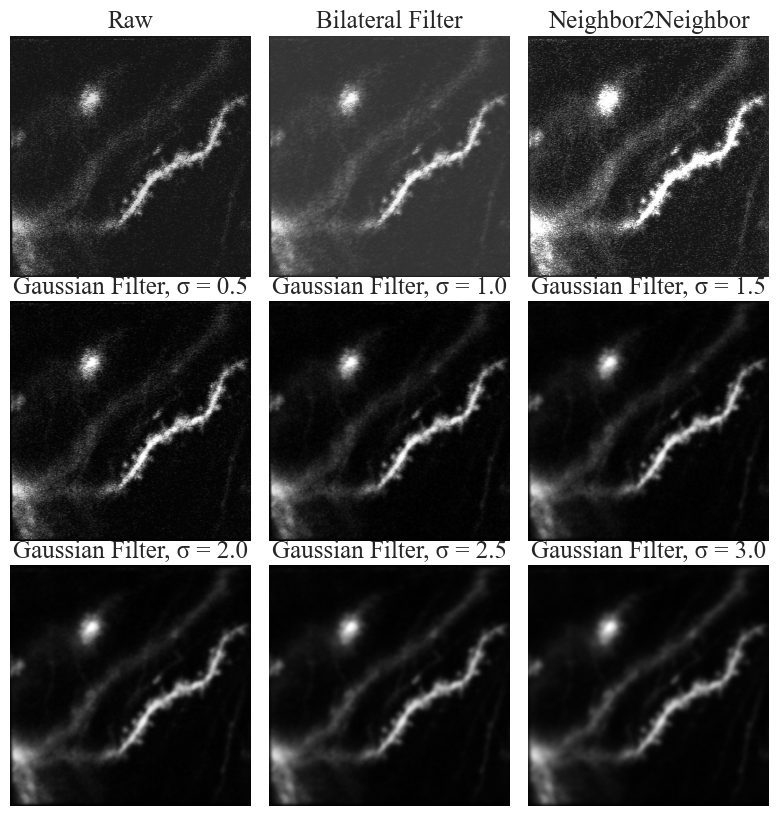

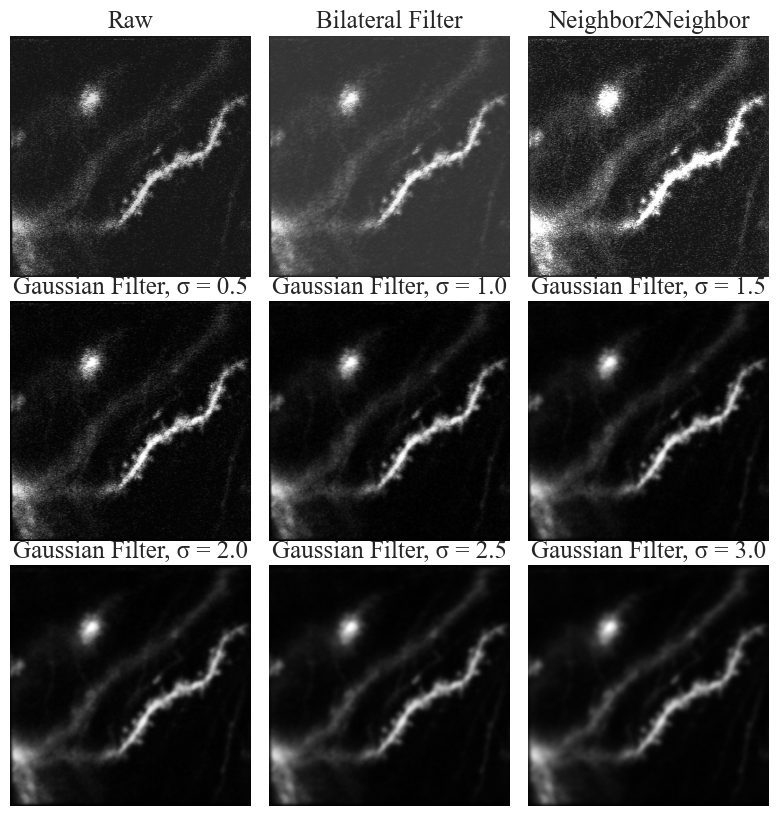

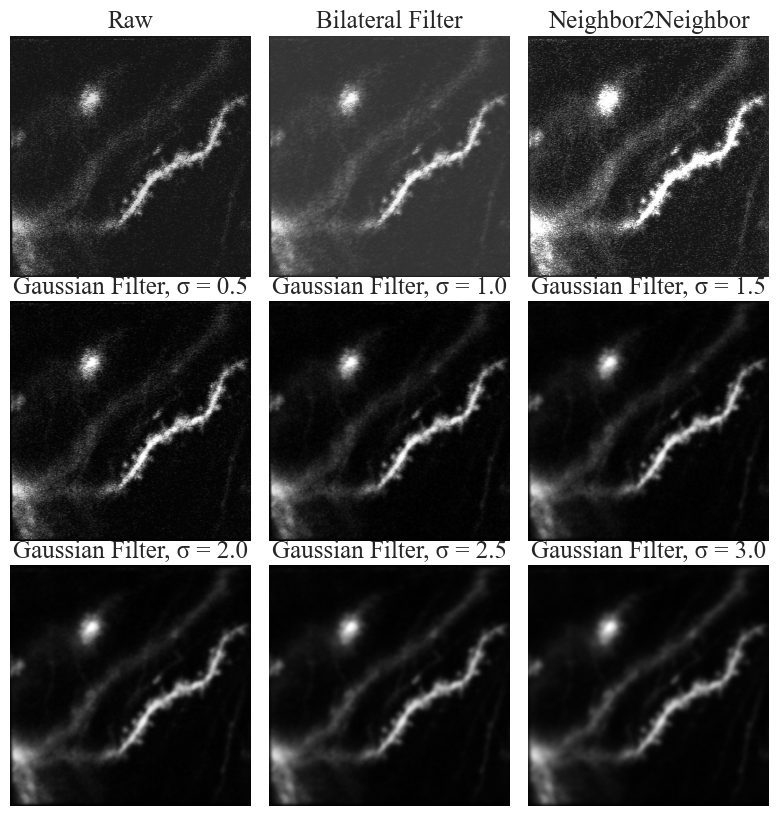

In [10]:
img1 = 'Tim_117_ArcCre_2017-05-08_A8.tif'
plane = 16

with paperStyle():
    mpl.rcParams['axes.titlesize'] = 18
    plt.rcParams['font.family'] = 'Times New Roman'
    print("\033[1m" + img1 + "\033[0m")
    fig=plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)

    #Raw
    f = tif.imread(os.path.join(data_path, img1))
    ax = fig.add_subplot(3, 3, 1)
    ax.imshow(f[plane, :, :],cmap='gray')
    ax.set_title('Raw')
    ax.axis('off')

    # Bilateral
    f = tif.imread(os.path.join(bilat_res_path, img1))
    ax = fig.add_subplot(3, 3, 2)
    ax.imshow(f[plane, :, :],cmap='gray')
    ax.set_title('Bilateral Filter')
    ax.axis('off')

    # N2N
    f = tif.imread(os.path.join(n2n_res_path,img1))
    ax = fig.add_subplot(3, 3, 3)
    ax.imshow(f[plane, :, :],cmap='gray')
    ax.set_title('Neighbor2Neighbor')
    ax.axis('off')

    sigmas = np.arange(0.5,3.1,0.5)
    for (i,l) in enumerate(sigmas):
        f = tif.imread(os.path.join(gauss_res_path, str(l)+'_' + img1))
        ax = fig.add_subplot(3, 3, i+4)
        ax.imshow(f[plane, :, :], cmap='gray')
        ax.set_title('Gaussian Filter, σ = ' + str(l))
        ax.axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.1)

plt.savefig('Denoising_visual_inspection.svg', bbox_inches='tight')
plt.savefig('Denoising_visual_inspection.pdf', bbox_inches='tight')
plt.show()

Tim_117_ArcCre_2017-05-08_A8.tif


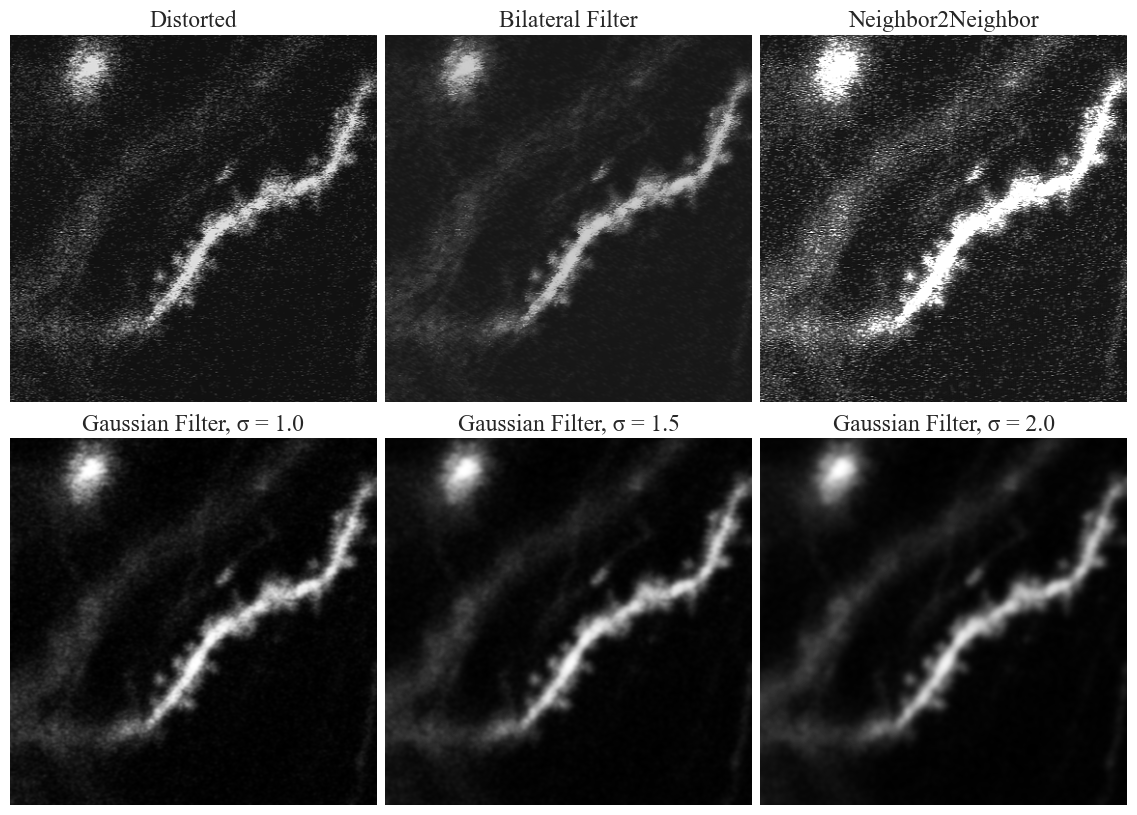

In [21]:
img1 = 'Tim_117_ArcCre_2017-05-08_A8.tif'
plane = 16
x_start=90
width = 380
y_start=100

with paperStyle():
    mpl.rcParams['axes.titlesize'] = 17
    plt.rcParams['font.family'] = 'Times New Roman'
    print("\033[1m" + img1 + "\033[0m")
    fig=plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(14.5)
    h = 2
    w =3
    #Raw
    f = tif.imread(os.path.join(data_path, img1))
    ax = fig.add_subplot(h, w, 1)
    ax.imshow(f[plane, y_start:(y_start+width), x_start:(x_start+width)],cmap='gray')
    ax.set_title('Distorted')
    ax.axis('off')

    # Bilateral
    f = tif.imread(os.path.join(bilat_res_path, img1))
    ax = fig.add_subplot(h, w, 2)
    ax.imshow(f[plane, y_start:(y_start+width), x_start:(x_start+width)],cmap='gray', vmin = 0.1, vmax = 1)
    ax.set_title('Bilateral Filter')
    ax.axis('off')

    # N2N
    f = tif.imread(os.path.join(n2n_res_path,img1))
    ax = fig.add_subplot(h, w, 3)
    ax.imshow(f[plane, y_start:(y_start+width), x_start:(x_start+width)],cmap='gray')
    ax.set_title('Neighbor2Neighbor')
    ax.axis('off')

    sigmas = [1.0,1.5, 2.0]
    for (i,l) in enumerate(sigmas):
        f = tif.imread(os.path.join(gauss_res_path, str(l)+'_' + img1))
        ax = fig.add_subplot(h, w, i+4)
        ax.imshow(f[plane, y_start:(y_start+width), x_start:(x_start+width)], cmap='gray')
        ax.set_title('Gaussian Filter, σ = ' + str(l))
        ax.axis('off')
    plt.subplots_adjust(wspace=0.005, hspace=0.1)

plt.savefig('Denoising_visual_inspection.svg', bbox_inches='tight')
plt.savefig('Denoising_visual_inspection.pdf', bbox_inches='tight')
plt.show()

### 2.2 SNR-Scatterplot

In [6]:
path = 'D:/jo77pihe/Registered/20220204_Denoising'
gaussian = 'GaussianFilter'
sigmas = ['0.5_','1.0_','1.5_','2.0_','2.5_','3.0_']
bil_path = 'BilateralFilter'
gaussian = 'GaussianFilter'
n2n_path = 'Neighbor2Neighbor'

In [11]:
res = np.zeros((len(f_test)*6,2))
names= []
c=0
for (i,file) in enumerate(f_test):
    p_raw=tif.imread(os.path.join(data_path, file))
    p_raw -=MIN_VAL
    p_raw /=MAX_VAL
    #p_raw =norm_minmax.normalize(p_raw)

    #p_raw = normalizer.normalize(p_raw)
    print(np.min(p_raw), np.max(p_raw))

    raw_snr= iqm.snr(p_raw)
    
    for (j,sigma) in enumerate(sigmas):

        p_gau=tif.imread(os.path.join(path,gaussian, sigmas[j]+file))
        #p_gau =norm_minmax.normalize(p_gau)

        #p_gau = normalizer.normalize(p_gau)
        print(np.min(p_gau), np.max(p_gau))

        gau_snr=iqm.snr(p_gau)
        res[c,:] = np.array([raw_snr, gau_snr])
        c +=1
        names.append(sigma[:-1])

0.030889432561795844 0.9286802823912199
0.13756395307236052 0.8107022460304923
0.1726716817488148 0.7941025808408841
0.1781808238910343 0.7927135643875864
0.18080798253940286 0.792159953368645
0.1808080520503594 0.7903195316784581
0.18080807914153632 0.7858254292985454
0.012936797360625486 1.0052024906517094
0.11838854253783361 0.8614153075915582
0.17931799306924923 0.8172508015543969
0.18080815630764127 0.8172482384312554
0.18081802779445888 0.817168508136524
0.18090459777498952 0.8164152826015252
0.18110844365403173 0.8137133352570044
0.07287698195901321 0.943194110576923
0.15322734072756744 0.8301661992108282
0.17717166102826346 0.8177995842423713
0.1803468525850347 0.8170709886240424
0.18080808662706827 0.8159021808701021
0.18080880207709255 0.8128568096956803
0.1808174525490824 0.8074859695108668
0.11541167098418074 0.886076889690171
0.16533626394633072 0.81438101509131
0.18046318935493294 0.8079791740095381
0.18080773627708535 0.8073799151989616
0.1808080808000907 0.8051534964046

In [12]:
df_x = pd.DataFrame(res, columns=['Raw', 'Denoised'])
df_x['σ'] = names
pd.to_pickle(df_x,'denoising_scatter_sigma.pkl')

In [5]:
df_x=pd.read_pickle('denoising_scatter_sigma.pkl')

In [14]:
df_x

Raw  Denoised    σ
0   2.186516  2.560291  0.5
1   2.186516  2.867614  1.0
2   2.186516  2.954559  1.5
3   2.186516  3.026924  2.0
4   2.186516  3.101551  2.5
5   2.186516  3.180875  3.0
6   2.127286  2.377032  0.5
7   2.127286  2.578645  1.0
8   2.127286  2.655582  1.5
9   2.127286  2.728515  2.0
10  2.127286  2.806481  2.5
11  2.127286  2.890265  3.0
12  2.260404  2.453004  0.5
13  2.260404  2.608349  1.0
14  2.260404  2.678152  1.5
15  2.260404  2.748672  2.0
16  2.260404  2.824232  2.5
17  2.260404  2.903968  3.0
18  2.767196  2.958803  0.5
19  2.767196  3.109200  1.0
20  2.767196  3.179613  1.5
21  2.767196  3.255470  2.0
22  2.767196  3.341207  2.5
23  2.767196  3.436016  3.0
24  2.156447  2.320537  0.5
25  2.156447  2.456590  1.0
26  2.156447  2.528455  1.5
27  2.156447  2.605919  2.0
28  2.156447  2.692427  2.5
29  2.156447  2.786979  3.0
30  2.375372  2.691051  0.5
31  2.375372  2.943598  1.0
32  2.375372  3.021201  1.5
33  2.375372  3.086023  2.0
34  2.375372  3.152586  2.5
35  2.375372  3.223599  3.0
36  3.853434  4.428973  0.5
37  3.853434  4.917520  1.0
38  3.853434  5.082450  1.5
39  3.853434  5.234688  2.0
40  3.853434  5.396940  2.5
41  3.853434  5.570002  3.0
42  4.072998  4.417248  0.5
43  4.072998  4.805399  1.0
44  4.072998  5.084661  1.5
45  4.072998  5.379218  2.0
46  4.072998  5.685400  2.5
47  4.072998  5.996866  3.0
48  3.466470  3.743936  0.5
49  3.466470  3.971306  1.0
50  3.466470  4.079870  1.5
51  3.466470  4.189895  2.0
52  3.466470  4.304951  2.5
53  3.466470  4.422284  3.0
54  2.527323  2.725306  0.5
55  2.527323  2.923144  1.0
56  2.527323  3.053249  1.5
57  2.527323  3.191310  2.0
58  2.527323  3.339060  2.5
59  2.527323  3.494490  3.0

In [38]:
sigma = '1.5_'
sigma2= '3.0_'

files = [f for f in os.listdir(os.path.join(path, bil_path)) if f.endswith('.tif')]

res = np.zeros((len(files)*4,2))
labs =[]

for (i,file) in enumerate(files):
    p_raw=tif.imread(os.path.join(data_path, file))
    p_raw -=MIN_VAL
    p_raw /=MAX_VAL
    #p_raw = normalizer.normalize(p_raw)
    #p_raw =norm_minmax.normalize(p_raw)
    print(np.min(p_raw), np.max(p_raw))

    p_bil=tif.imread(os.path.join(path,bil_path, file))
    #p_bil = normalizer.normalize(p_bil)
    #p_bil =norm_minmax.normalize(p_bil)

    print(np.min(p_bil), np.max(p_bil))
    res[i*4,:]=[iqm.snr(p_raw), iqm.snr(p_bil)]
    labs.append('BF')

    p_gau=tif.imread(os.path.join(path,gaussian, sigma+file))
    #p_gau = normalizer.normalize(p_gau)
    #p_gau =norm_minmax.normalize(p_gau)
    res[i*4+1,:]=[iqm.snr(p_raw), iqm.snr(p_gau)]
    labs.append('GF (σ = 1.5)')
    
    p_gau_2=tif.imread(os.path.join(path,gaussian, sigma2+file))
    #p_gau_2 = normalizer.normalize(p_gau_2)
    #p_gau_2 = norm_minmax.normalize(p_gau_2)
    res[i*4+2,:]=[iqm.snr(p_raw), iqm.snr(p_gau_2)]
    labs.append('GF (σ = 3.0)')
    print(np.min(p_gau), np.max(p_gau))
    p_n2n=tif.imread(os.path.join(path,n2n_path, file))
    #p_n2n =normalizer.normalize(p_n2n)
    #p_n2n = norm_minmax.normalize(p_n2n)
    p_n2n =(p_n2n-np.min(p_n2n))
    p_n2n/=(np.max(p_raw)-np.min(p_raw))
    p_n2n +=np.min(p_raw)

    res[i*4+3,:]=[iqm.snr(p_raw), iqm.snr(p_n2n)]
    labs.append('N2N')
    print(np.min(p_n2n), np.max(p_n2n))


0.10520964224577506 0.893013442720474
0.05435626 0.8327264
0.180807785026128 0.7868191110614549
0.10520964224577506 0.7398854329676783
0.11541167098418074 0.886076889690171
0.0054421243 0.8233725
0.18080773627708535 0.8073799151989616
0.11541167098418074 0.7642018172938075
0.12783885087351884 0.8732106977224164
0.006400391 0.81347704
0.18090452485997932 0.8076821723880537
0.12783885087351884 0.7986449755128903
0.030889432561795844 0.9286802823912199
0.0020189253 0.8449148
0.1781808238910343 0.7927135643875864
0.030889432561795844 0.587812016585678
0.04038389453428516 0.9399772211295648
0.004900343 0.8972858
0.17702969835853982 0.7948180805549079
0.04038389453428516 0.5961905965385856
0.012936797360625486 1.0052024906517094
0.001497487 0.9846034
0.18080815630764127 0.8172482384312554
0.012936797360625486 0.5168340935995307
0.021997003918390635 0.9658443661373349
0.00786474 0.9433469
0.18080818866455017 0.8172438932827719
0.021997003918390635 0.5517436769657377
0.07287698195901321 0.9431

In [40]:
df = pd.DataFrame(res, columns=['Raw', 'Denoised'])
df['Denoiser'] = labs

In [41]:
pd.to_pickle(df,'denoising_scatter.pkl')

In [3]:
df = pd.read_pickle('denoising_scatter.pkl')

In [4]:
df

Raw  Denoised      Denoiser
0   3.853434  4.483566            BF
1   3.853434  5.082450  GF (σ = 1.5)
2   3.853434  5.570002  GF (σ = 3.0)
3   3.853434  2.431073           N2N
4   2.767196  2.985508            BF
5   2.767196  3.179613  GF (σ = 1.5)
6   2.767196  3.436016  GF (σ = 3.0)
7   2.767196  2.160722           N2N
8   3.466470  3.826936            BF
9   3.466470  4.079870  GF (σ = 1.5)
10  3.466470  4.422284  GF (σ = 3.0)
11  3.466470  2.591578           N2N
12  2.186516  2.507827            BF
13  2.186516  2.954559  GF (σ = 1.5)
14  2.186516  3.180875  GF (σ = 3.0)
15  2.186516  1.435632           N2N
16  2.375372  2.651954            BF
17  2.375372  3.021201  GF (σ = 1.5)
18  2.375372  3.223599  GF (σ = 3.0)
19  2.375372  1.441108           N2N
20  2.127286  2.378694            BF
21  2.127286  2.655582  GF (σ = 1.5)
22  2.127286  2.890265  GF (σ = 3.0)
23  2.127286  1.372340           N2N
24  2.156447  2.324911            BF
25  2.156447  2.528455  GF (σ = 1.5)
26  2.156447  2.786979  GF (σ = 3.0)
27  2.156447  1.337473           N2N
28  2.260404  2.444532            BF
29  2.260404  2.678152  GF (σ = 1.5)
30  2.260404  2.903968  GF (σ = 3.0)
31  2.260404  1.600908           N2N
32  4.072998  4.433604            BF
33  4.072998  5.084661  GF (σ = 1.5)
34  4.072998  5.996866  GF (σ = 3.0)
35  4.072998  2.383823           N2N
36  2.527323  2.740042            BF
37  2.527323  3.053249  GF (σ = 1.5)
38  2.527323  3.494490  GF (σ = 3.0)
39  2.527323  1.215639           N2N

In [6]:
with paperStyle():
    fig=plt.figure()
    fig.set_figheight(4.5)
    fig.set_figwidth(10)
    sns.set()

    # SNR Gauss
    ax = fig.add_subplot(1, 2, 1)
    #sns.set()
    sns.scatterplot(data=df_x, x="Raw", y="Denoised", hue="σ")
    plt.xlim(2,6.5)
    plt.ylim(2,6.5)
    ax.set_ylabel('$SNR_{Denoised}$')
    ax.set_xlabel('$SNR_{Raw}$')
    plt.yticks([2,3,4, 5, 6], [2,3,4, 5, 6])

    # SNR all
    ax = fig.add_subplot(1, 2, 2)

    #sns.set()
    sns.scatterplot(data=df, x="Raw", y="Denoised", hue="Denoiser")

    ax.set_xlabel('$SNR_{Raw}$')
    ax.set_ylabel('')
    plt.xlim(2,6.5)
    plt.ylim(2,6.5)
    plt.yticks([2,3,4, 5, 6], [2,3,4, 5, 6])

    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.savefig('scatter_denoising.svg',bbox_inches='tight')
plt.savefig('scatter_denoising.pdf',bbox_inches='tight')

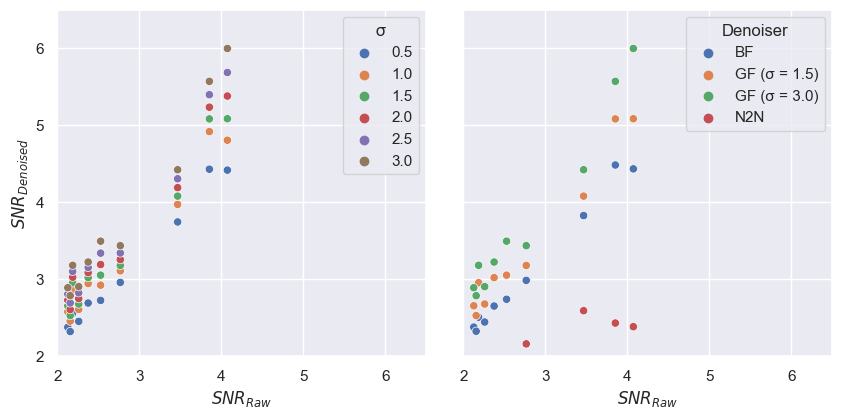

In [7]:
plt.show()